# 국민건강보험공단 질병 예측 정보

## 라이브러리 불러오기

날짜별

In [1]:
import pandas as pd
import seaborn as sns

## 데이터 불러오기

In [2]:
df_trial_1 = pd.read_csv("시도 지역코드.csv", encoding="cp949")
df_trial_2 = pd.read_csv("실제진료정보_감기_시도.csv", encoding="cp949")
df_trial_3 = pd.read_csv("실제진료정보_눈병_시도.csv", encoding="cp949")
df_trial_4 = pd.read_csv("실제진료정보_천식_시도.csv", encoding="cp949")
df_trial_5 = pd.read_csv("실제진료정보_피부염_시도.csv", encoding="cp949")
df_trial_2.tail

<bound method NDFrame.tail of              날짜  시도지역코드  발생건수(건)
0      20140101      11     5992
1      20140101      26     3158
2      20140101      27     2190
3      20140101      28     3426
4      20140101      29     2635
...         ...     ...      ...
41900  20200930      46     3436
41901  20200930      47     4081
41902  20200930      48     4881
41903  20200930      49     1364
41904  20200930      99    61493

[41905 rows x 3 columns]>

In [3]:
df_trial_2

날짜  시도지역코드  발생건수(건)
0      20140101      11     5992
1      20140101      26     3158
2      20140101      27     2190
3      20140101      28     3426
4      20140101      29     2635
...         ...     ...      ...
41900  20200930      46     3436
41901  20200930      47     4081
41902  20200930      48     4881
41903  20200930      49     1364
41904  20200930      99    61493

[41905 rows x 3 columns]

# 데이터 전처리 작업

## 전국 데이터 삭제

In [4]:
drop_sample_1 = df_trial_2[df_trial_2["시도지역코드"] == 99].index
drop_sample_2 = df_trial_3[df_trial_3["시도지역코드"] == 99].index
drop_sample_3 = df_trial_4[df_trial_4["시도지역코드"] == 99].index
drop_sample_4 = df_trial_5[df_trial_5["시도지역코드"] == 99].index

In [5]:
df_trial_2 = df_trial_2.drop(drop_sample_1).copy()
df_trial_3 = df_trial_3.drop(drop_sample_2).copy()
df_trial_4 = df_trial_4.drop(drop_sample_3).copy()
df_trial_5 = df_trial_5.drop(drop_sample_4).copy()

In [6]:
df_trial_2[df_trial_2["시도지역코드"] == 99]

Empty DataFrame
Columns: [날짜, 시도지역코드, 발생건수(건)]
Index: []

## 날짜 데이터 수정

In [7]:
df_trial_2["날짜"] = df_trial_2["날짜"].astype("str")
df_trial_3["날짜"] = df_trial_3["날짜"].astype("str")
df_trial_4["날짜"] = df_trial_4["날짜"].astype("str")
df_trial_5["날짜"] = df_trial_5["날짜"].astype("str")

In [8]:
df_trial_2["날짜"] = pd.to_datetime(df_trial_2["날짜"])
df_trial_3["날짜"] = pd.to_datetime(df_trial_3["날짜"])
df_trial_4["날짜"] = pd.to_datetime(df_trial_4["날짜"])
df_trial_5["날짜"] = pd.to_datetime(df_trial_5["날짜"])

In [9]:
df_trial_2["날짜"]

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
41899   2020-09-30
41900   2020-09-30
41901   2020-09-30
41902   2020-09-30
41903   2020-09-30
Name: 날짜, Length: 39440, dtype: datetime64[ns]

In [10]:
df_trial_2["연도"] = df_trial_2["날짜"].dt.year
df_trial_3["연도"] = df_trial_3["날짜"].dt.year
df_trial_4["연도"] = df_trial_4["날짜"].dt.year
df_trial_5["연도"] = df_trial_5["날짜"].dt.year

In [11]:
df_trial_2

날짜  시도지역코드  발생건수(건)    연도
0     2014-01-01      11     5992  2014
1     2014-01-01      26     3158  2014
2     2014-01-01      27     2190  2014
3     2014-01-01      28     3426  2014
4     2014-01-01      29     2635  2014
...          ...     ...      ...   ...
41899 2020-09-30      45     3483  2020
41900 2020-09-30      46     3436  2020
41901 2020-09-30      47     4081  2020
41902 2020-09-30      48     4881  2020
41903 2020-09-30      49     1364  2020

[39440 rows x 4 columns]

# 새로운 데이터 생성

## 연도별 지역 데이터 생성

In [12]:
df_year_trial_1 = df_trial_2.copy()
df_year_trial_2 = df_trial_3.copy()
df_year_trial_3 = df_trial_4.copy()
df_year_trial_4 = df_trial_5.copy()

In [13]:
df_year_trial_1["시도지역코드"] = df_year_trial_1["시도지역코드"].astype("str").copy()
df_year_trial_2["시도지역코드"] = df_year_trial_2["시도지역코드"].astype("str").copy()
df_year_trial_3["시도지역코드"] = df_year_trial_3["시도지역코드"].astype("str").copy()
df_year_trial_4["시도지역코드"] = df_year_trial_4["시도지역코드"].astype("str").copy()

In [14]:
df_year_trial_1["시도지역코드"]

0        11
1        26
2        27
3        28
4        29
         ..
41899    45
41900    46
41901    47
41902    48
41903    49
Name: 시도지역코드, Length: 39440, dtype: object

In [15]:
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("11"), "시도명"] = "서울특별시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("26"), "시도명"] = "부산광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("27"), "시도명"] = "대구광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("28"), "시도명"] = "인천광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("29"), "시도명"] = "광주광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("30"), "시도명"] = "대전광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("31"), "시도명"] = "울산광역시"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("41"), "시도명"] = "경기도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("42"), "시도명"] = "강원도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("43"), "시도명"] = "충청북도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("44"), "시도명"] = "충청남도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("45"), "시도명"] = "전라북도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("46"), "시도명"] = "전라남도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("47"), "시도명"] = "경상북도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("48"), "시도명"] = "경상남도"
df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("49"), "시도명"] = "제주특별자치도"
#df_year_trial_1.loc[df_year_trial_1["시도지역코드"].str.contains("99"), "시도명"] = "전국"

In [16]:
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("11"), "시도명"] = "서울특별시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("26"), "시도명"] = "부산광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("27"), "시도명"] = "대구광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("28"), "시도명"] = "인천광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("29"), "시도명"] = "광주광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("30"), "시도명"] = "대전광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("31"), "시도명"] = "울산광역시"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("41"), "시도명"] = "경기도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("42"), "시도명"] = "강원도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("43"), "시도명"] = "충청북도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("44"), "시도명"] = "충청남도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("45"), "시도명"] = "전라북도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("46"), "시도명"] = "전라남도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("47"), "시도명"] = "경상북도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("48"), "시도명"] = "경상남도"
df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("49"), "시도명"] = "제주특별자치도"
#df_year_trial_2.loc[df_year_trial_2["시도지역코드"].str.contains("99"), "시도명"] = "전국"

In [17]:
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("11"), "시도명"] = "서울특별시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("26"), "시도명"] = "부산광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("27"), "시도명"] = "대구광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("28"), "시도명"] = "인천광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("29"), "시도명"] = "광주광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("30"), "시도명"] = "대전광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("31"), "시도명"] = "울산광역시"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("41"), "시도명"] = "경기도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("42"), "시도명"] = "강원도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("43"), "시도명"] = "충청북도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("44"), "시도명"] = "충청남도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("45"), "시도명"] = "전라북도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("46"), "시도명"] = "전라남도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("47"), "시도명"] = "경상북도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("48"), "시도명"] = "경상남도"
df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("49"), "시도명"] = "제주특별자치도"
#df_year_trial_3.loc[df_year_trial_3["시도지역코드"].str.contains("99"), "시도명"] = "전국"

In [18]:
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("11"), "시도명"] = "서울특별시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("26"), "시도명"] = "부산광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("27"), "시도명"] = "대구광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("28"), "시도명"] = "인천광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("29"), "시도명"] = "광주광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("30"), "시도명"] = "대전광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("31"), "시도명"] = "울산광역시"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("41"), "시도명"] = "경기도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("42"), "시도명"] = "강원도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("43"), "시도명"] = "충청북도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("44"), "시도명"] = "충청남도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("45"), "시도명"] = "전라북도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("46"), "시도명"] = "전라남도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("47"), "시도명"] = "경상북도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("48"), "시도명"] = "경상남도"
df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("49"), "시도명"] = "제주특별자치도"
#df_year_trial_4.loc[df_year_trial_4["시도지역코드"].str.contains("99"), "시도명"] = "전국"

In [19]:
df_year_trial_1 = df_year_trial_1.drop("시도지역코드", axis=1).copy()
df_year_trial_2 = df_year_trial_2.drop("시도지역코드", axis=1).copy()
df_year_trial_3 = df_year_trial_3.drop("시도지역코드", axis=1).copy()
df_year_trial_4 = df_year_trial_4.drop("시도지역코드", axis=1).copy()

In [20]:
df_year_trial_1.columns = ["날짜", "감기발생건수", "연도", "시도명"]
df_year_trial_2.columns = ["날짜", "눈병발생건수", "연도", "시도명"]
df_year_trial_3.columns = ["날짜", "천식발생건수", "연도", "시도명"]
df_year_trial_4.columns = ["날짜", "피부염발생건수", "연도", "시도명"]

In [21]:
df_year_trial = pd.merge(df_year_trial_1, df_year_trial_2)
df_year_trial = pd.merge(df_year_trial, df_year_trial_3)
df_year_trial = pd.merge(df_year_trial, df_year_trial_4)

In [22]:
df_year_trial = df_year_trial.reindex(columns=["날짜", "시도명", "연도", "감기발생건수", "눈병발생건수", "천식발생건수", "피부염발생건수"])

In [23]:
df_year_trial = df_year_trial.drop("날짜", axis=1)

In [24]:
df_year_trial[df_year_trial["연도"] == 2014]

시도명    연도  감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0       서울특별시  2014    5992     247     715      246
1       부산광역시  2014    3158      91     554      138
2       대구광역시  2014    2190      96     370       85
3       인천광역시  2014    3426      83     437      138
4       광주광역시  2014    2635      57     480       81
...       ...   ...     ...     ...     ...      ...
5835     전라북도  2014   19756    1899    2091     1751
5836     전라남도  2014   20409    1417    2585     2331
5837     경상북도  2014   23727    2147    2601     2666
5838     경상남도  2014   35631    2497    3531     3805
5839  제주특별자치도  2014    6662     491     601      564

[5840 rows x 6 columns]

In [25]:
df_year_2014 = df_year_trial[df_year_trial["연도"] == 2014]

In [26]:
df_year_2014

시도명    연도  감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0       서울특별시  2014    5992     247     715      246
1       부산광역시  2014    3158      91     554      138
2       대구광역시  2014    2190      96     370       85
3       인천광역시  2014    3426      83     437      138
4       광주광역시  2014    2635      57     480       81
...       ...   ...     ...     ...     ...      ...
5835     전라북도  2014   19756    1899    2091     1751
5836     전라남도  2014   20409    1417    2585     2331
5837     경상북도  2014   23727    2147    2601     2666
5838     경상남도  2014   35631    2497    3531     3805
5839  제주특별자치도  2014    6662     491     601      564

[5840 rows x 6 columns]

## 연도별 전국 데이터 생성

In [27]:
df_year_sample_1 = df_trial_2.groupby('연도').sum().copy()
df_year_sample_2 = df_trial_3.groupby('연도').sum().copy()
df_year_sample_3 = df_trial_4.groupby('연도').sum().copy()
df_year_sample_4 = df_trial_5.groupby('연도').sum().copy()

In [28]:
df_year_sample_1 = df_year_sample_1.drop("시도지역코드", axis=1).copy()
df_year_sample_2 = df_year_sample_2.drop("시도지역코드", axis=1).copy()
df_year_sample_3 = df_year_sample_3.drop("시도지역코드", axis=1).copy()
df_year_sample_4 = df_year_sample_4.drop("시도지역코드", axis=1).copy()

In [29]:
df_year_sample_1 = df_year_sample_1.reset_index()
df_year_sample_2 = df_year_sample_2.reset_index()
df_year_sample_3 = df_year_sample_3.reset_index()
df_year_sample_4 = df_year_sample_4.reset_index()

In [30]:
df_year_sample_1

연도    발생건수(건)
0  2014  135466305
1  2015  128084258
2  2016  137509780
3  2017  162224708
4  2018  164529730
5  2019  157428403
6  2020   63623431

In [31]:
df_year_sample_1.columns = ["연도", "감기발생건수"]
df_year_sample_2.columns = ["연도", "눈병발생건수"]
df_year_sample_3.columns = ["연도", "천식발생건수"]
df_year_sample_4.columns = ["연도", "피부염발생건수"]

In [32]:
df_year = pd.merge(df_year_sample_1, df_year_sample_2, on="연도")
df_year = pd.merge(df_year, df_year_sample_3, on="연도")
df_year = pd.merge(df_year, df_year_sample_4, on="연도")

In [33]:
df_year

연도     감기발생건수    눈병발생건수    천식발생건수   피부염발생건수
0  2014  135466305  11921225  12659559  17885560
1  2015  128084258  12031557  11581754  17499544
2  2016  137509780  13040941  11206233  17973764
3  2017  162224708  12990778   9969097  17998541
4  2018  164529730  13611587   9752976  18004406
5  2019  157428403  13068638   9133599  18347602
6  2020   63623431   8411730   4095346  13455577

## 지역별 통합 데이터 생성

In [34]:
df_trial_sample_1 = df_trial_2.groupby('시도지역코드').sum().copy()
df_trial_sample_2 = df_trial_3.groupby('시도지역코드').sum().copy()
df_trial_sample_3 = df_trial_4.groupby('시도지역코드').sum().copy()
df_trial_sample_4 = df_trial_5.groupby('시도지역코드').sum().copy()

In [35]:
df_trial_sample_1 = df_trial_sample_1.drop("연도", axis=1).copy()
df_trial_sample_2 = df_trial_sample_2.drop("연도", axis=1).copy()
df_trial_sample_3 = df_trial_sample_3.drop("연도", axis=1).copy()
df_trial_sample_4 = df_trial_sample_4.drop("연도", axis=1).copy()

In [36]:
df_trial_sample_1 = df_trial_sample_1.reset_index()
df_trial_sample_2 = df_trial_sample_2.reset_index()
df_trial_sample_3 = df_trial_sample_3.reset_index()
df_trial_sample_4 = df_trial_sample_4.reset_index()

In [37]:
df_trial_1.columns = ["시도지역코드", "지역명"]
df_trial_sample_1.columns = ["시도지역코드", "감기발생건수"]
df_trial_sample_2.columns = ["시도지역코드", "눈병발생건수"]
df_trial_sample_3.columns = ["시도지역코드", "천식발생건수"]
df_trial_sample_4.columns = ["시도지역코드", "피부염발생건수"]

In [38]:
df_trial = pd.merge(df_trial_1, df_trial_sample_1, on="시도지역코드")
df_trial = pd.merge(df_trial, df_trial_sample_2, on="시도지역코드")
df_trial = pd.merge(df_trial, df_trial_sample_3, on="시도지역코드")
df_trial = pd.merge(df_trial, df_trial_sample_4, on="시도지역코드")

In [39]:
df_trial = df_trial.drop("시도지역코드", axis=1).copy()

In [40]:
df_trial

지역명     감기발생건수    눈병발생건수    천식발생건수   피부염발생건수
0   서울  170464870  16610150  11108621  21893363
1   부산   63835551   5503428   4310242   8121998
2   대구   44043032   4726490   3360899   6379775
3   인천   54165022   3959952   3958381   7020314
4   광주   27168330   2101182   2427172   3471529
5   대전   30827062   2701921   1894720   3811543
6   울산   23523342   1602715   1639666   2529908
7   경기  246310306  20014677  15087142  27800130
8   강원   24123843   2394625   1778736   3620094
9   충북   29090805   2606803   2467290   3967795
10  충남   45482892   3972198   3856694   5639236
11  전북   35649080   3825545   3081125   4470191
12  전남   35052649   3207281   3507992   5504357
13  경북   45670897   4853424   4042982   6763129
14  경남   60998927   5666247   4944150   8716899
15  제주   12460007   1329818    932752   1454733

## 지역별 연도 데이터 생성

### 서울특별시 연도별 데이터 생성

In [41]:
df_seoul = df_year_trial[df_year_trial["시도명"] == "서울특별시"]

In [42]:
df_seoul = df_seoul.groupby("연도").sum().copy()

In [43]:
df_seoul = df_seoul.reset_index()

In [44]:
df_seoul

연도    감기발생건수   눈병발생건수   천식발생건수  피부염발생건수
0  2014  25181240  2387303  2084784  3289651
1  2015  22998860  2359266  1834586  3192673
2  2016  25052538  2566958  1854646  3262586
3  2017  29119008  2564717  1643558  3268126
4  2018  29053296  2616547  1579385  3238907
5  2019  28118619  2500100  1475981  3269828
6  2020  10941309  1615259   635681  2371592

### 경기도 연도별 데이터 생성

In [45]:
df_gyunggi = df_year_trial[df_year_trial["시도명"] == "경기도"]

In [46]:
df_gyunggi = df_gyunggi.groupby("연도").sum().copy()

In [47]:
df_gyunggi = df_gyunggi.reset_index()

In [48]:
df_gyunggi

연도    감기발생건수   눈병발생건수   천식발생건수  피부염발생건수
0  2014  34234055  2740496  2836057  4015181
1  2015  31875730  2713670  2487696  3906719
2  2016  35614507  2997364  2456331  4067153
3  2017  42181384  3033000  2158667  4163678
4  2018  43311433  3284870  2160369  4203393
5  2019  42594140  3187807  2080944  4296598
6  2020  16499057  2057470   907078  3147408

### 부산광역시 연도별 데이터 생성

In [49]:
df_busan = df_year_trial[df_year_trial["시도명"] == "부산광역시"]

In [50]:
df_busan = df_busan.groupby("연도").sum().copy()

In [51]:
df_busan = df_busan.reset_index()

In [52]:
df_busan

연도    감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014   9228054  793134  770710  1212956
1  2015   9057452  810046  743546  1177153
2  2016   9132235  849563  699079  1196844
3  2017  10988141  830821  630975  1197107
4  2018  10963065  868901  613075  1182773
5  2019  10295662  823027  578957  1231269
6  2020   4170942  527936  273900   923896

### 대구광역시 연도별 데이터 생성

In [53]:
df_daegu = df_year_trial[df_year_trial["시도명"] == "대구광역시"]

In [54]:
df_daegu = df_daegu.groupby("연도").sum().copy()

In [55]:
df_daegu = df_daegu.reset_index()

In [56]:
df_daegu

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  6357009  672078  676753   958217
1  2015  6012788  663251  622038   934139
2  2016  6419779  736998  559564   942711
3  2017  7501913  705692  465734   951459
4  2018  7755437  735022  459827   948158
5  2019  7192822  742764  406011   961995
6  2020  2803284  470685  170972   683096

### 인천광역시 연도별 데이터 생성

In [57]:
df_incheon = df_year_trial[df_year_trial["시도명"] == "대구광역시"]

In [58]:
df_incheon = df_incheon.groupby("연도").sum().copy()

In [59]:
df_incheon = df_incheon.reset_index()

In [60]:
df_incheon

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  6357009  672078  676753   958217
1  2015  6012788  663251  622038   934139
2  2016  6419779  736998  559564   942711
3  2017  7501913  705692  465734   951459
4  2018  7755437  735022  459827   948158
5  2019  7192822  742764  406011   961995
6  2020  2803284  470685  170972   683096

### 광주광역시 연도별 데이터 생성

In [61]:
df_gwangju = df_year_trial[df_year_trial["시도명"] == "광주광역시"]

In [62]:
df_gwangju = df_gwangju.groupby("연도").sum().copy()

In [63]:
df_gwangju = df_gwangju.reset_index()

In [64]:
df_gwangju

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  3911135  294134  480552   528365
1  2015  3694027  311052  397974   520631
2  2016  3854654  303870  376768   516332
3  2017  4735046  317693  369284   514201
4  2018  4634741  322844  348585   509611
5  2019  4538672  342227  318330   508291
6  2020  1800055  209362  135679   374098

### 대전광역시 연도별 데이터 생성

In [65]:
df_daejeon = df_year_trial[df_year_trial["시도명"] == "대전광역시"]

In [66]:
df_daejeon = df_daejeon.groupby("연도").sum().copy()

In [67]:
df_daejeon = df_daejeon.reset_index()

In [68]:
df_daejeon

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  4582940  372048  356351   571483
1  2015  4245649  382367  319021   552986
2  2016  4512590  420285  321525   565598
3  2017  5224901  417724  273997   564675
4  2018  5272015  447562  271508   566538
5  2019  4924686  402674  244878   572908
6  2020  2064281  259261  107440   417355

### 울산광역시 연도별 데이터 생성

In [69]:
df_ulsan = df_year_trial[df_year_trial["시도명"] == "울산광역시"]

In [70]:
df_ulsan = df_ulsan.groupby("연도").sum().copy()

In [71]:
df_ulsan = df_ulsan.reset_index()

In [72]:
df_ulsan

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  3387202  236332  304245   380657
1  2015  3382120  228264  287743   373428
2  2016  3404453  263001  276980   380640
3  2017  4024077  234075  235986   370260
4  2018  4034273  255791  232416   365005
5  2019  3772940  236811  215312   375509
6  2020  1518277  148441   86984   284409

### 강원도 연도별 데이터 생성

In [73]:
df_gangwon = df_year_trial[df_year_trial["시도명"] == "강원도"]

In [74]:
df_gangwon = df_gangwon.groupby("연도").sum().copy()

In [75]:
df_gangwon = df_gangwon.reset_index()

In [76]:
df_gangwon

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  3403894  349085  324395   569425
1  2015  3233337  354477  299499   541042
2  2016  3568643  374173  287942   550515
3  2017  4135323  370080  256854   528715
4  2018  4156894  368042  245033   527296
5  2019  3906792  350108  241254   520312
6  2020  1718960  228660  123759   382789

### 충청북도 연도별 데이터 생성

In [77]:
df_ccbuk = df_year_trial[df_year_trial["시도명"] == "충청북도"]

In [78]:
df_ccbuk = df_ccbuk.groupby("연도").sum().copy()

In [79]:
df_ccbuk = df_ccbuk.reset_index()

In [80]:
df_ccbuk

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  4036524  373220  443736   575710
1  2015  3870295  391031  436049   554498
2  2016  4226281  396379  420398   591300
3  2017  4979159  385858  367388   595397
4  2018  5095554  425118  344500   594833
5  2019  4798207  383562  320343   605792
6  2020  2084785  251635  134876   450265

### 충청남도 연도별 데이터 생성

In [81]:
df_ccnam = df_year_trial[df_year_trial["시도명"] == "충청남도"]

In [82]:
df_ccnam = df_ccnam.groupby("연도").sum().copy()

In [83]:
df_ccnam = df_ccnam.reset_index()

In [84]:
df_ccnam

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  6108240  507928  612424   794184
1  2015  6041245  541233  611059   795455
2  2016  6525453  600485  638439   832431
3  2017  7669121  613107  602614   839911
4  2018  8043470  662228  587064   848591
5  2019  7772625  641383  558572   881710
6  2020  3322738  405834  246522   646954

### 전라북도 연도별 데이터 생성

In [85]:
df_jlbuk = df_year_trial[df_year_trial["시도명"] == "전라북도"]

In [86]:
df_jlbuk = df_jlbuk.groupby("연도").sum().copy()

In [87]:
df_jlbuk = df_jlbuk.reset_index()

In [88]:
df_jlbuk

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  5196626  557717  568473   647885
1  2015  4969892  549154  536898   652904
2  2016  5228148  578653  490538   658964
3  2017  6043878  565434  452405   652711
4  2018  6006829  579766  429982   670977
5  2019  5630521  594383  397273   675677
6  2020  2573186  400438  205556   511073

### 전라남도 연도별 데이터 생성

In [89]:
df_jlnam = df_year_trial[df_year_trial["시도명"] == "전라남도"]

In [90]:
df_jlnam = df_jlnam.groupby("연도").sum().copy()

In [91]:
df_jlnam = df_jlnam.reset_index()

In [92]:
df_jlnam

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  5078617  439074  647073   816028
1  2015  5015809  461190  597829   819006
2  2016  5121477  479917  543778   829077
3  2017  5908841  505311  500171   812241
4  2018  5915712  511760  497643   806650
5  2019  5534858  487816  480942   814715
6  2020  2477335  322213  240556   606640

### 경상북도 연도별 데이터 생성

In [93]:
df_gsbuk = df_year_trial[df_year_trial["시도명"] == "경상북도"]

In [94]:
df_gsbuk = df_gsbuk.groupby("연도").sum().copy()

In [95]:
df_gsbuk = df_gsbuk.reset_index()

In [96]:
df_gsbuk

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  6649389  702356  758648  1010215
1  2015  6278099  714684  719032   987935
2  2016  6673977  763173  672988  1024525
3  2017  7695048  753229  560325  1011615
4  2018  7985126  764631  567152  1004289
5  2019  7310878  714460  524478  1005958
6  2020  3078380  440891  240359   718592

### 경상남도 연도별 데이터 생성

In [97]:
df_gsnam = df_year_trial[df_year_trial["시도명"] == "경상남도"]

In [98]:
df_gsnam = df_gsnam.groupby("연도").sum().copy()

In [99]:
df_gsnam = df_gsnam.reset_index()

In [100]:
df_gsnam

연도    감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014   8683546  781848  874297  1301027
1  2015   8584387  836418  891663  1288346
2  2016   8701798  884760  798566  1311105
3  2017  10435180  863811  722269  1269470
4  2018  10633594  897043  713311  1271303
5  2019   9874139  854640  641916  1306236
6  2020   4086283  547727  302128   969412

### 제주특별차지도 연도별 데이터 생성

In [101]:
df_jeju = df_year_trial[df_year_trial["시도명"] == "제주특별자치도"]

In [102]:
df_jeju = df_jeju.groupby("연도").sum().copy()

In [103]:
df_jeju = df_jeju.reset_index()

In [104]:
df_jeju

연도   감기발생건수  눈병발생건수  천식발생건수  피부염발생건수
0  2014  1672147  174391  152346   195746
1  2015  1666706  174705  145077   203276
2  2016  1697080  211323  149858   214386
3  2017  2119600  208569  136778   212175
4  2018  2197118  218955  145068   220123
5  2019  2106615  198482  136542   233211
6  2020  1000741  143393   67083   175816

# 시각화

In [105]:
import matplotlib.pyplot as plt
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [106]:
plt.rc('font', family="Malgun Gothic")

## 연도별 전국 데이터

### 2014년 전국 데이터

<AxesSubplot:title={'center':'2014년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

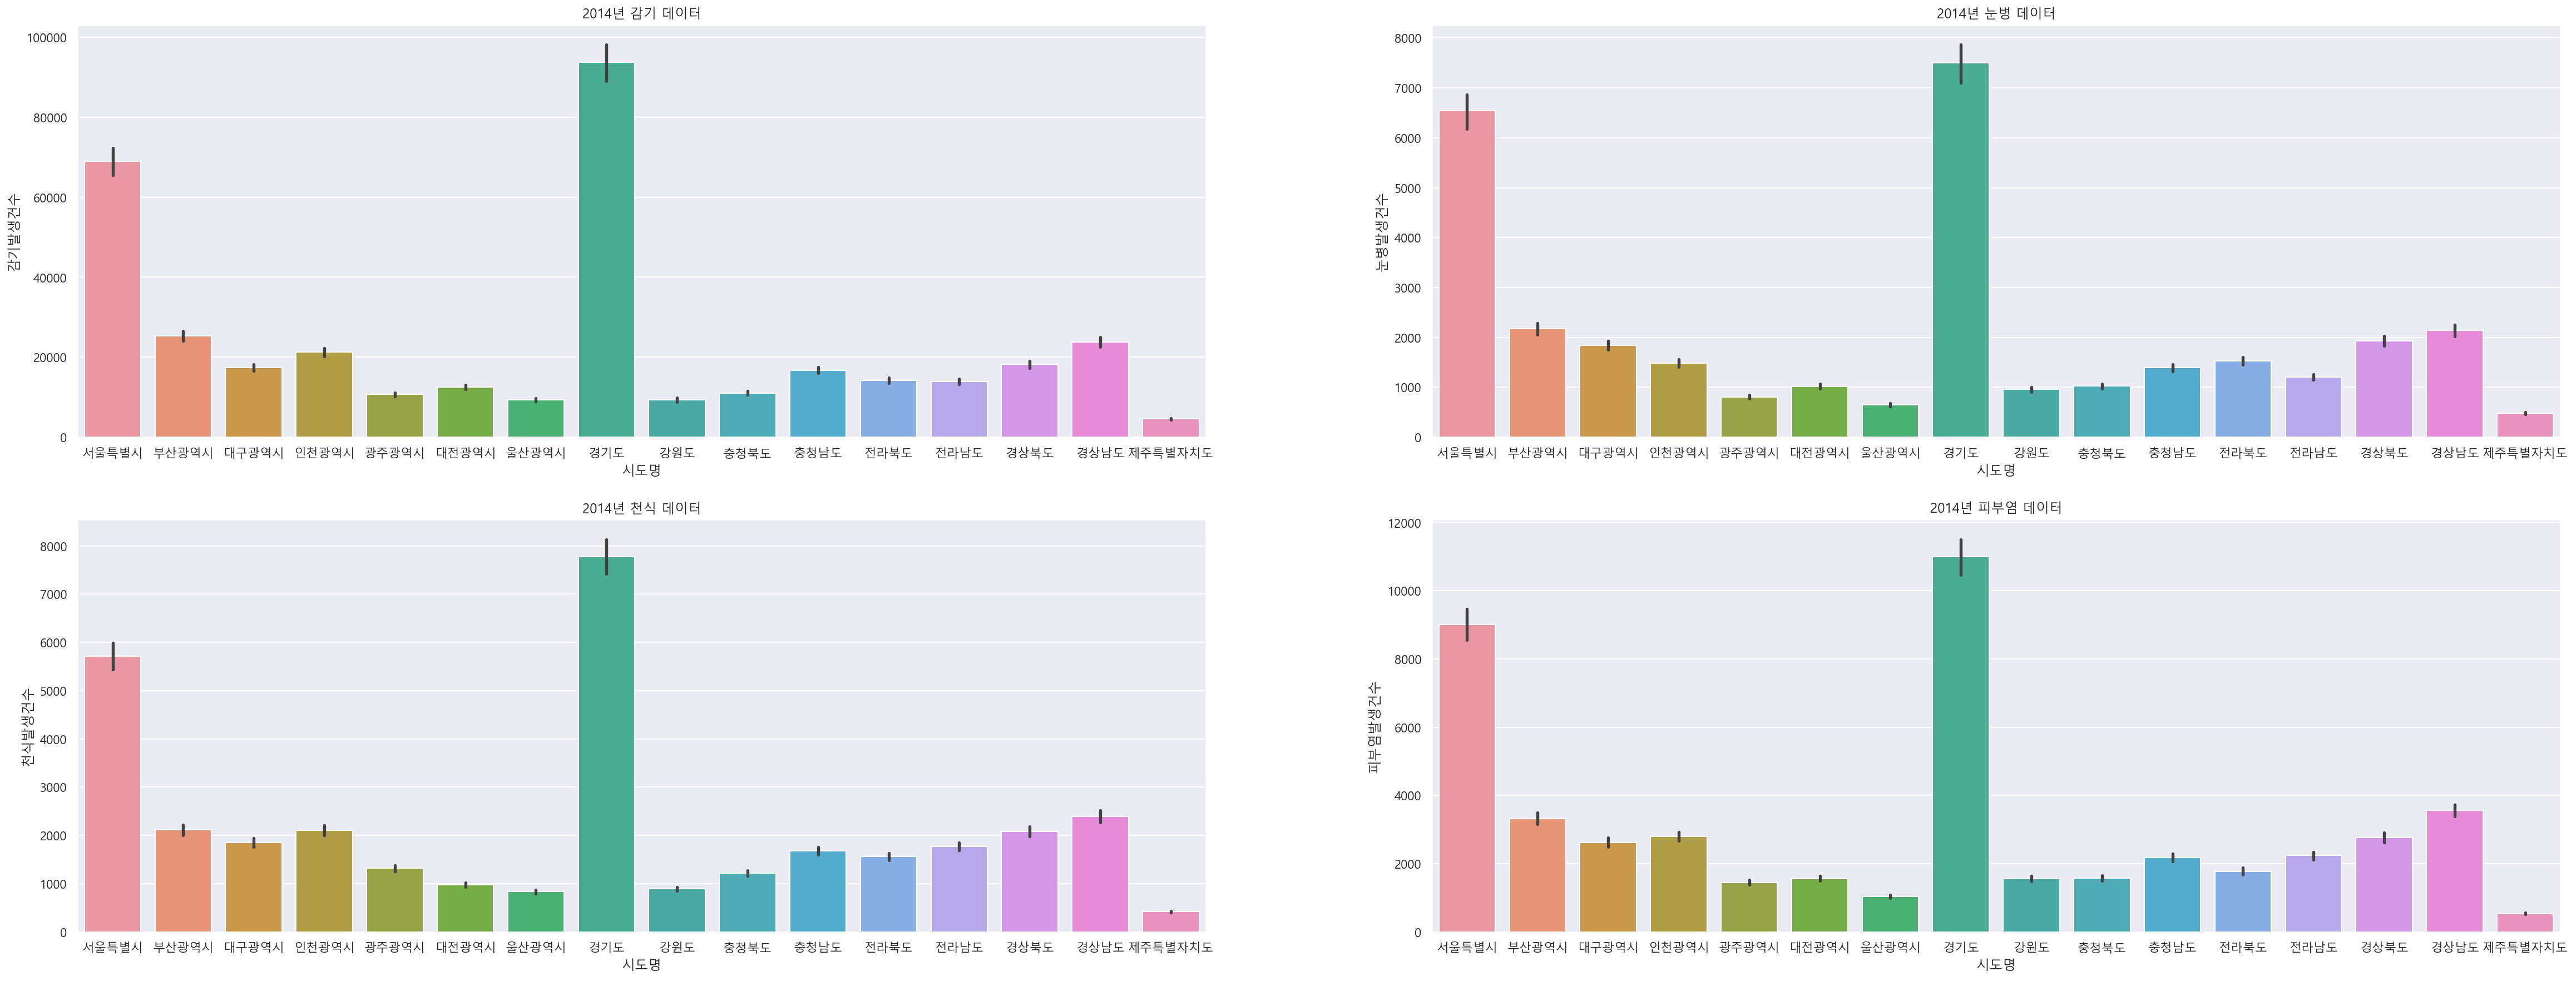

In [107]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2014년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2014년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2014년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2014년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2014년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

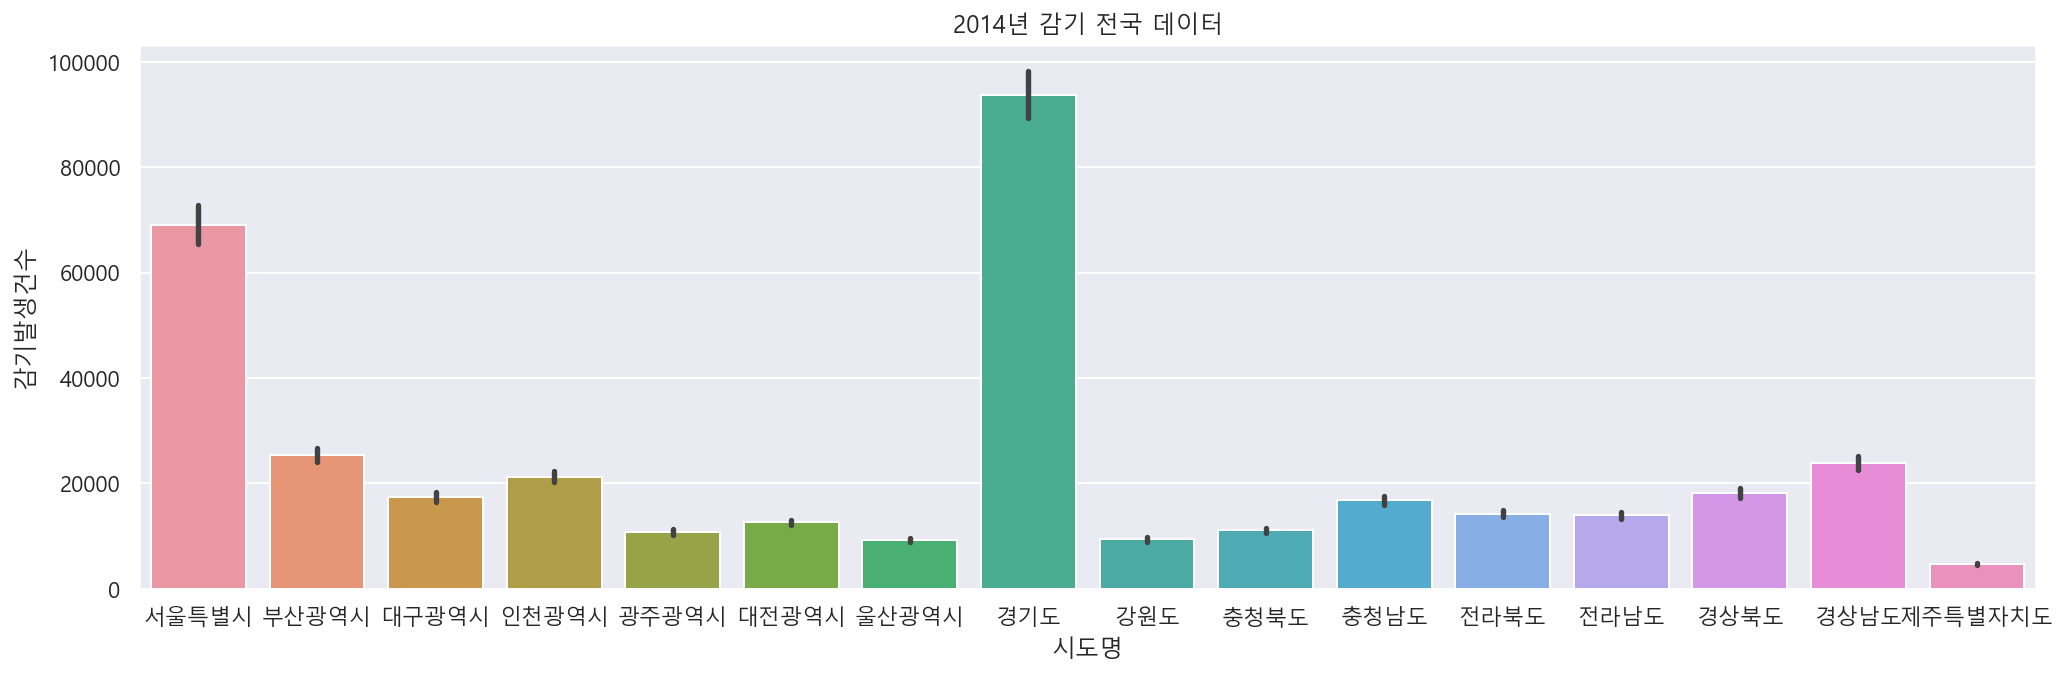

In [108]:
plt.figure(figsize=(17, 5))
plt.title("2014년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2014년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

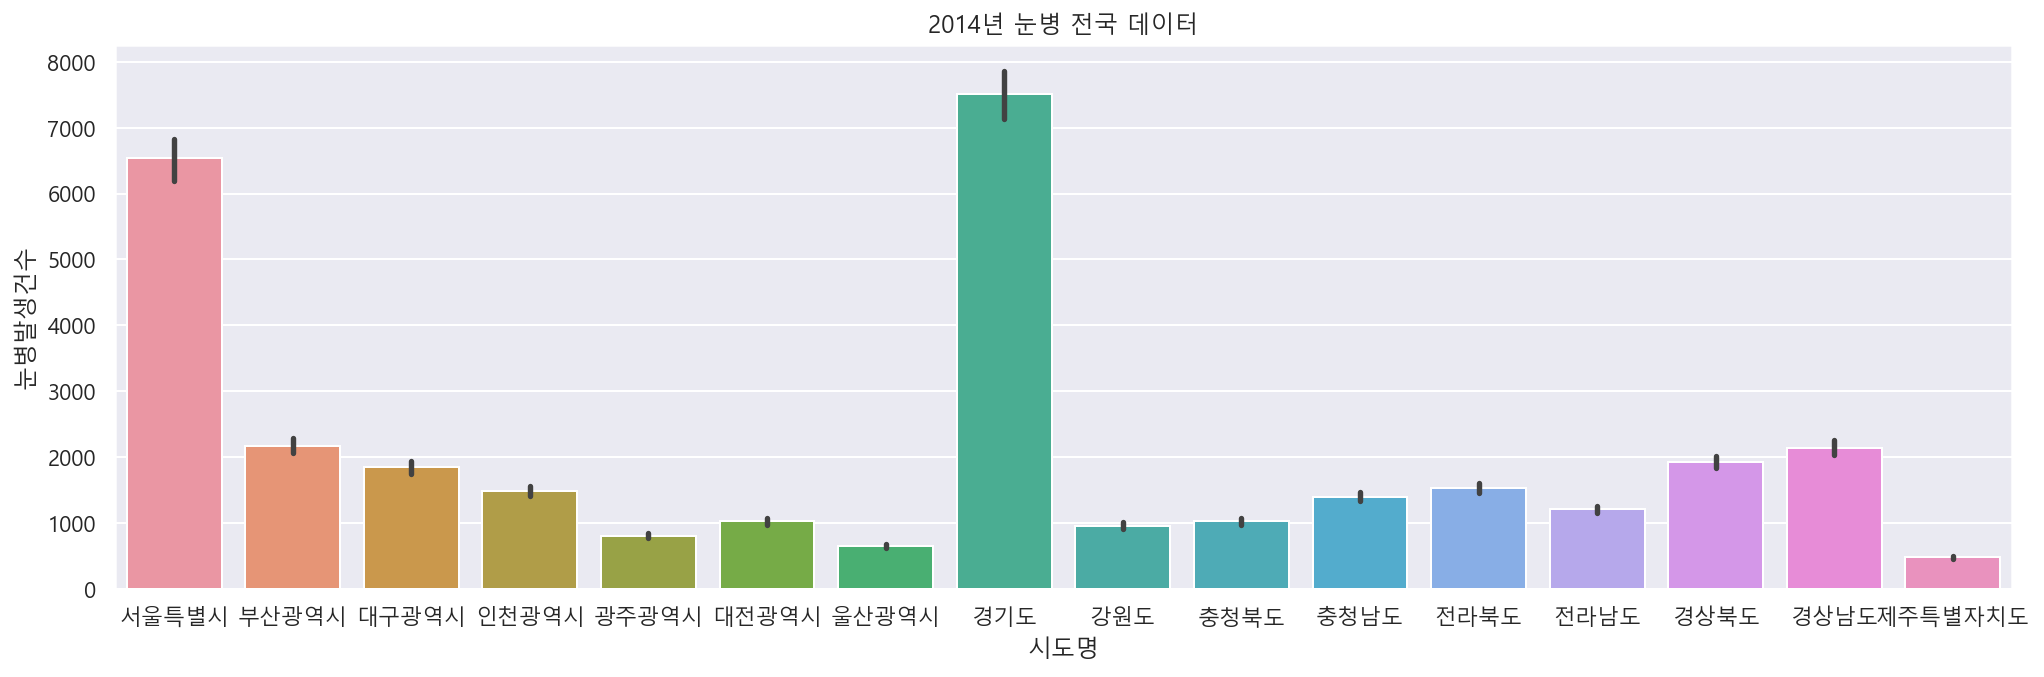

In [109]:
plt.figure(figsize=(17, 5))
plt.title("2014년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2014년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

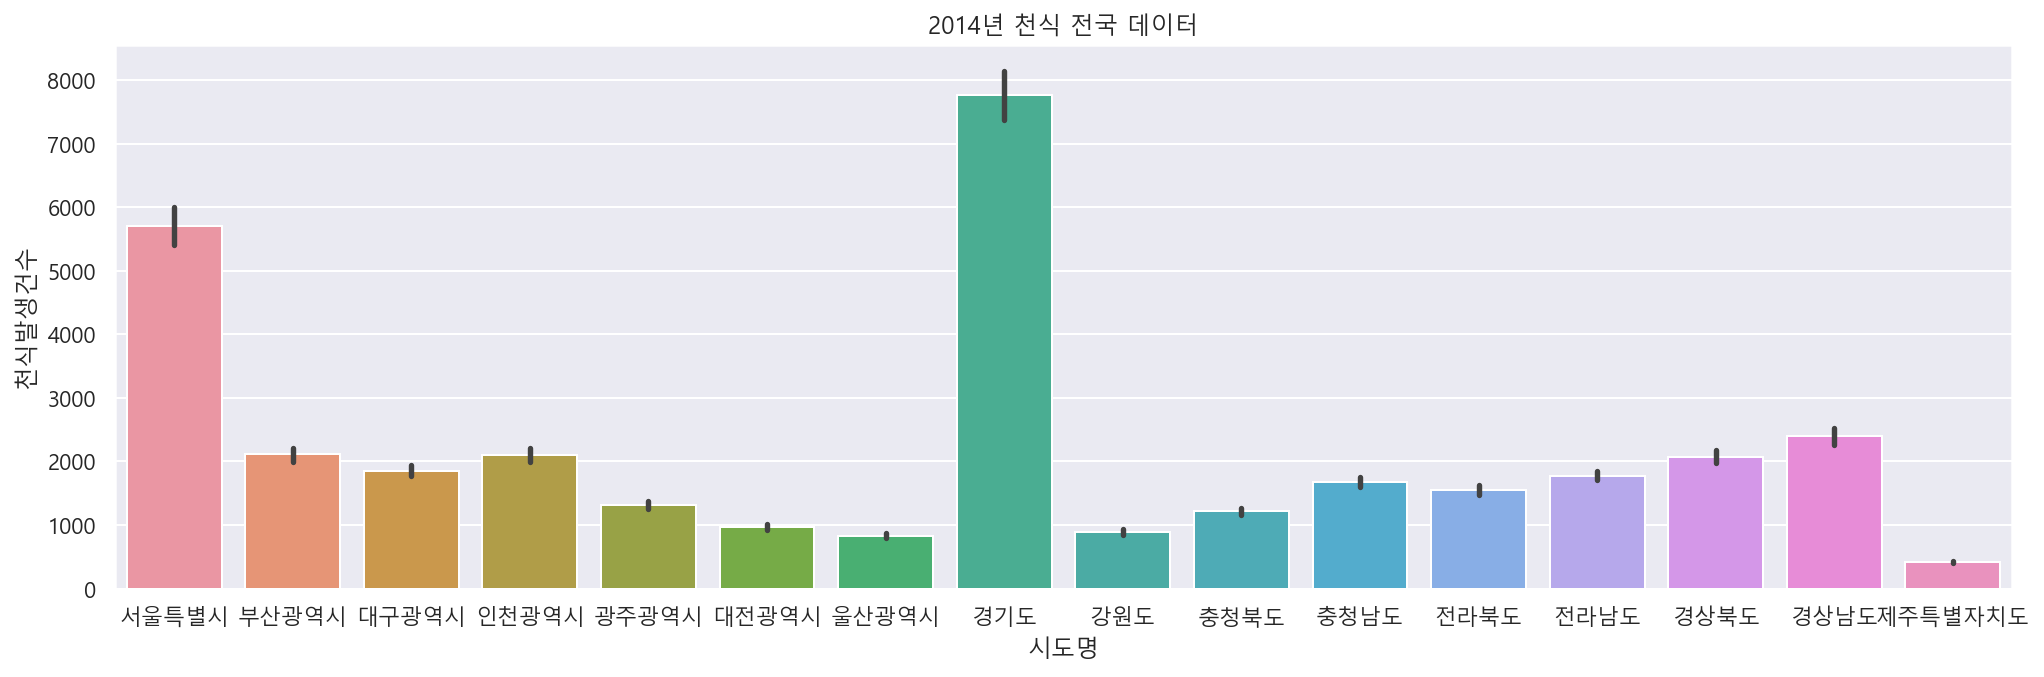

In [110]:
plt.figure(figsize=(17, 5))
plt.title("2014년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2014년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

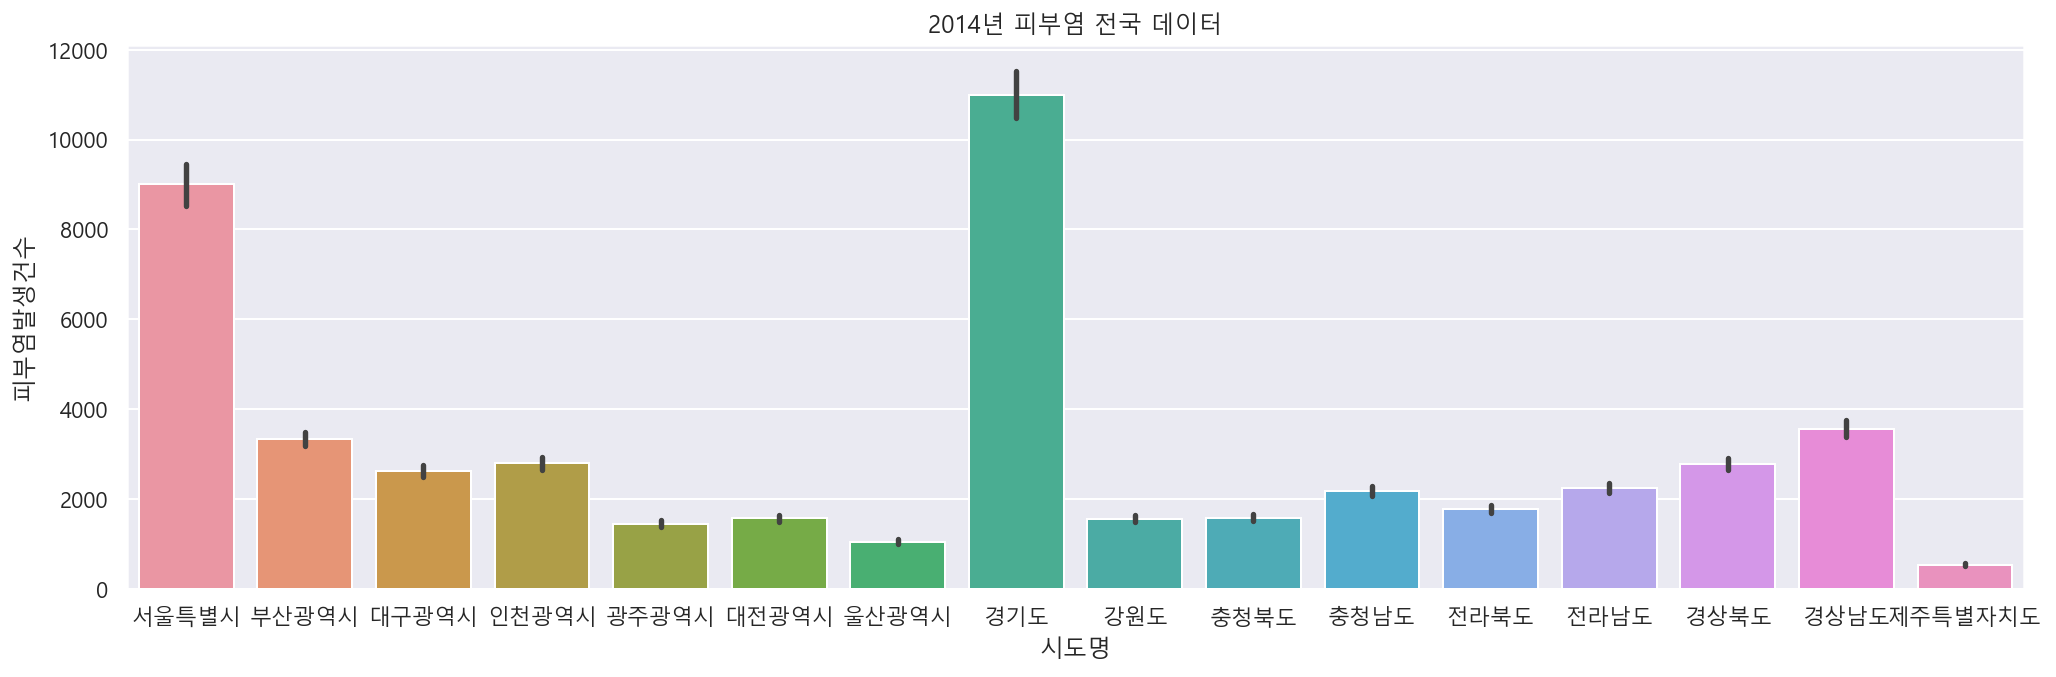

In [111]:
plt.figure(figsize=(17, 5))
plt.title("2014년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2014], x="시도명", y="피부염발생건수")

### 2015년 전국 데이터

<AxesSubplot:title={'center':'2015년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

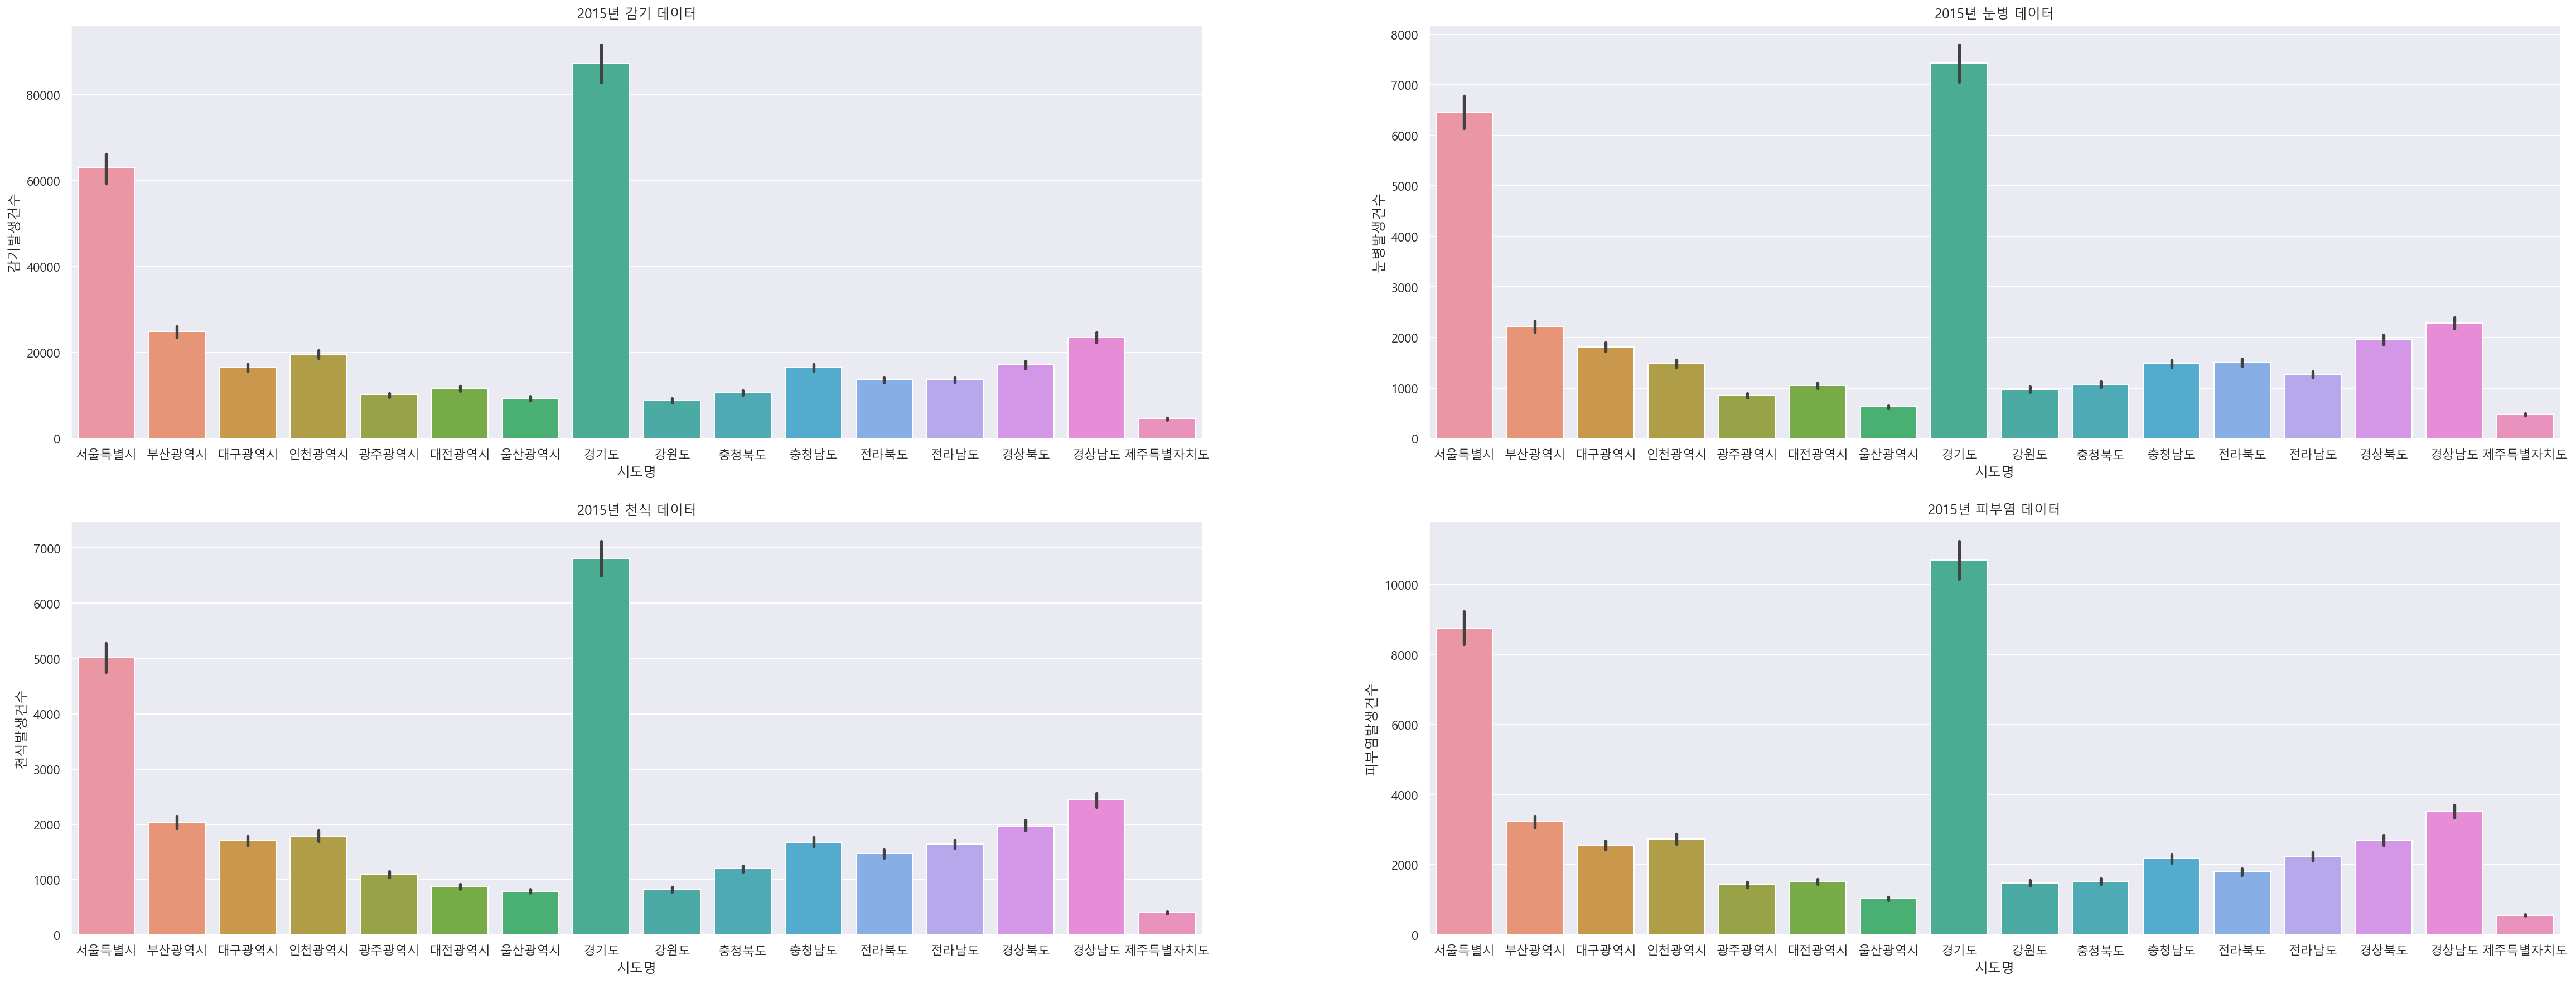

In [112]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2015년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2015년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2015년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2015년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2015년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

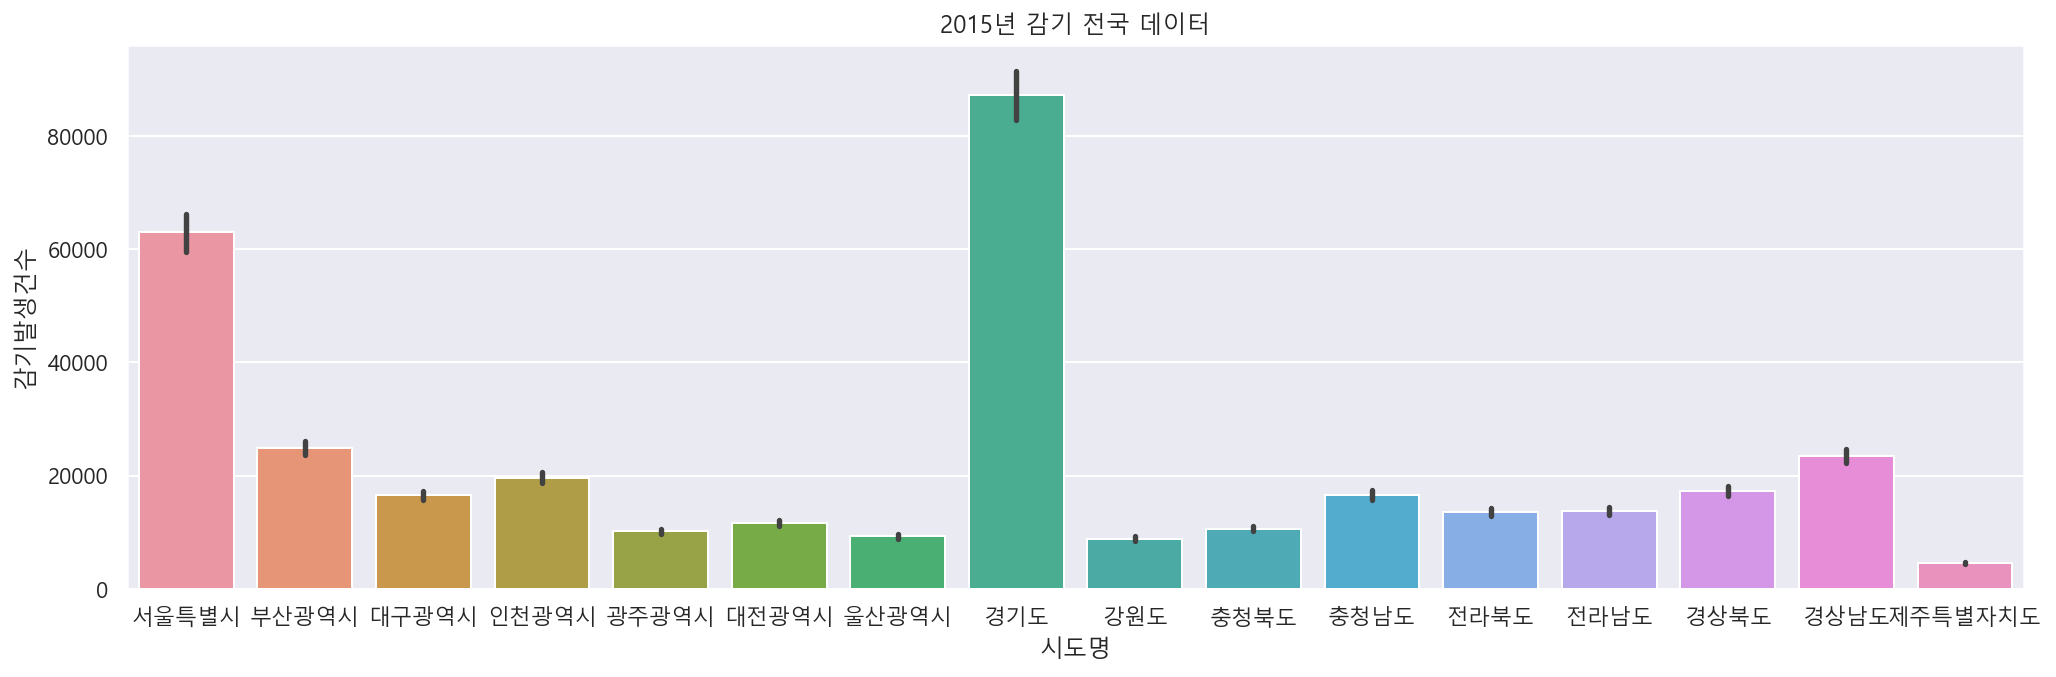

In [113]:
plt.figure(figsize=(17, 5))
plt.title("2015년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2015년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

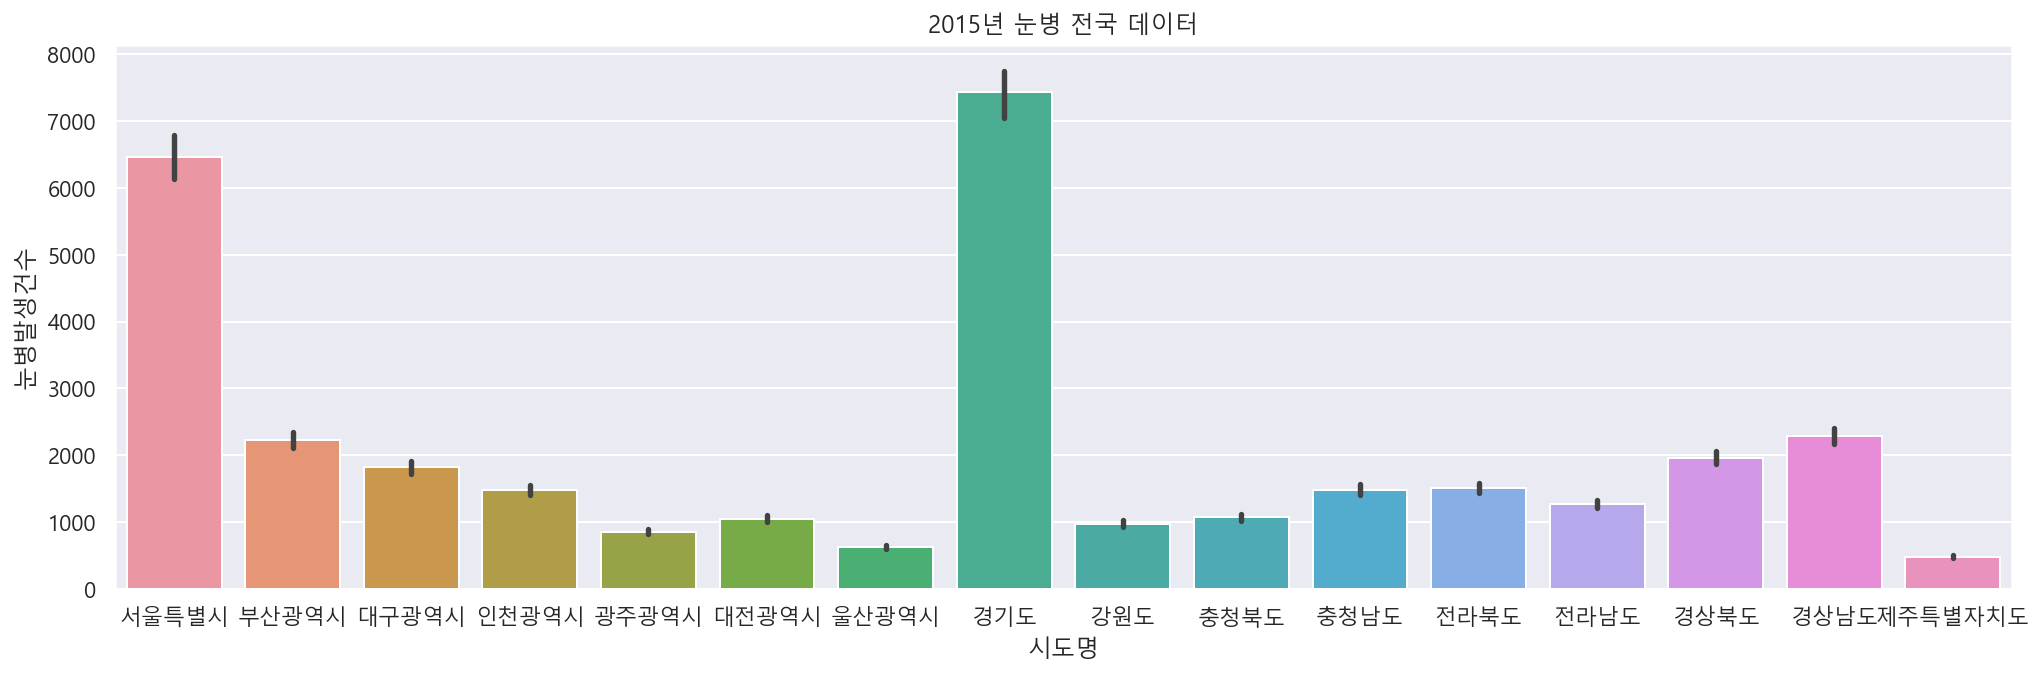

In [114]:
plt.figure(figsize=(17, 5))
plt.title("2015년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2015년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

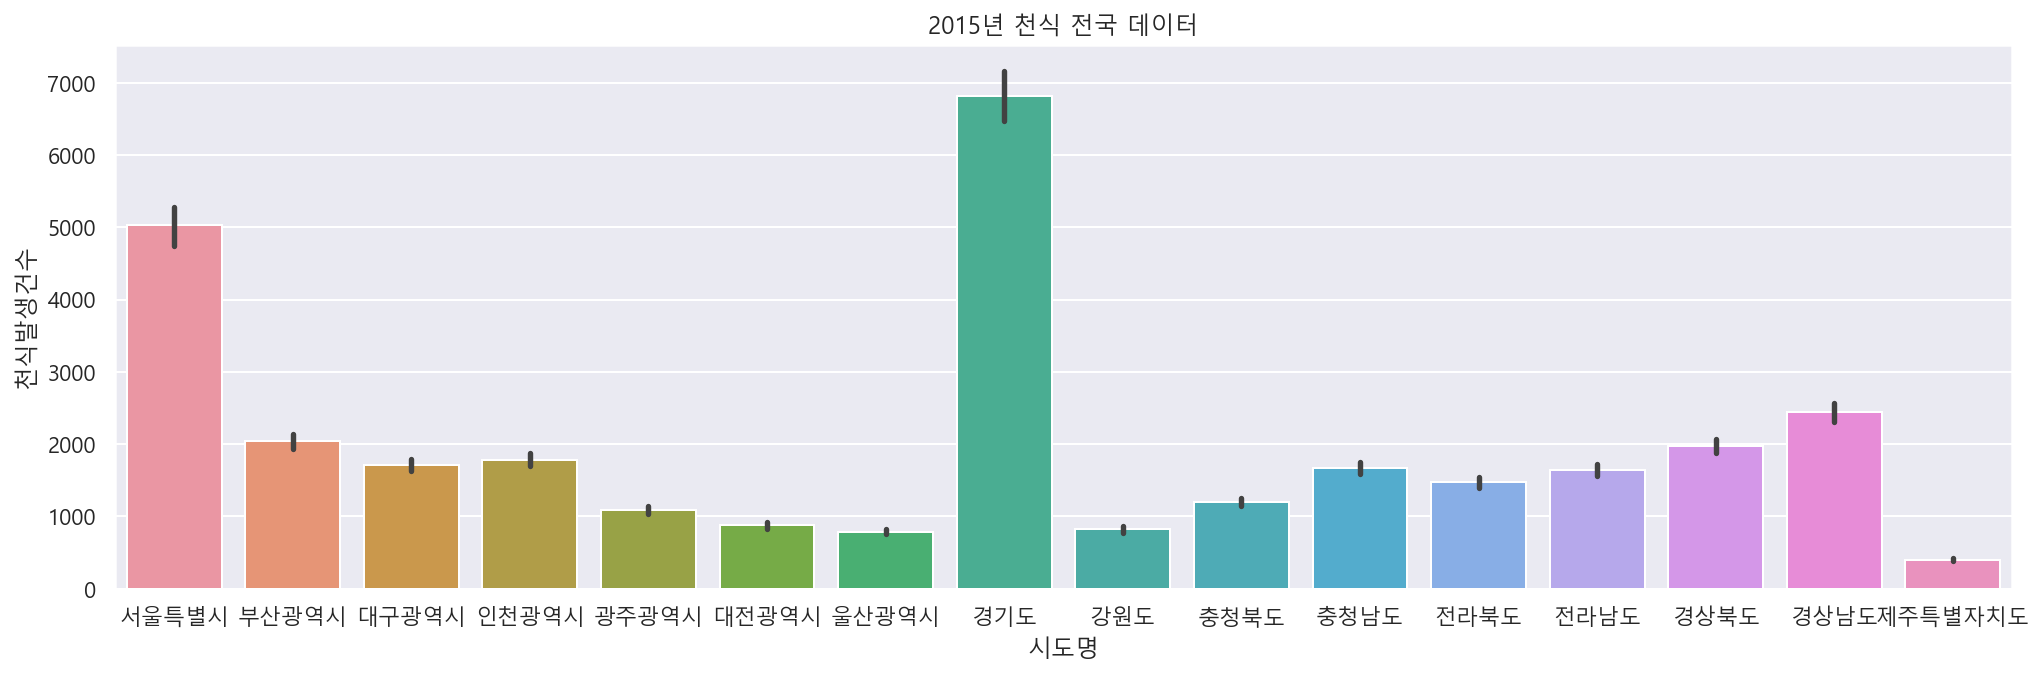

In [115]:
plt.figure(figsize=(17, 5))
plt.title("2015년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2015년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

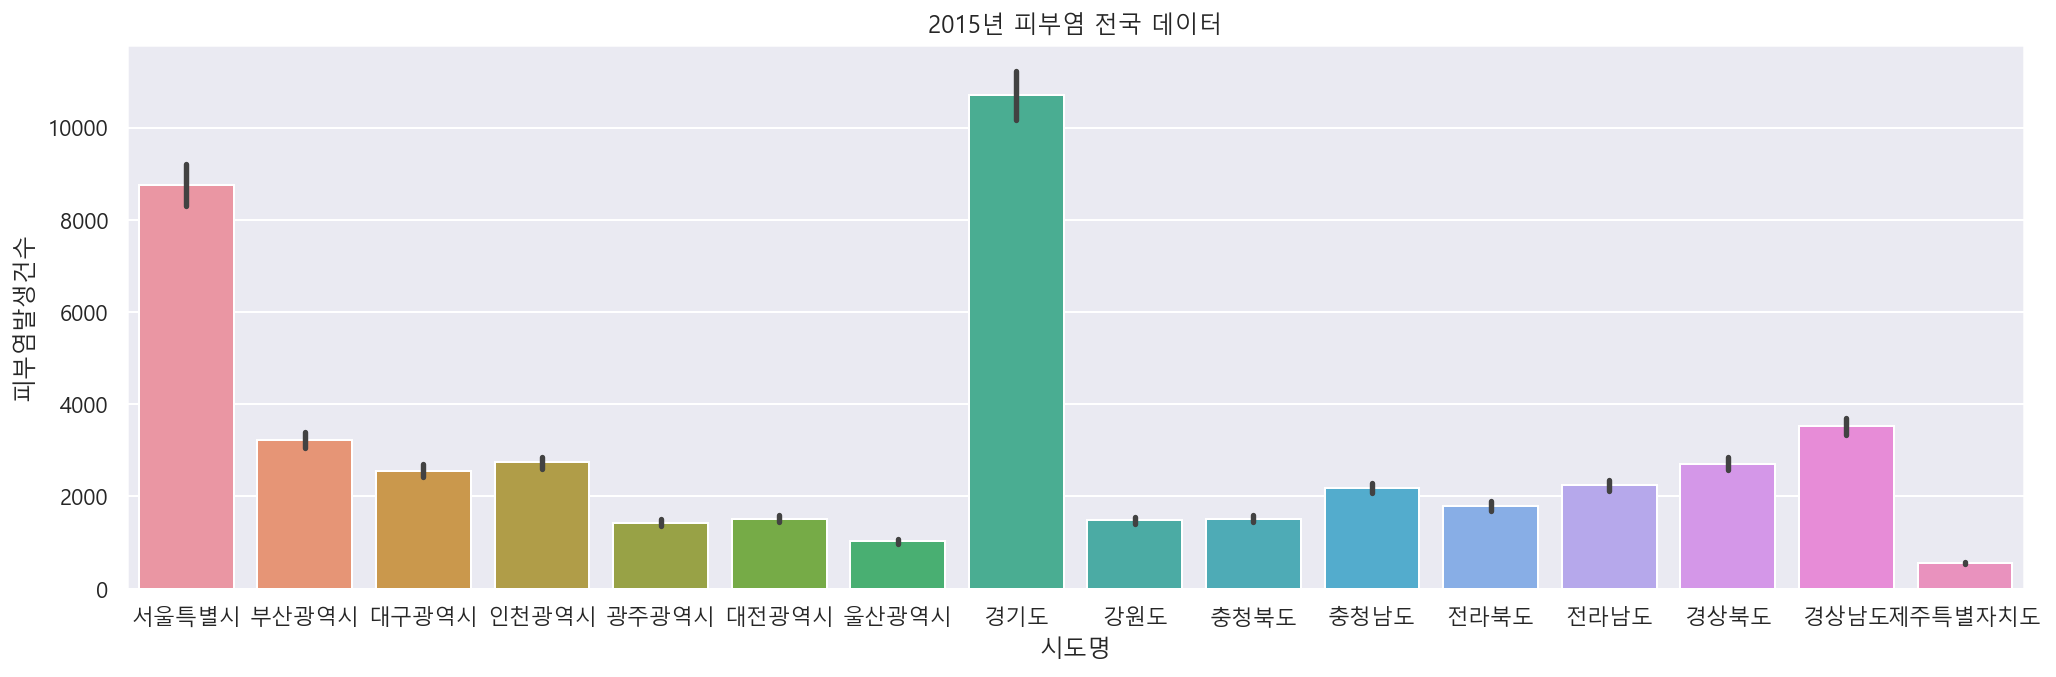

In [116]:
plt.figure(figsize=(17, 5))
plt.title("2015년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2015], x="시도명", y="피부염발생건수")

### 2016년 전국 데이터

<AxesSubplot:title={'center':'2016년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

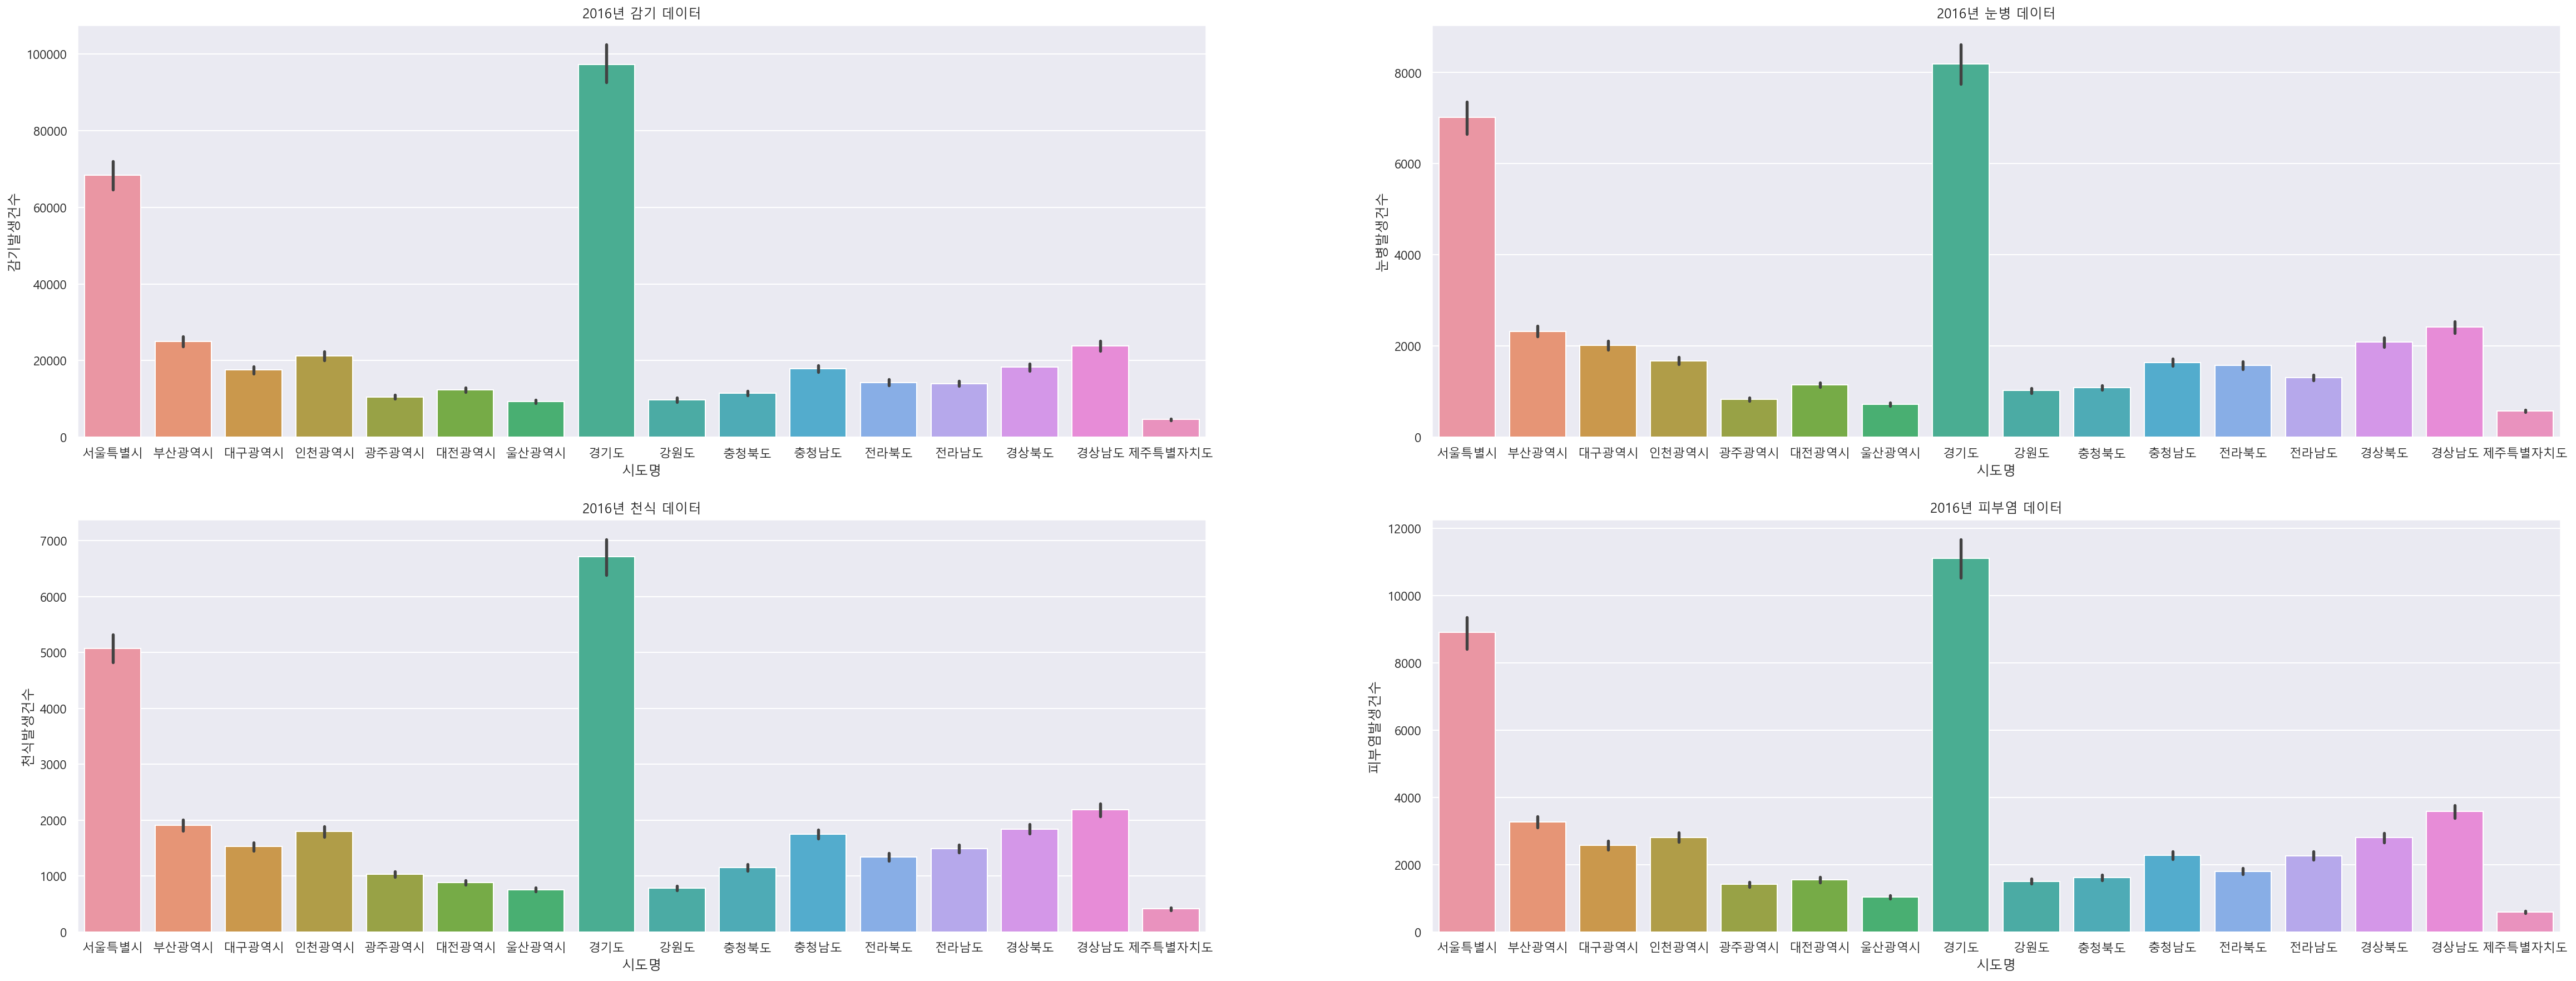

In [117]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2016년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2016년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2016년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2016년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2016년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

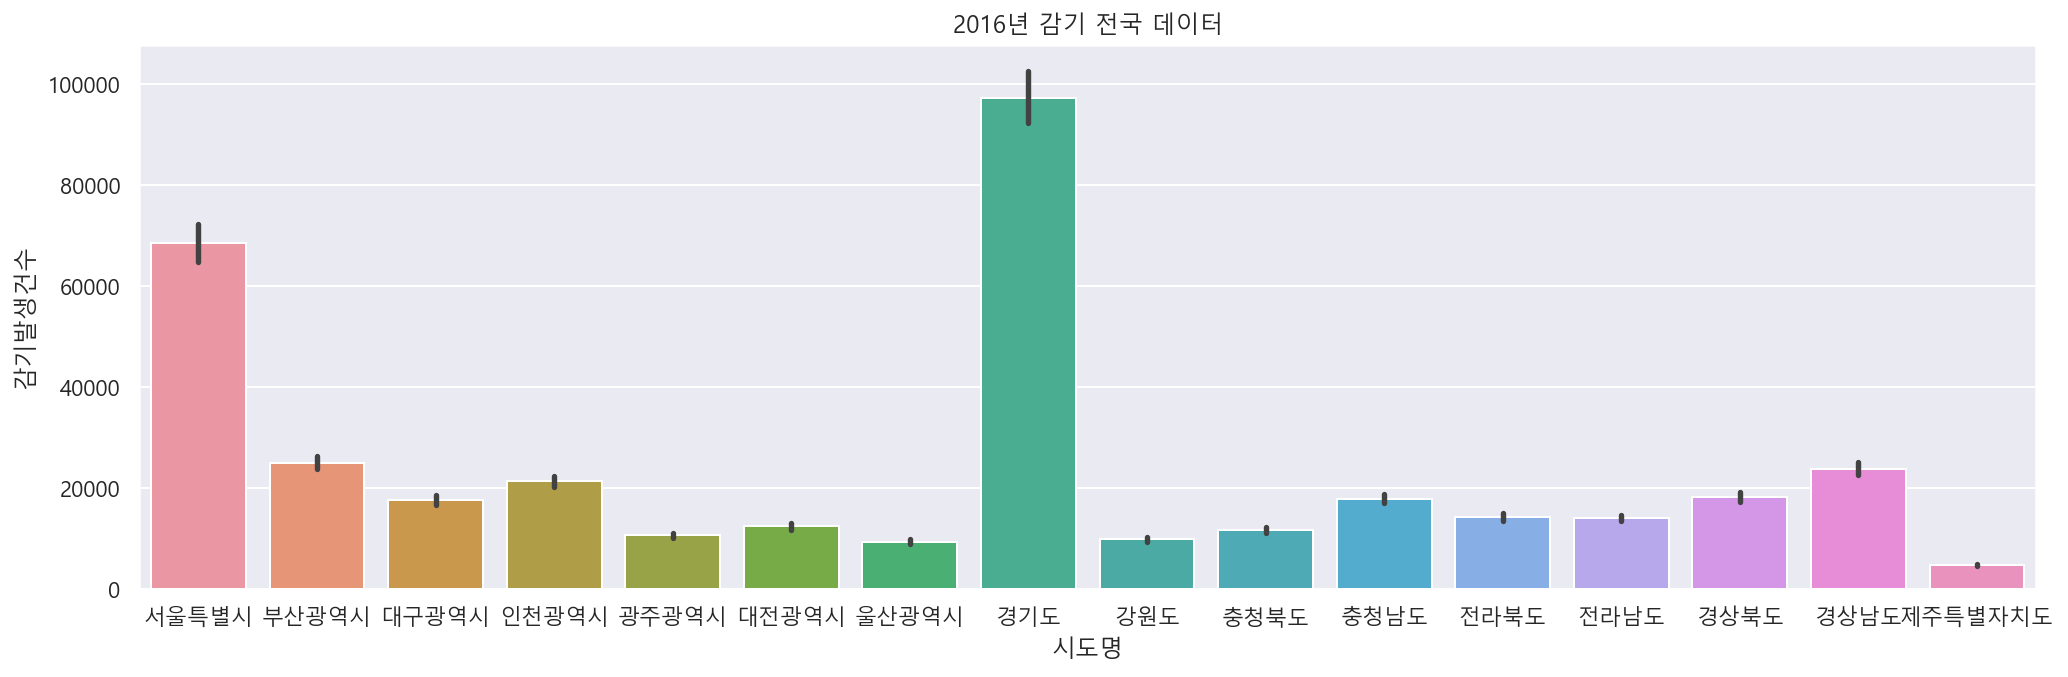

In [118]:
plt.figure(figsize=(17, 5))
plt.title("2016년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2016년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

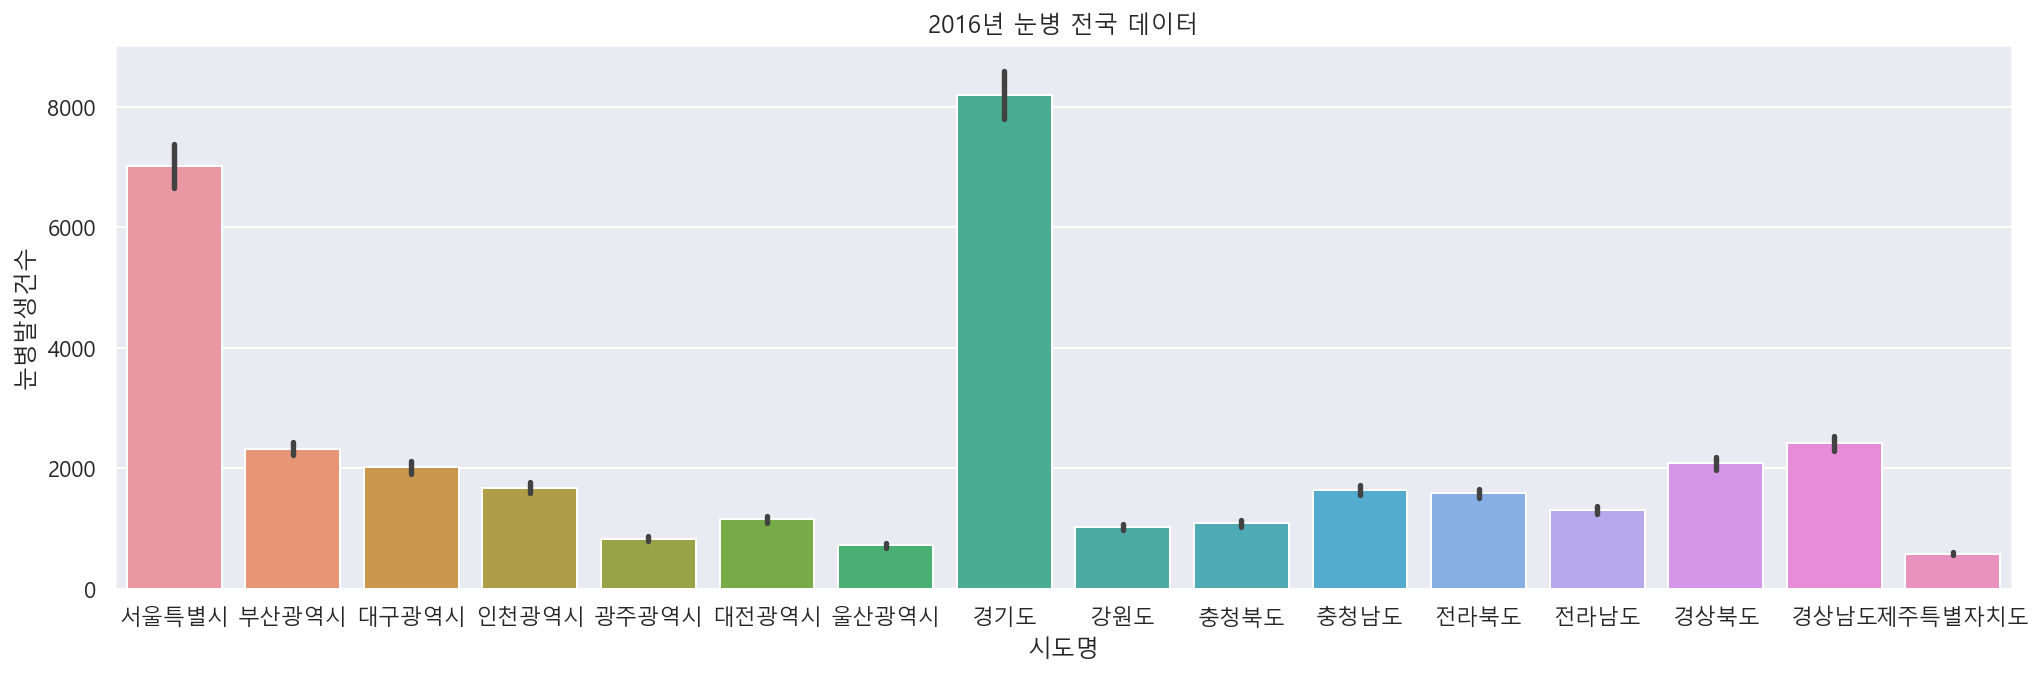

In [119]:
plt.figure(figsize=(17, 5))
plt.title("2016년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2016년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

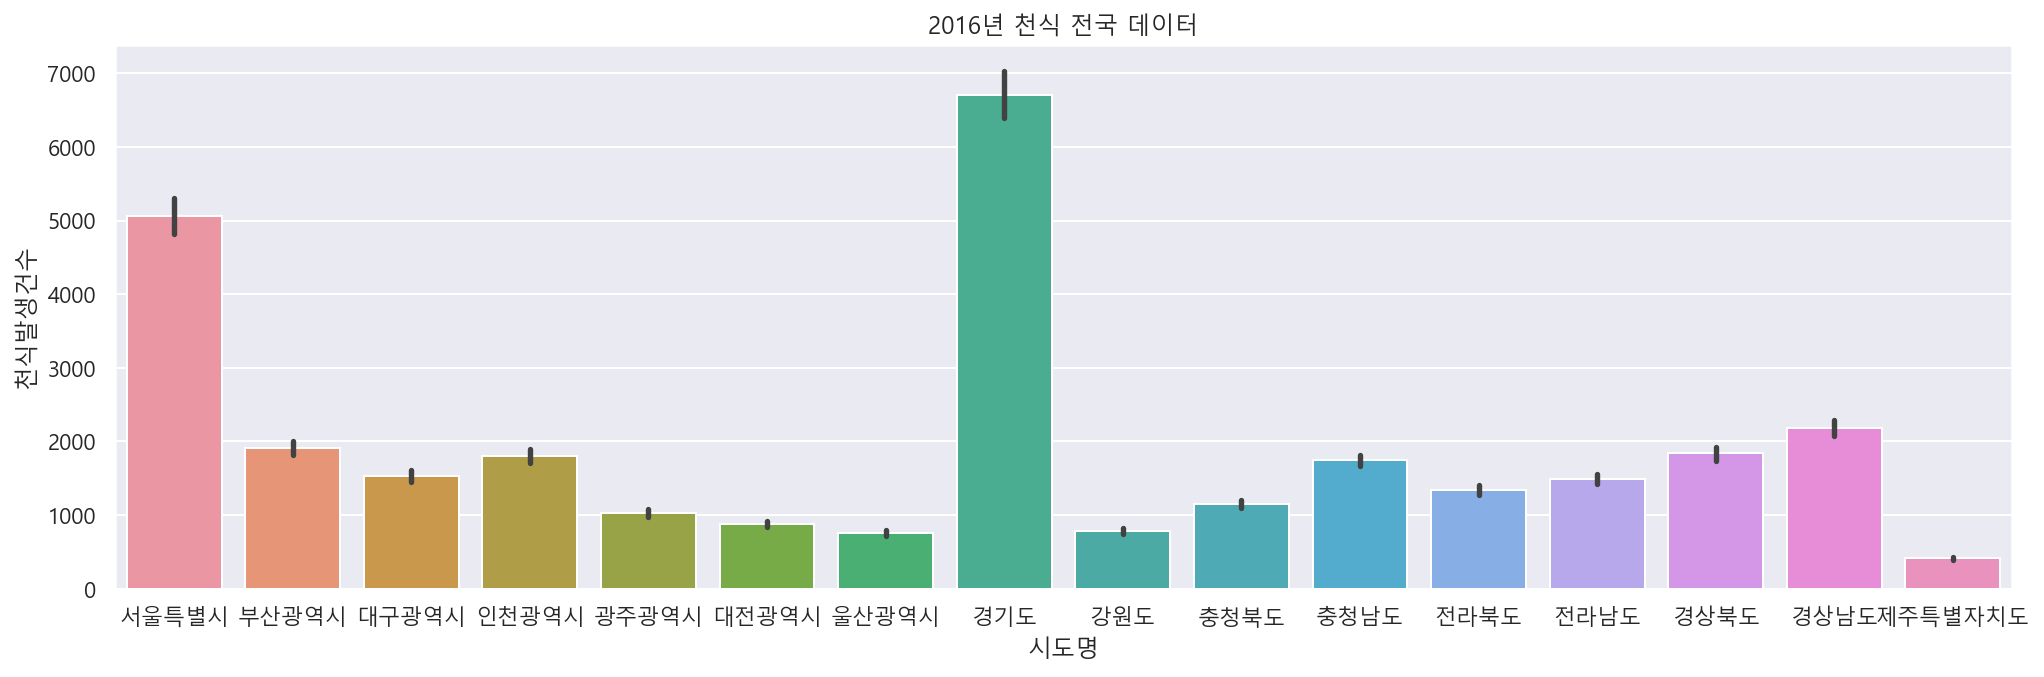

In [120]:
plt.figure(figsize=(17, 5))
plt.title("2016년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2016년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

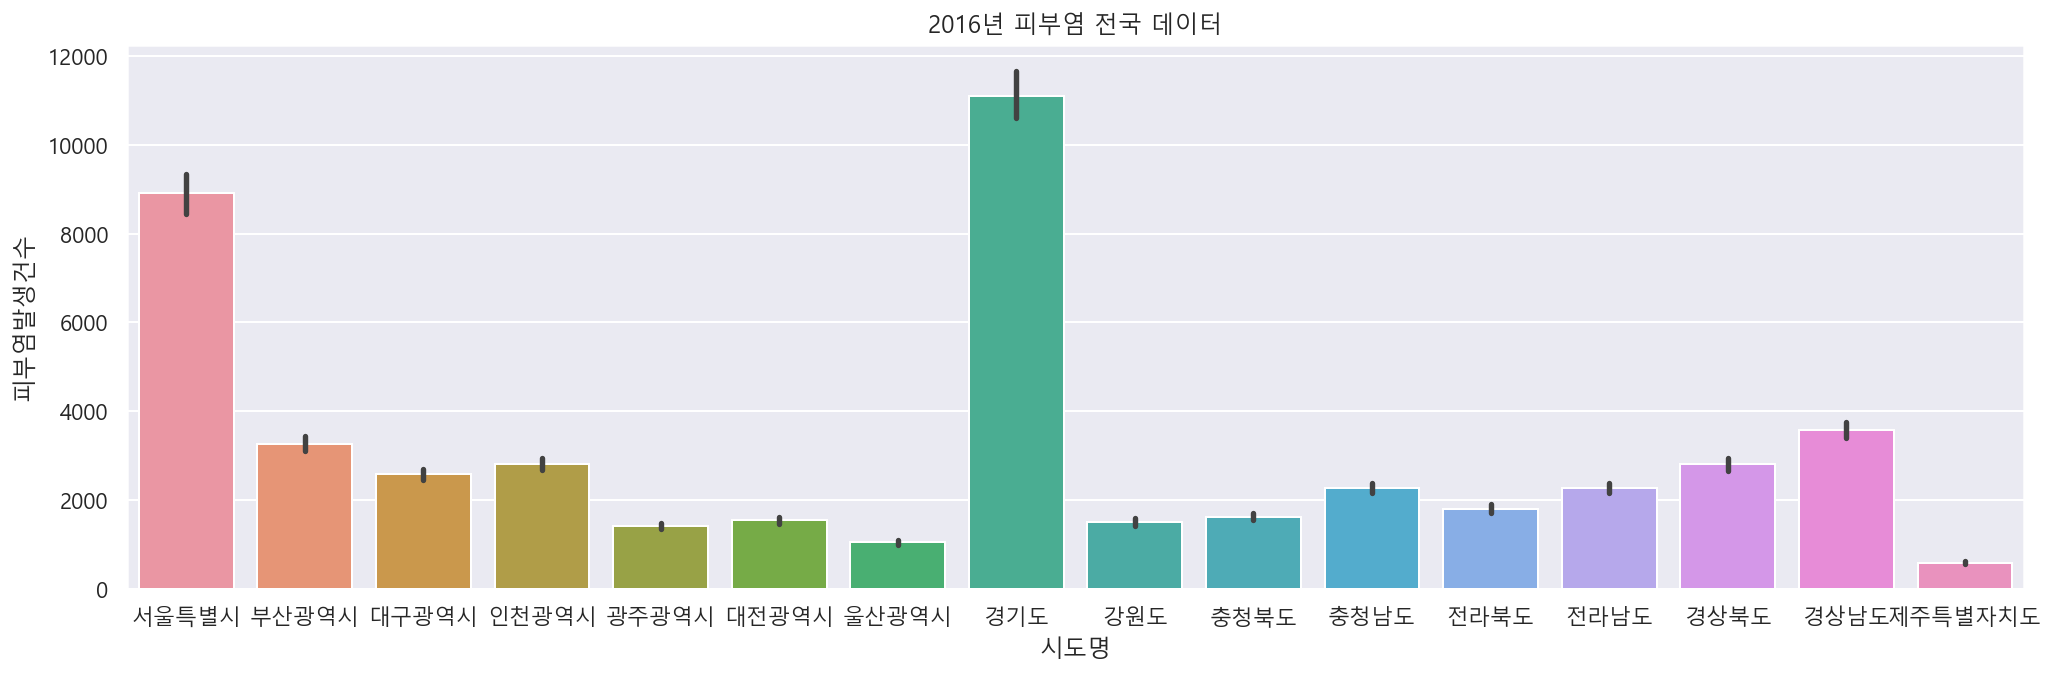

In [121]:
plt.figure(figsize=(17, 5))
plt.title("2016년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2016], x="시도명", y="피부염발생건수")

### 2017년 전국 데이터

<AxesSubplot:title={'center':'2017년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

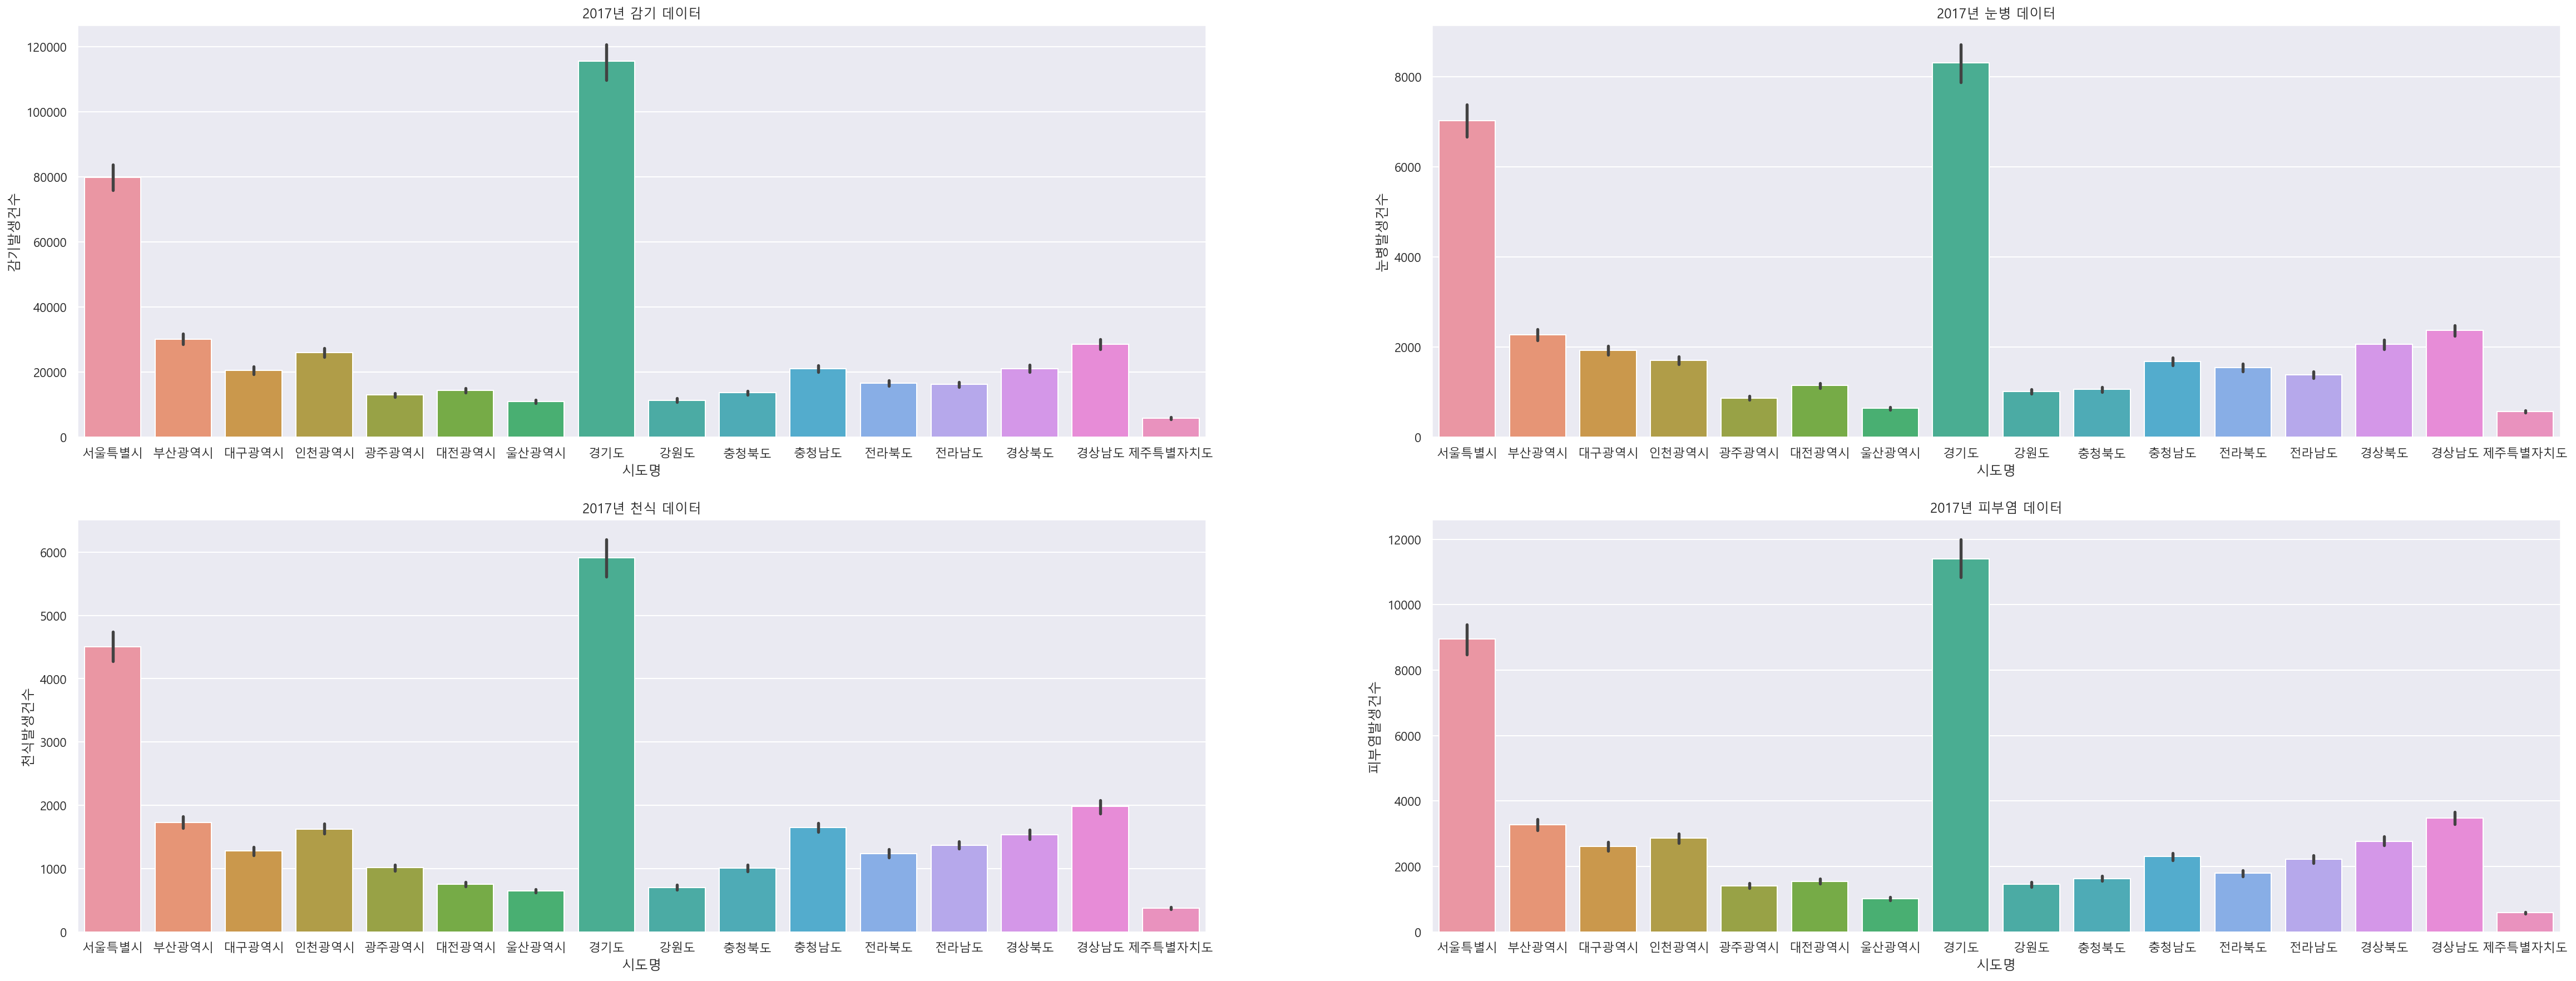

In [122]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2017년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2017년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2017년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2017년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2017년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

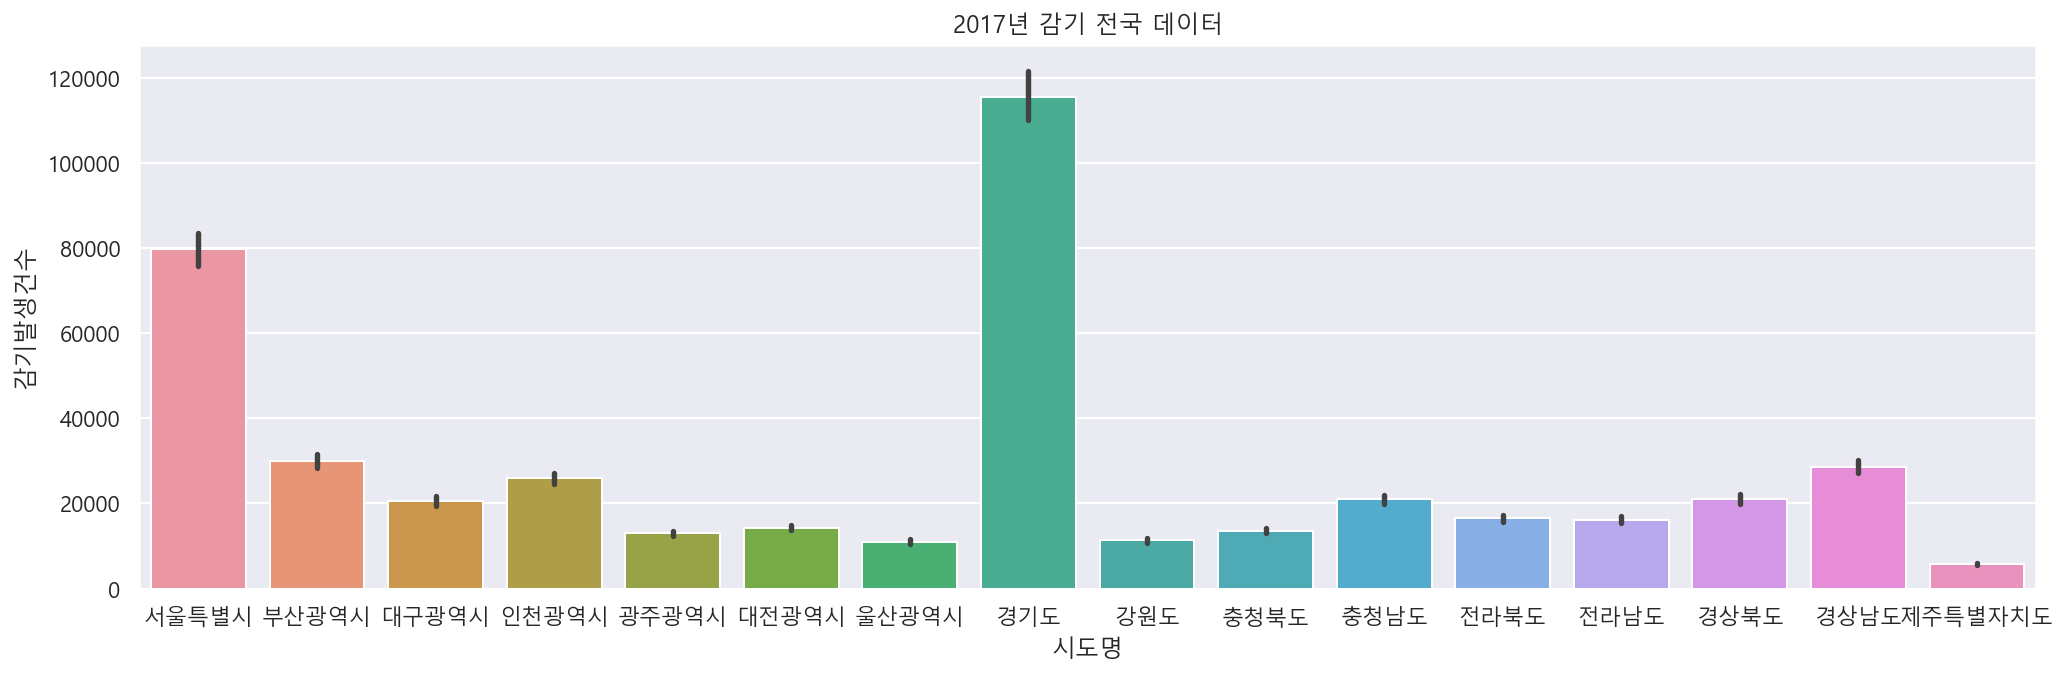

In [123]:
plt.figure(figsize=(17, 5))
plt.title("2017년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2017년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

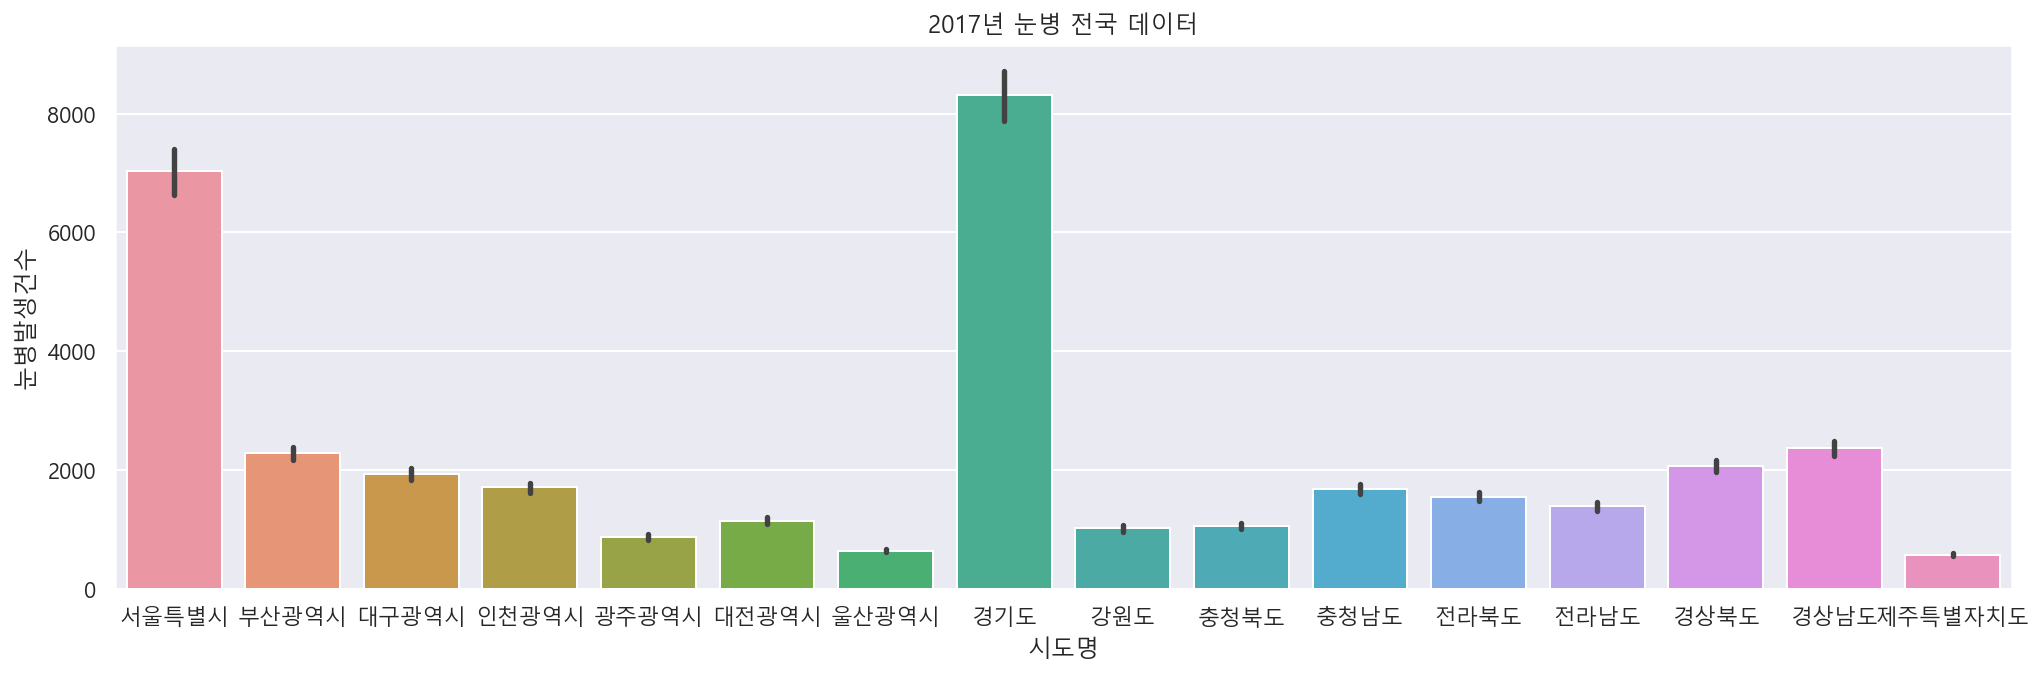

In [124]:
plt.figure(figsize=(17, 5))
plt.title("2017년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2017년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

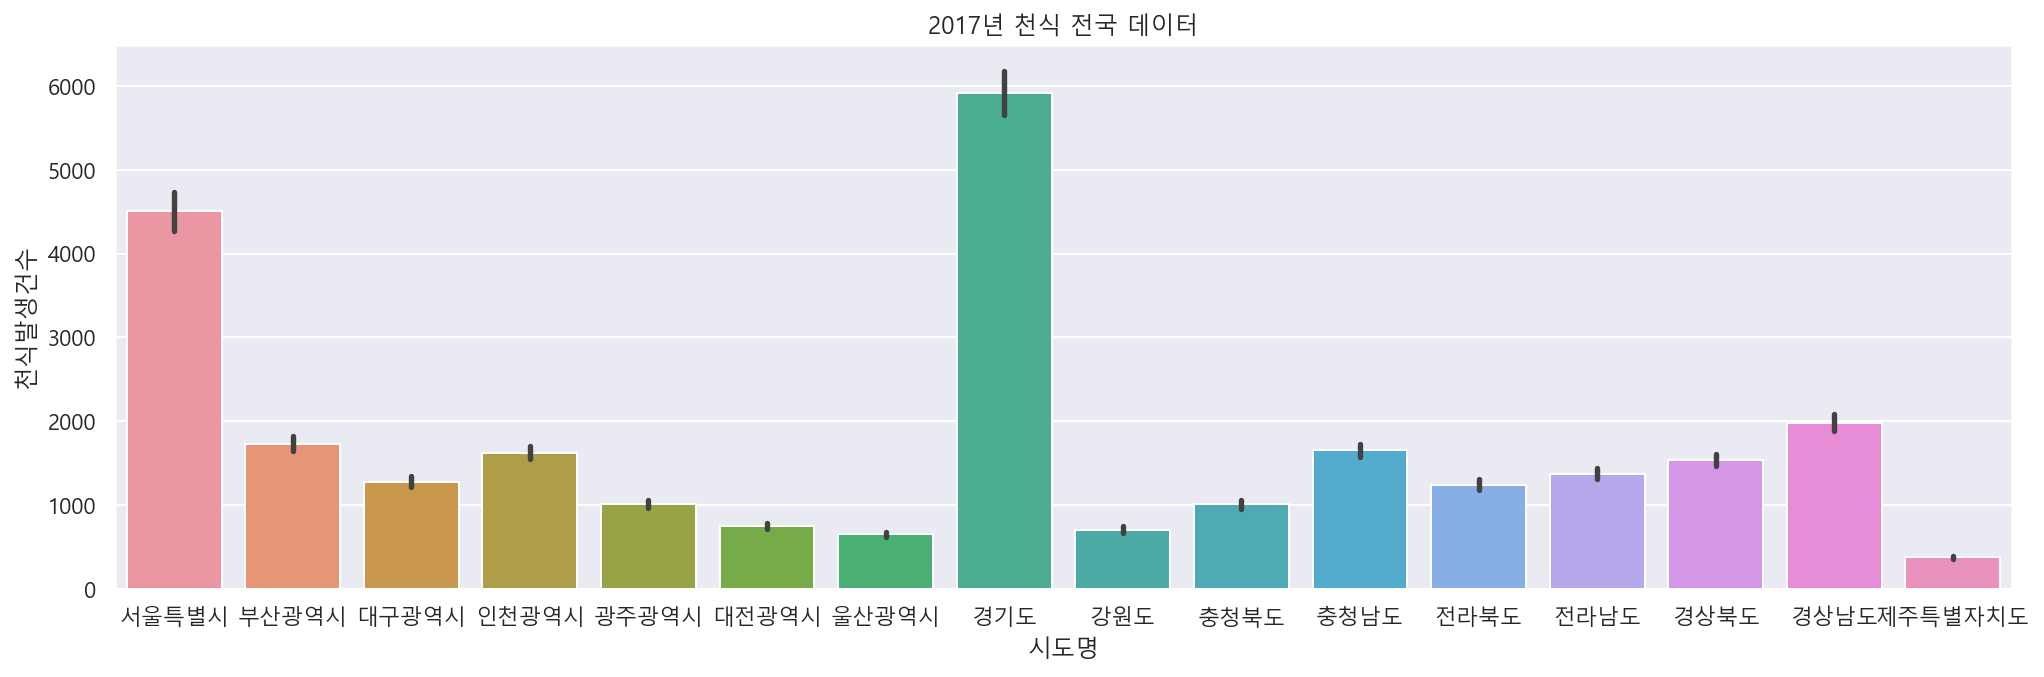

In [125]:
plt.figure(figsize=(17, 5))
plt.title("2017년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2016년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

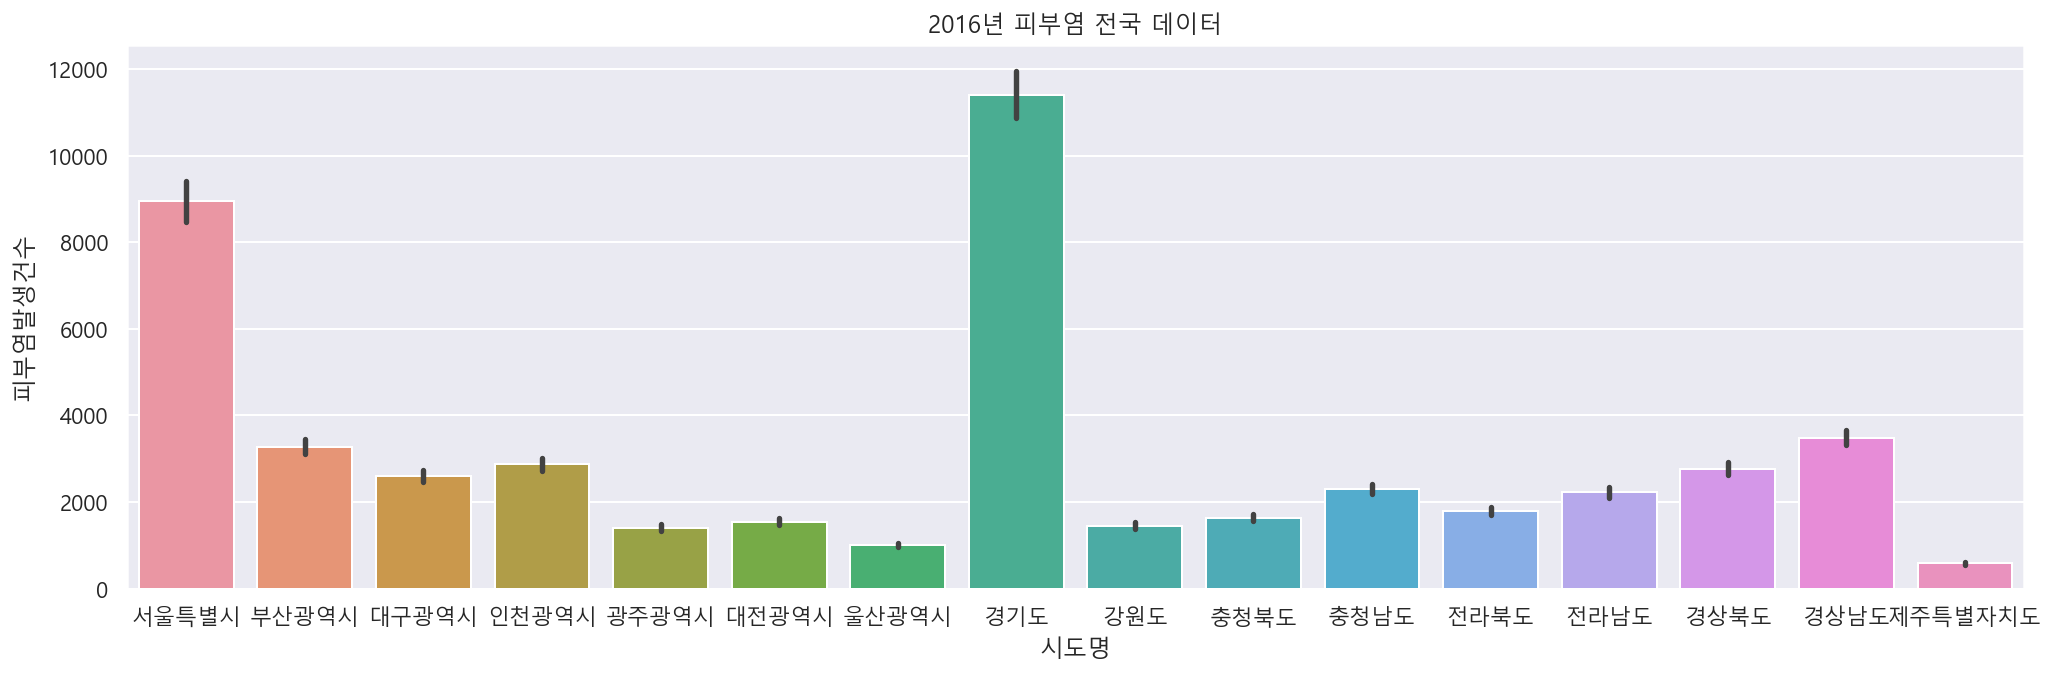

In [126]:
plt.figure(figsize=(17, 5))
plt.title("2016년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2017], x="시도명", y="피부염발생건수")

### 2018년 전국 데이터

<AxesSubplot:title={'center':'2018년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

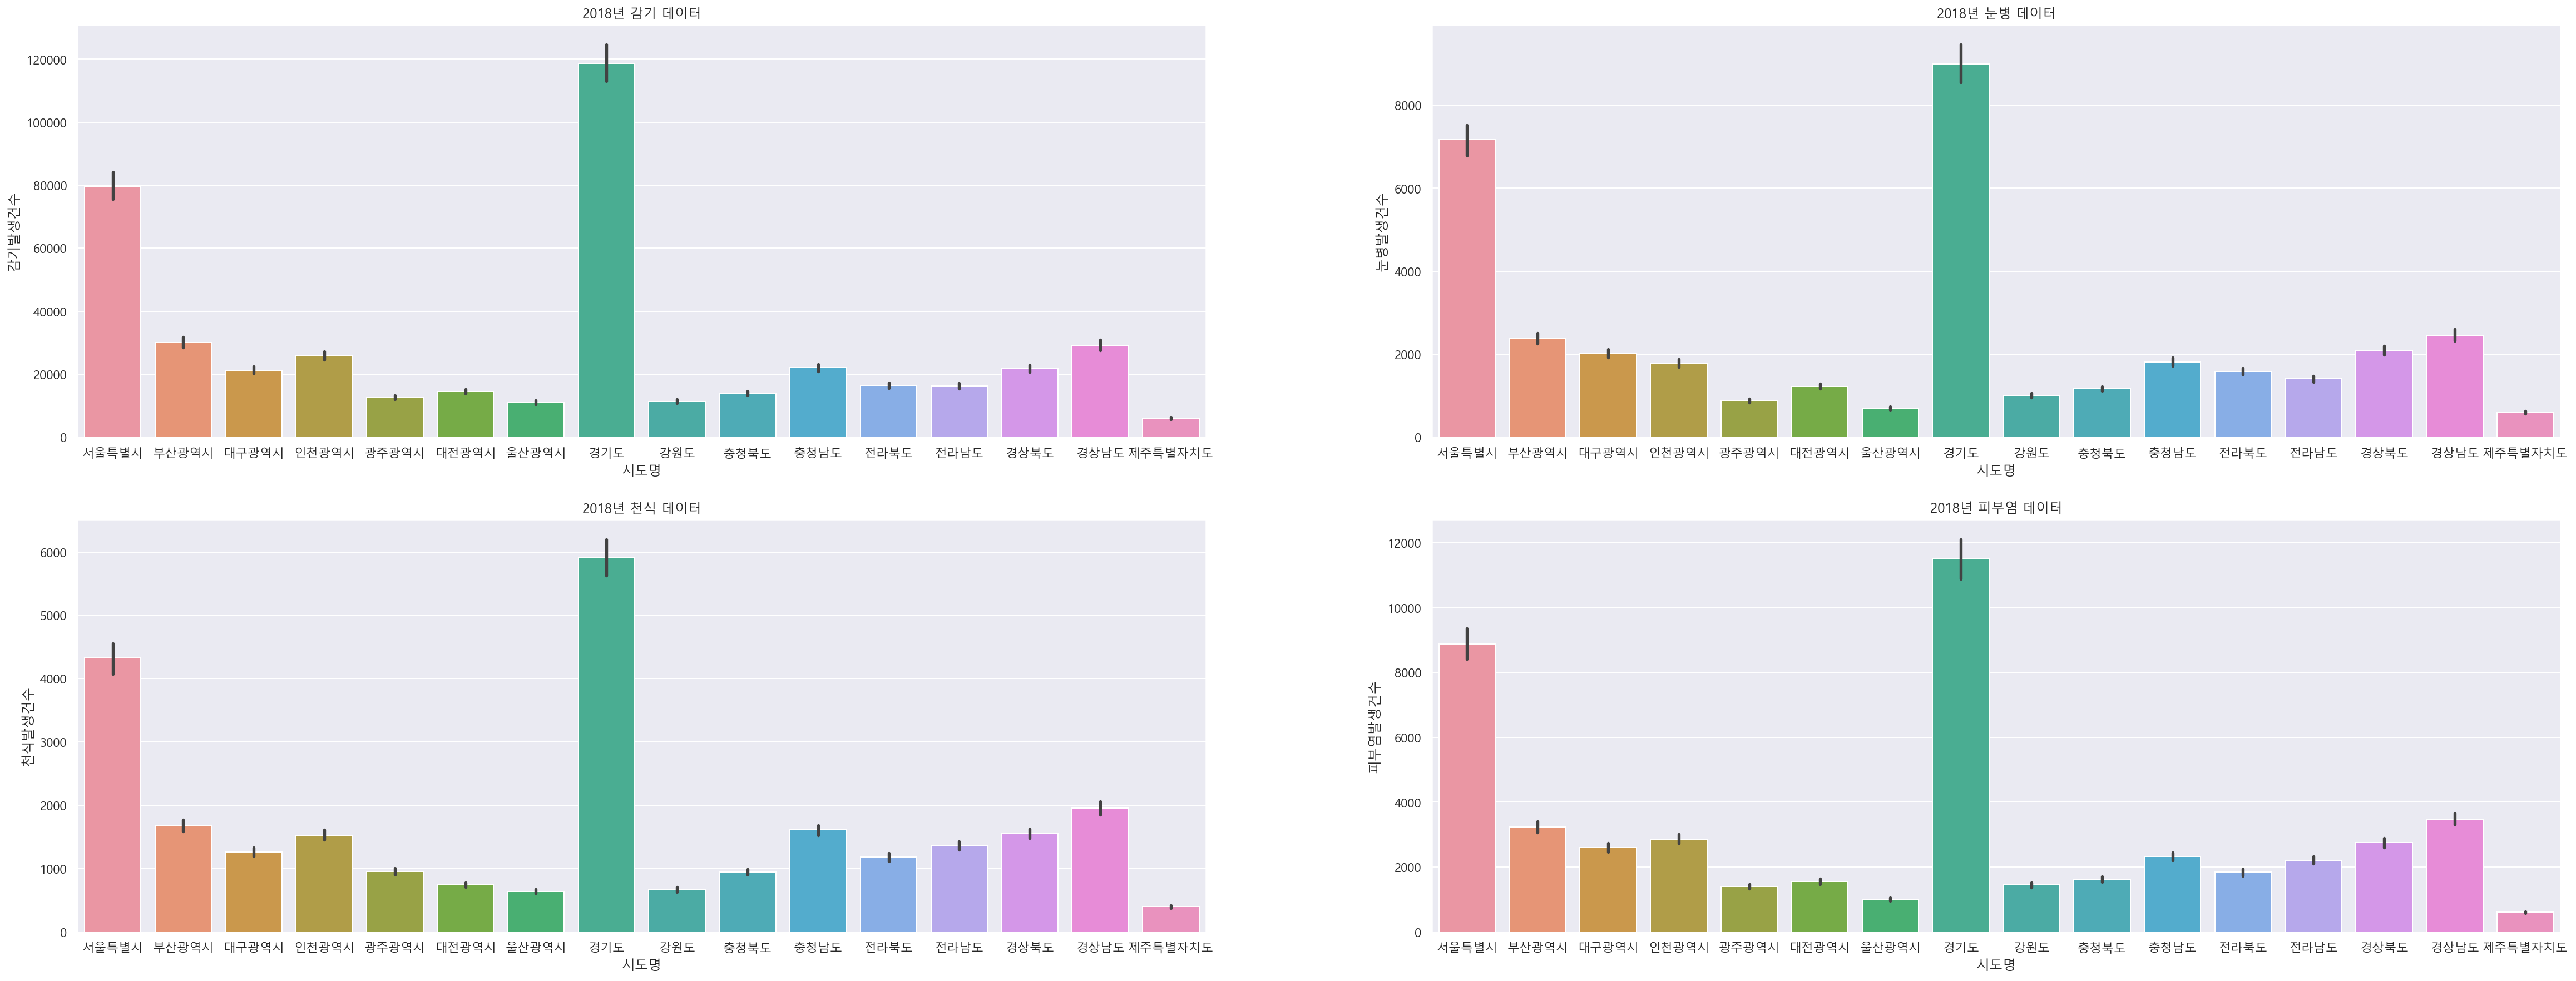

In [127]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2018년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2018년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2018년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2018년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2018년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

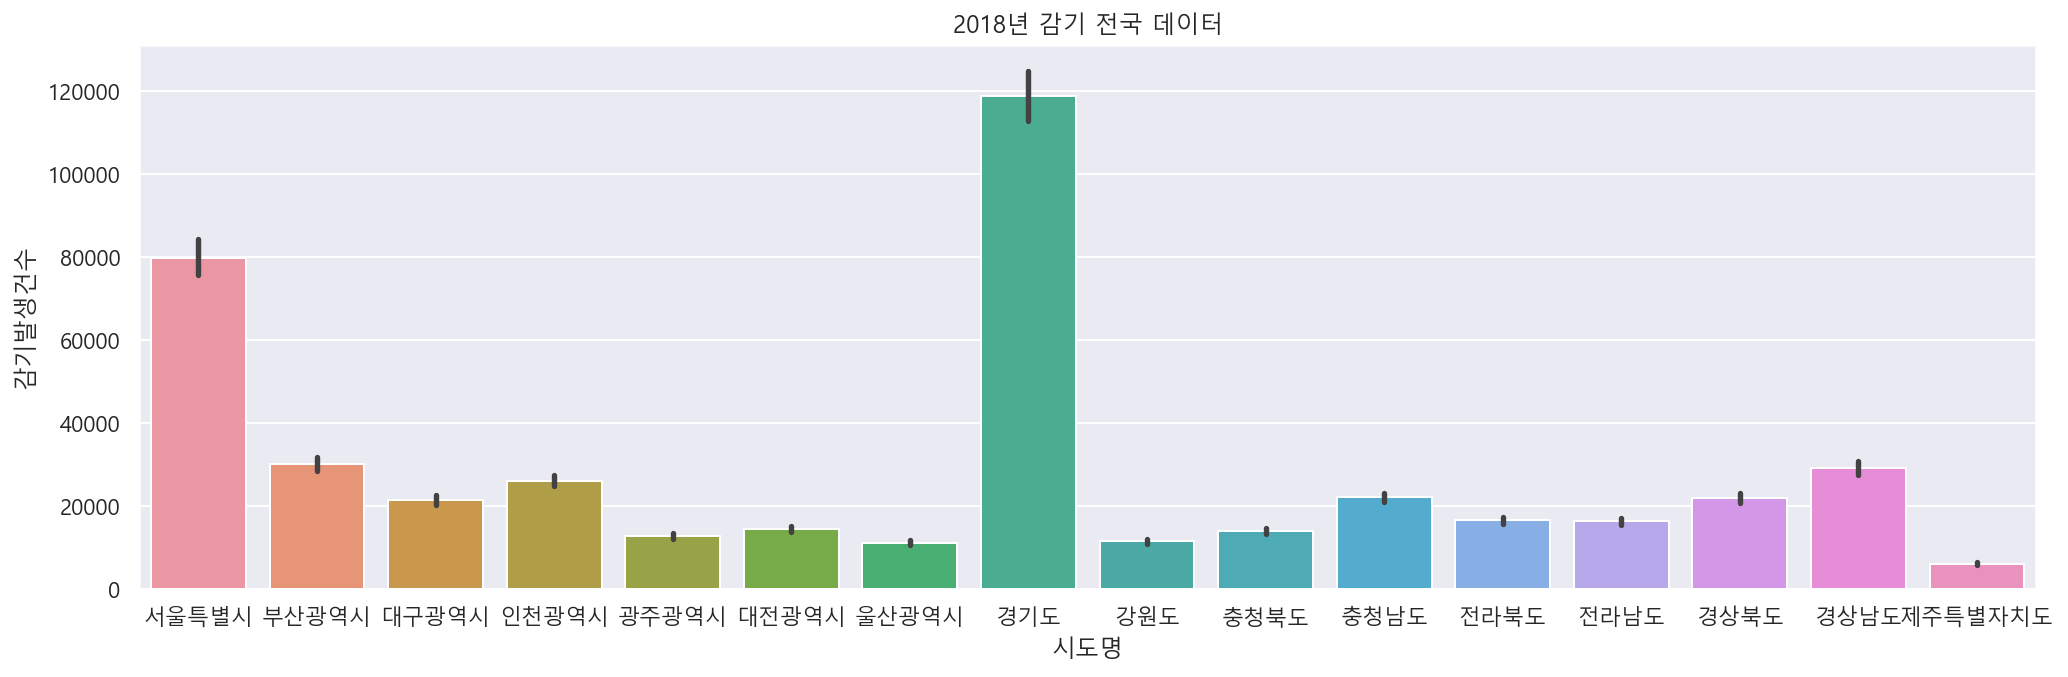

In [128]:
plt.figure(figsize=(17, 5))
plt.title("2018년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2018년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

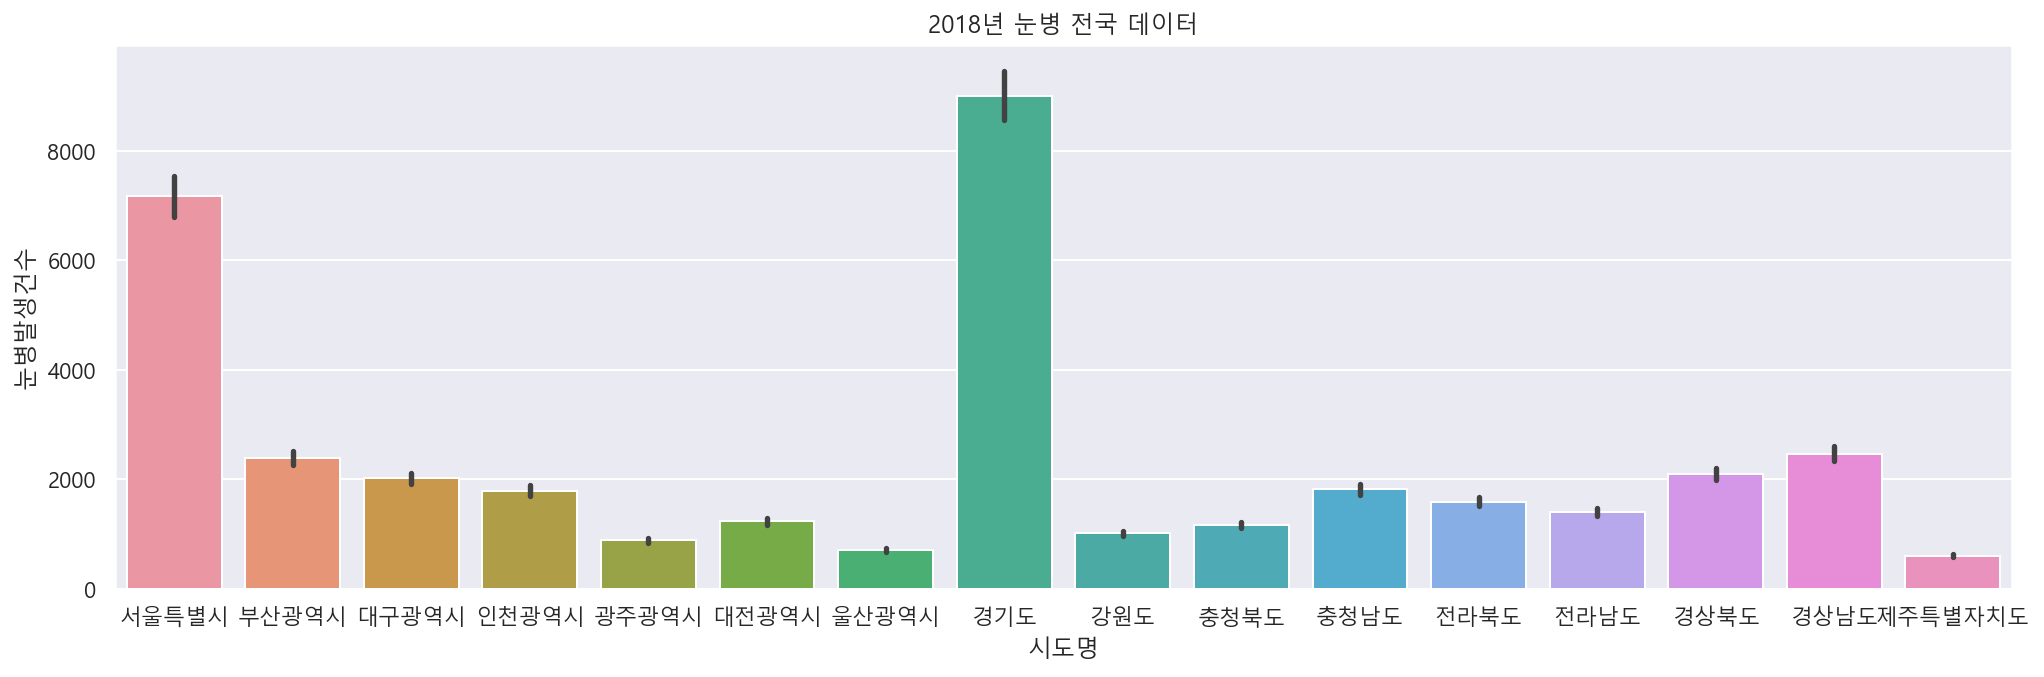

In [129]:
plt.figure(figsize=(17, 5))
plt.title("2018년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2018년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

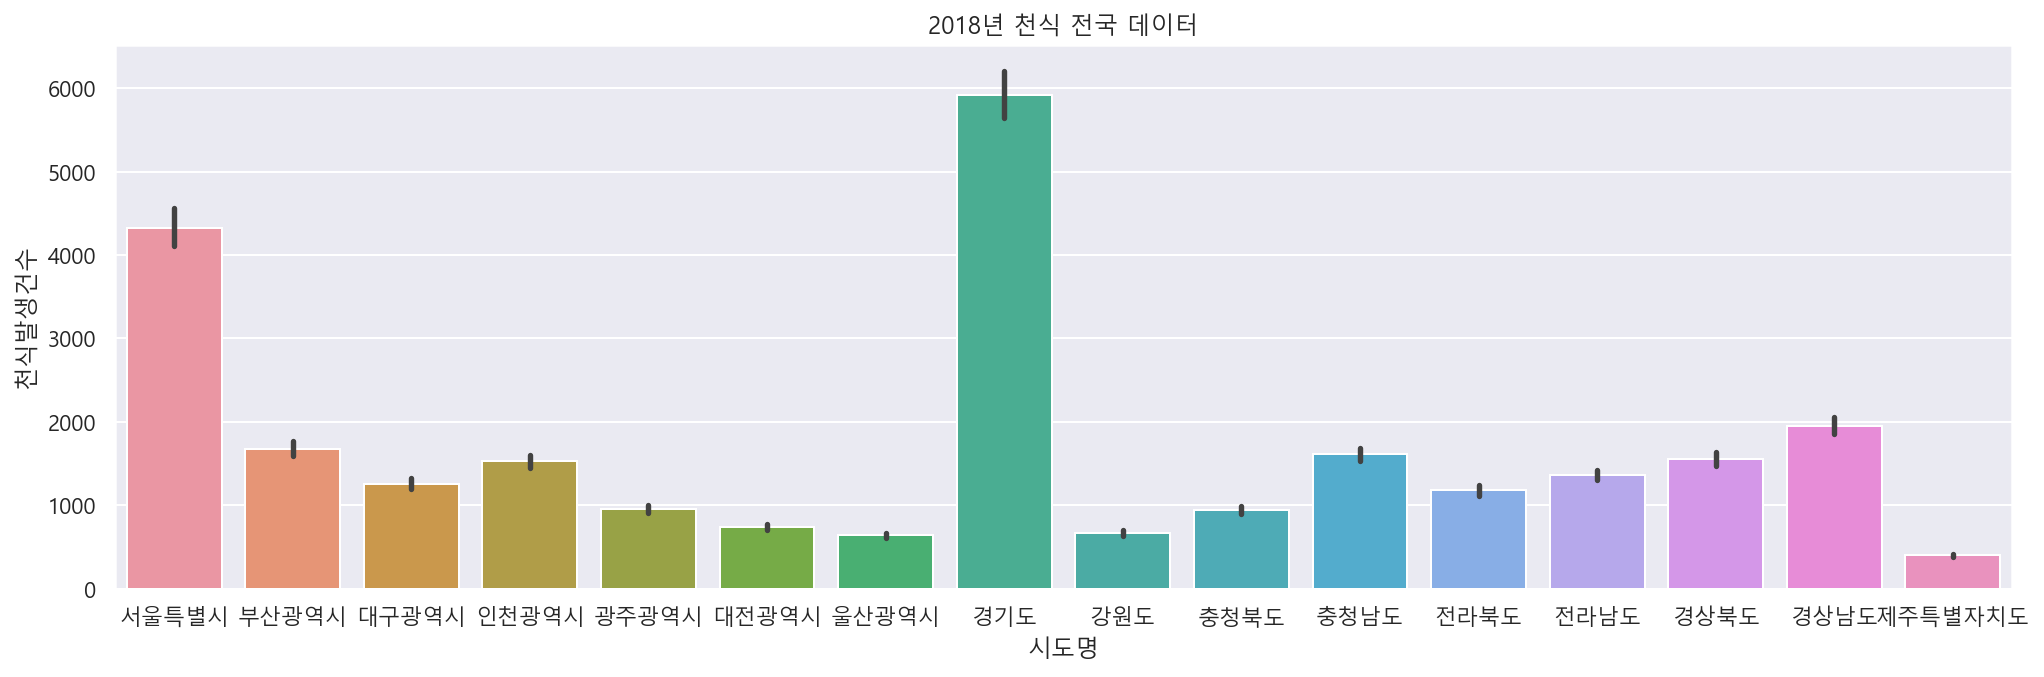

In [130]:
plt.figure(figsize=(17, 5))
plt.title("2018년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2018년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

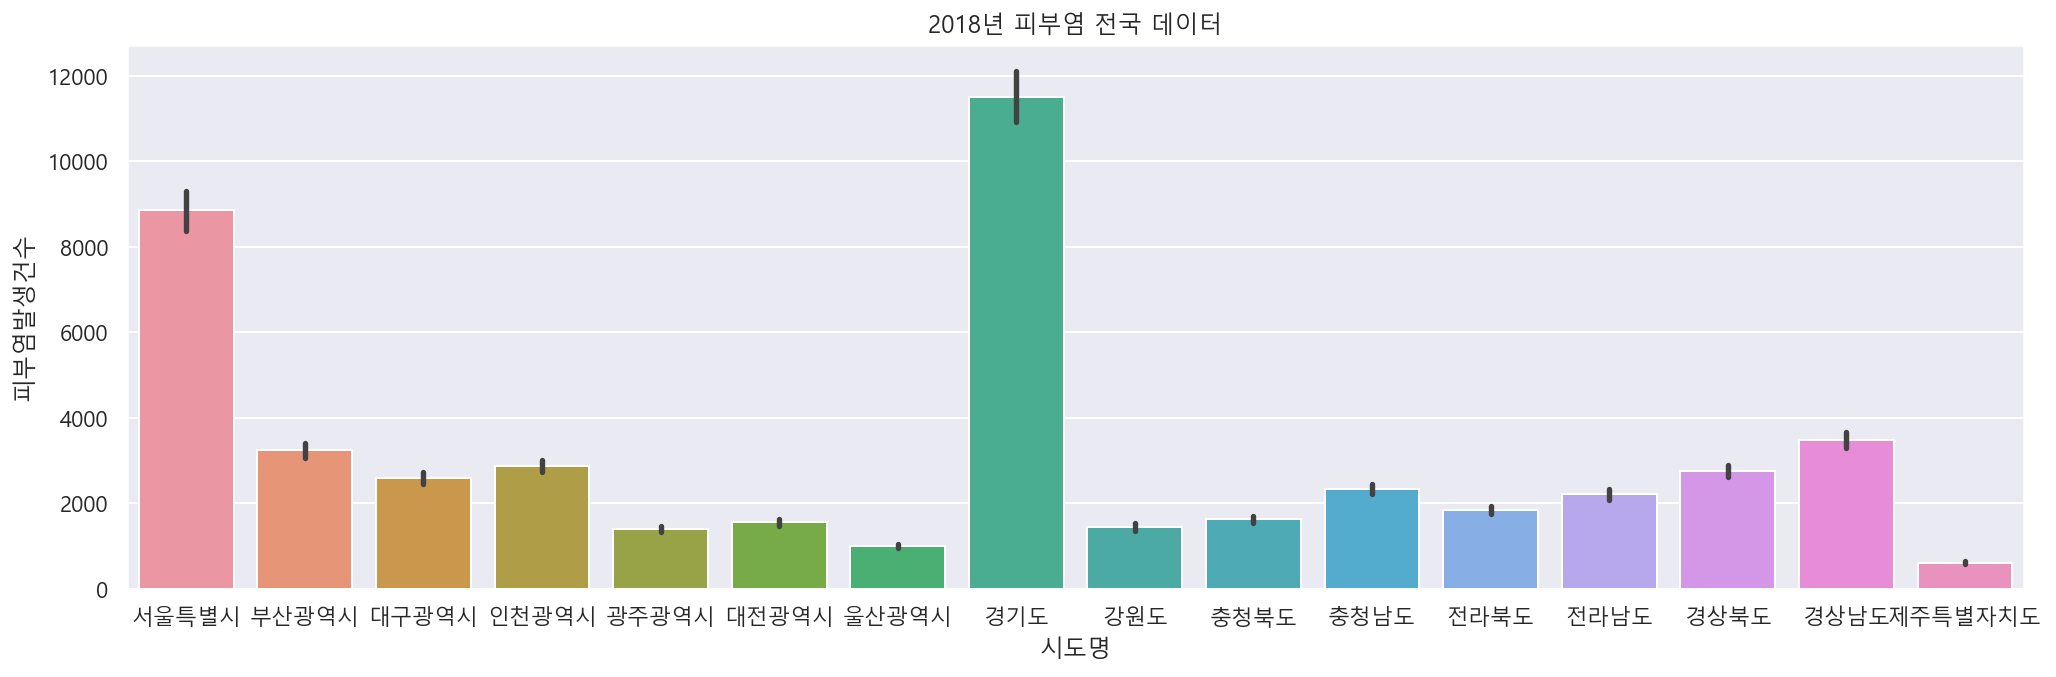

In [131]:
plt.figure(figsize=(17, 5))
plt.title("2018년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2018], x="시도명", y="피부염발생건수")

### 2019년 전국 데이터

<AxesSubplot:title={'center':'2019년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

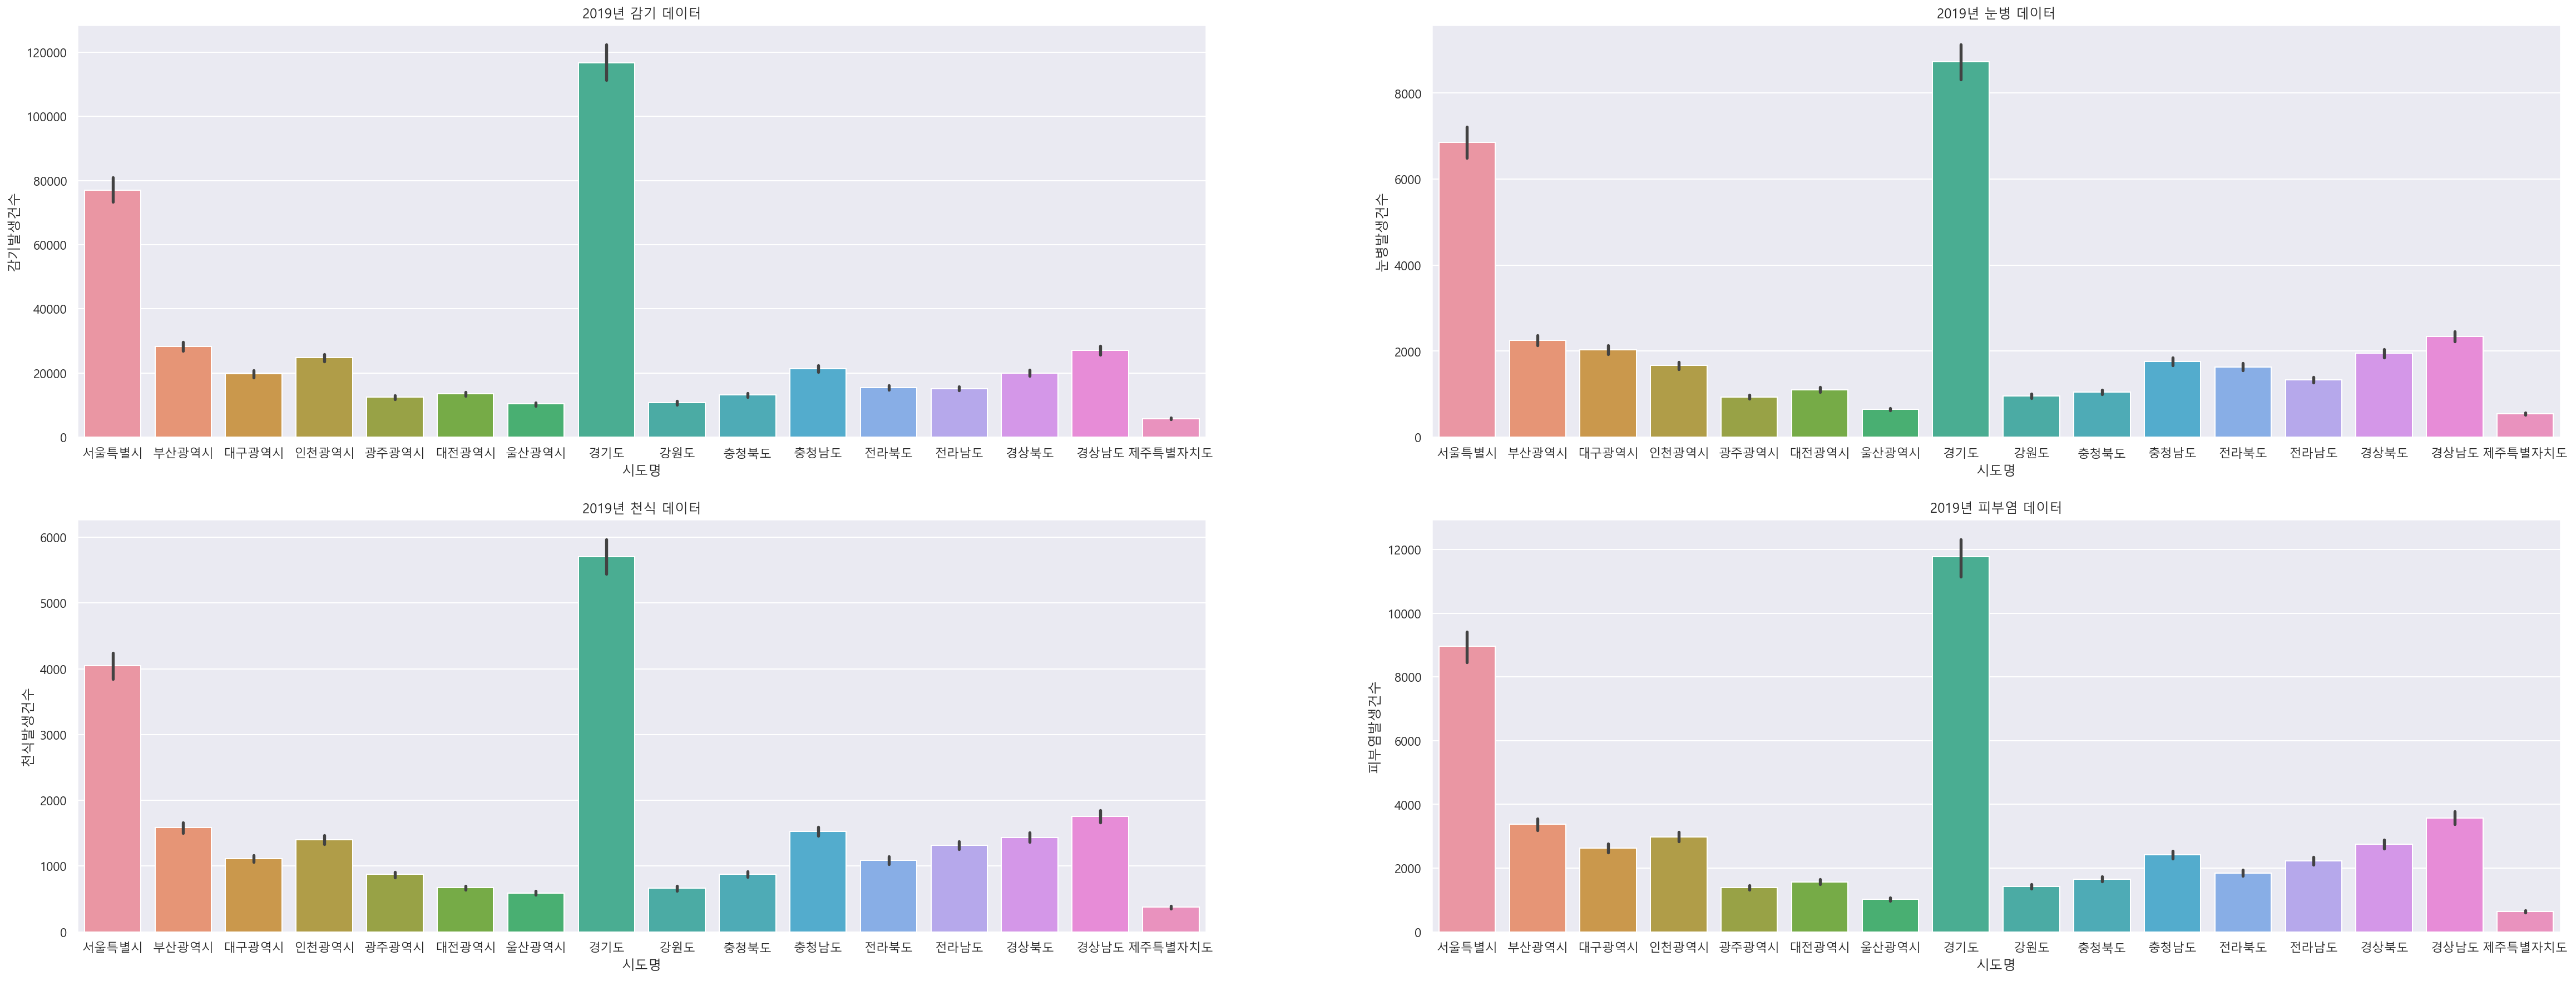

In [132]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2019년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2019년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2019년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2019년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2019년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

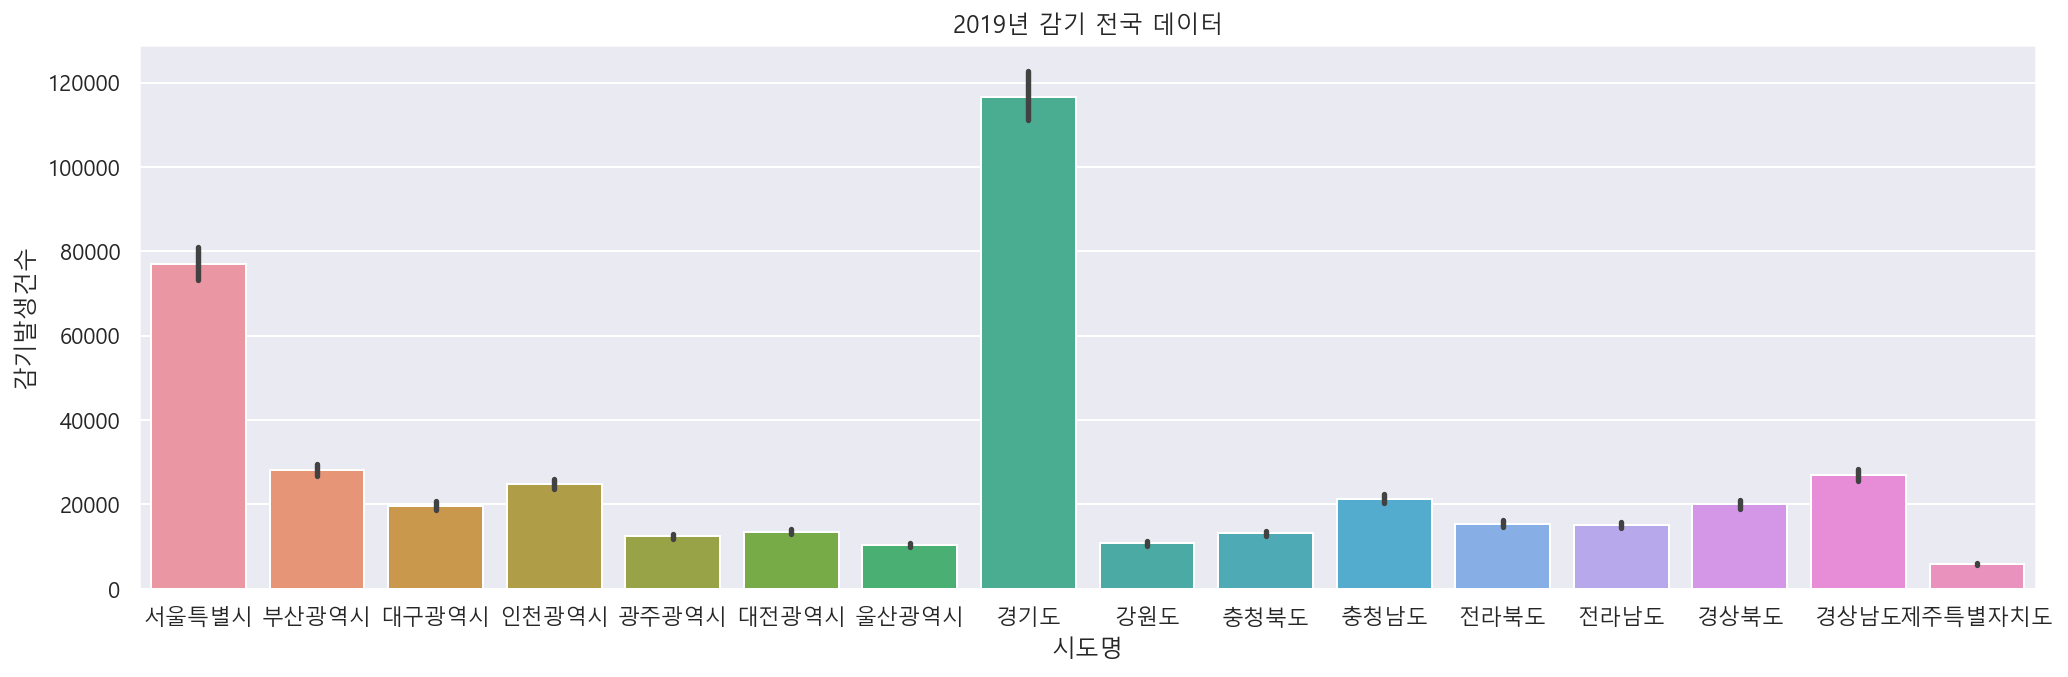

In [133]:
plt.figure(figsize=(17, 5))
plt.title("2019년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2019년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

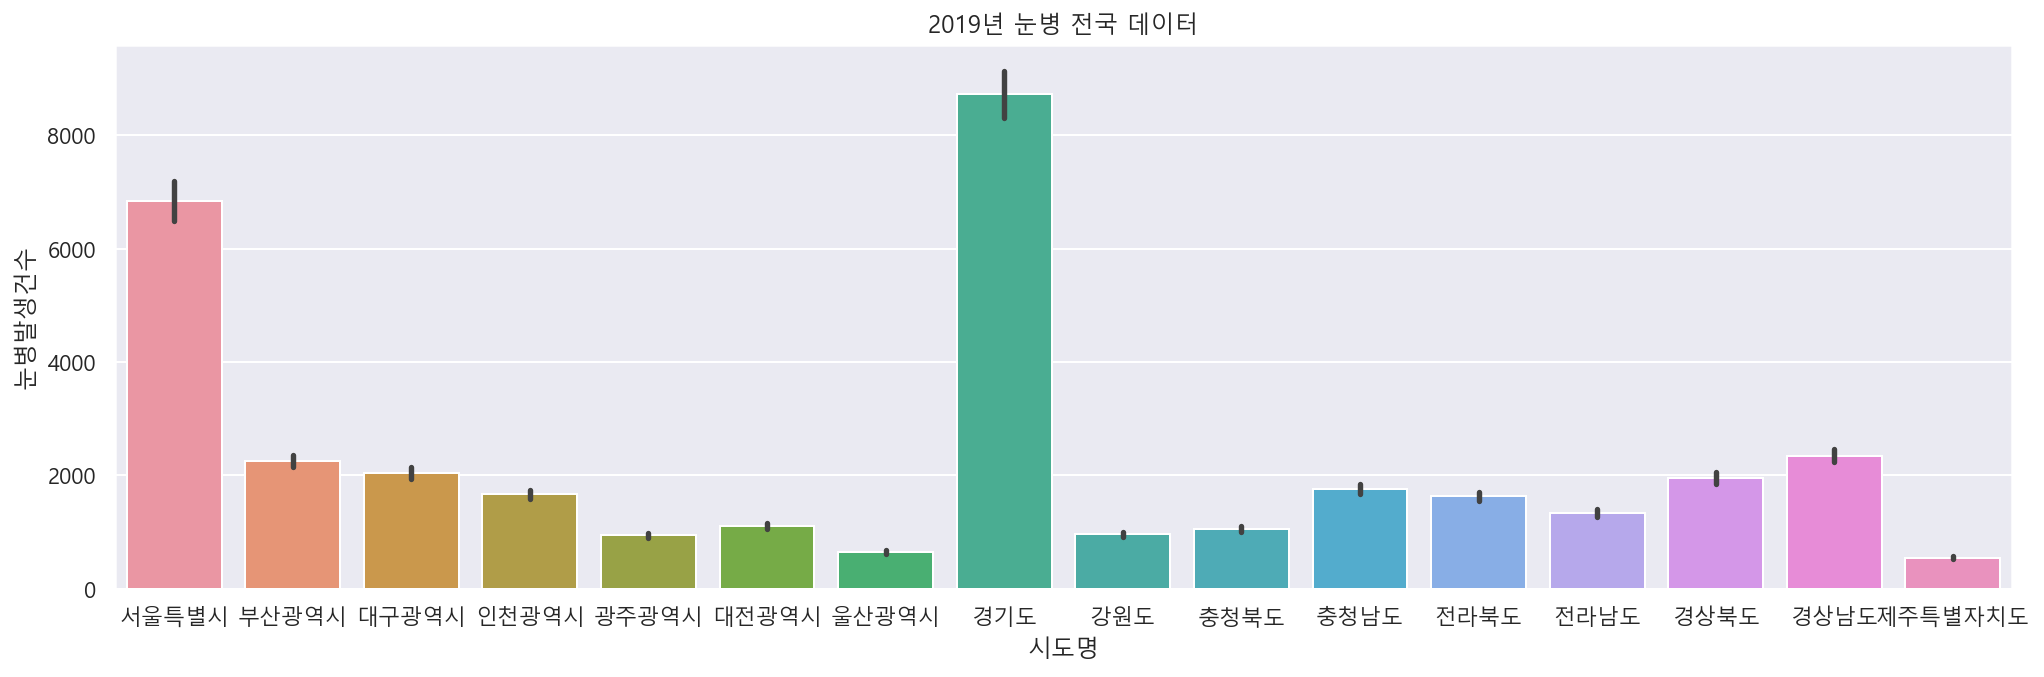

In [134]:
plt.figure(figsize=(17, 5))
plt.title("2019년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2019년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

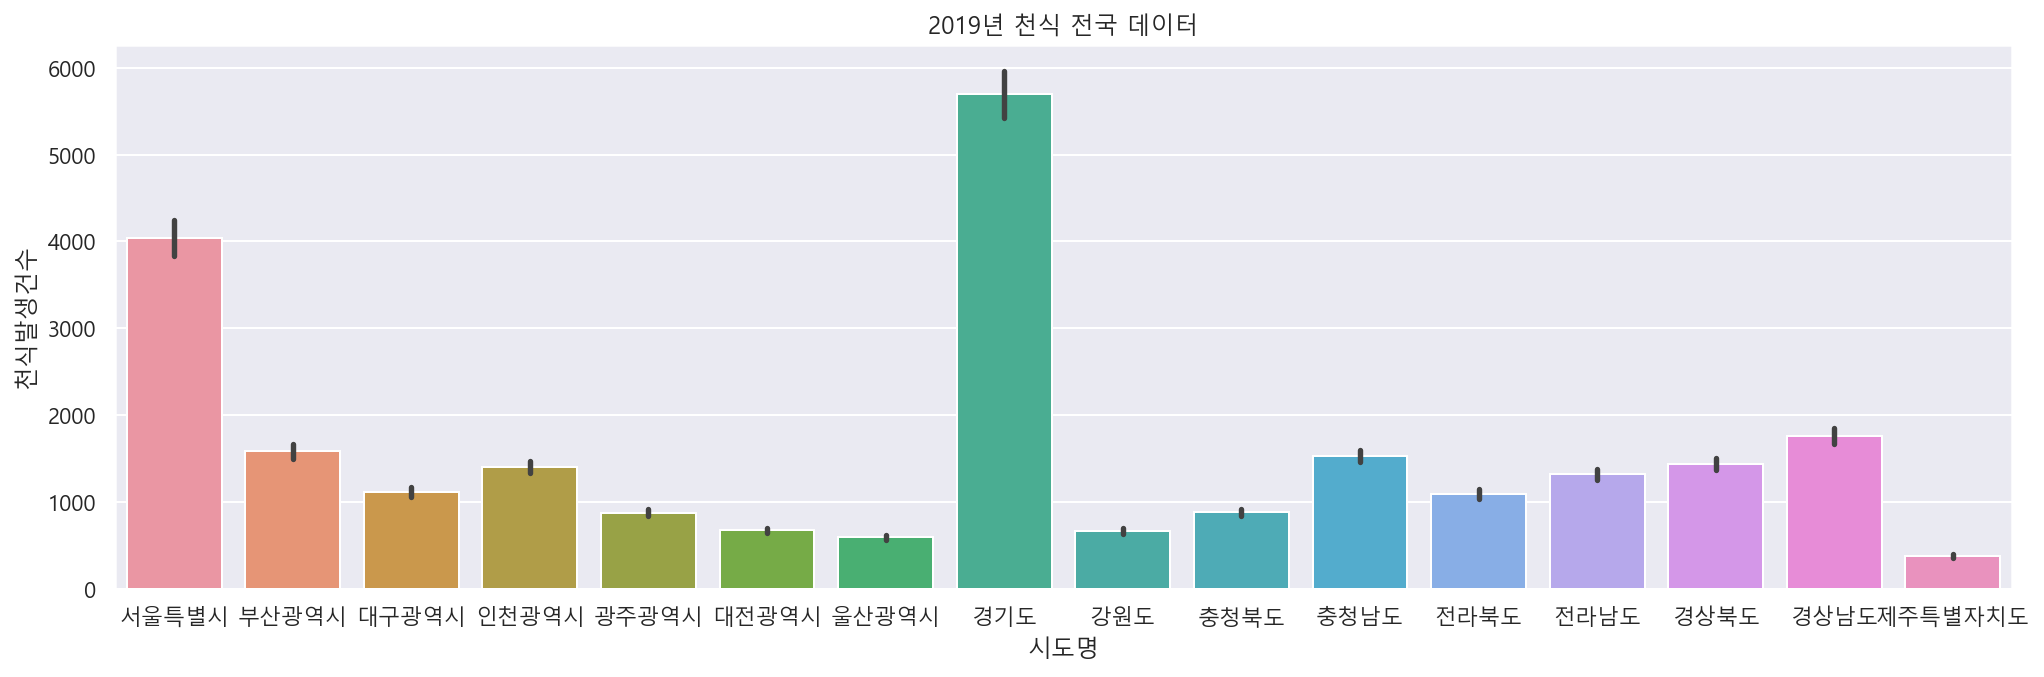

In [135]:
plt.figure(figsize=(17, 5))
plt.title("2019년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2019년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

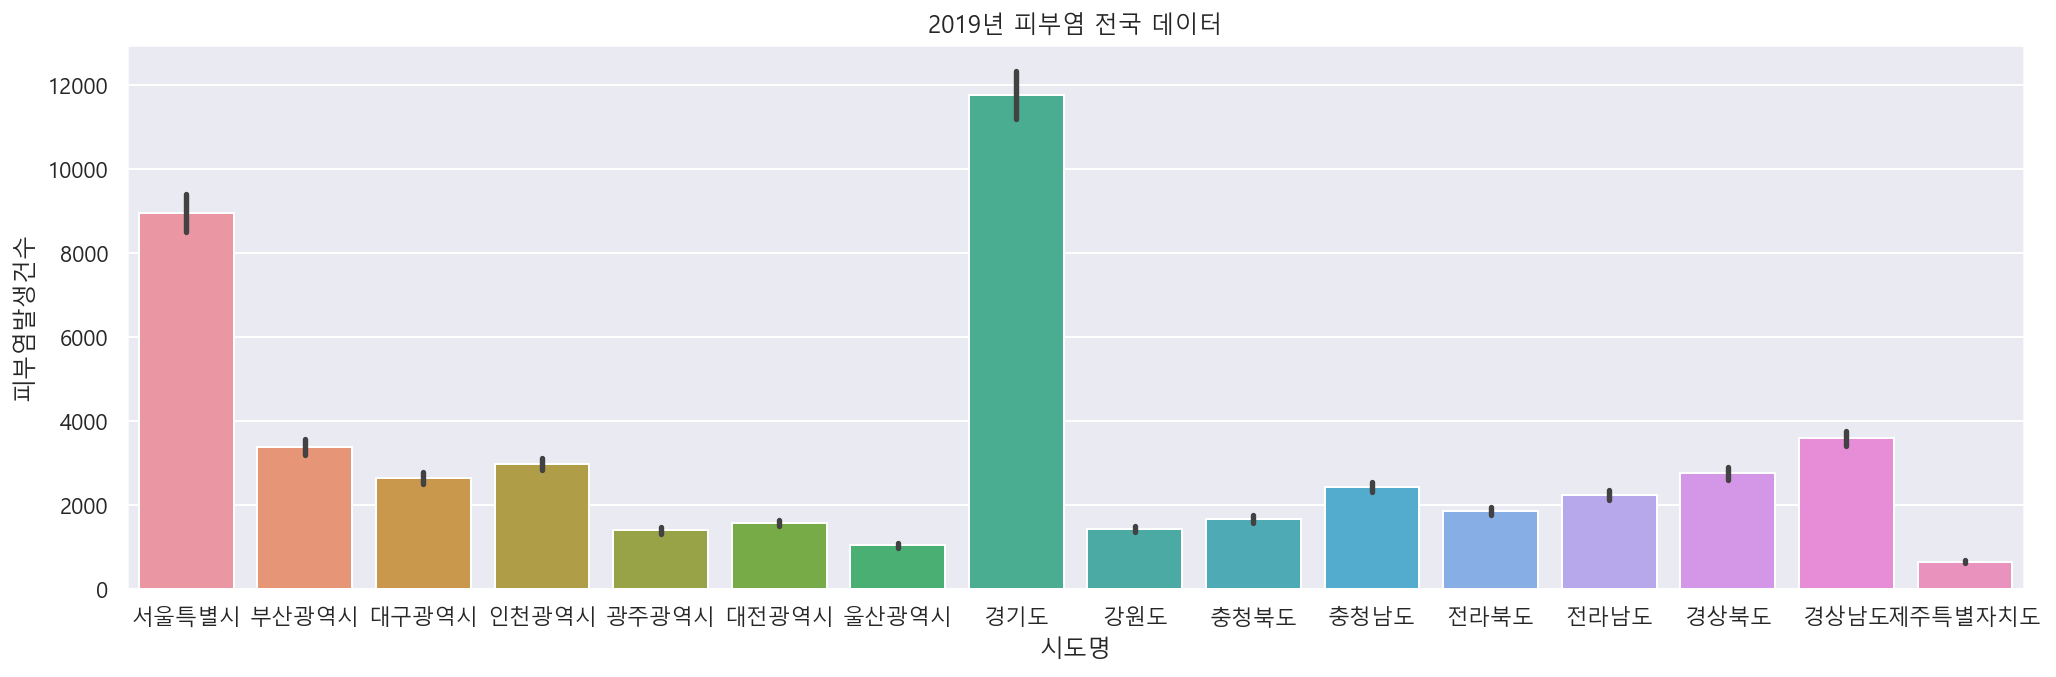

In [136]:
plt.figure(figsize=(17, 5))
plt.title("2019년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2019], x="시도명", y="피부염발생건수")

### 2020년 전국 데이터

<AxesSubplot:title={'center':'2020년 피부염 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

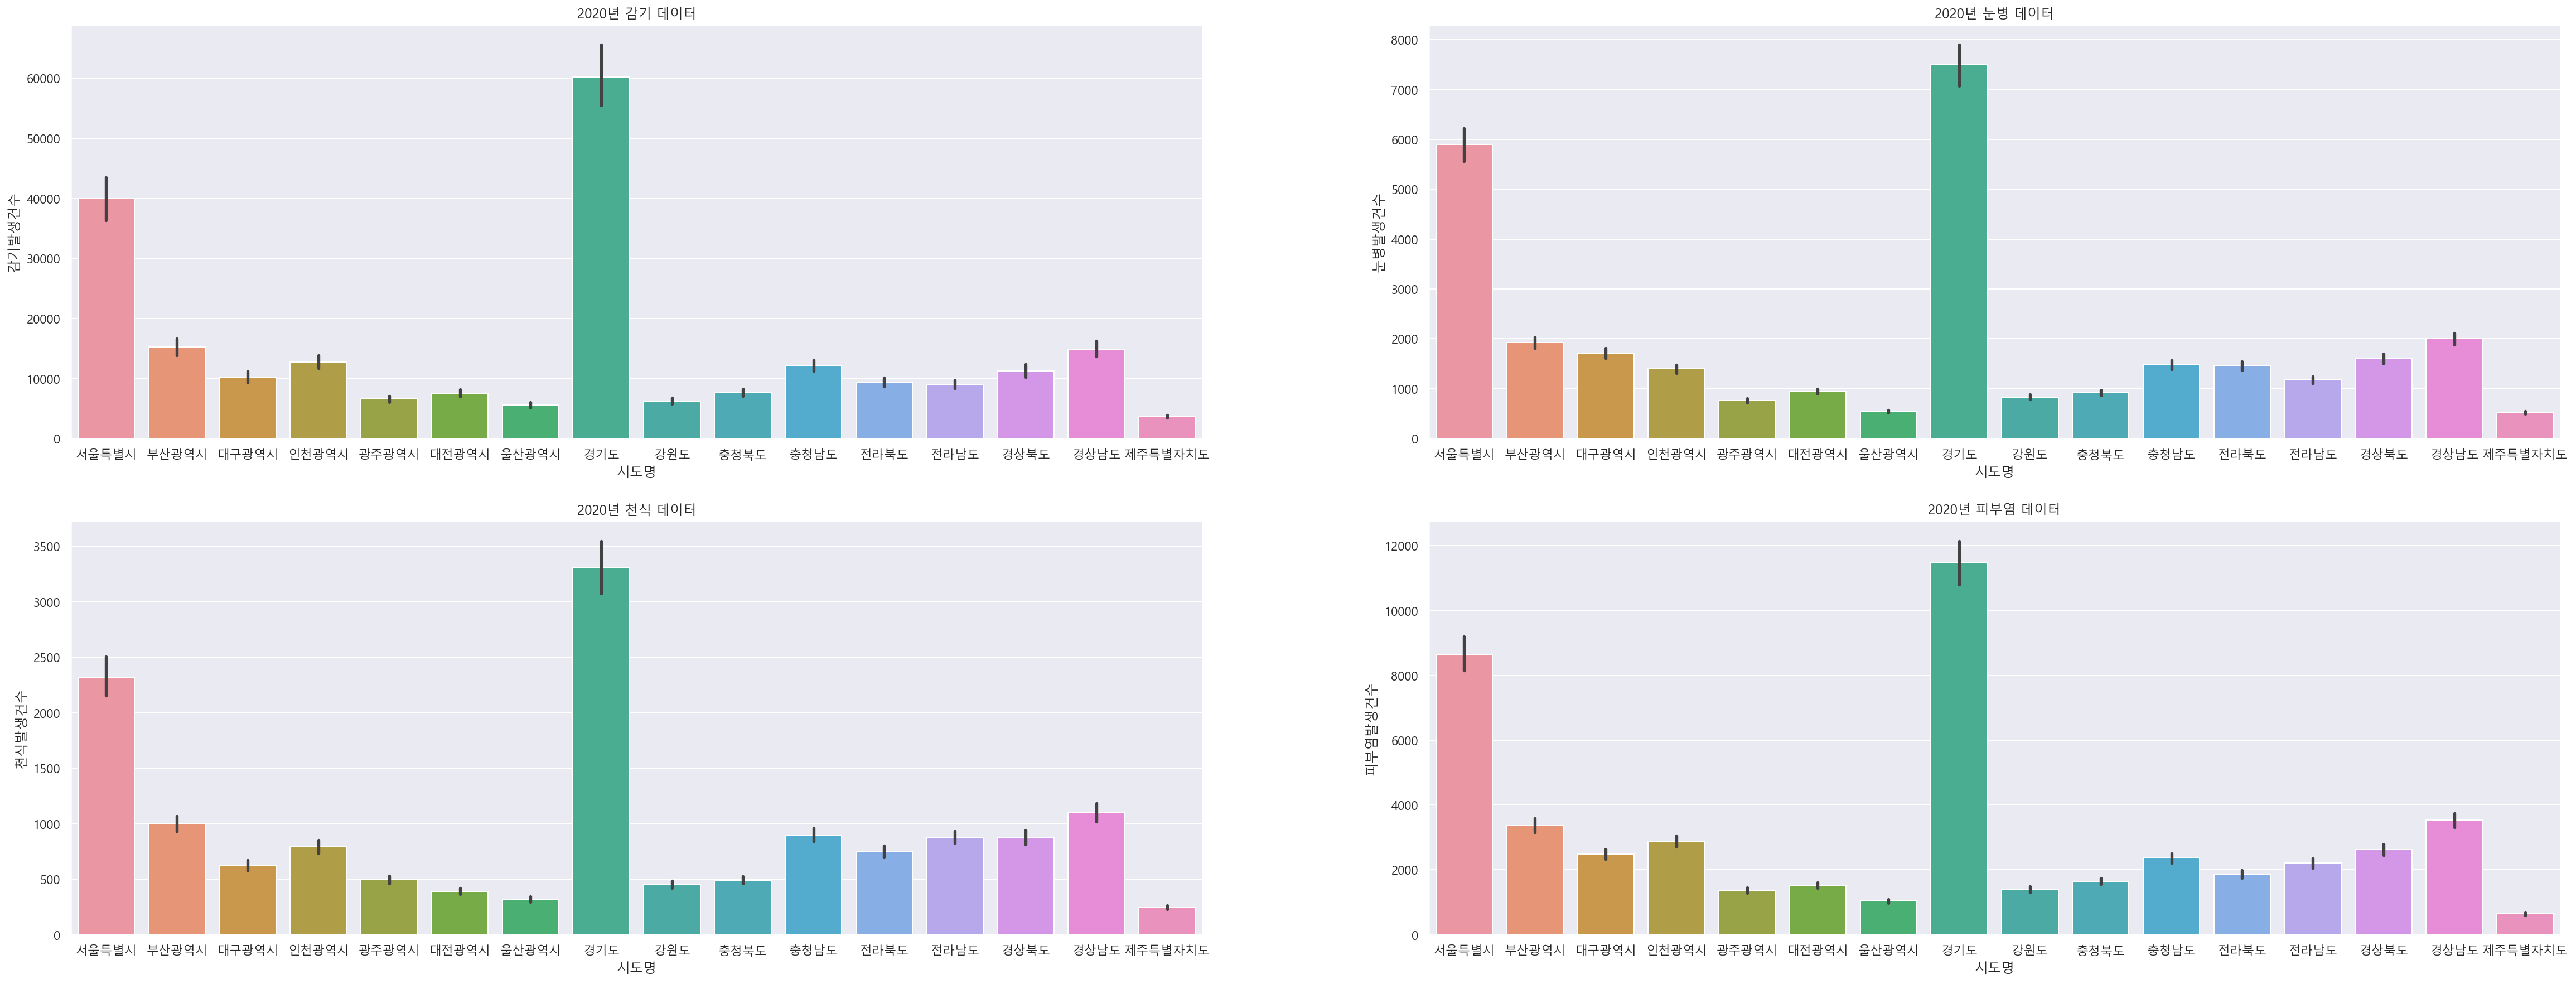

In [137]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("2020년 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("2020년 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("2020년 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("2020년 피부염 데이터")

sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="감기발생건수", ax=area01)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="눈병발생건수", ax=area02)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="천식발생건수", ax=area03)
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'2020년 감기 전국 데이터'}, xlabel='시도명', ylabel='감기발생건수'>

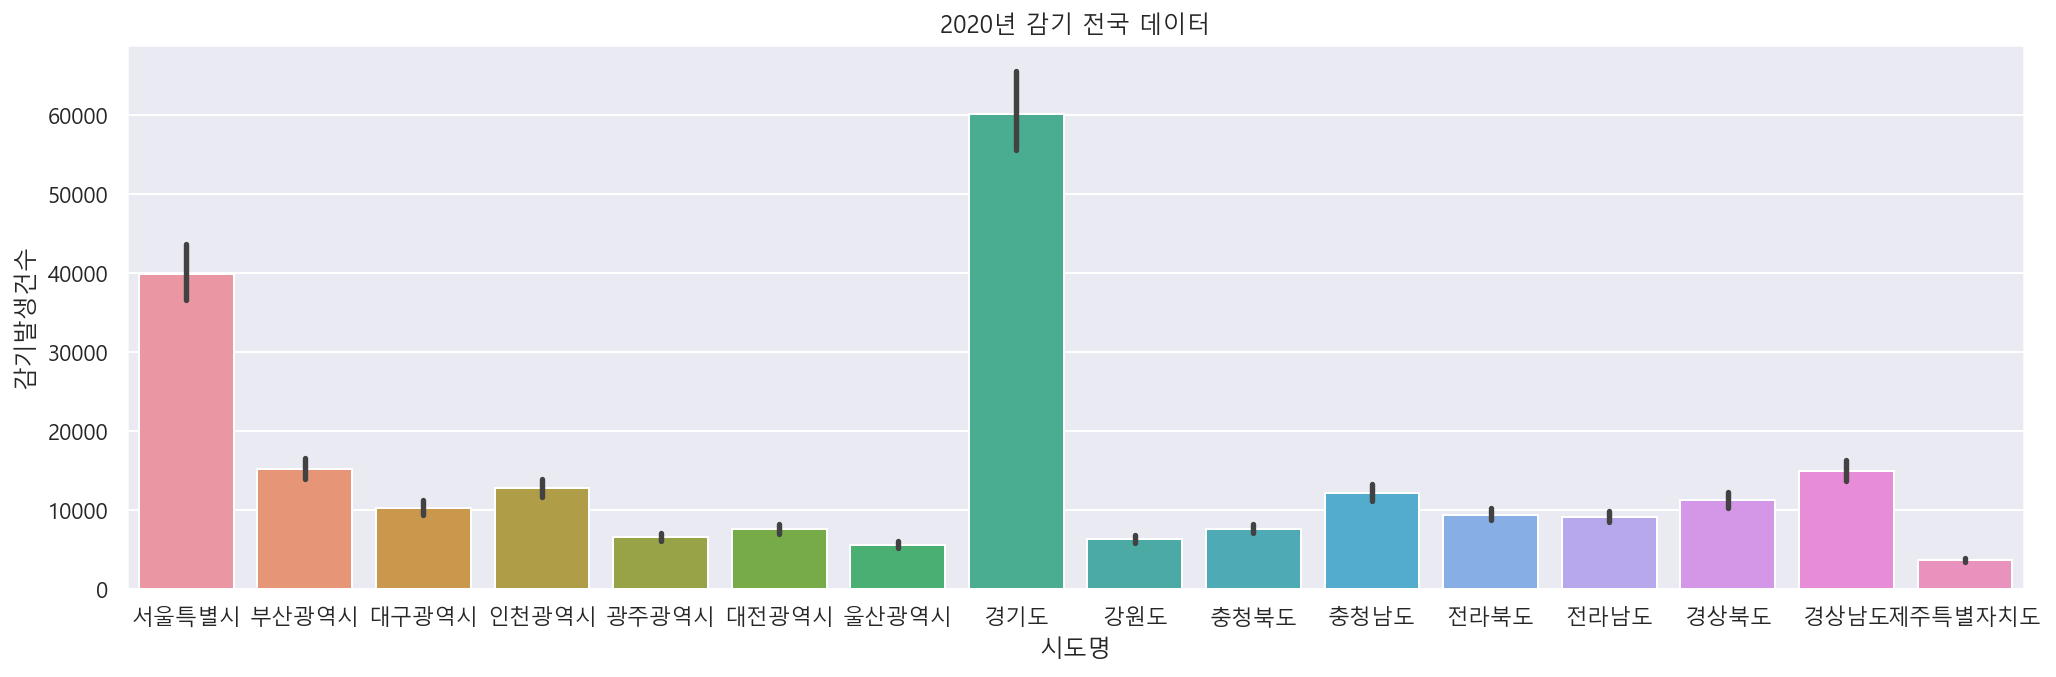

In [138]:
plt.figure(figsize=(17, 5))
plt.title("2020년 감기 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="감기발생건수")

<AxesSubplot:title={'center':'2020년 눈병 전국 데이터'}, xlabel='시도명', ylabel='눈병발생건수'>

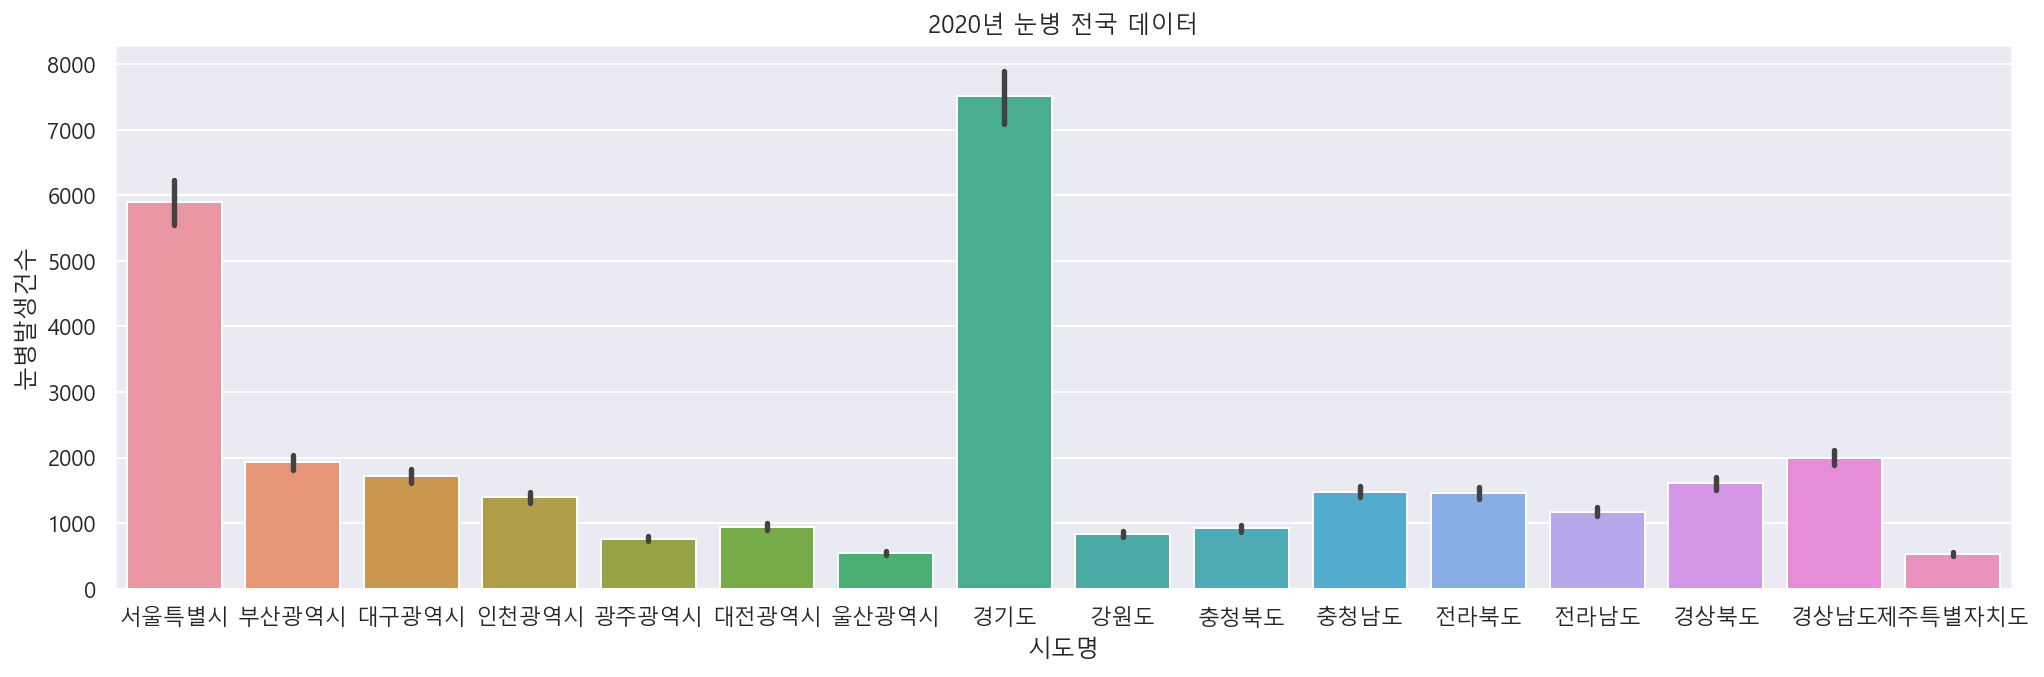

In [139]:
plt.figure(figsize=(17, 5))
plt.title("2020년 눈병 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="눈병발생건수")

<AxesSubplot:title={'center':'2020년 천식 전국 데이터'}, xlabel='시도명', ylabel='천식발생건수'>

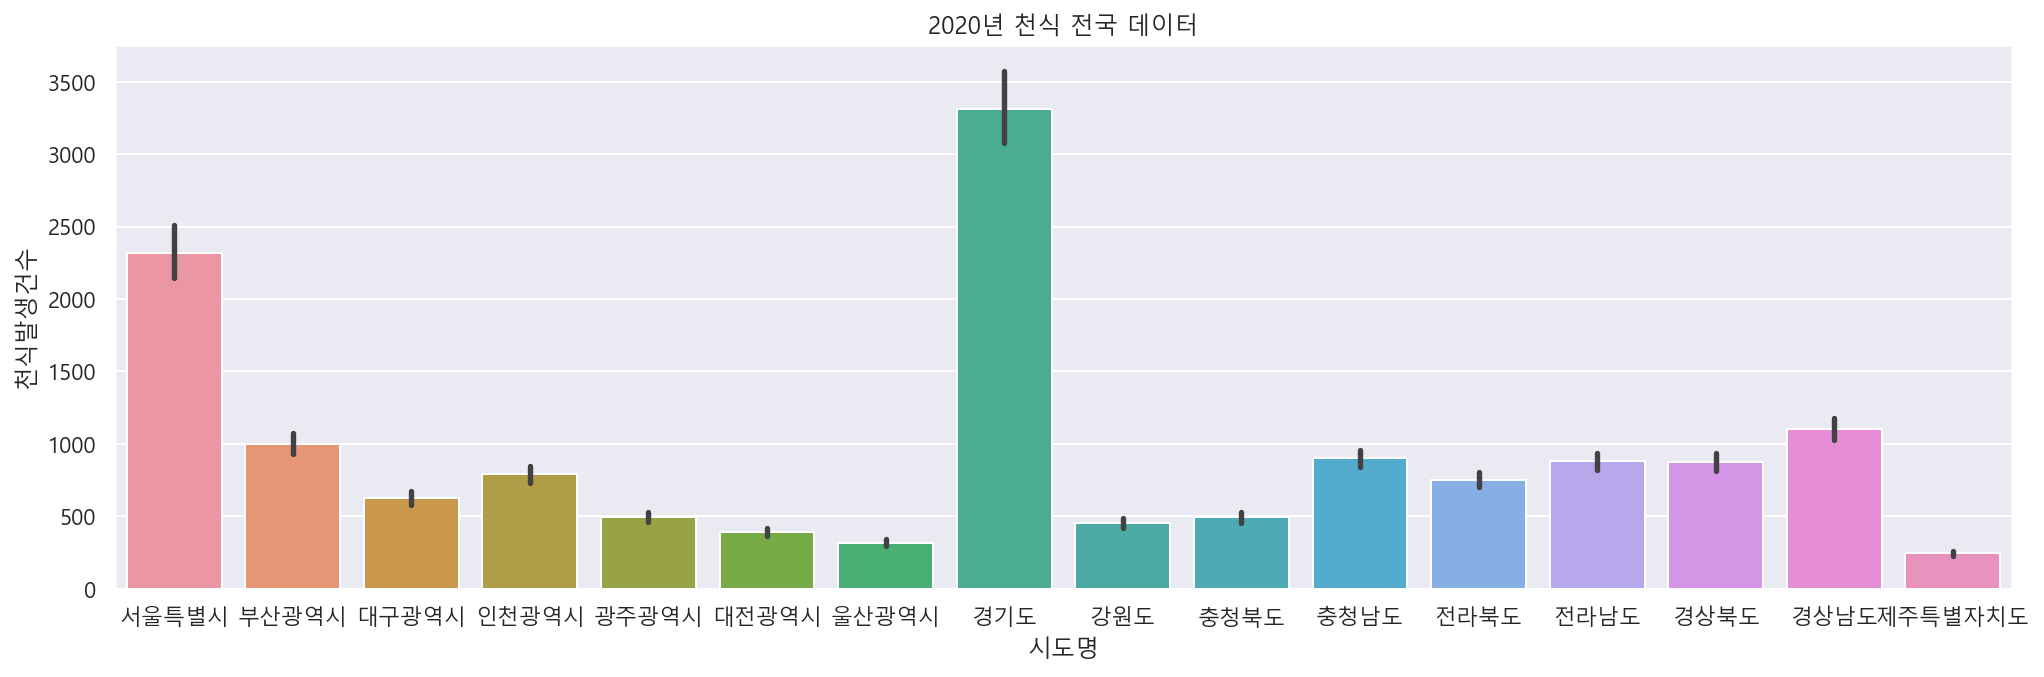

In [140]:
plt.figure(figsize=(17, 5))
plt.title("2020년 천식 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="천식발생건수")

<AxesSubplot:title={'center':'2020년 피부염 전국 데이터'}, xlabel='시도명', ylabel='피부염발생건수'>

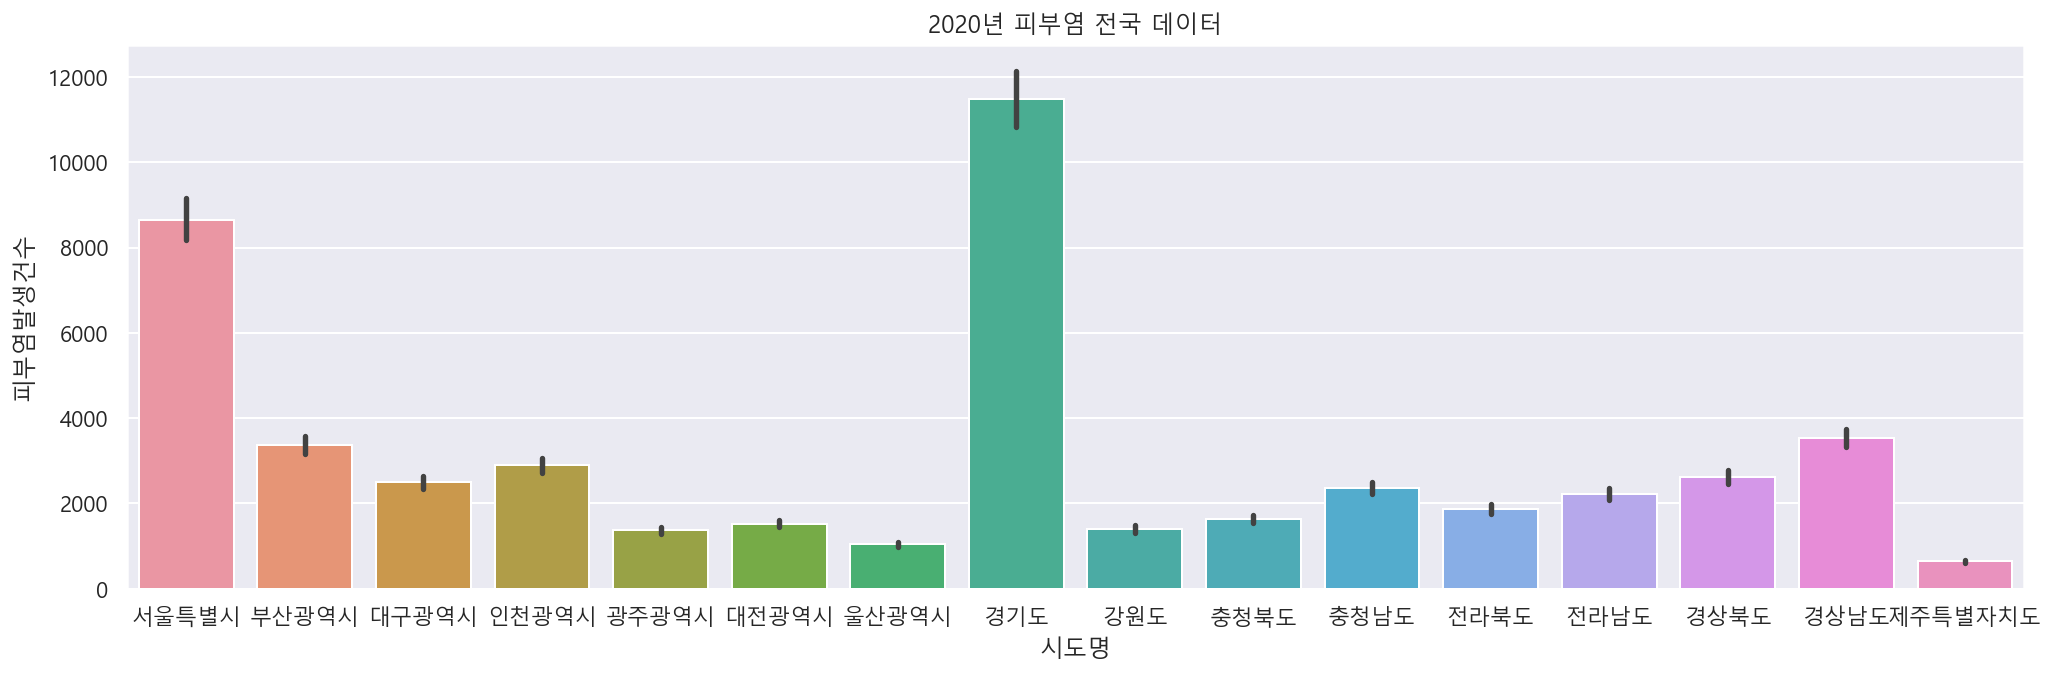

In [141]:
plt.figure(figsize=(17, 5))
plt.title("2020년 피부염 전국 데이터")
sns.barplot(data=df_year_trial[df_year_trial["연도"] == 2020], x="시도명", y="피부염발생건수")

## 지역별 통합 데이터

<AxesSubplot:title={'center':'지역별 감기 통합 데이터'}, xlabel='지역명', ylabel='감기발생건수'>

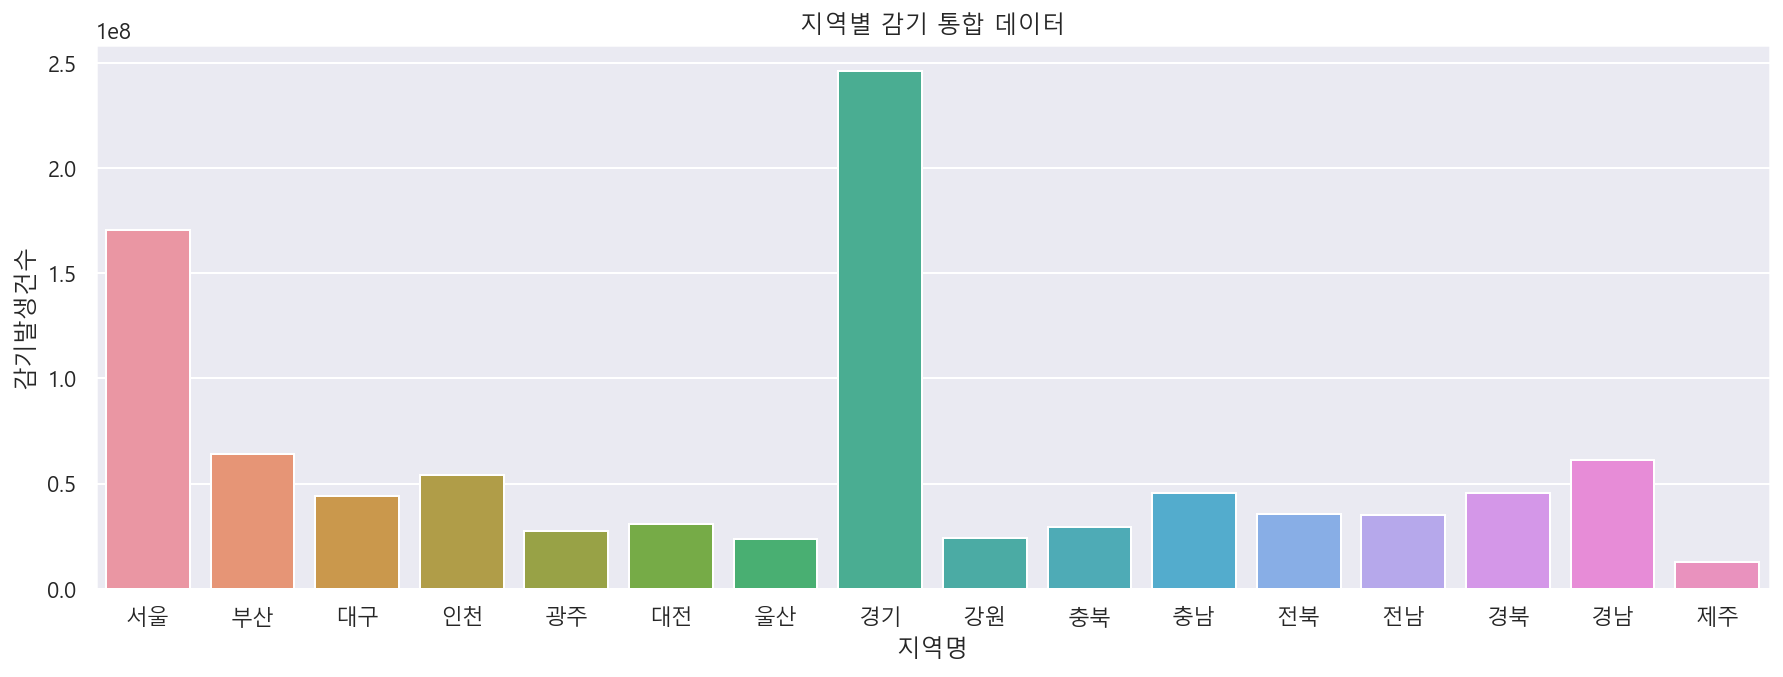

In [142]:
plt.figure(figsize=(15, 5))
plt.title("지역별 감기 통합 데이터")
sns.barplot(data=df_trial, x="지역명", y="감기발생건수")

<AxesSubplot:title={'center':'지역별 눈병 통합 데이터'}, xlabel='지역명', ylabel='눈병발생건수'>

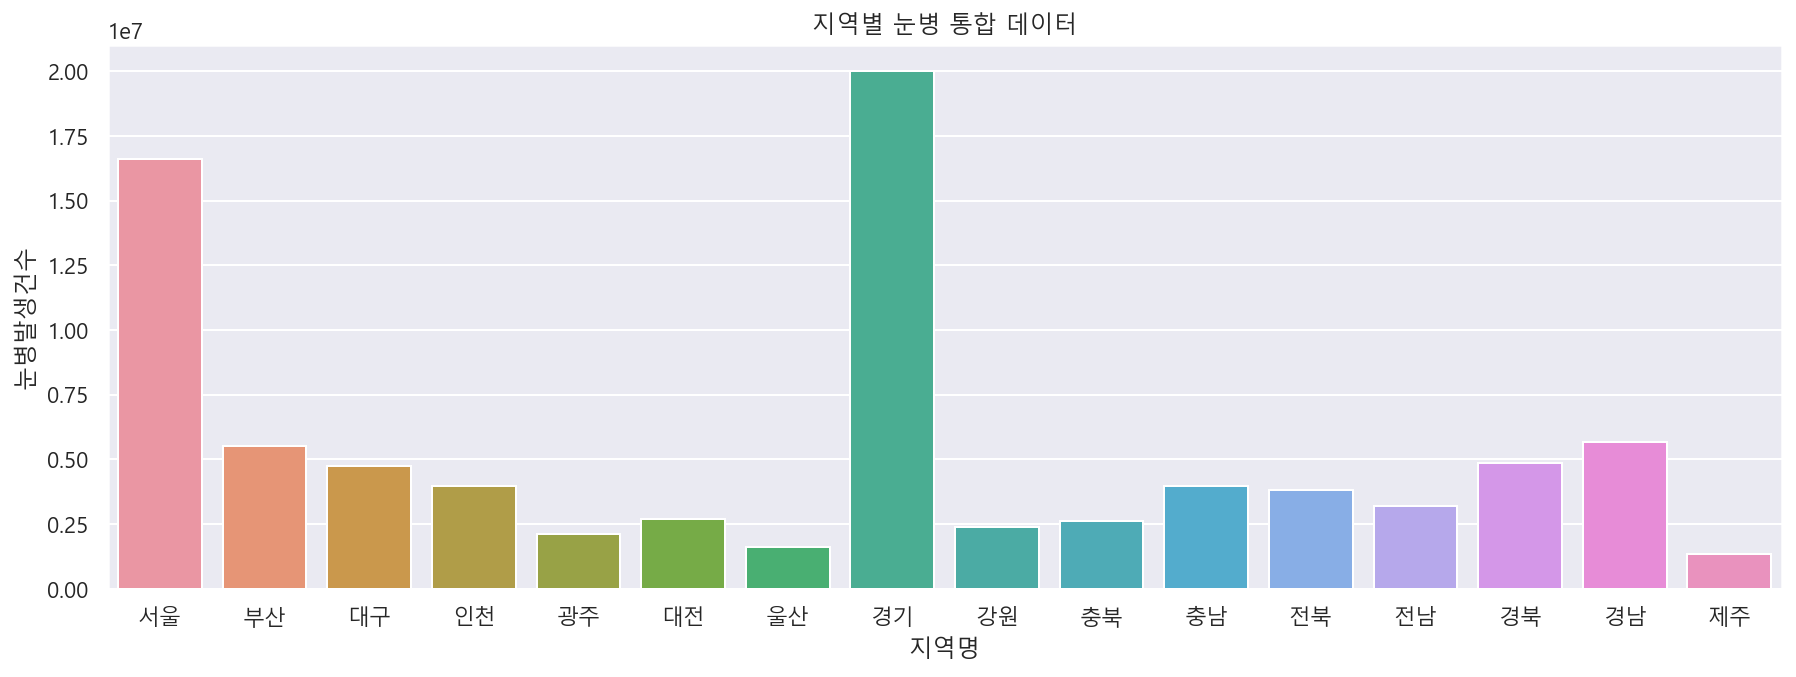

In [143]:
plt.figure(figsize=(15, 5))
plt.title("지역별 눈병 통합 데이터")
sns.barplot(data=df_trial, x="지역명", y="눈병발생건수")

<AxesSubplot:title={'center':'지역별 천식 통합 데이터'}, xlabel='지역명', ylabel='천식발생건수'>

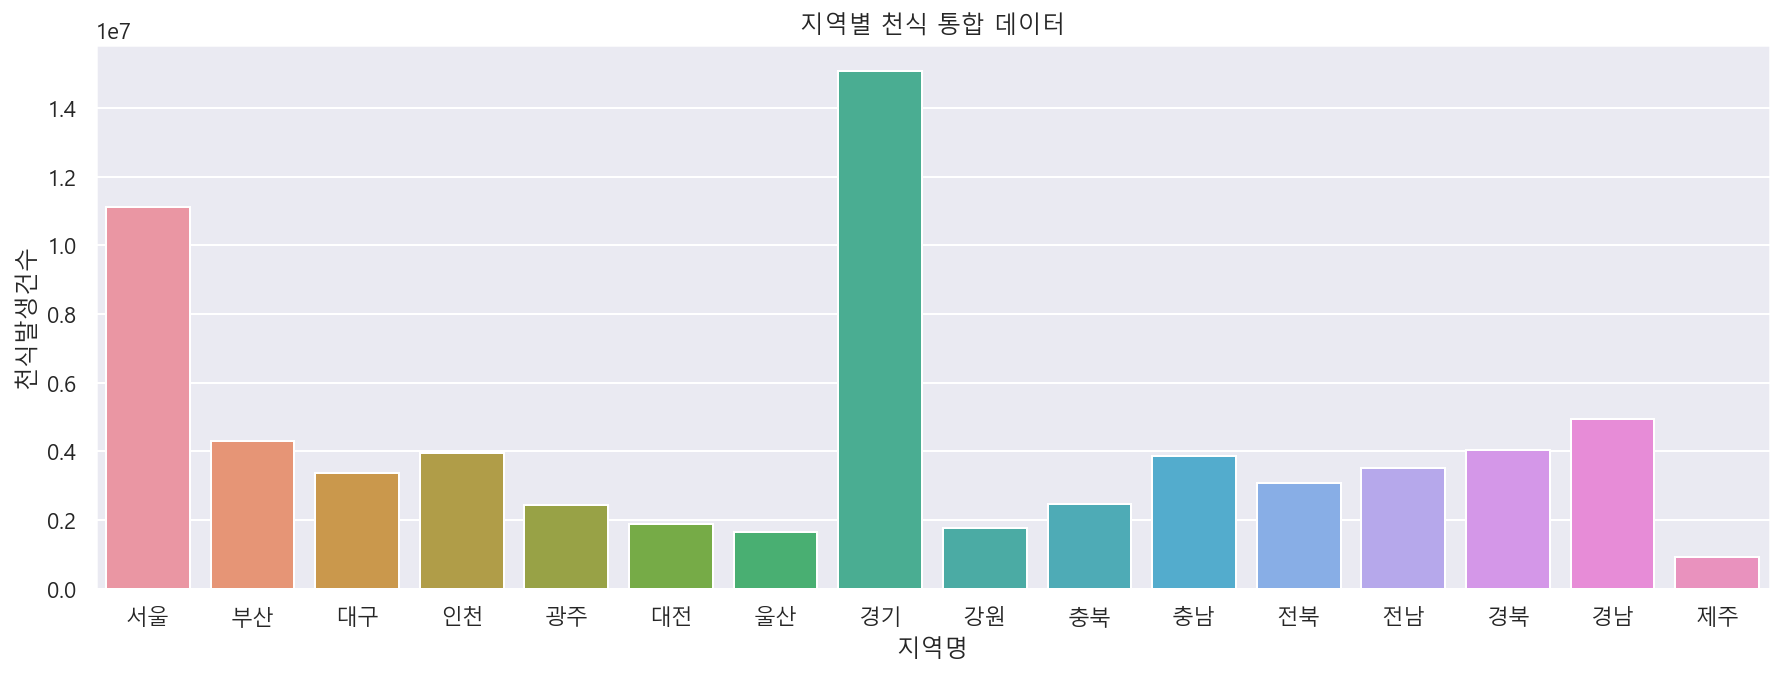

In [144]:
plt.figure(figsize=(15, 5))
plt.title("지역별 천식 통합 데이터")
sns.barplot(data=df_trial, x="지역명", y="천식발생건수")

<AxesSubplot:title={'center':'지역별 피부염 통합 데이터'}, xlabel='지역명', ylabel='피부염발생건수'>

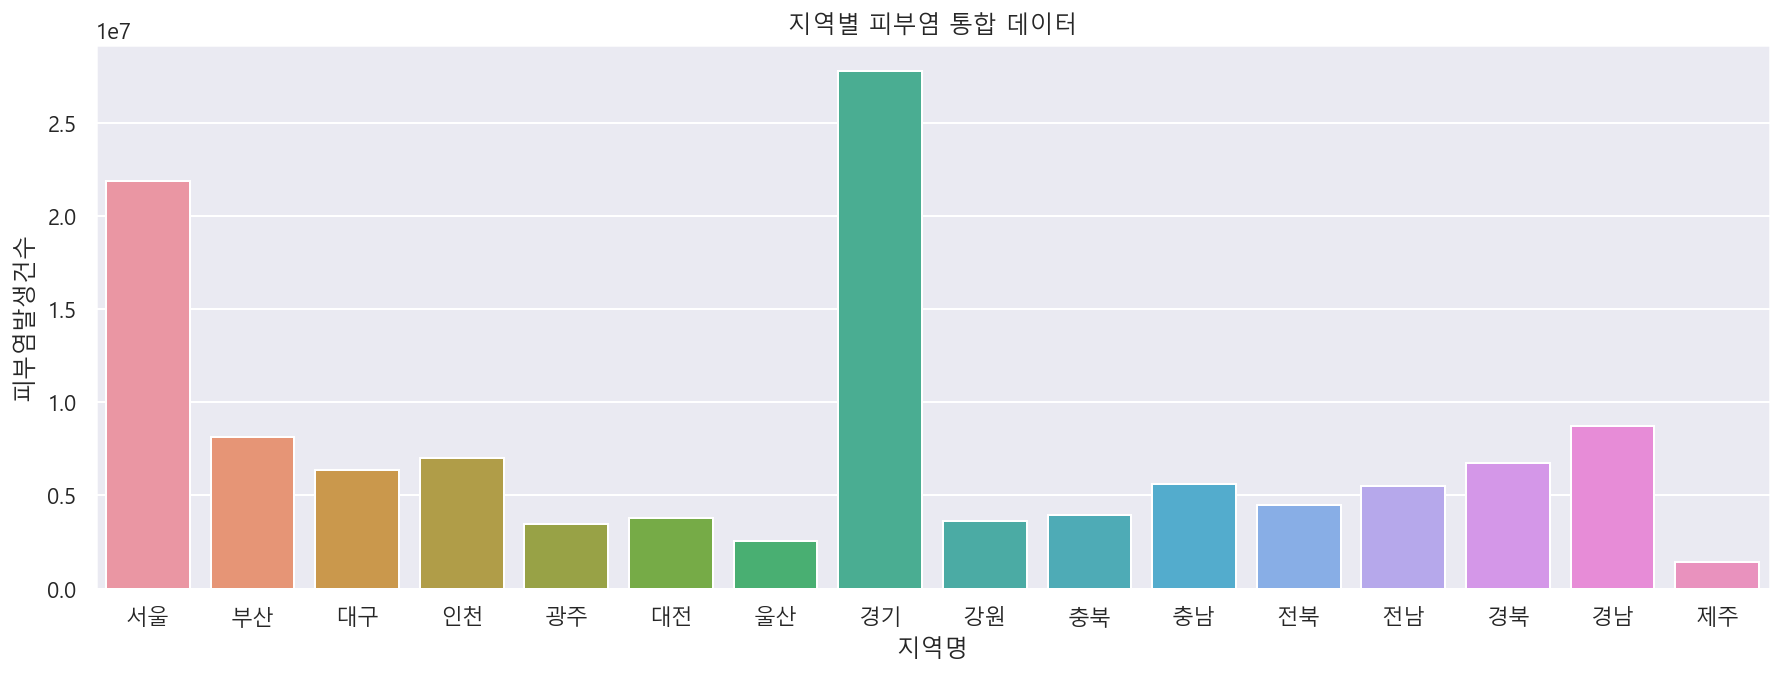

In [145]:
plt.figure(figsize=(15, 5))
plt.title("지역별 피부염 통합 데이터")
sns.barplot(data=df_trial, x="지역명", y="피부염발생건수")

## 연도별 전국 데이터

<AxesSubplot:title={'center':'연도별 전국 감기 통합 데이터'}, xlabel='연도', ylabel='감기발생건수'>

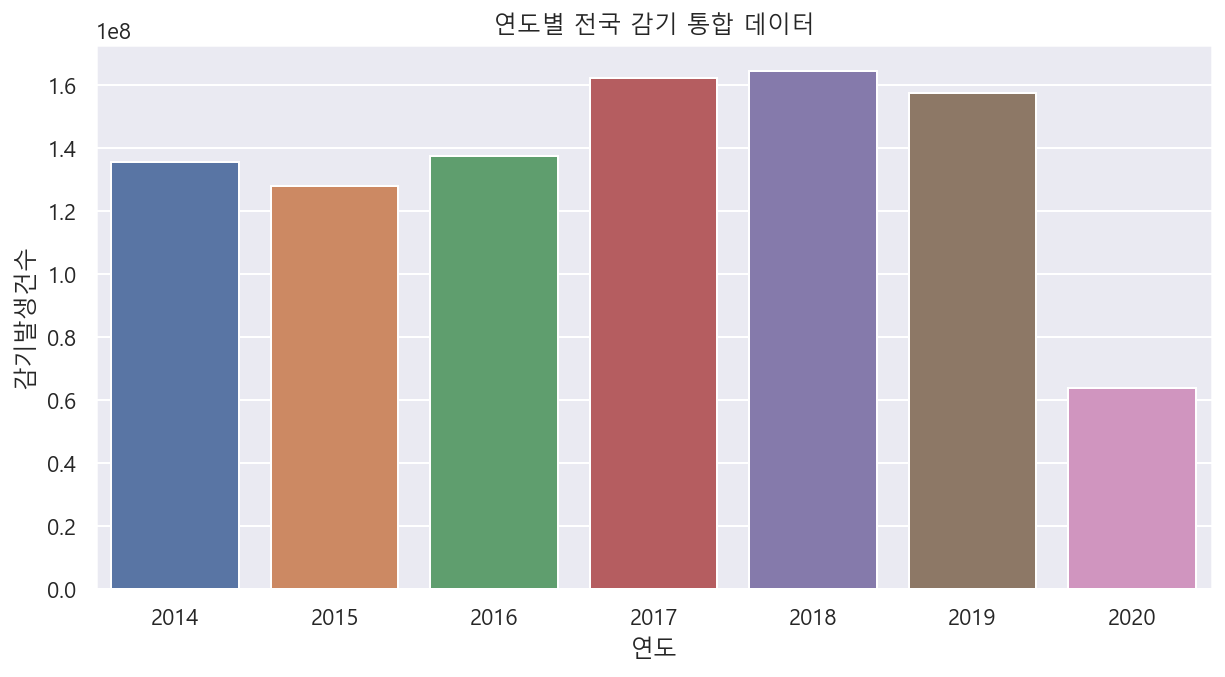

In [146]:
plt.figure(figsize=(10, 5))
plt.title("연도별 전국 감기 통합 데이터")
sns.barplot(data=df_year, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'연도별 전국 눈병 통합 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

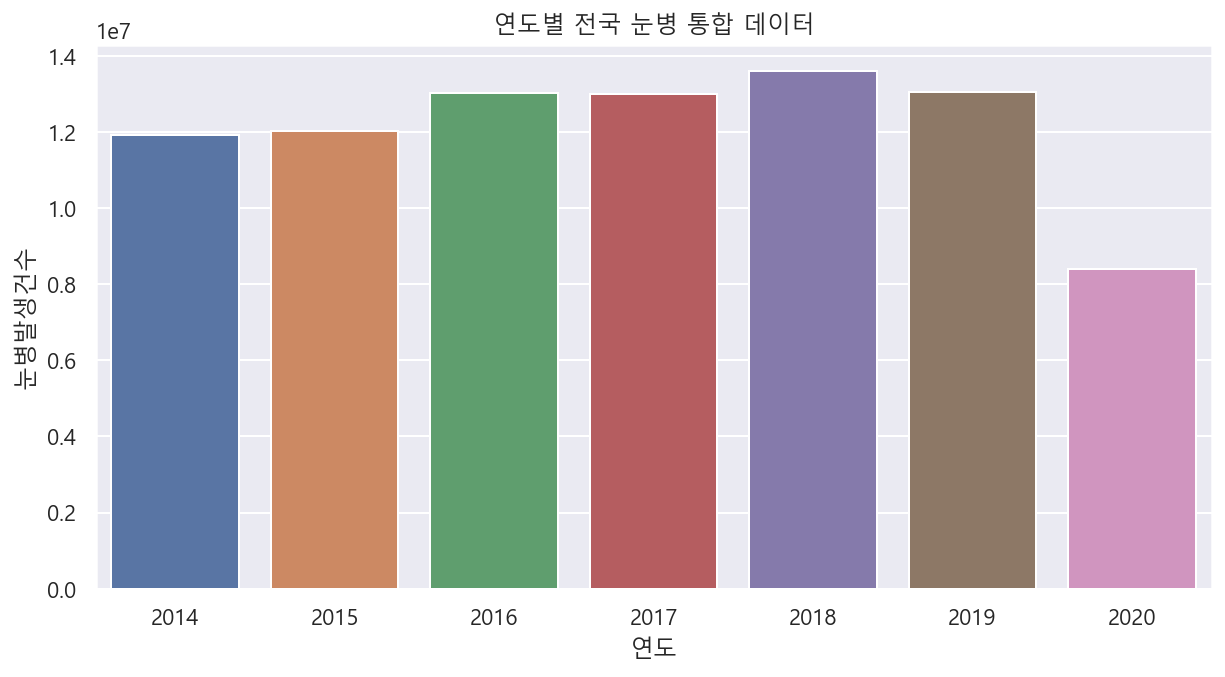

In [147]:
plt.figure(figsize=(10, 5))
plt.title("연도별 전국 눈병 통합 데이터")
sns.barplot(data=df_year, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'연도별 전국 천식 통합 데이터'}, xlabel='연도', ylabel='천식발생건수'>

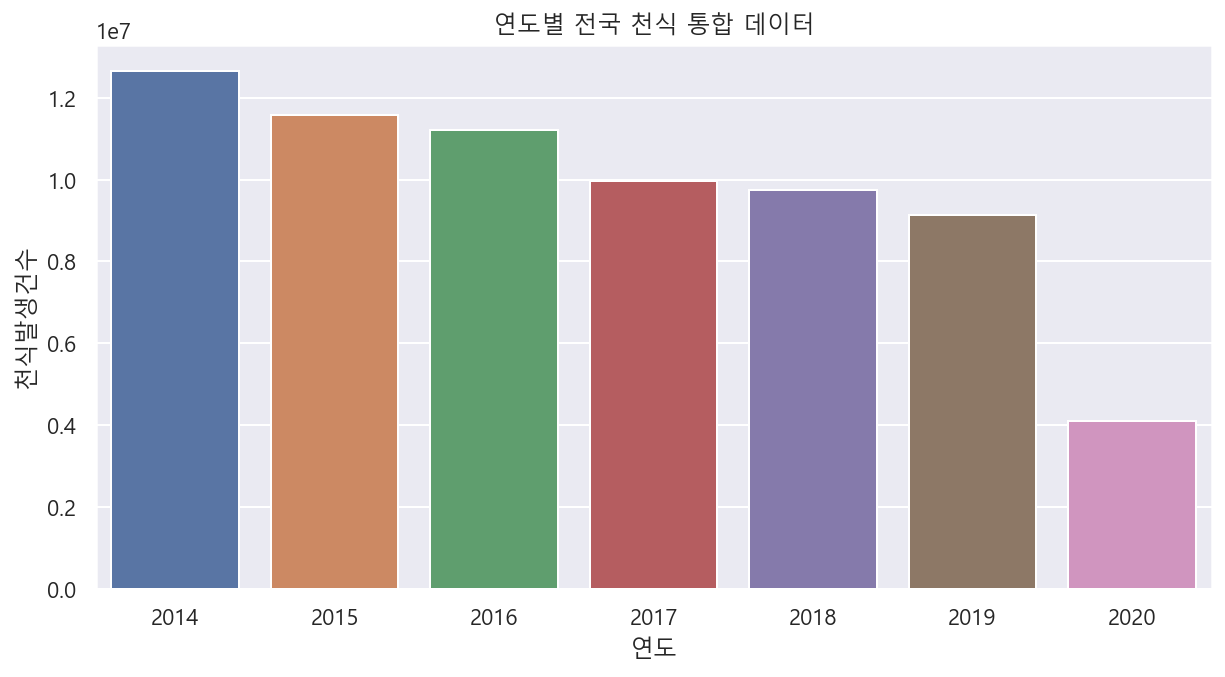

In [148]:
plt.figure(figsize=(10, 5))
plt.title("연도별 전국 천식 통합 데이터")
sns.barplot(data=df_year, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'연도별 전국 피부염 통합 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

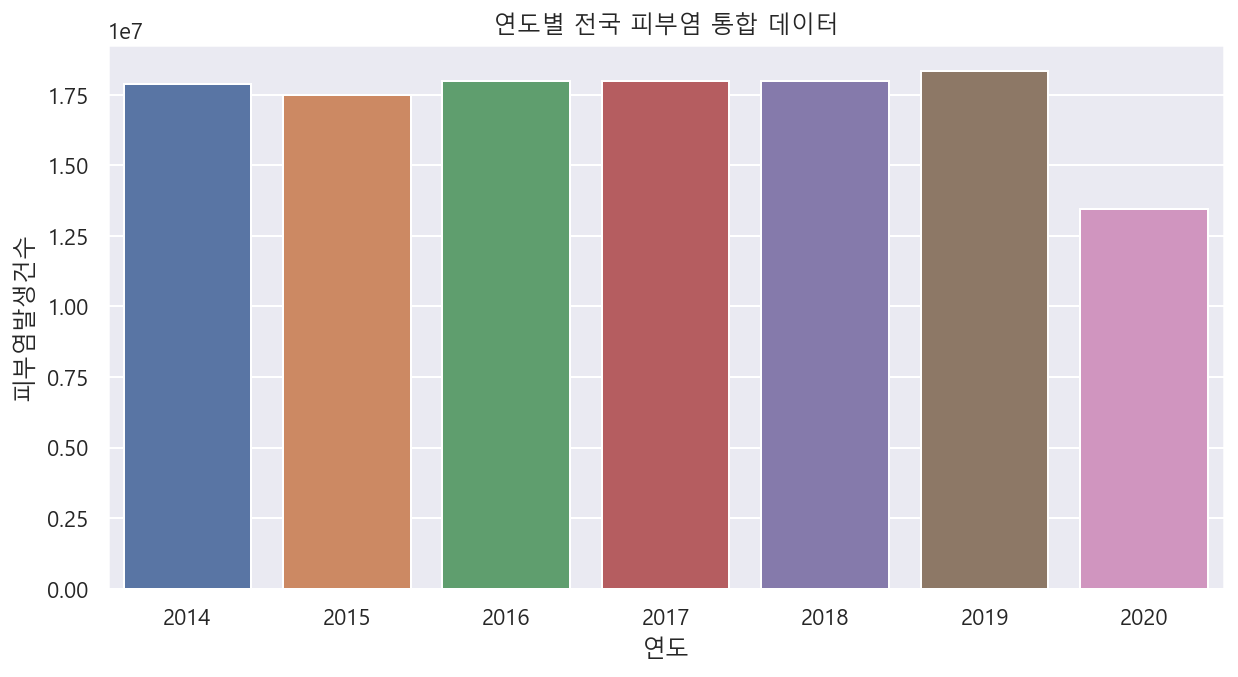

In [149]:
plt.figure(figsize=(10, 5))
plt.title("연도별 전국 피부염 통합 데이터")
sns.barplot(data=df_year, x="연도", y="피부염발생건수")

## 지역별 연도 데이터

### 서울 연도별 데이터

<AxesSubplot:title={'center':'서울특별시 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

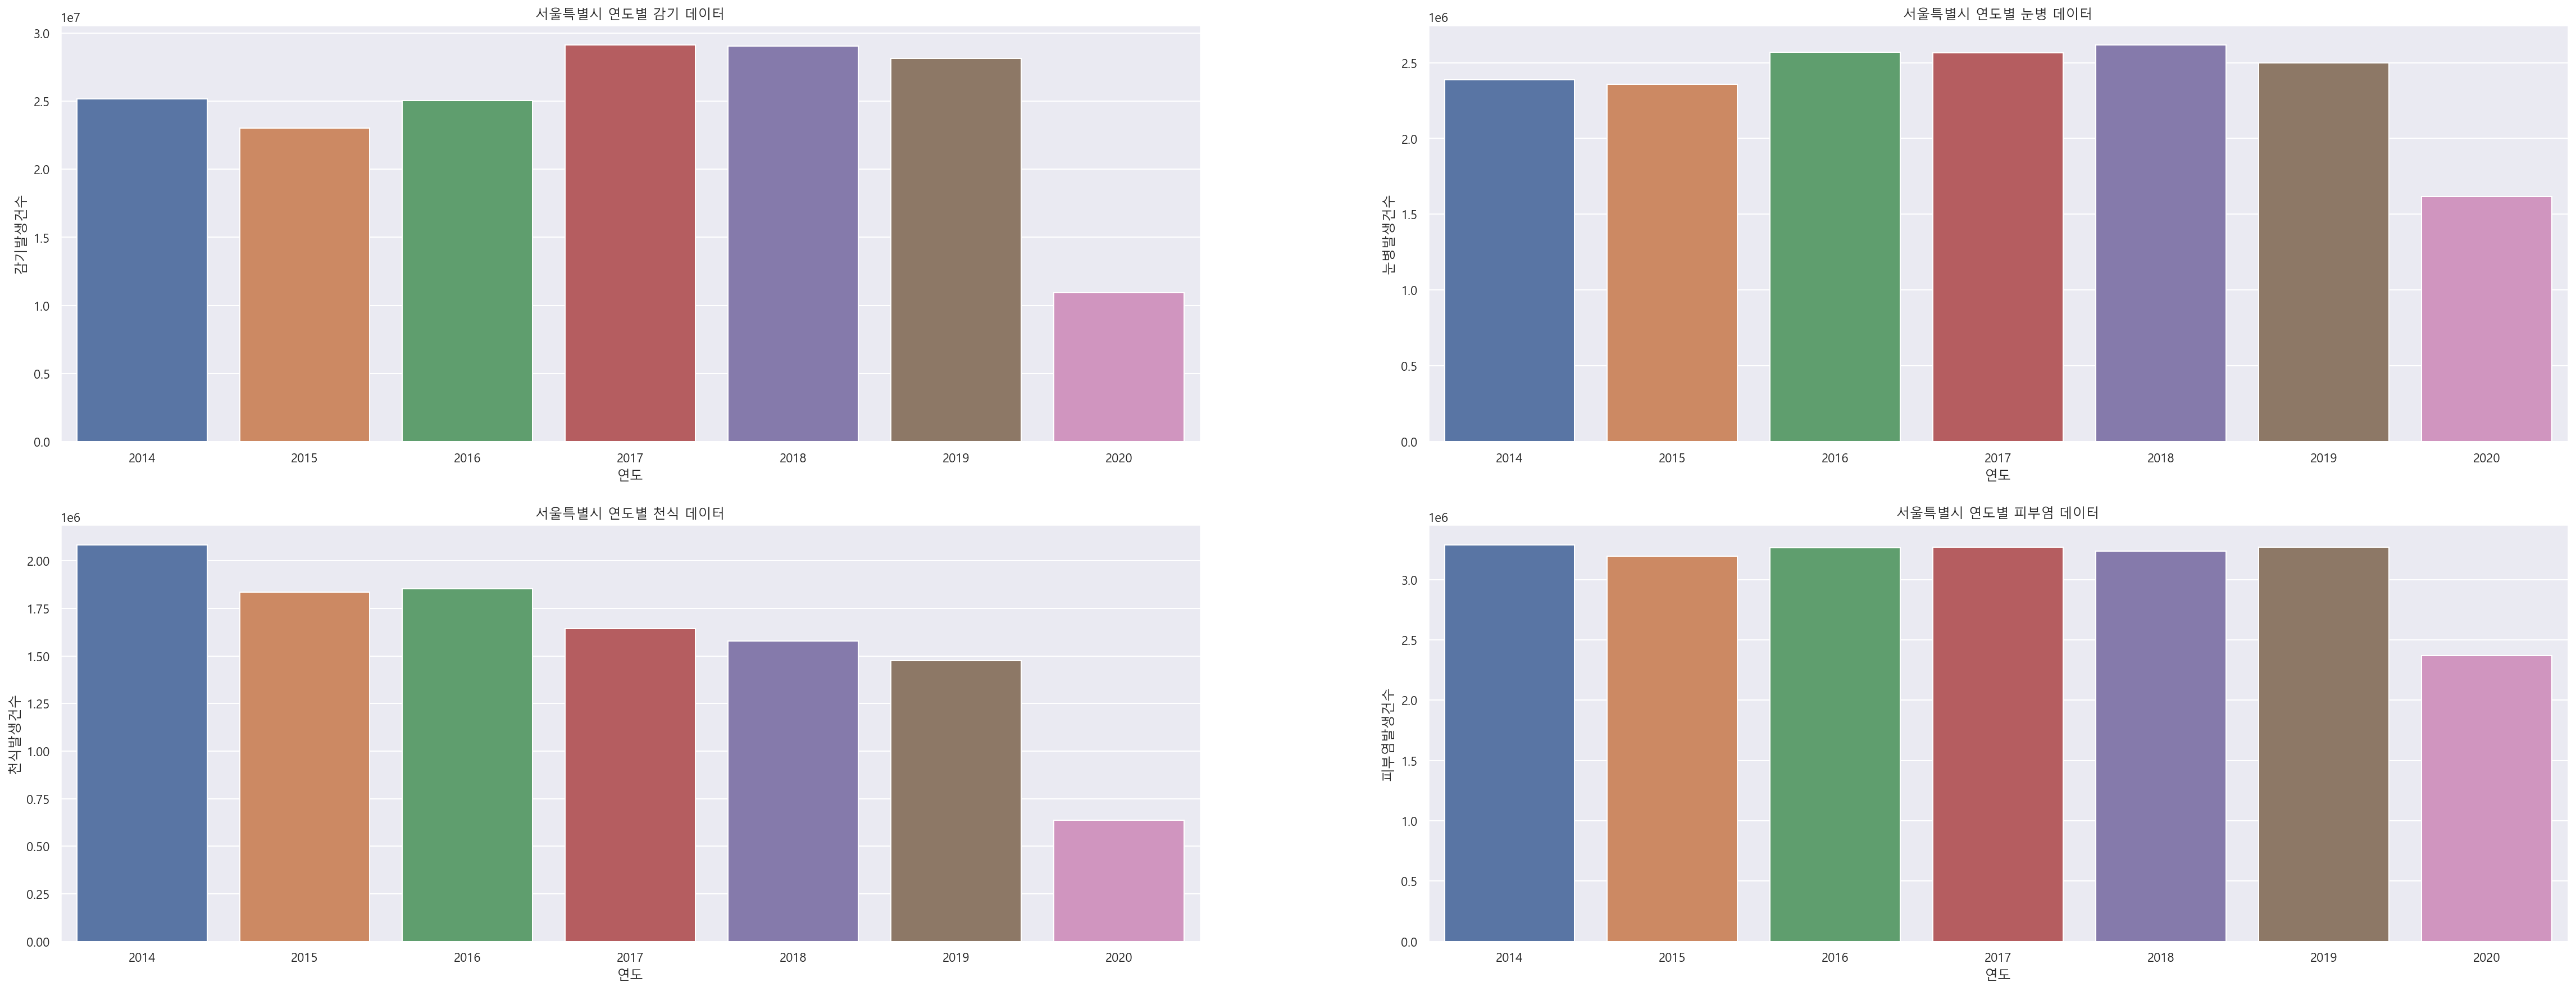

In [150]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("서울특별시 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("서울특별시 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("서울특별시 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("서울특별시 연도별 피부염 데이터")

sns.barplot(data=df_seoul, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_seoul, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_seoul, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_seoul, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'서울특별시 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

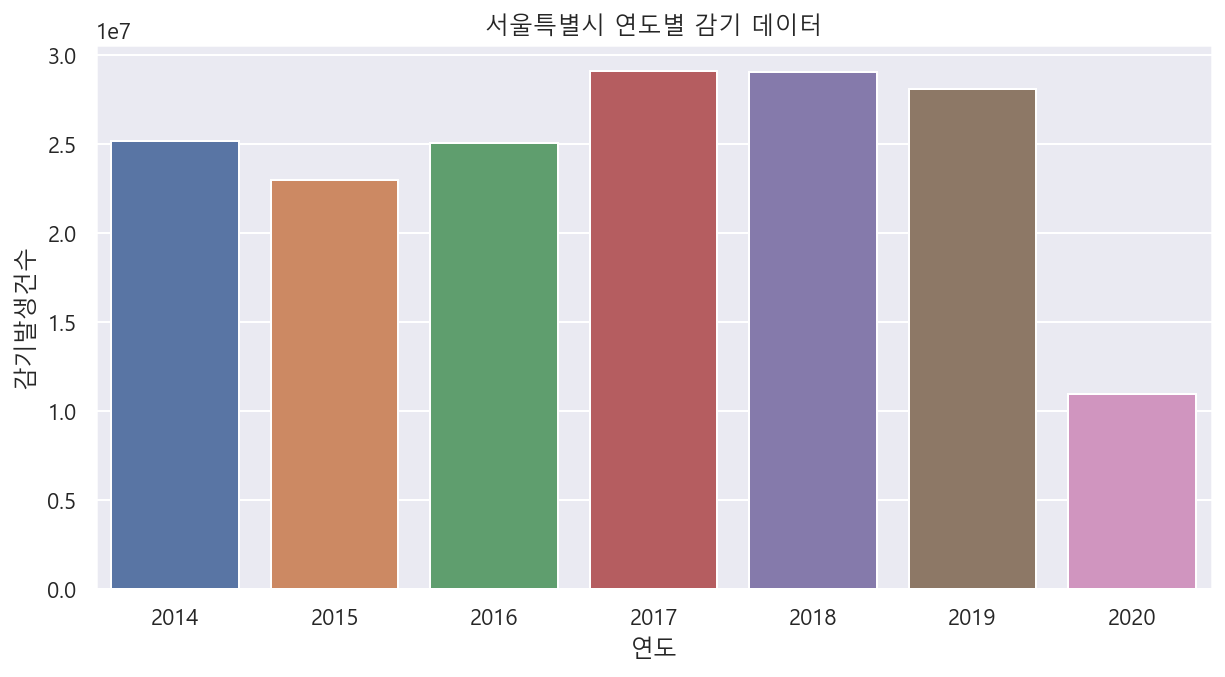

In [151]:
plt.figure(figsize=(10, 5))
plt.title("서울특별시 연도별 감기 데이터")
sns.barplot(data=df_seoul, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'서울특별시 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

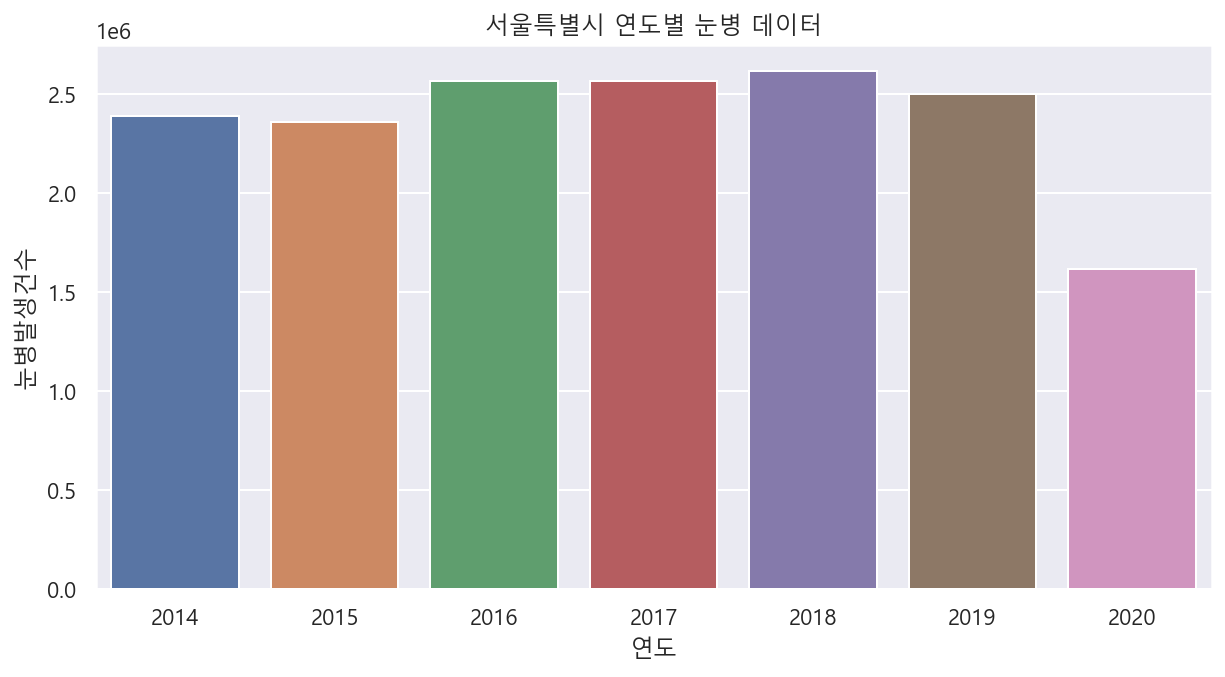

In [152]:
plt.figure(figsize=(10, 5))
plt.title("서울특별시 연도별 눈병 데이터")
sns.barplot(data=df_seoul, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'서울특별시 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

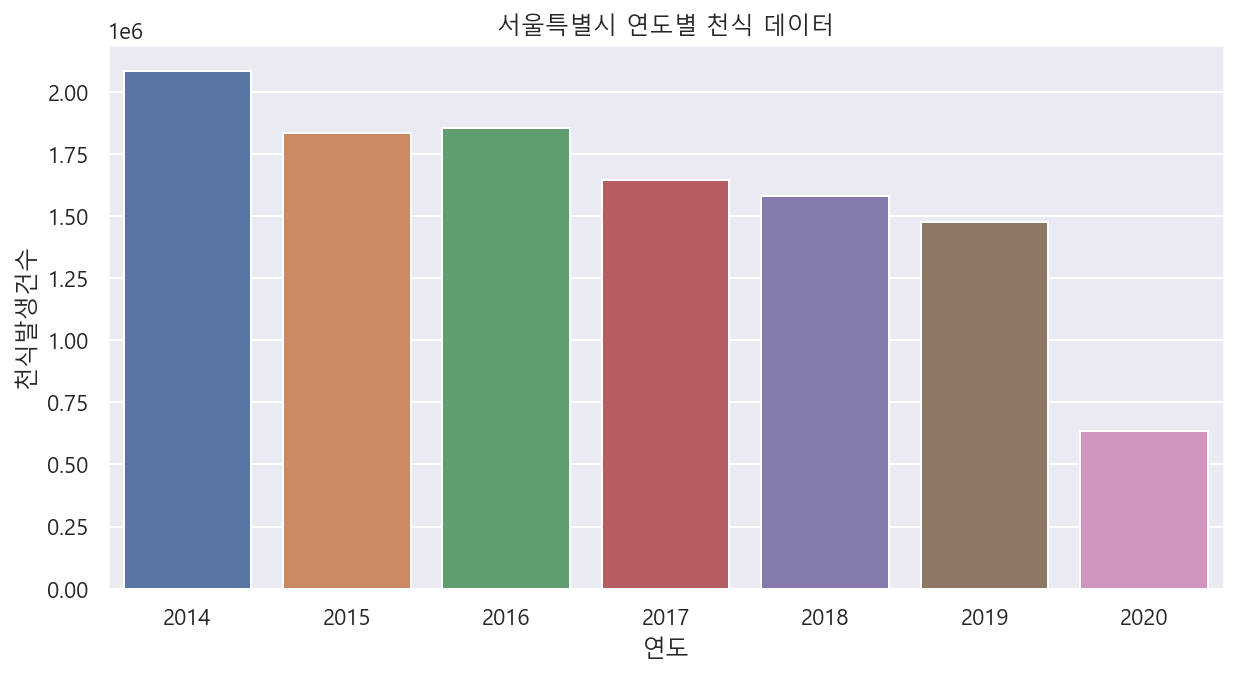

In [153]:
plt.figure(figsize=(10, 5))
plt.title("서울특별시 연도별 천식 데이터")
sns.barplot(data=df_seoul, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'서울특별시 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

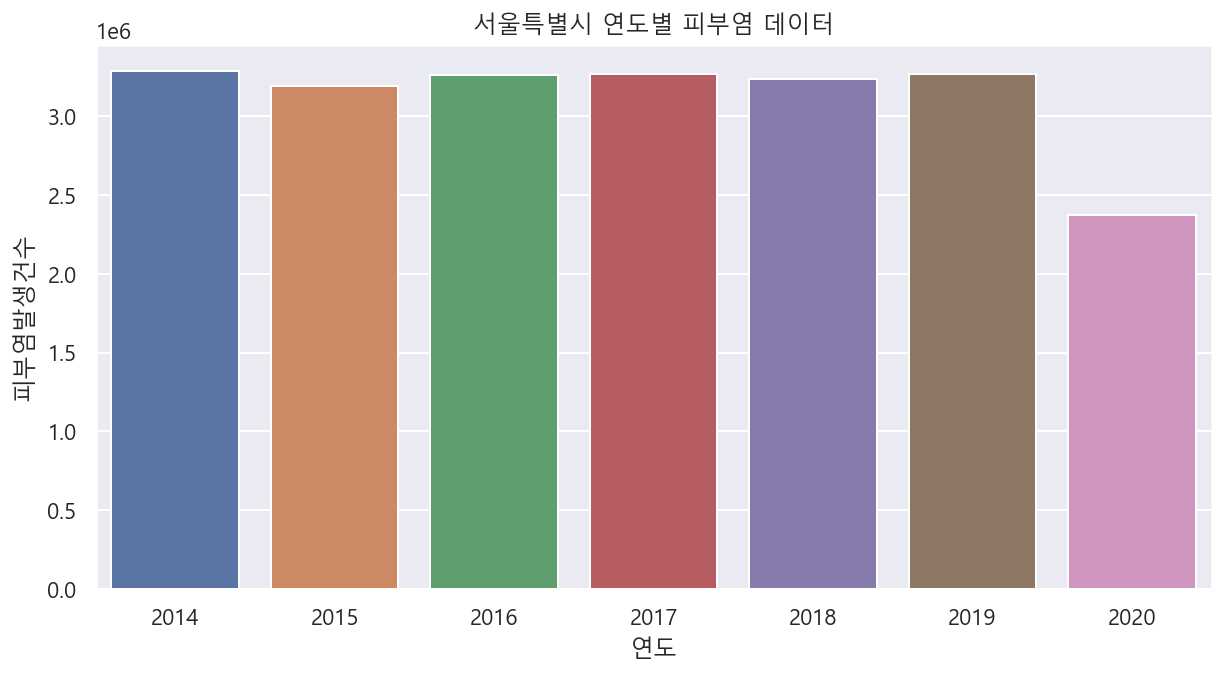

In [154]:
plt.figure(figsize=(10, 5))
plt.title("서울특별시 연도별 피부염 데이터")
sns.barplot(data=df_seoul, x="연도", y="피부염발생건수")

### 경기도 연도별 데이터

<AxesSubplot:title={'center':'경기도 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

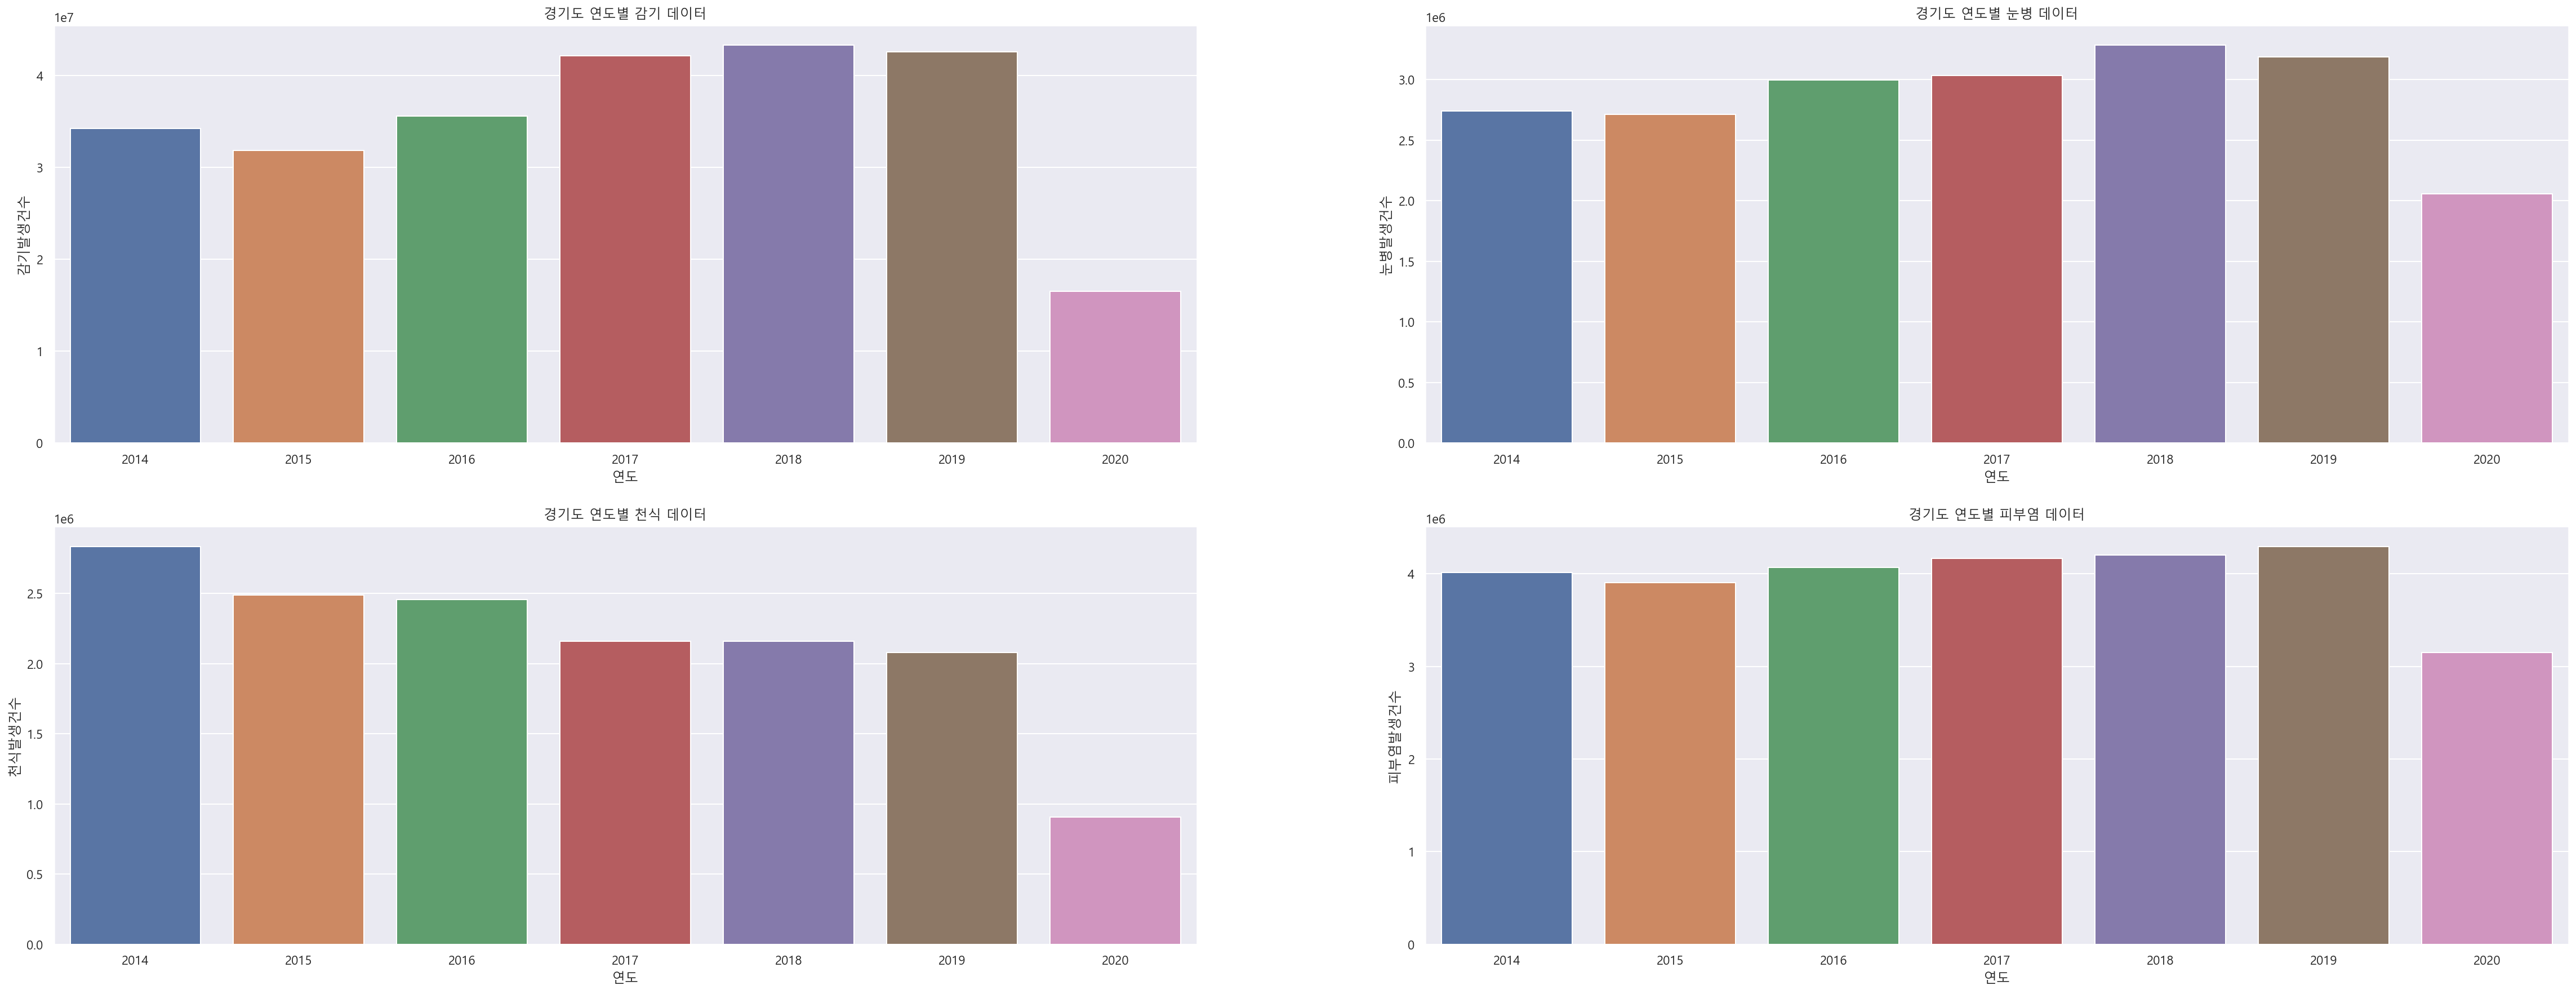

In [155]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("경기도 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("경기도 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("경기도 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("경기도 연도별 피부염 데이터")

sns.barplot(data=df_gyunggi, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_gyunggi, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_gyunggi, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_gyunggi, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'경기도 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

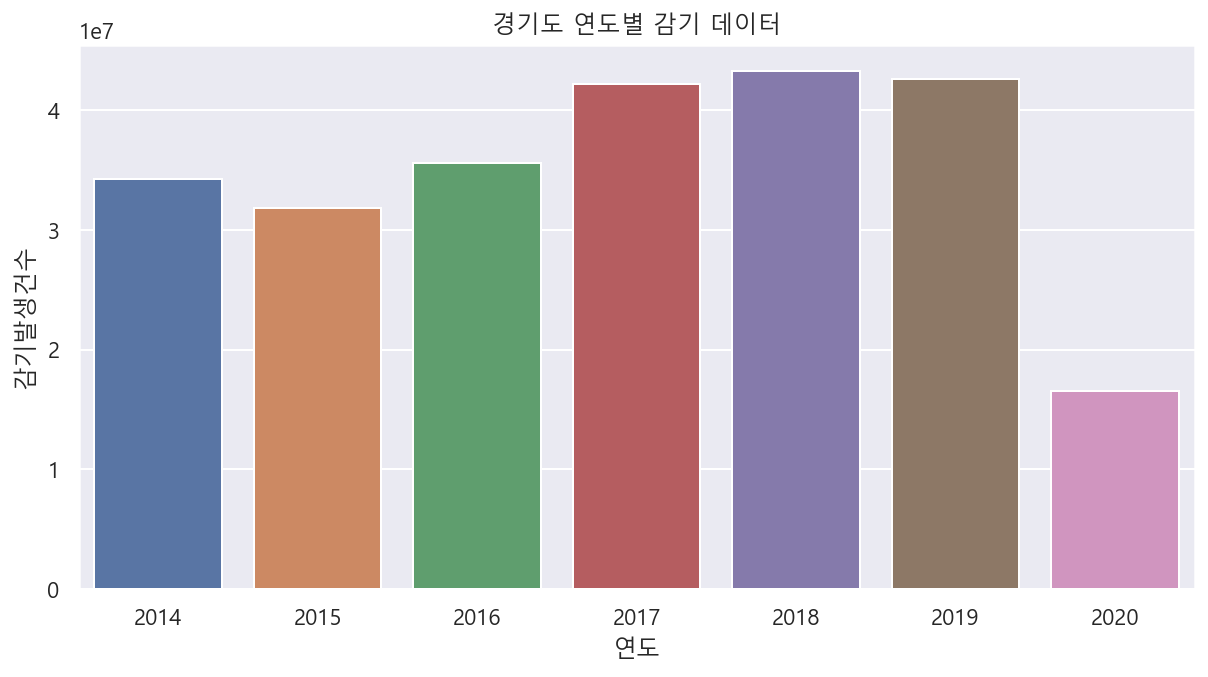

In [156]:
plt.figure(figsize=(10, 5))
plt.title("경기도 연도별 감기 데이터")
sns.barplot(data=df_gyunggi, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'경기도 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

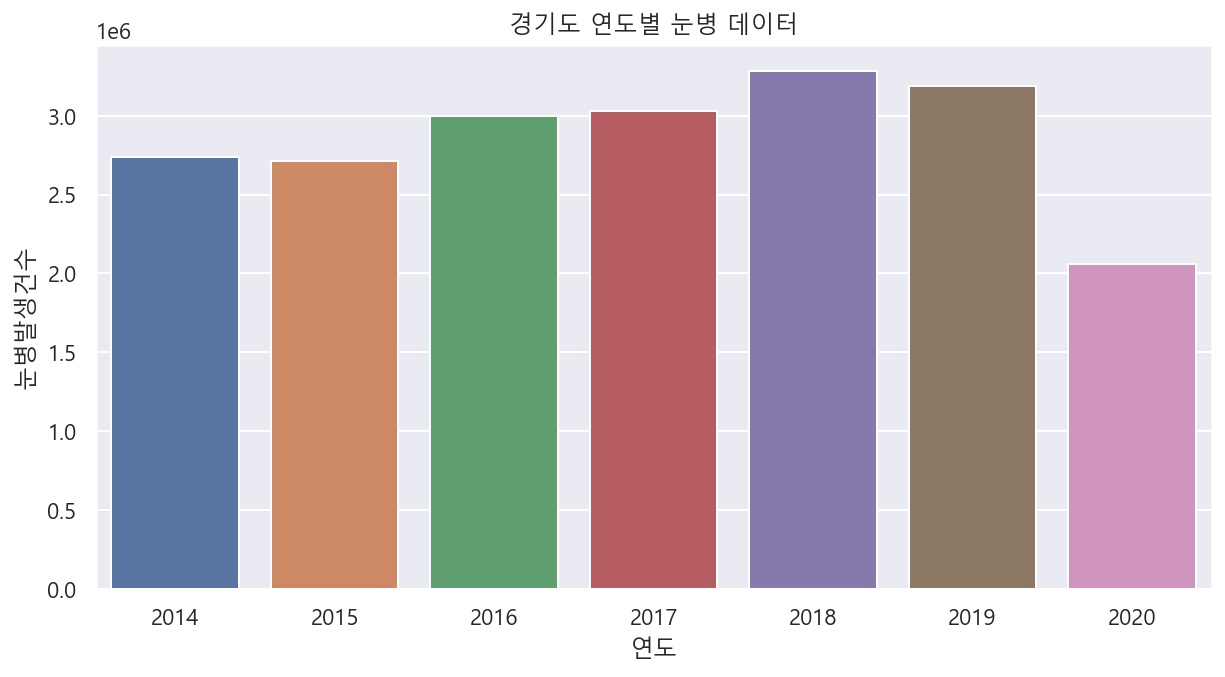

In [157]:
plt.figure(figsize=(10, 5))
plt.title("경기도 연도별 눈병 데이터")
sns.barplot(data=df_gyunggi, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'경기도 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

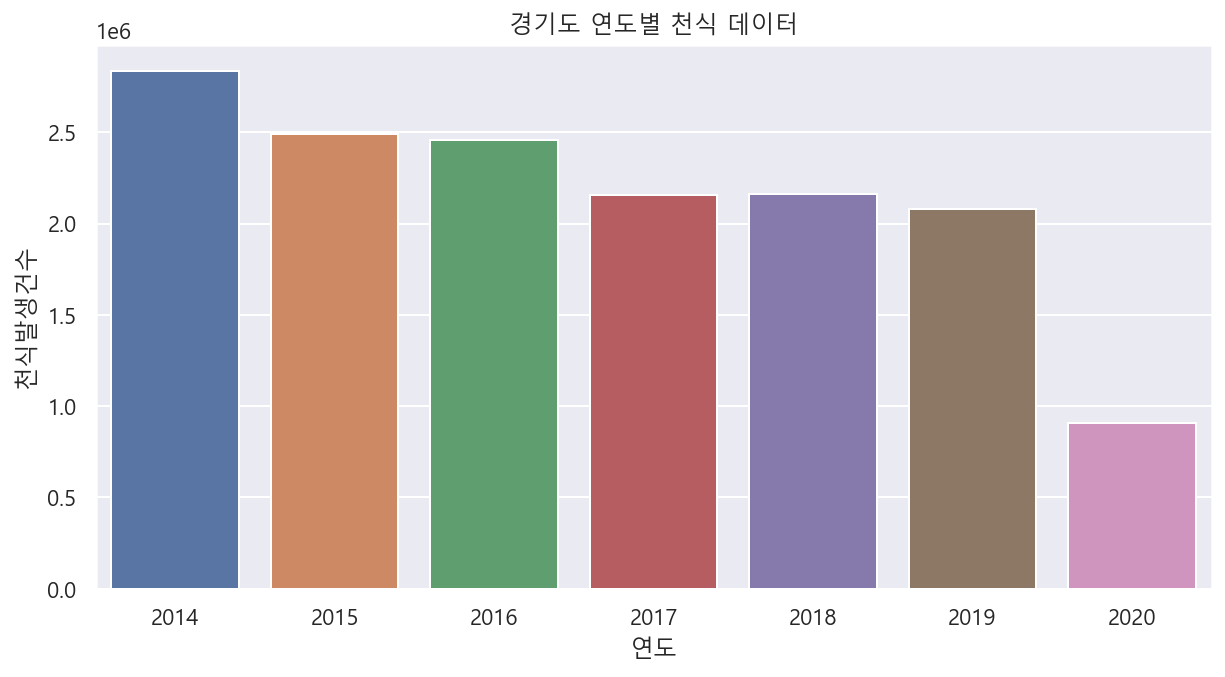

In [158]:
plt.figure(figsize=(10, 5))
plt.title("경기도 연도별 천식 데이터")
sns.barplot(data=df_gyunggi, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'경기도 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

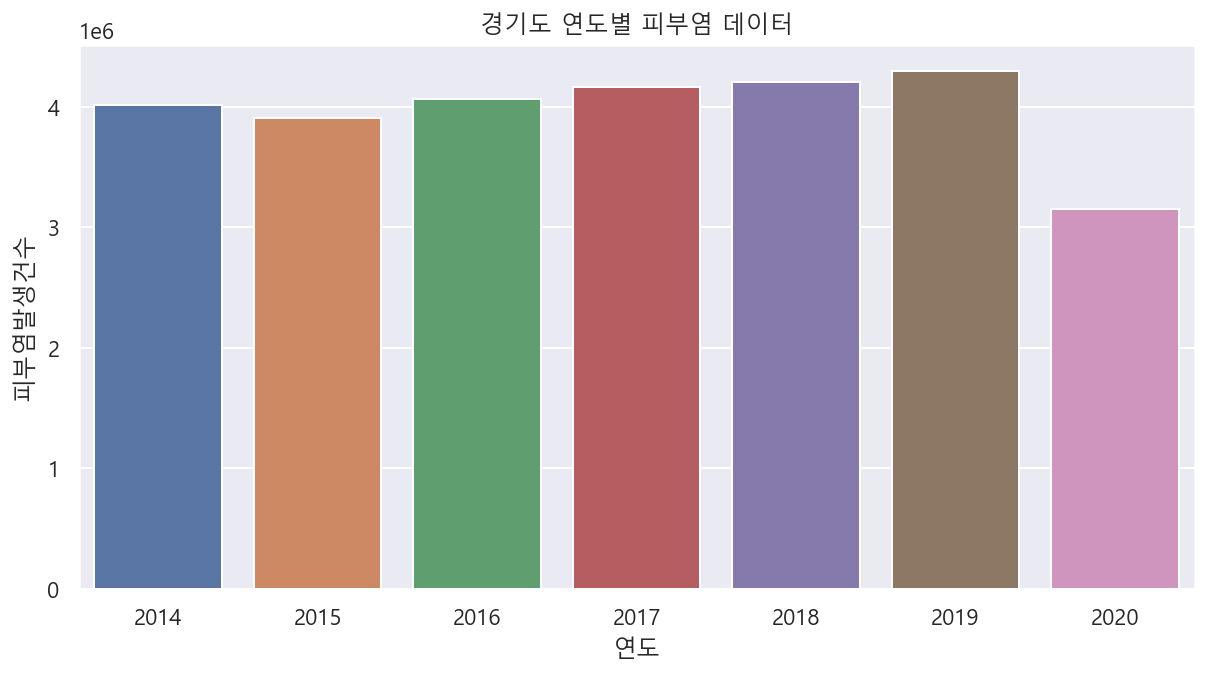

In [159]:
plt.figure(figsize=(10, 5))
plt.title("경기도 연도별 피부염 데이터")
sns.barplot(data=df_gyunggi, x="연도", y="피부염발생건수")

### 부산 연도별 데이터

<AxesSubplot:title={'center':'부산 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

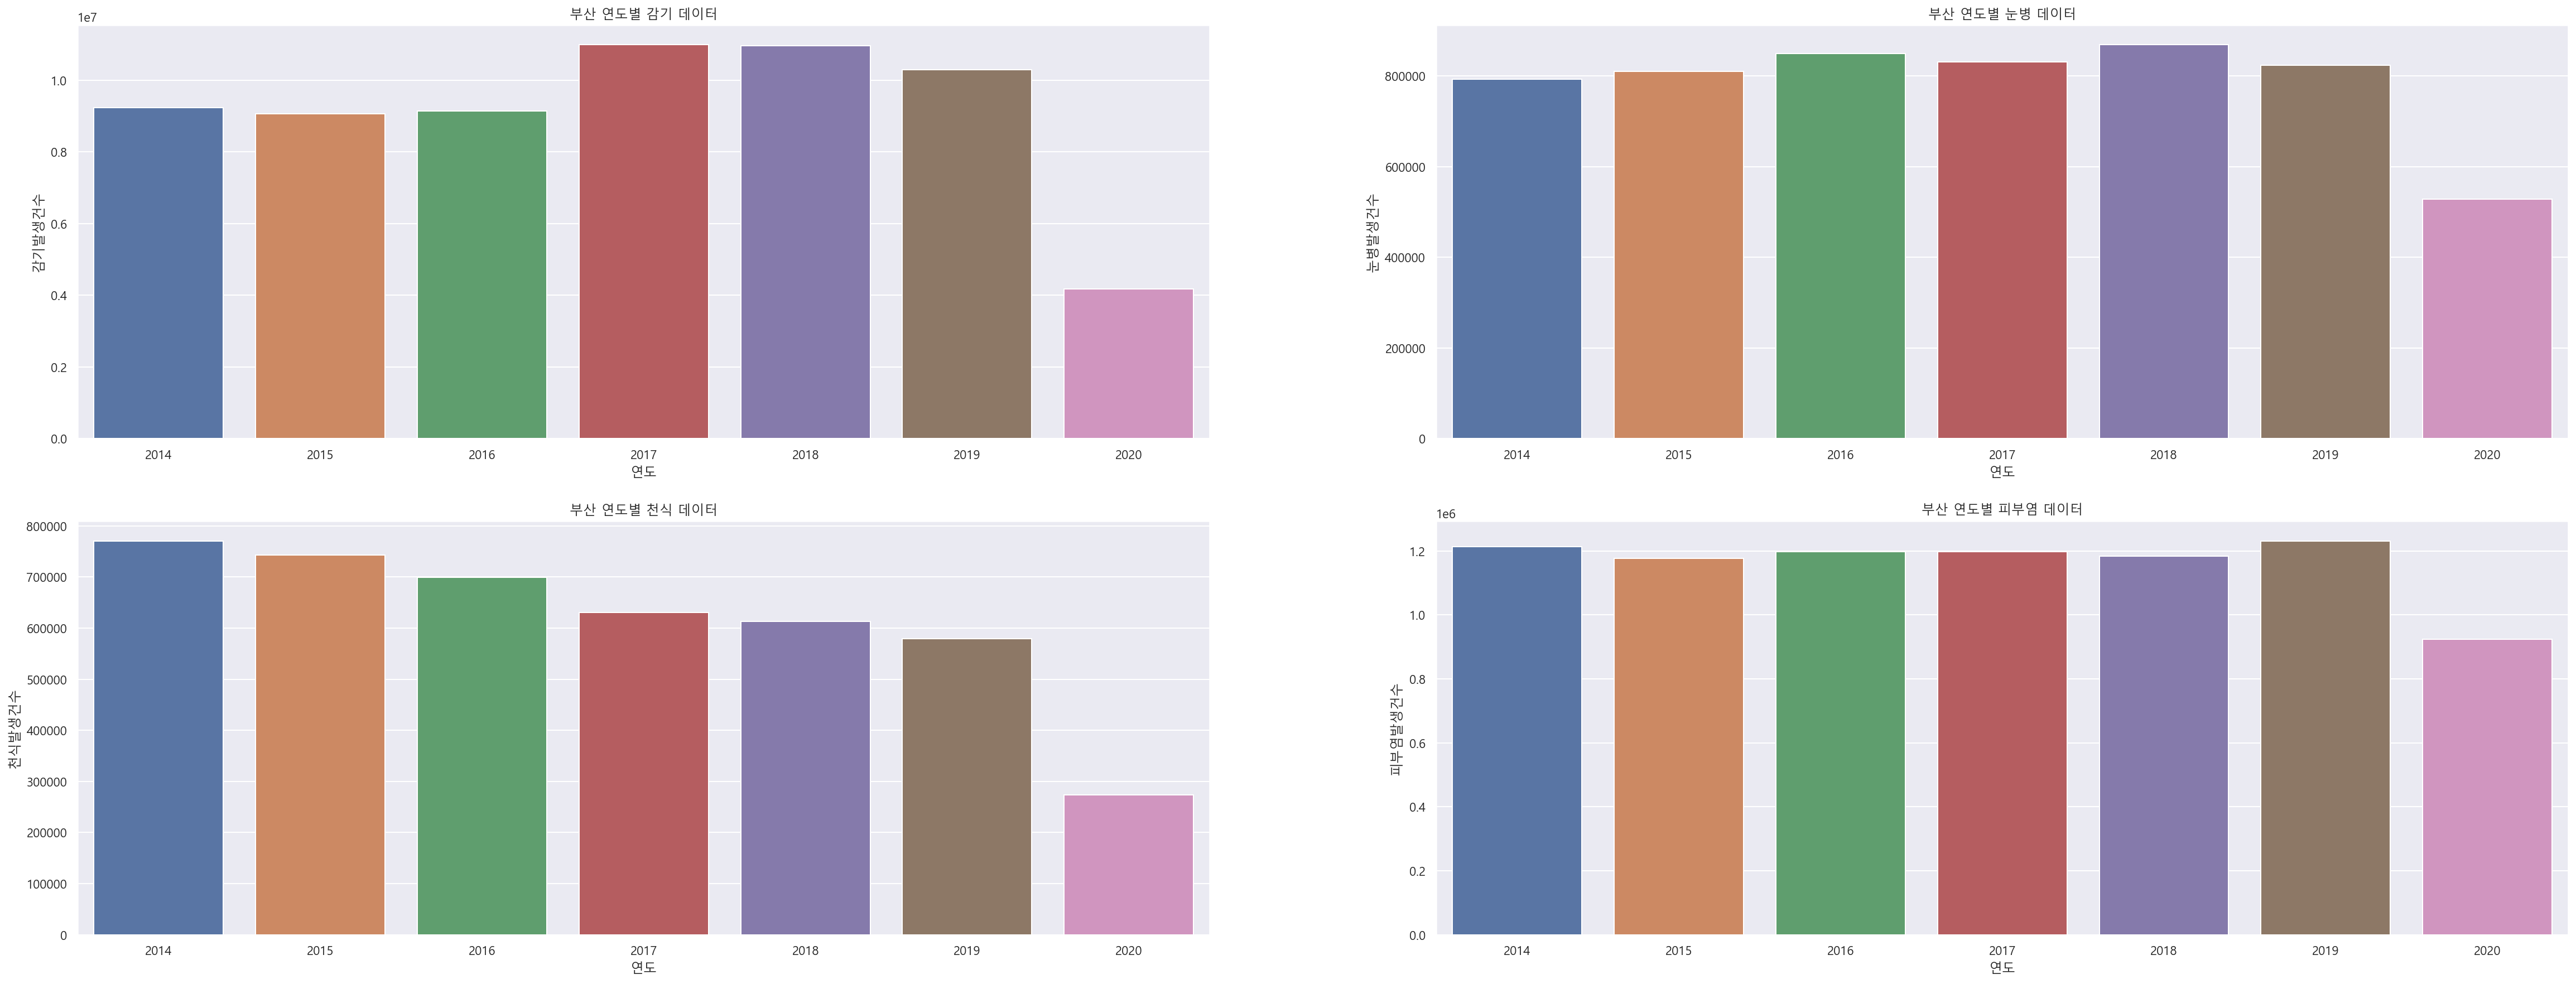

In [160]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("부산 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("부산 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("부산 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("부산 연도별 피부염 데이터")

sns.barplot(data=df_busan, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_busan, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_busan, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_busan, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'부산 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

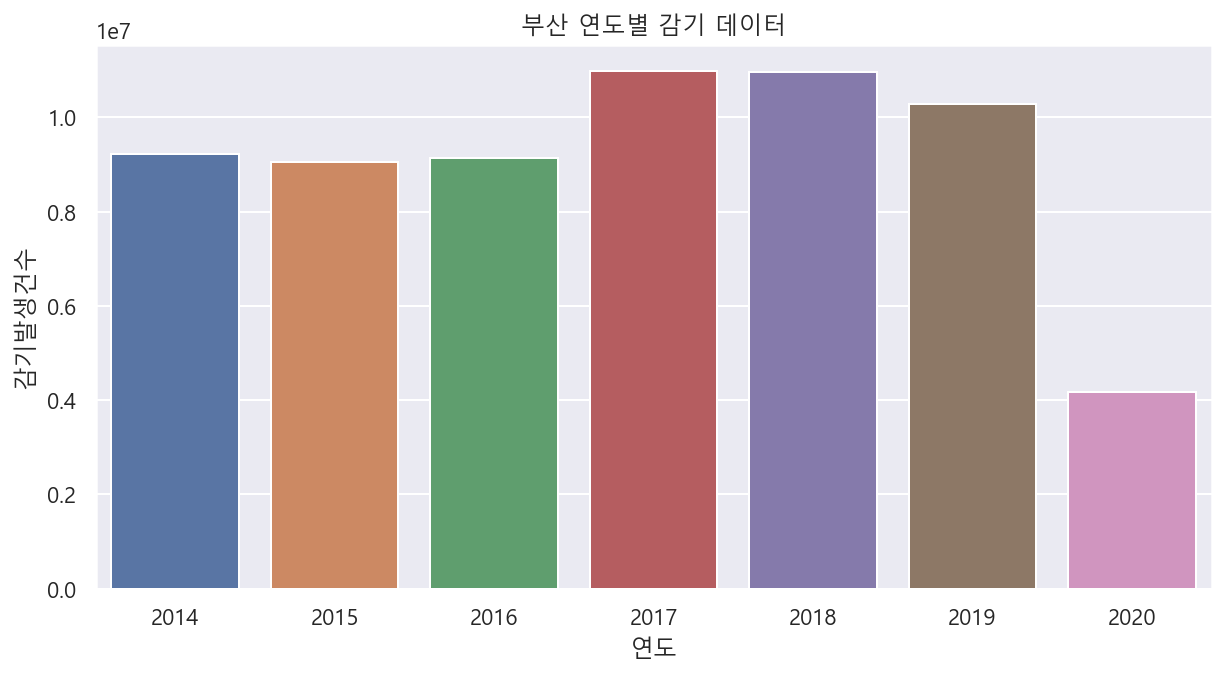

In [161]:
plt.figure(figsize=(10, 5))
plt.title("부산 연도별 감기 데이터")
sns.barplot(data=df_busan, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'부산 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

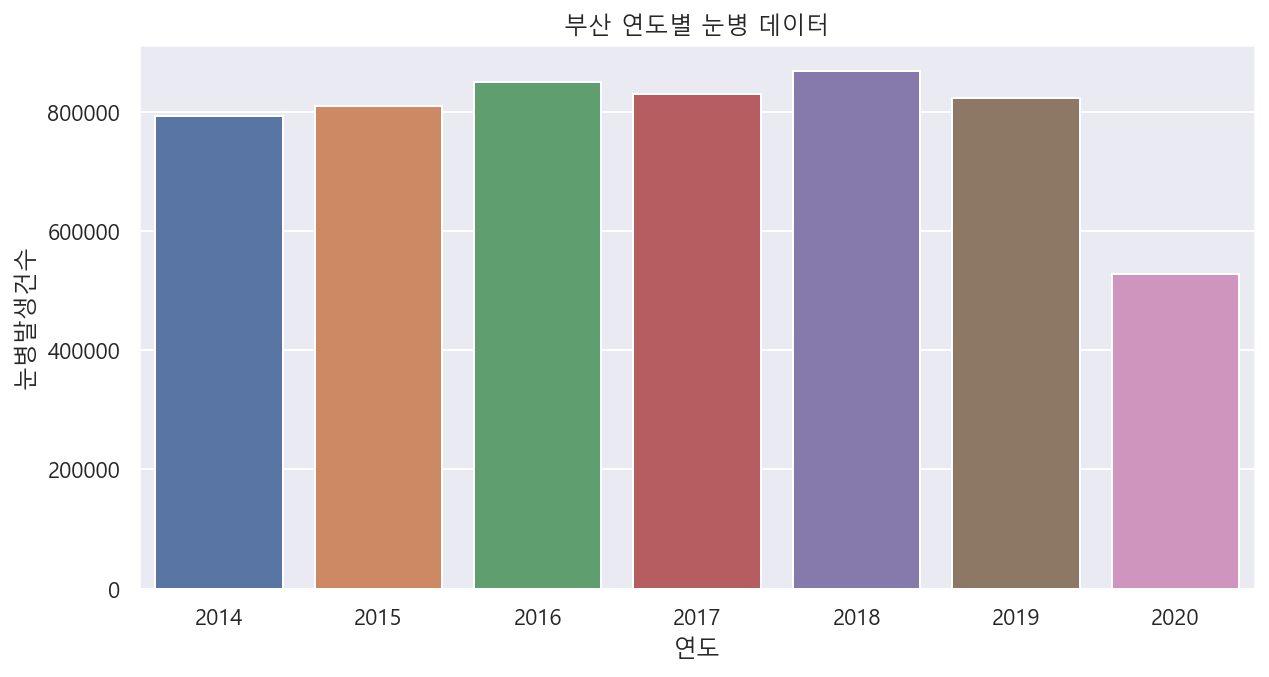

In [162]:
plt.figure(figsize=(10, 5))
plt.title("부산 연도별 눈병 데이터")
sns.barplot(data=df_busan, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'부산 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

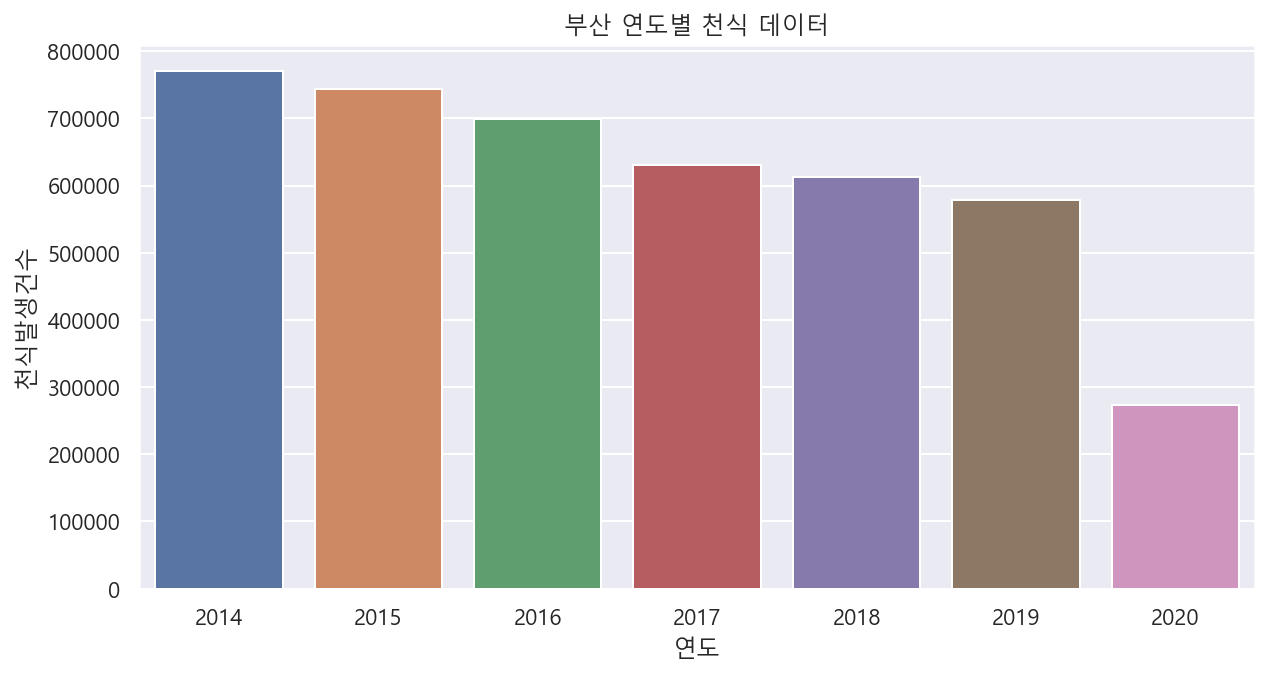

In [163]:
plt.figure(figsize=(10, 5))
plt.title("부산 연도별 천식 데이터")
sns.barplot(data=df_busan, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'부산 연도별 피부염 데이터'}, xlabel='연도', ylabel='천식발생건수'>

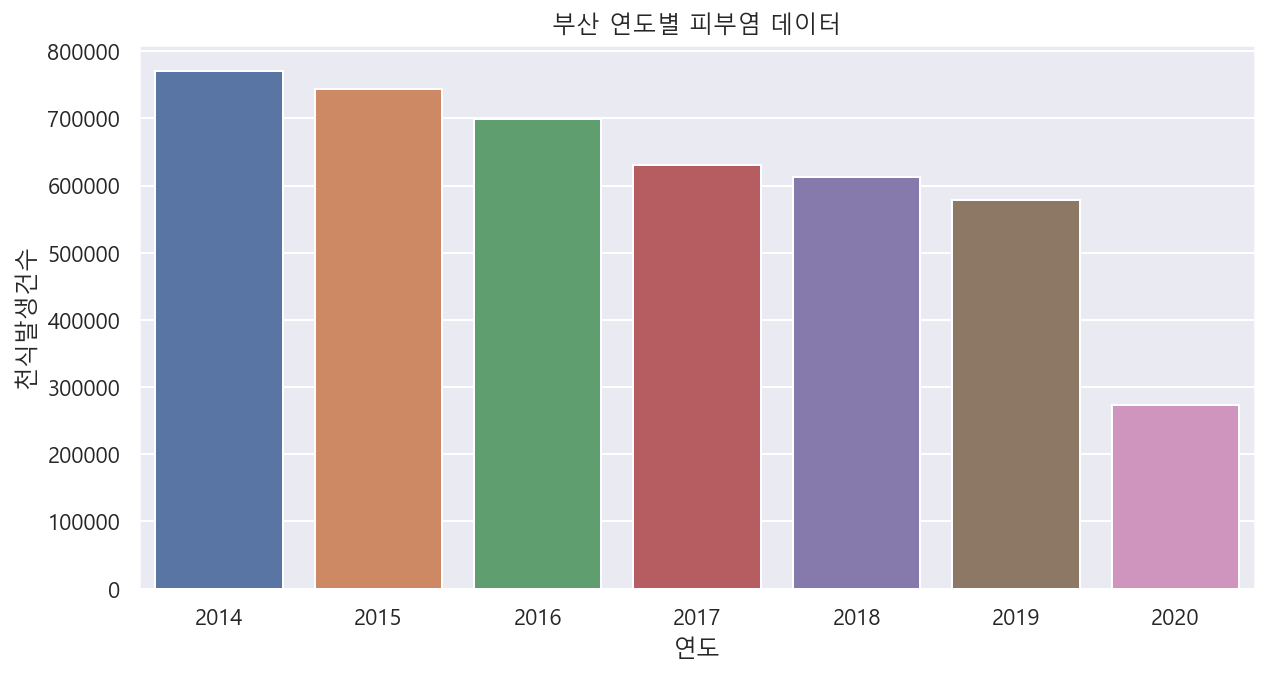

In [164]:
plt.figure(figsize=(10, 5))
plt.title("부산 연도별 피부염 데이터")
sns.barplot(data=df_busan, x="연도", y="천식발생건수")

### 대구 연도별 데이터

<AxesSubplot:title={'center':'대구 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

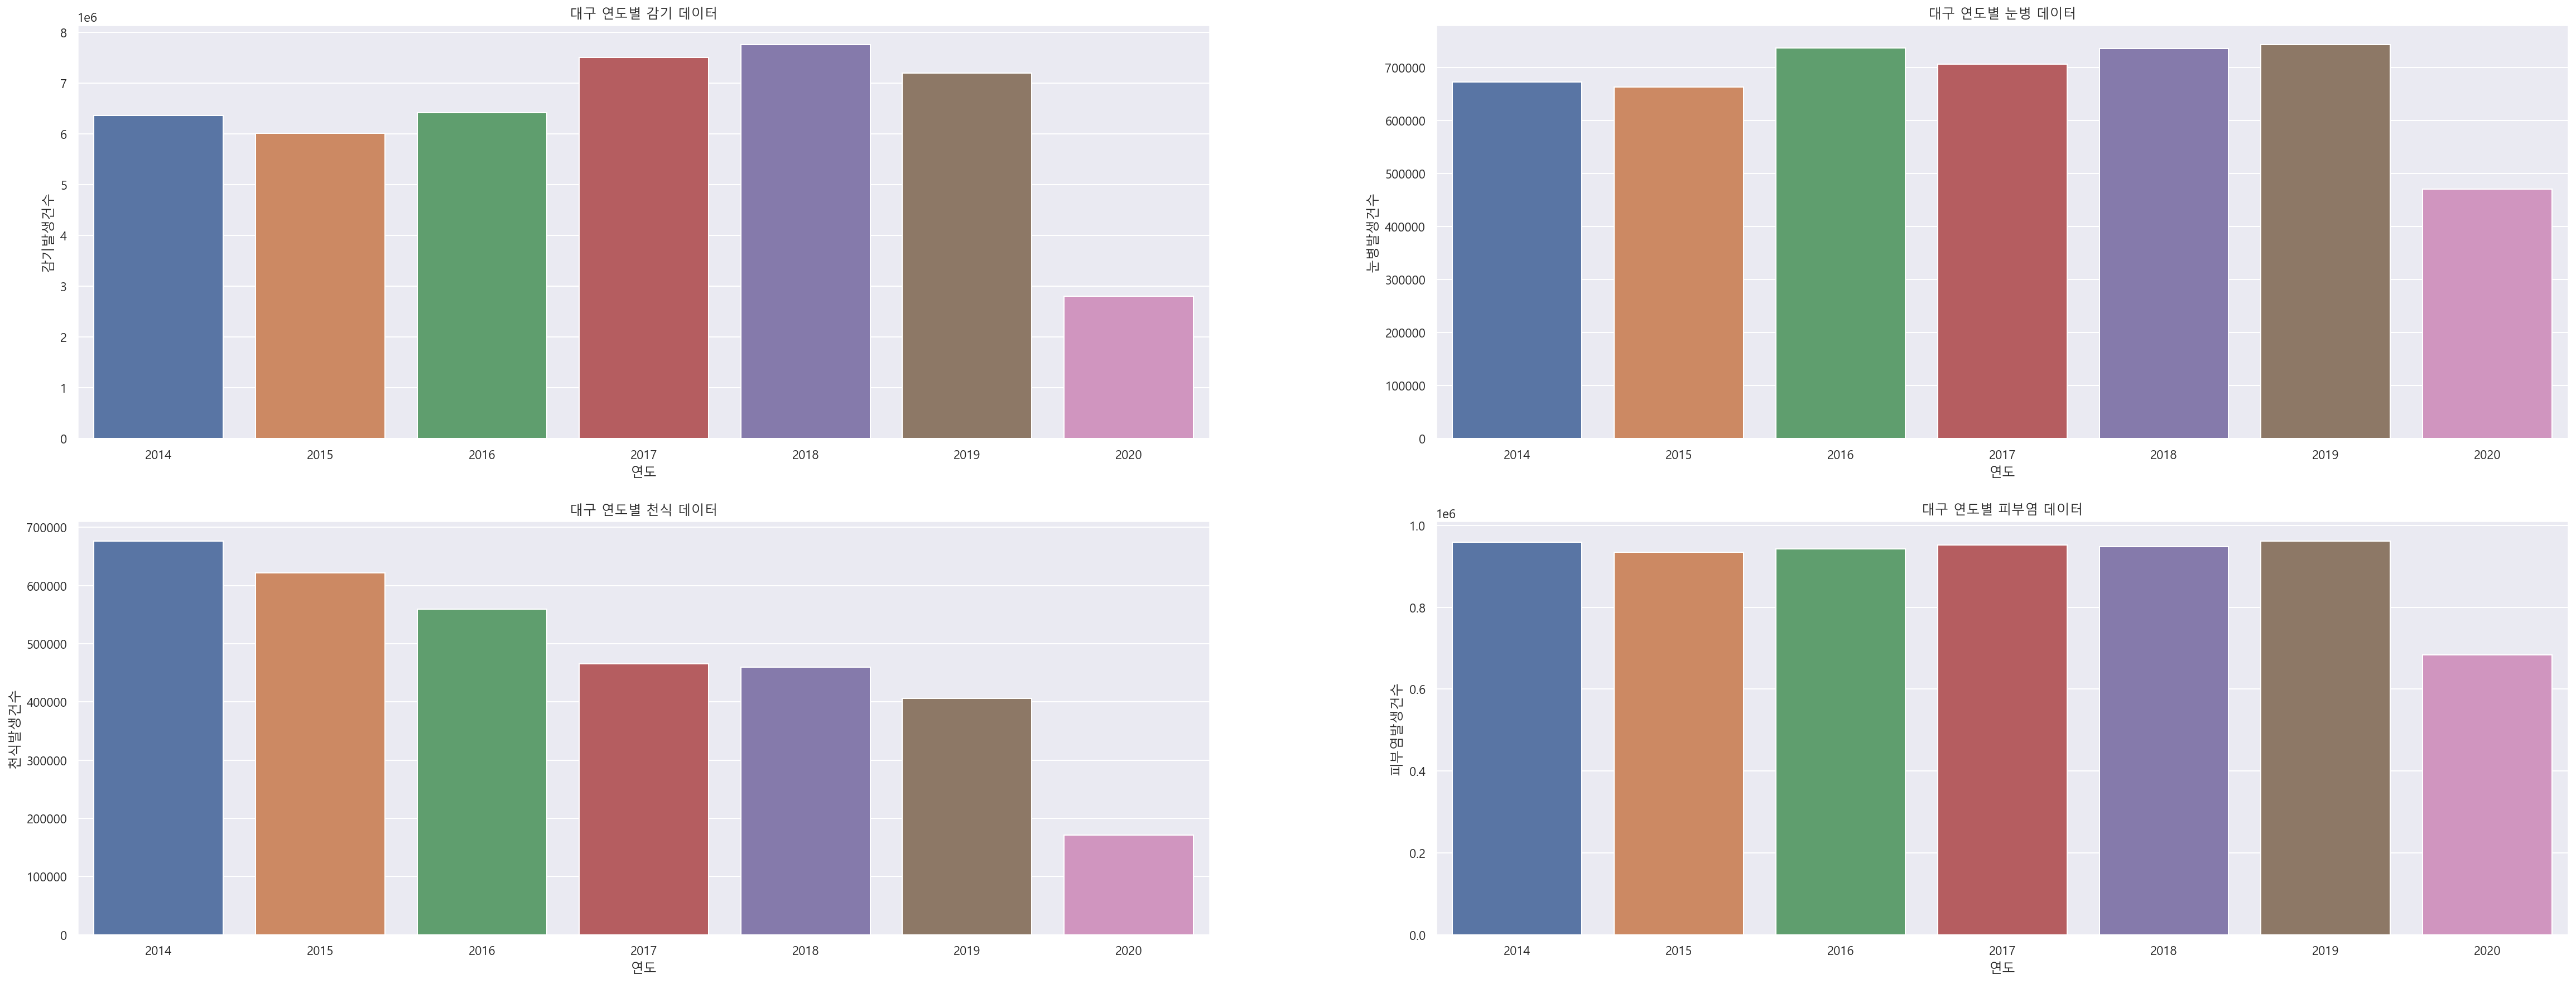

In [165]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("대구 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("대구 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("대구 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("대구 연도별 피부염 데이터")

sns.barplot(data=df_daegu, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_daegu, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_daegu, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_daegu, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'대구 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

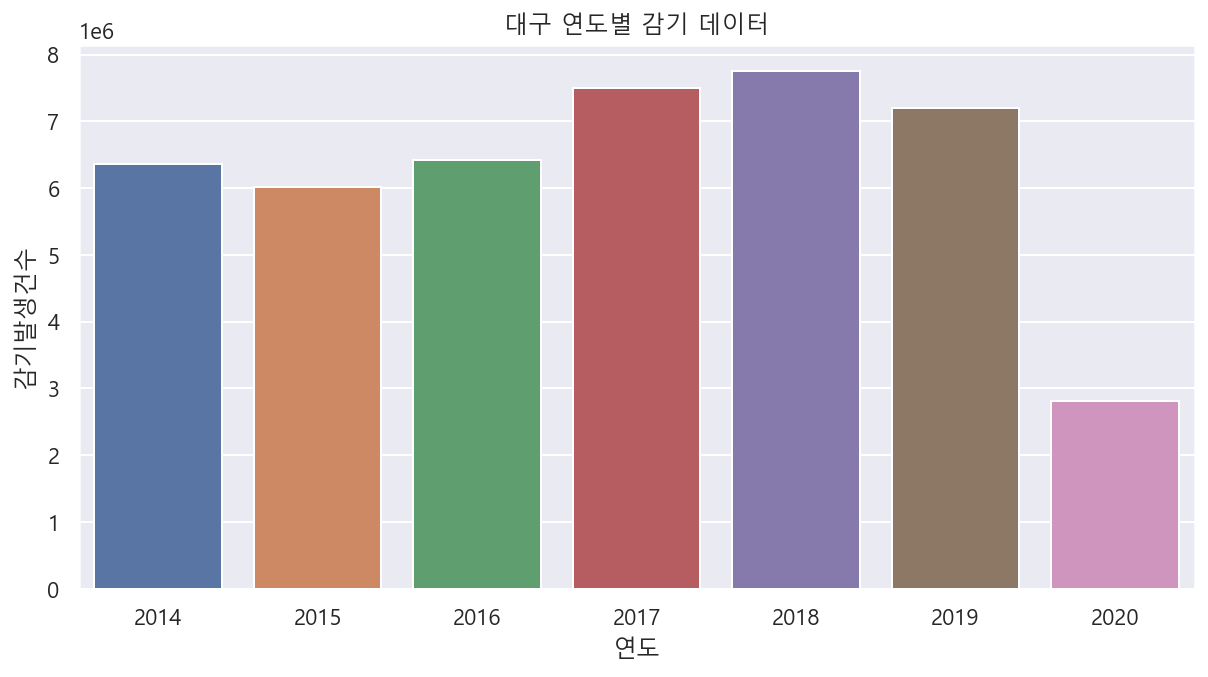

In [166]:
plt.figure(figsize=(10, 5))
plt.title("대구 연도별 감기 데이터")
sns.barplot(data=df_daegu, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'대구 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

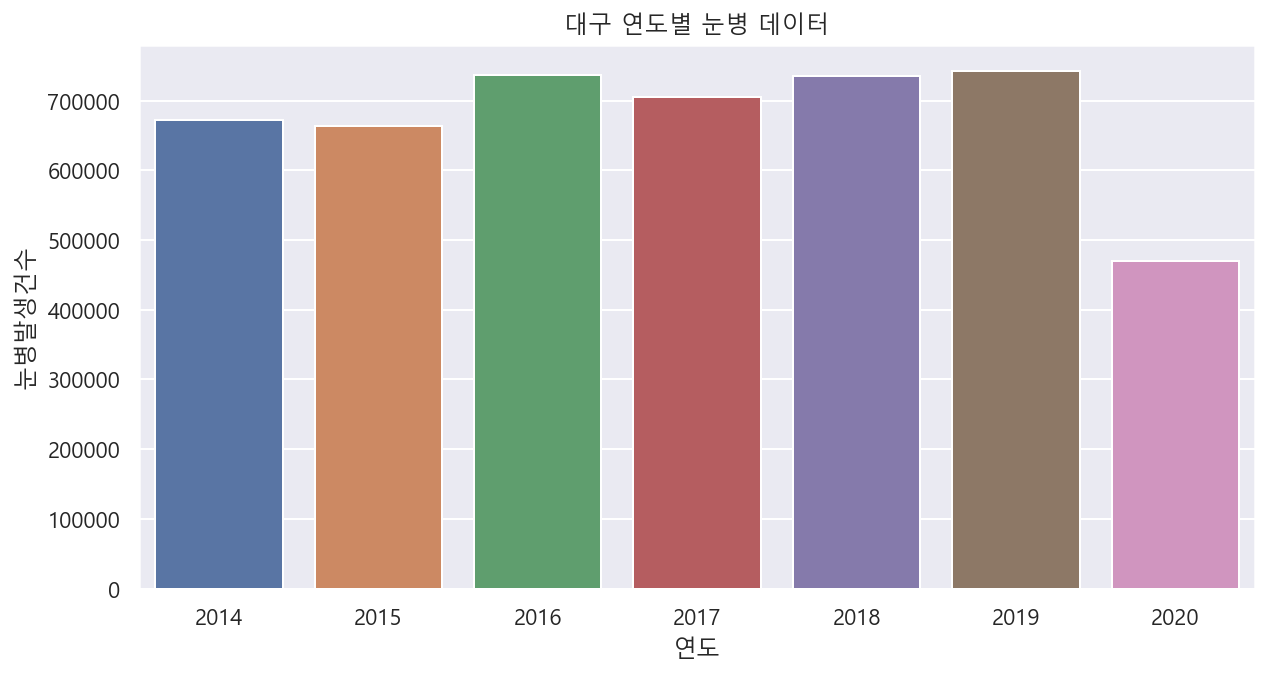

In [167]:
plt.figure(figsize=(10, 5))
plt.title("대구 연도별 눈병 데이터")
sns.barplot(data=df_daegu, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'대구 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

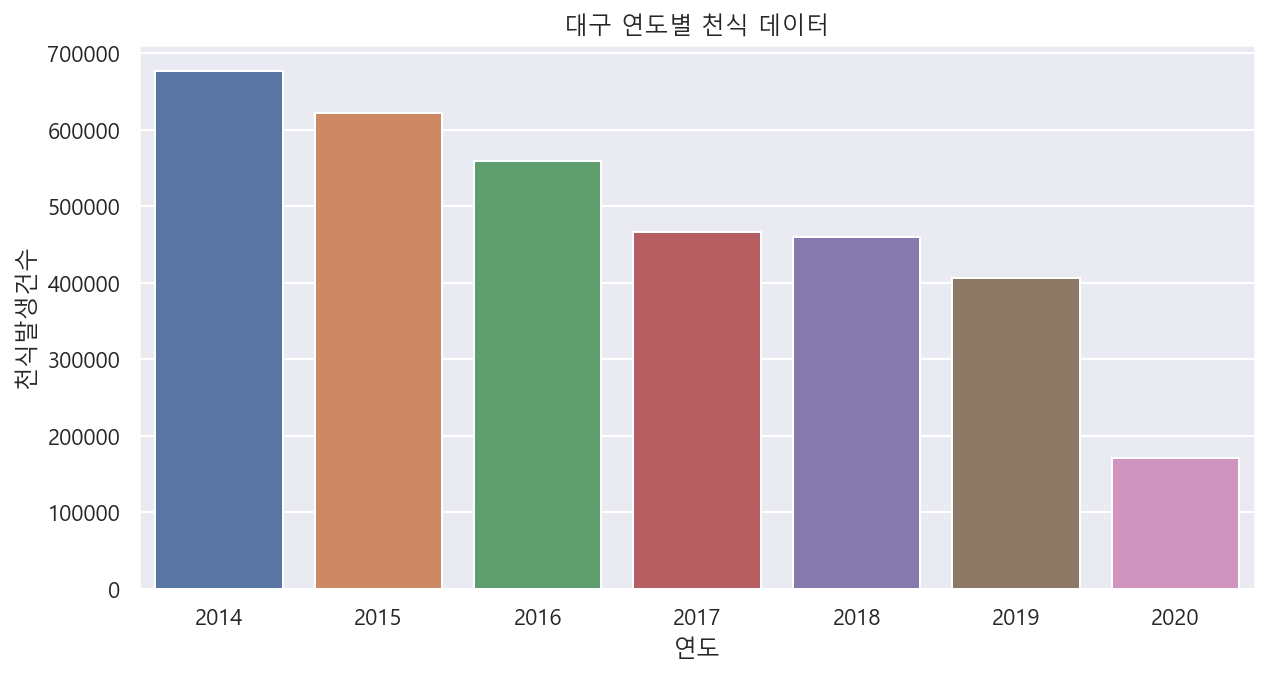

In [168]:
plt.figure(figsize=(10, 5))
plt.title("대구 연도별 천식 데이터")
sns.barplot(data=df_daegu, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'대구 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

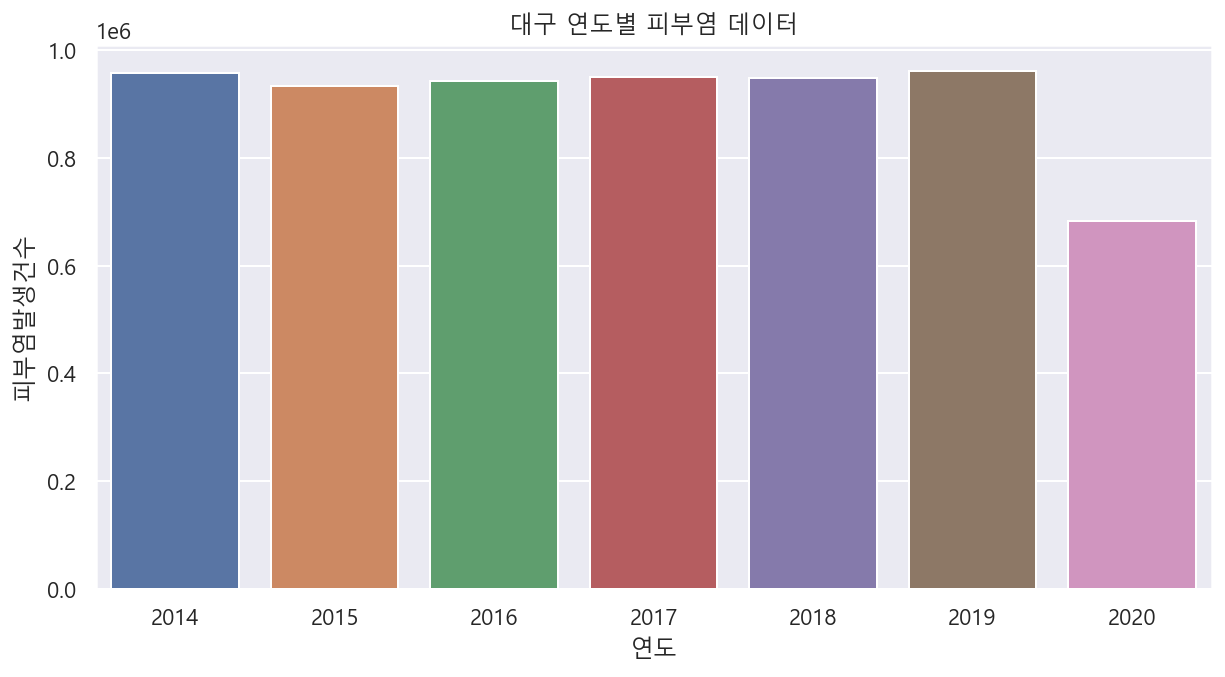

In [169]:
plt.figure(figsize=(10, 5))
plt.title("대구 연도별 피부염 데이터")
sns.barplot(data=df_daegu, x="연도", y="피부염발생건수")

### 인천 연도별 데이터

<AxesSubplot:title={'center':'인천 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

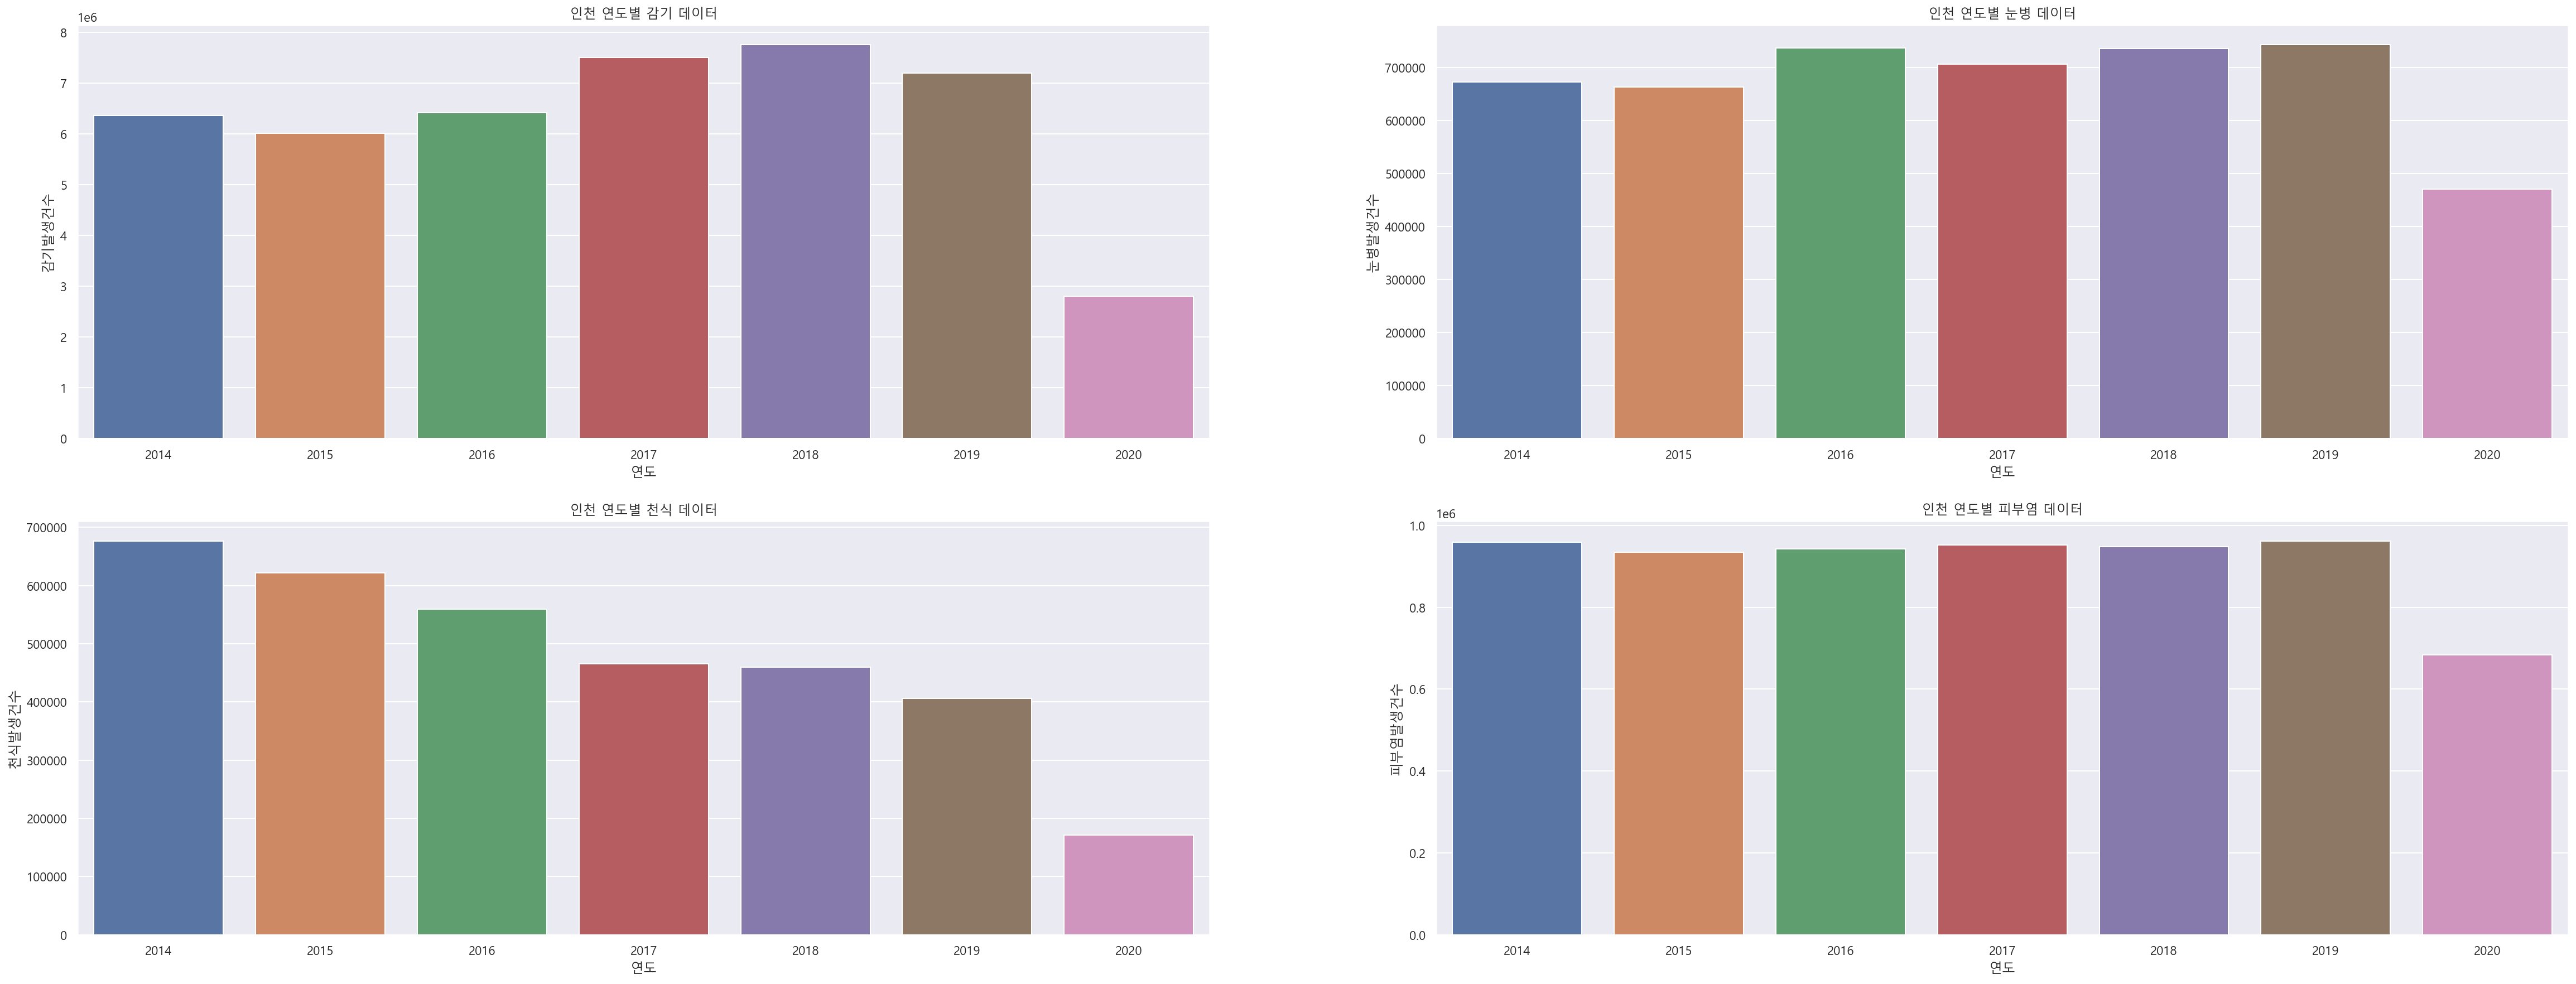

In [170]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("인천 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("인천 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("인천 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("인천 연도별 피부염 데이터")

sns.barplot(data=df_incheon, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_incheon, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_incheon, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_incheon, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'인천 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

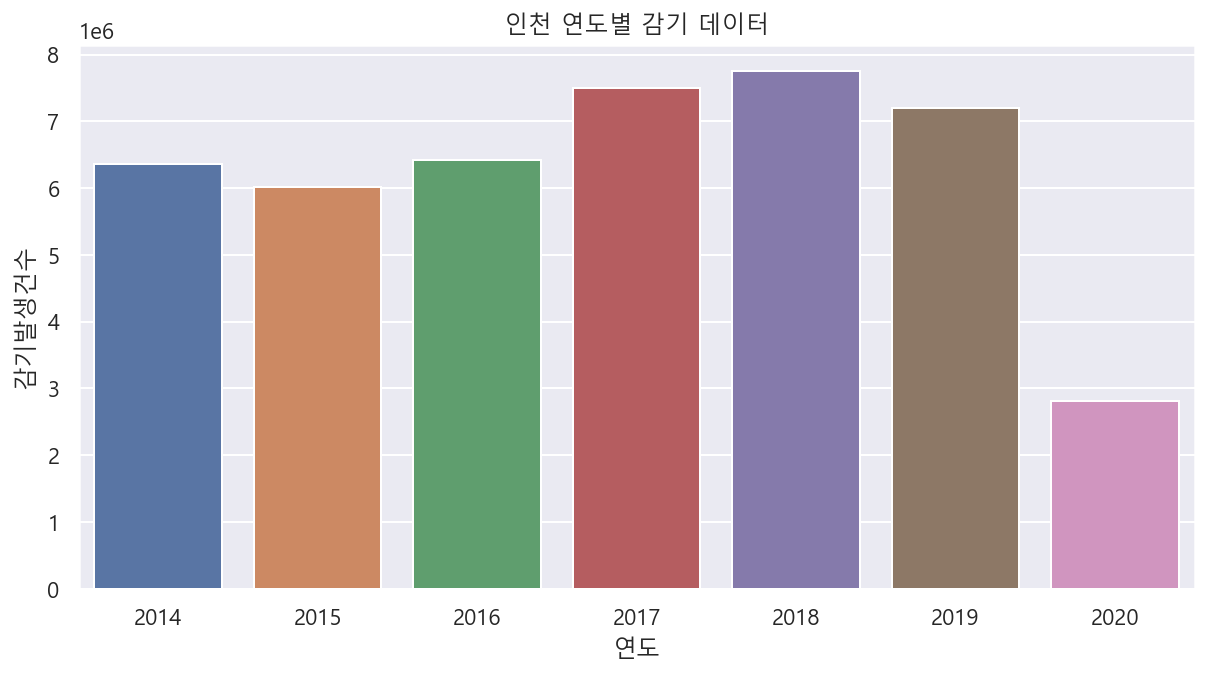

In [171]:
plt.figure(figsize=(10, 5))
plt.title("인천 연도별 감기 데이터")
sns.barplot(data=df_incheon, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'인천 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

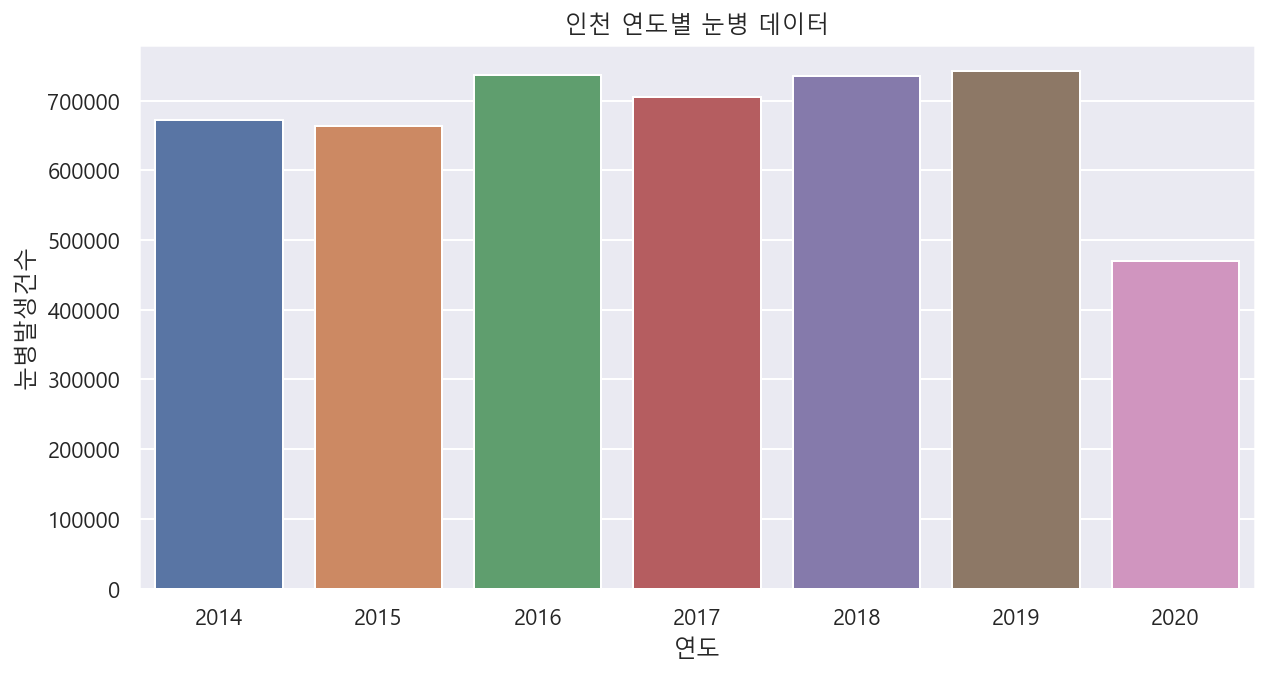

In [172]:
plt.figure(figsize=(10, 5))
plt.title("인천 연도별 눈병 데이터")
sns.barplot(data=df_incheon, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'인천 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

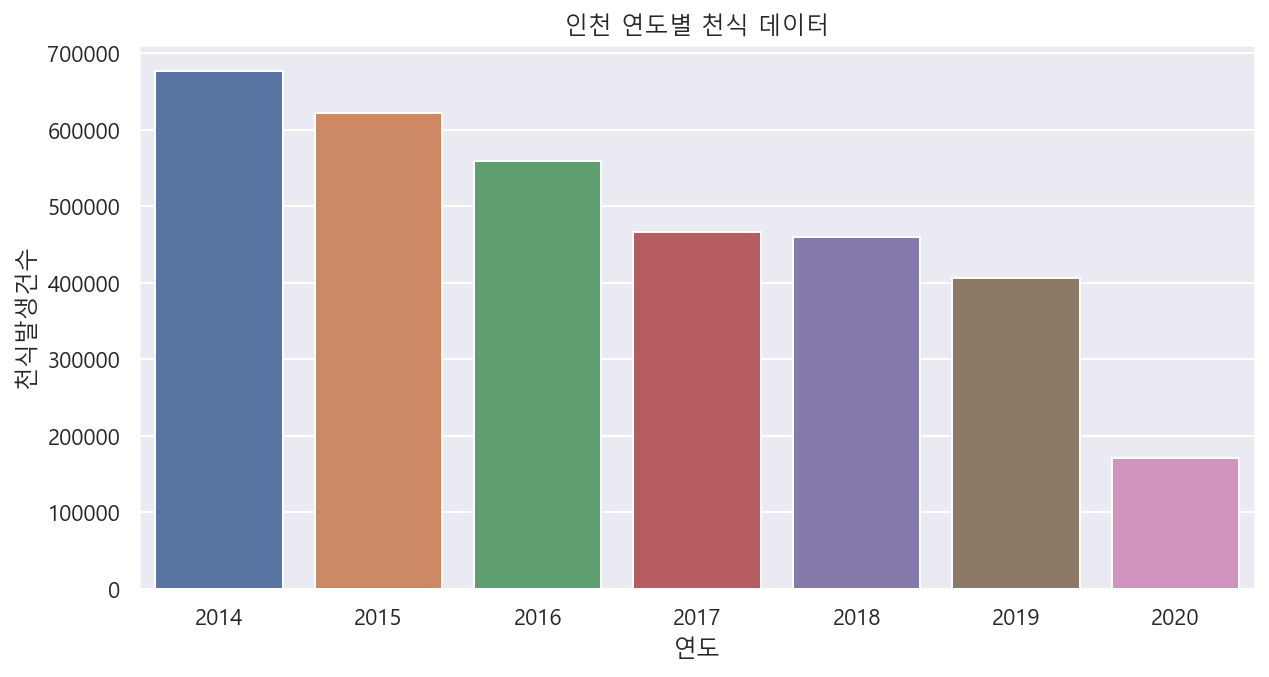

In [173]:
plt.figure(figsize=(10, 5))
plt.title("인천 연도별 천식 데이터")
sns.barplot(data=df_incheon, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'인천 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

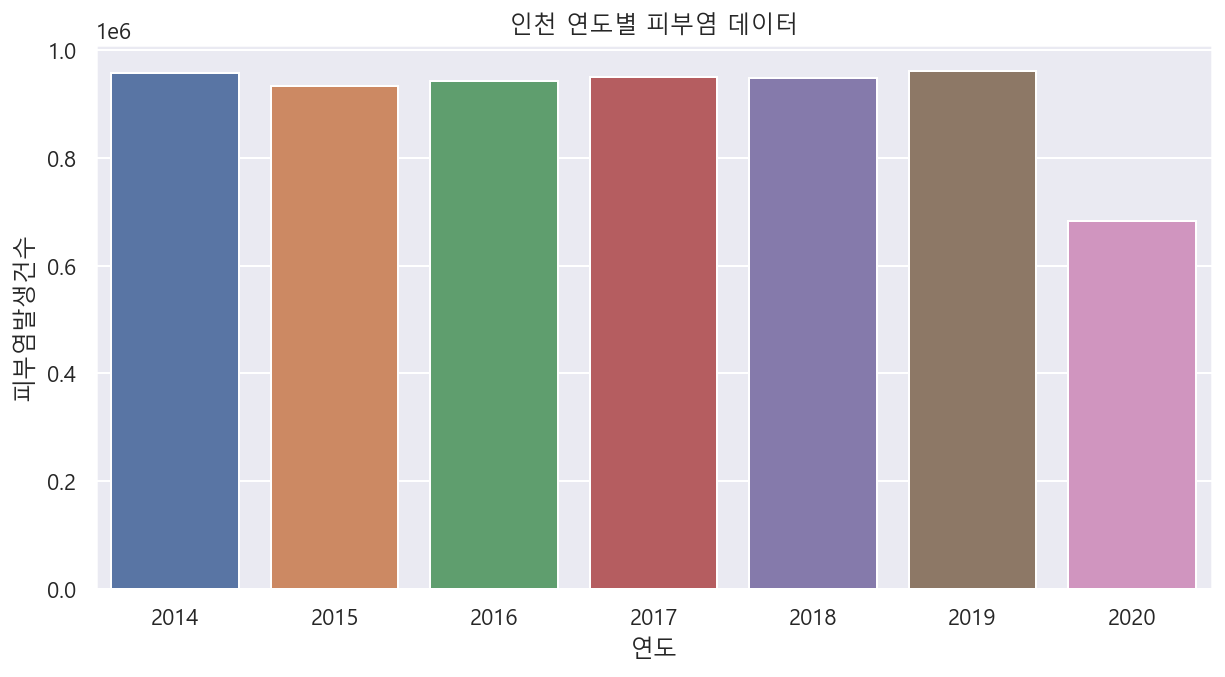

In [174]:
plt.figure(figsize=(10, 5))
plt.title("인천 연도별 피부염 데이터")
sns.barplot(data=df_incheon, x="연도", y="피부염발생건수")

### 광주 연도별 데이터

<AxesSubplot:title={'center':'광주 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

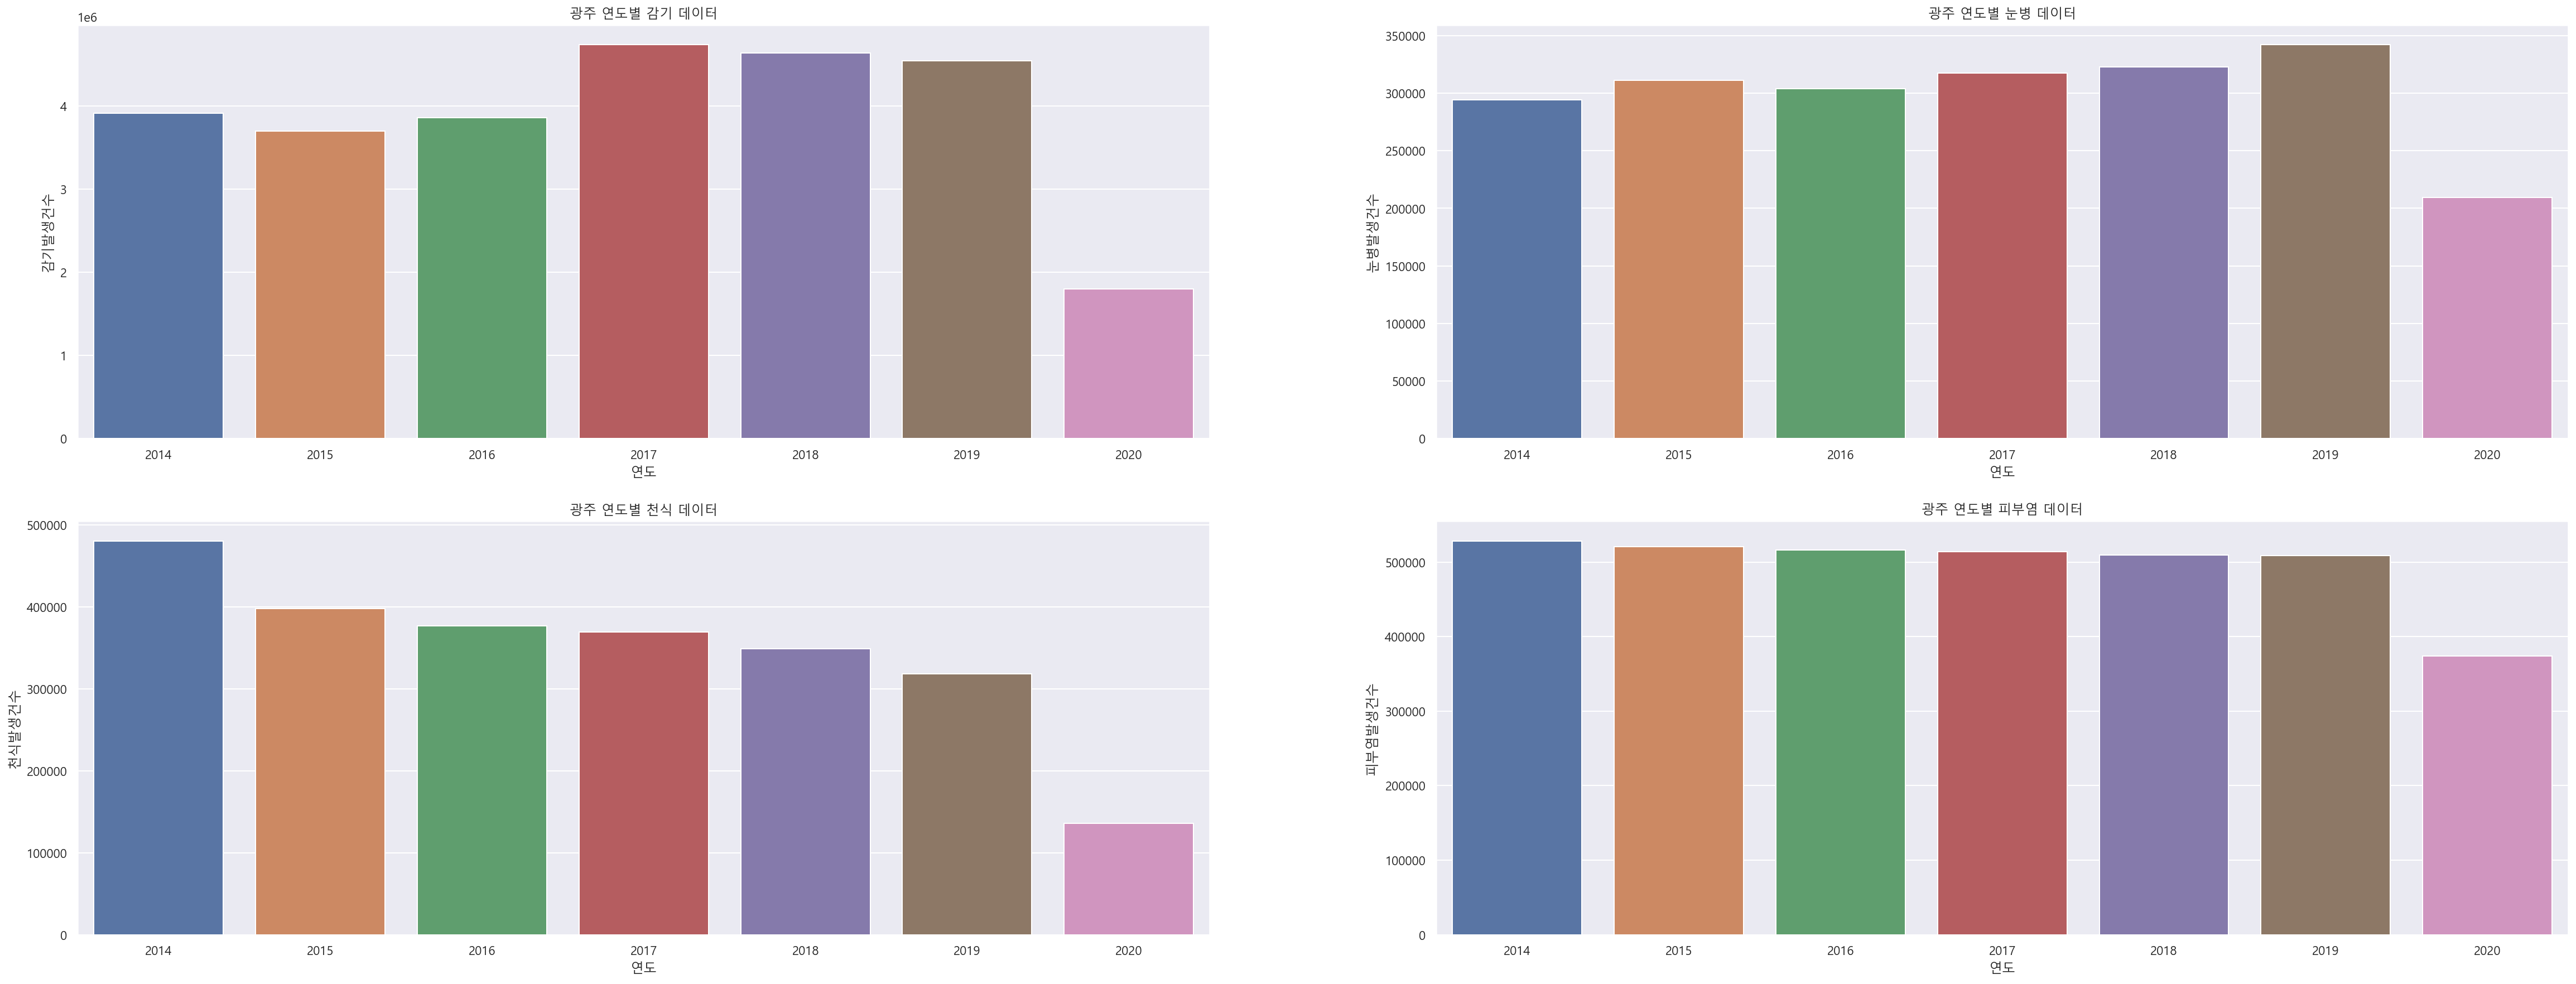

In [175]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("광주 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("광주 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("광주 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("광주 연도별 피부염 데이터")

sns.barplot(data=df_gwangju, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_gwangju, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_gwangju, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_gwangju, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'광주 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

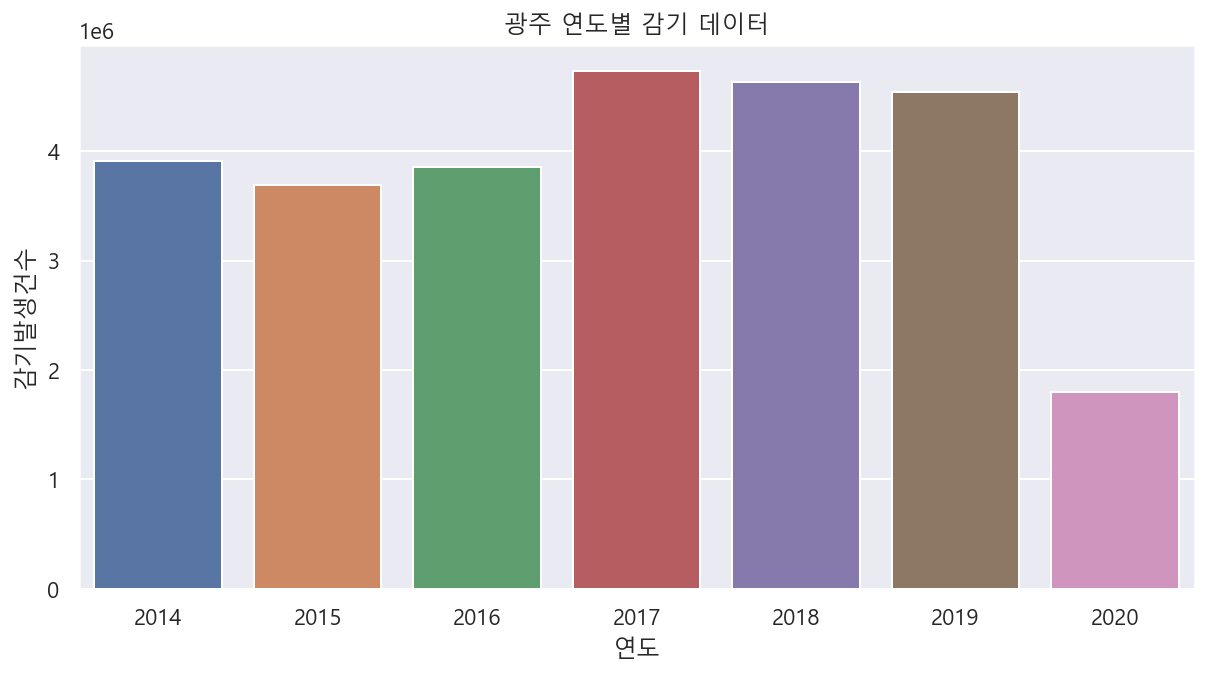

In [176]:
plt.figure(figsize=(10, 5))
plt.title("광주 연도별 감기 데이터")
sns.barplot(data=df_gwangju, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'광주 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

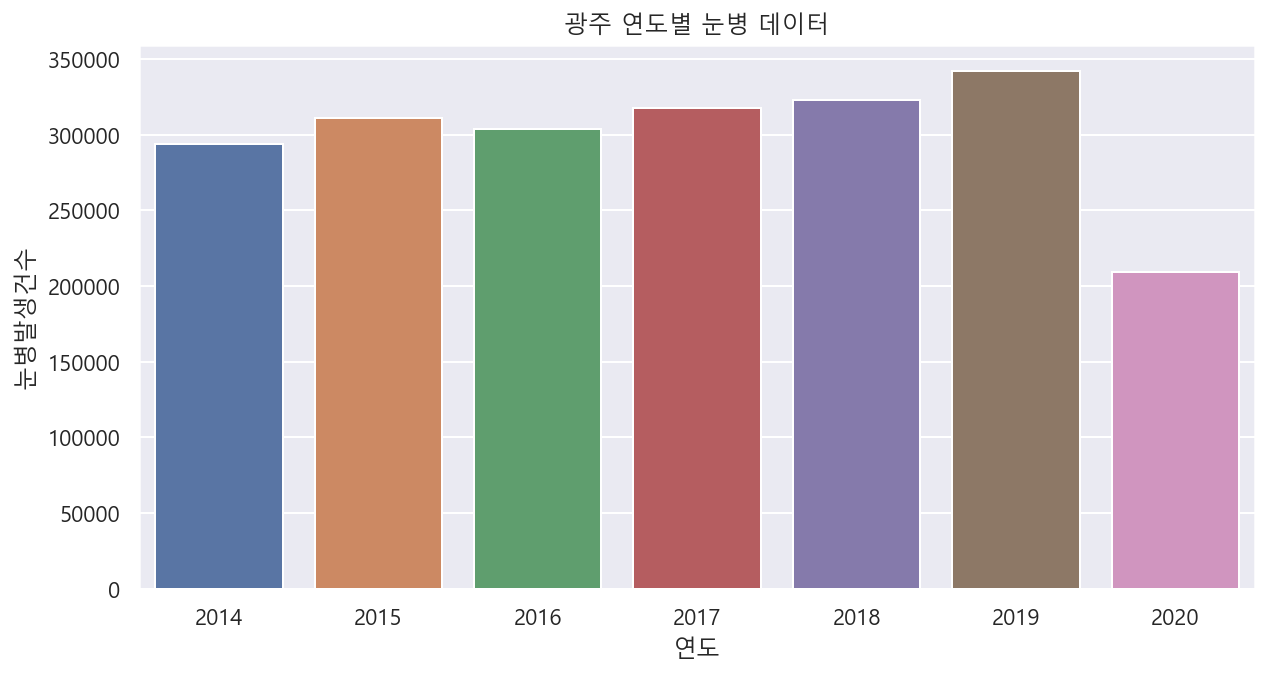

In [177]:
plt.figure(figsize=(10, 5))
plt.title("광주 연도별 눈병 데이터")
sns.barplot(data=df_gwangju, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'광주 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

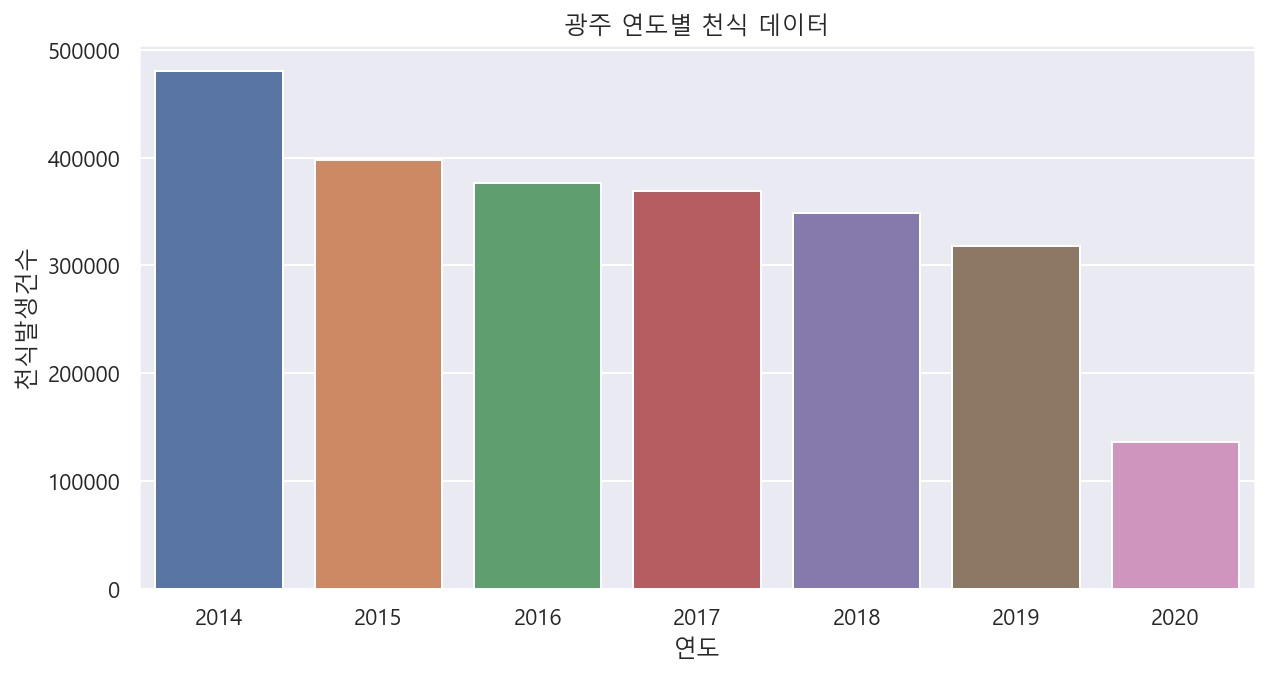

In [178]:
plt.figure(figsize=(10, 5))
plt.title("광주 연도별 천식 데이터")
sns.barplot(data=df_gwangju, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'광주 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

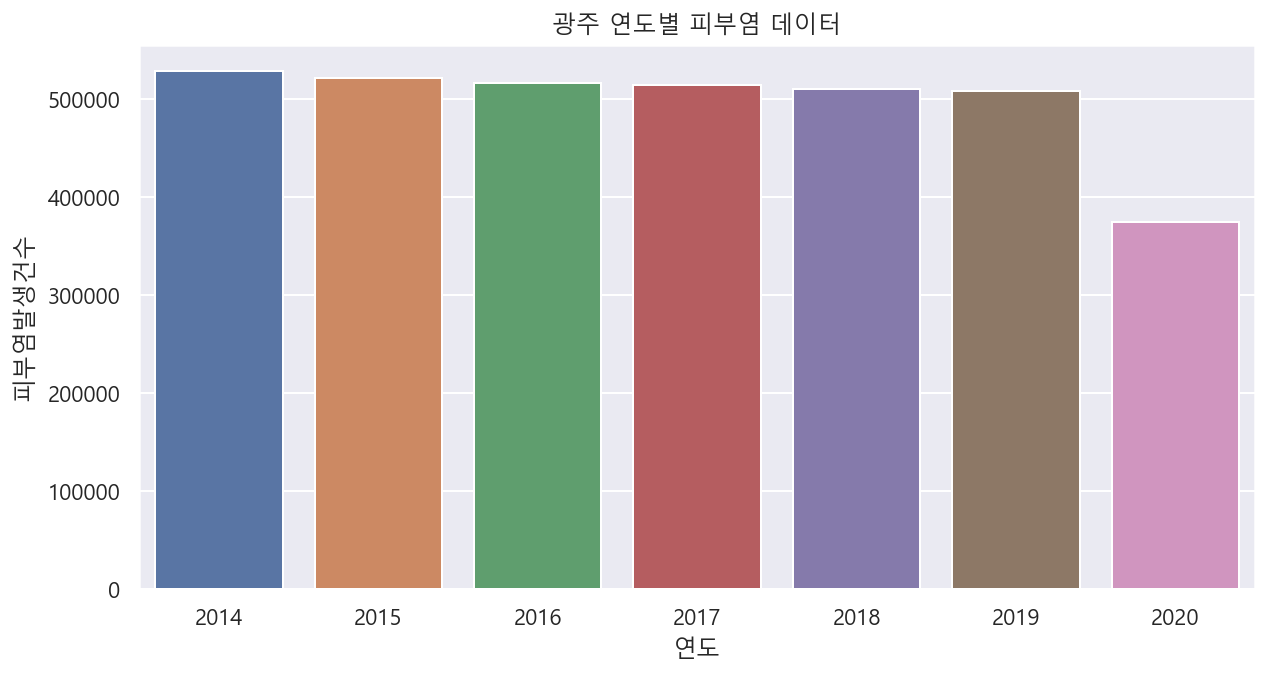

In [179]:
plt.figure(figsize=(10, 5))
plt.title("광주 연도별 피부염 데이터")
sns.barplot(data=df_gwangju, x="연도", y="피부염발생건수")

### 대전 연도별 데이터

<AxesSubplot:title={'center':'대전 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

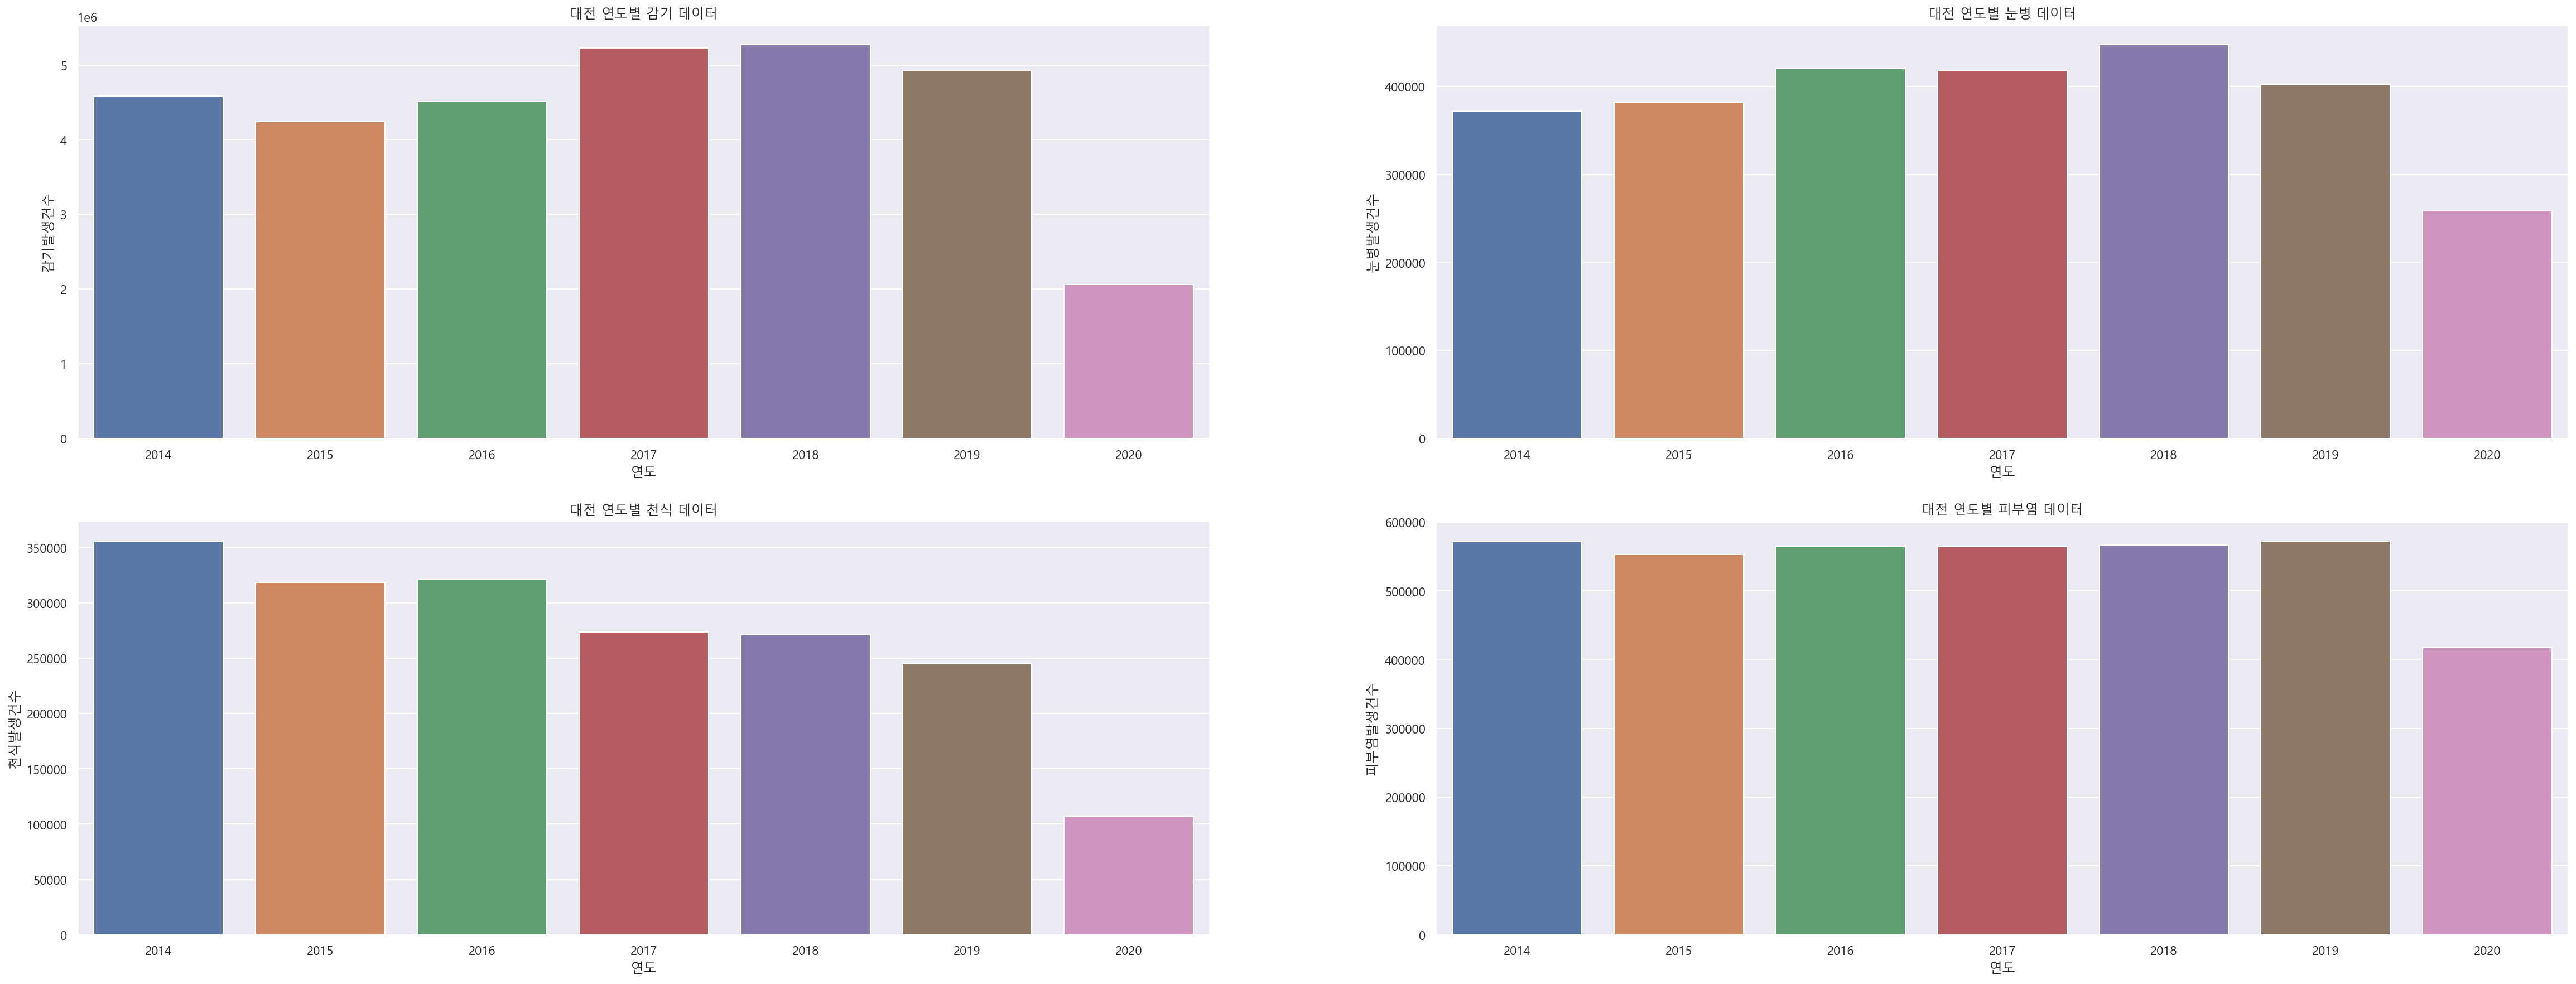

In [180]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("대전 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("대전 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("대전 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("대전 연도별 피부염 데이터")

sns.barplot(data=df_daejeon, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_daejeon, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_daejeon, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_daejeon, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'대전 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

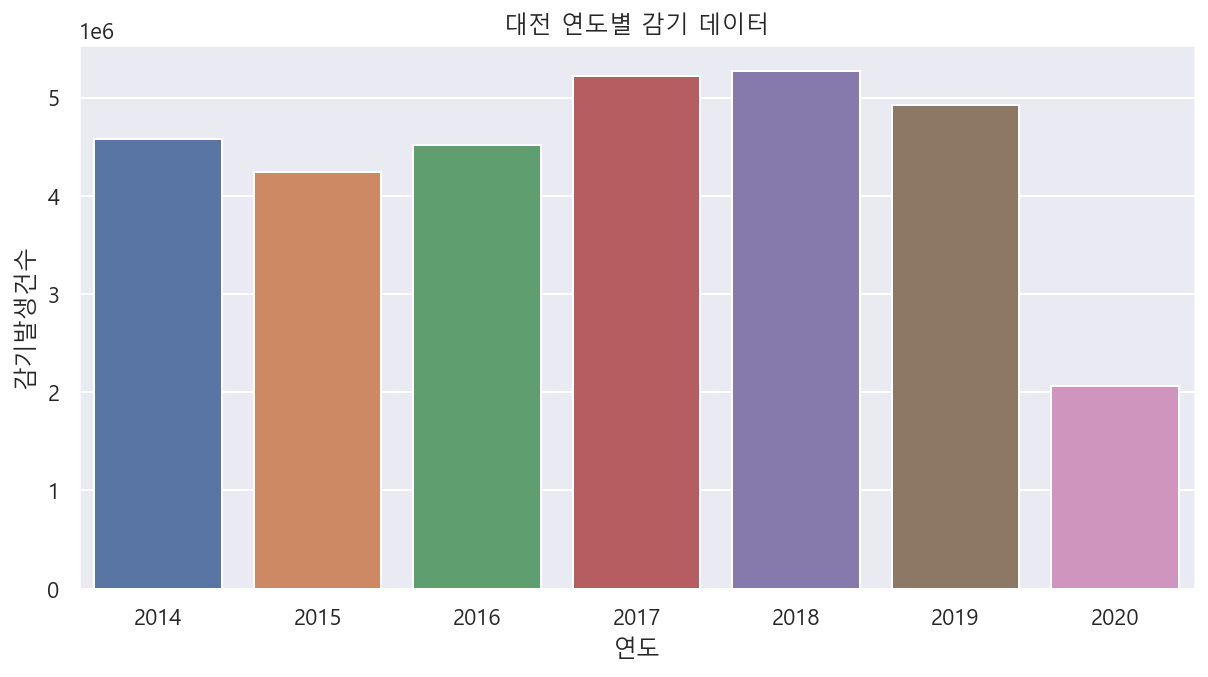

In [181]:
plt.figure(figsize=(10, 5))
plt.title("대전 연도별 감기 데이터")
sns.barplot(data=df_daejeon, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'대전 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

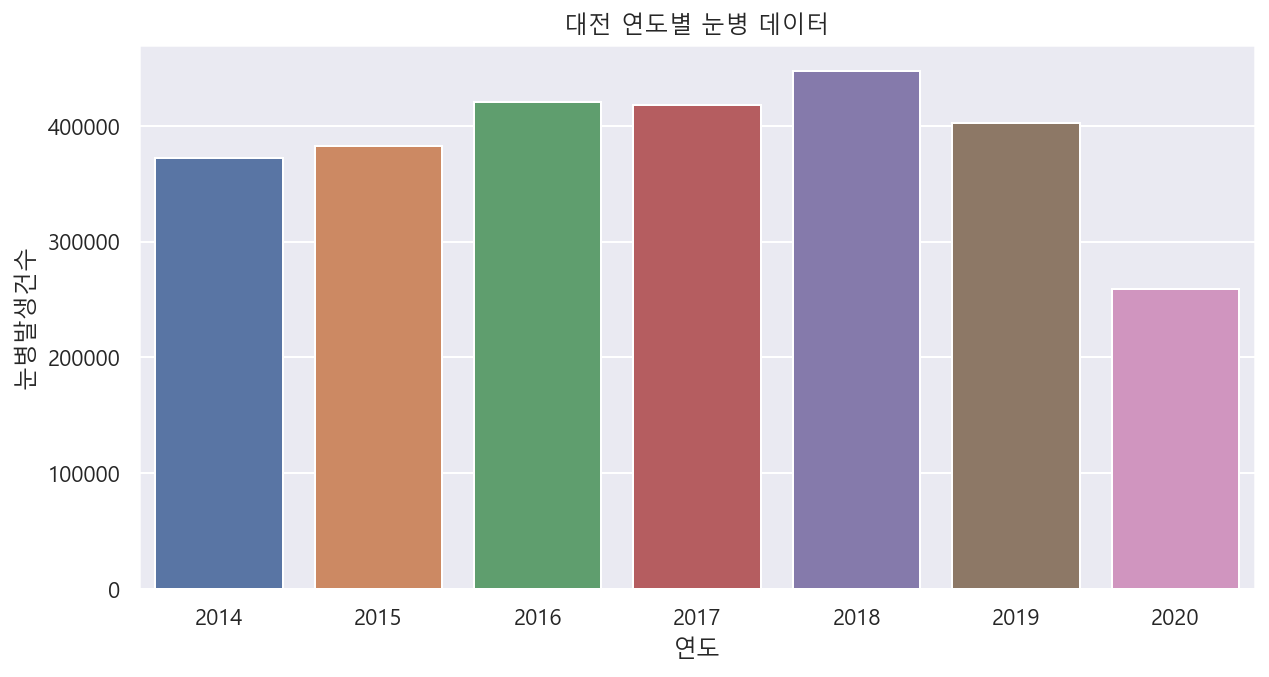

In [182]:
plt.figure(figsize=(10, 5))
plt.title("대전 연도별 눈병 데이터")
sns.barplot(data=df_daejeon, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'대전 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

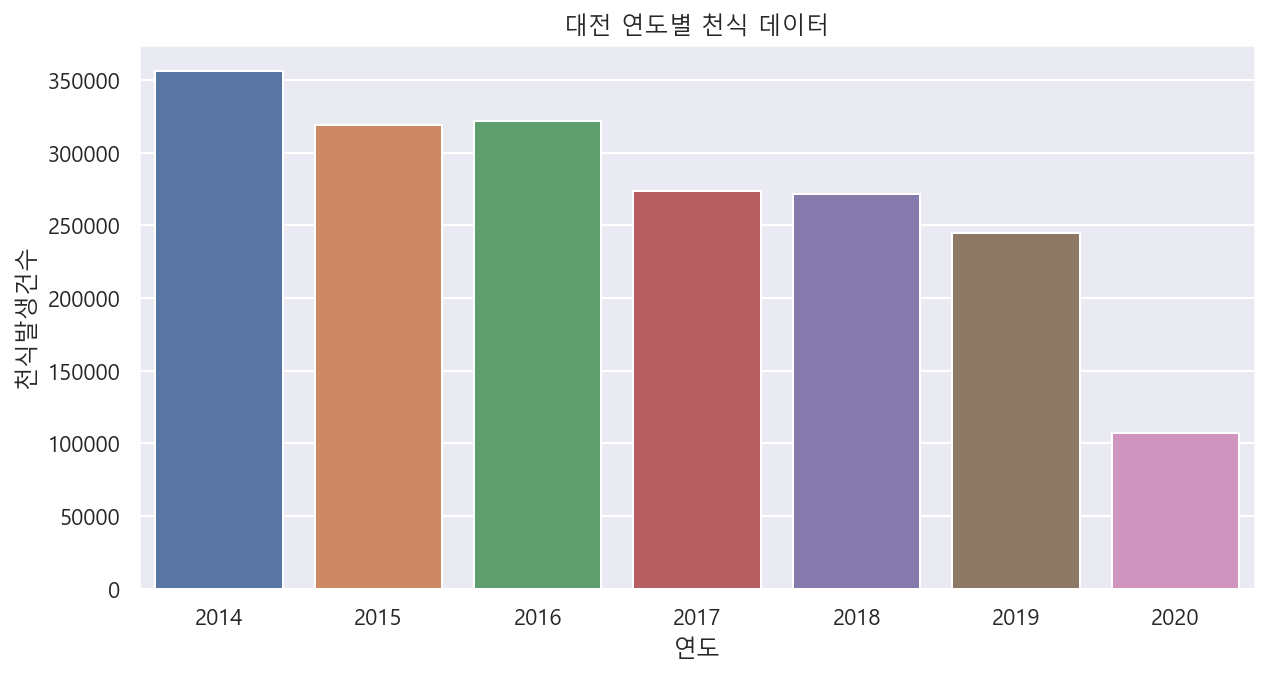

In [183]:
plt.figure(figsize=(10, 5))
plt.title("대전 연도별 천식 데이터")
sns.barplot(data=df_daejeon, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'대전 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

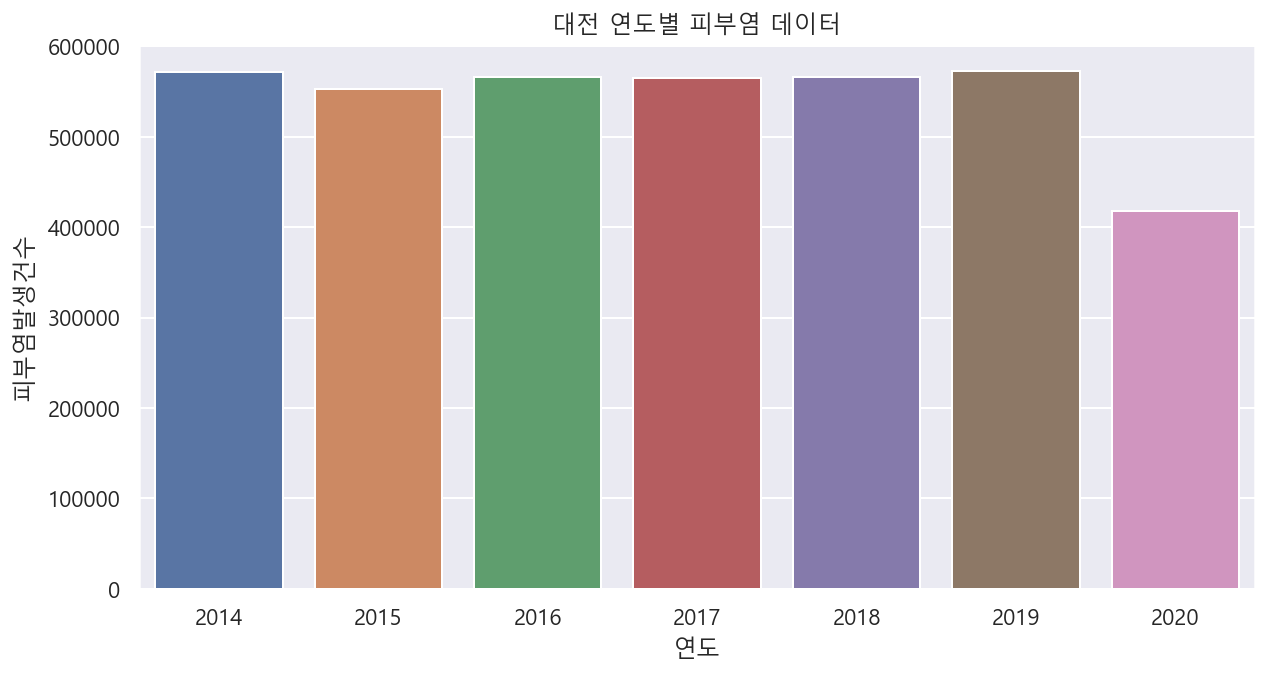

In [184]:
plt.figure(figsize=(10, 5))
plt.title("대전 연도별 피부염 데이터")
sns.barplot(data=df_daejeon, x="연도", y="피부염발생건수")

### 울산 연도별 데이터

<AxesSubplot:title={'center':'울산 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

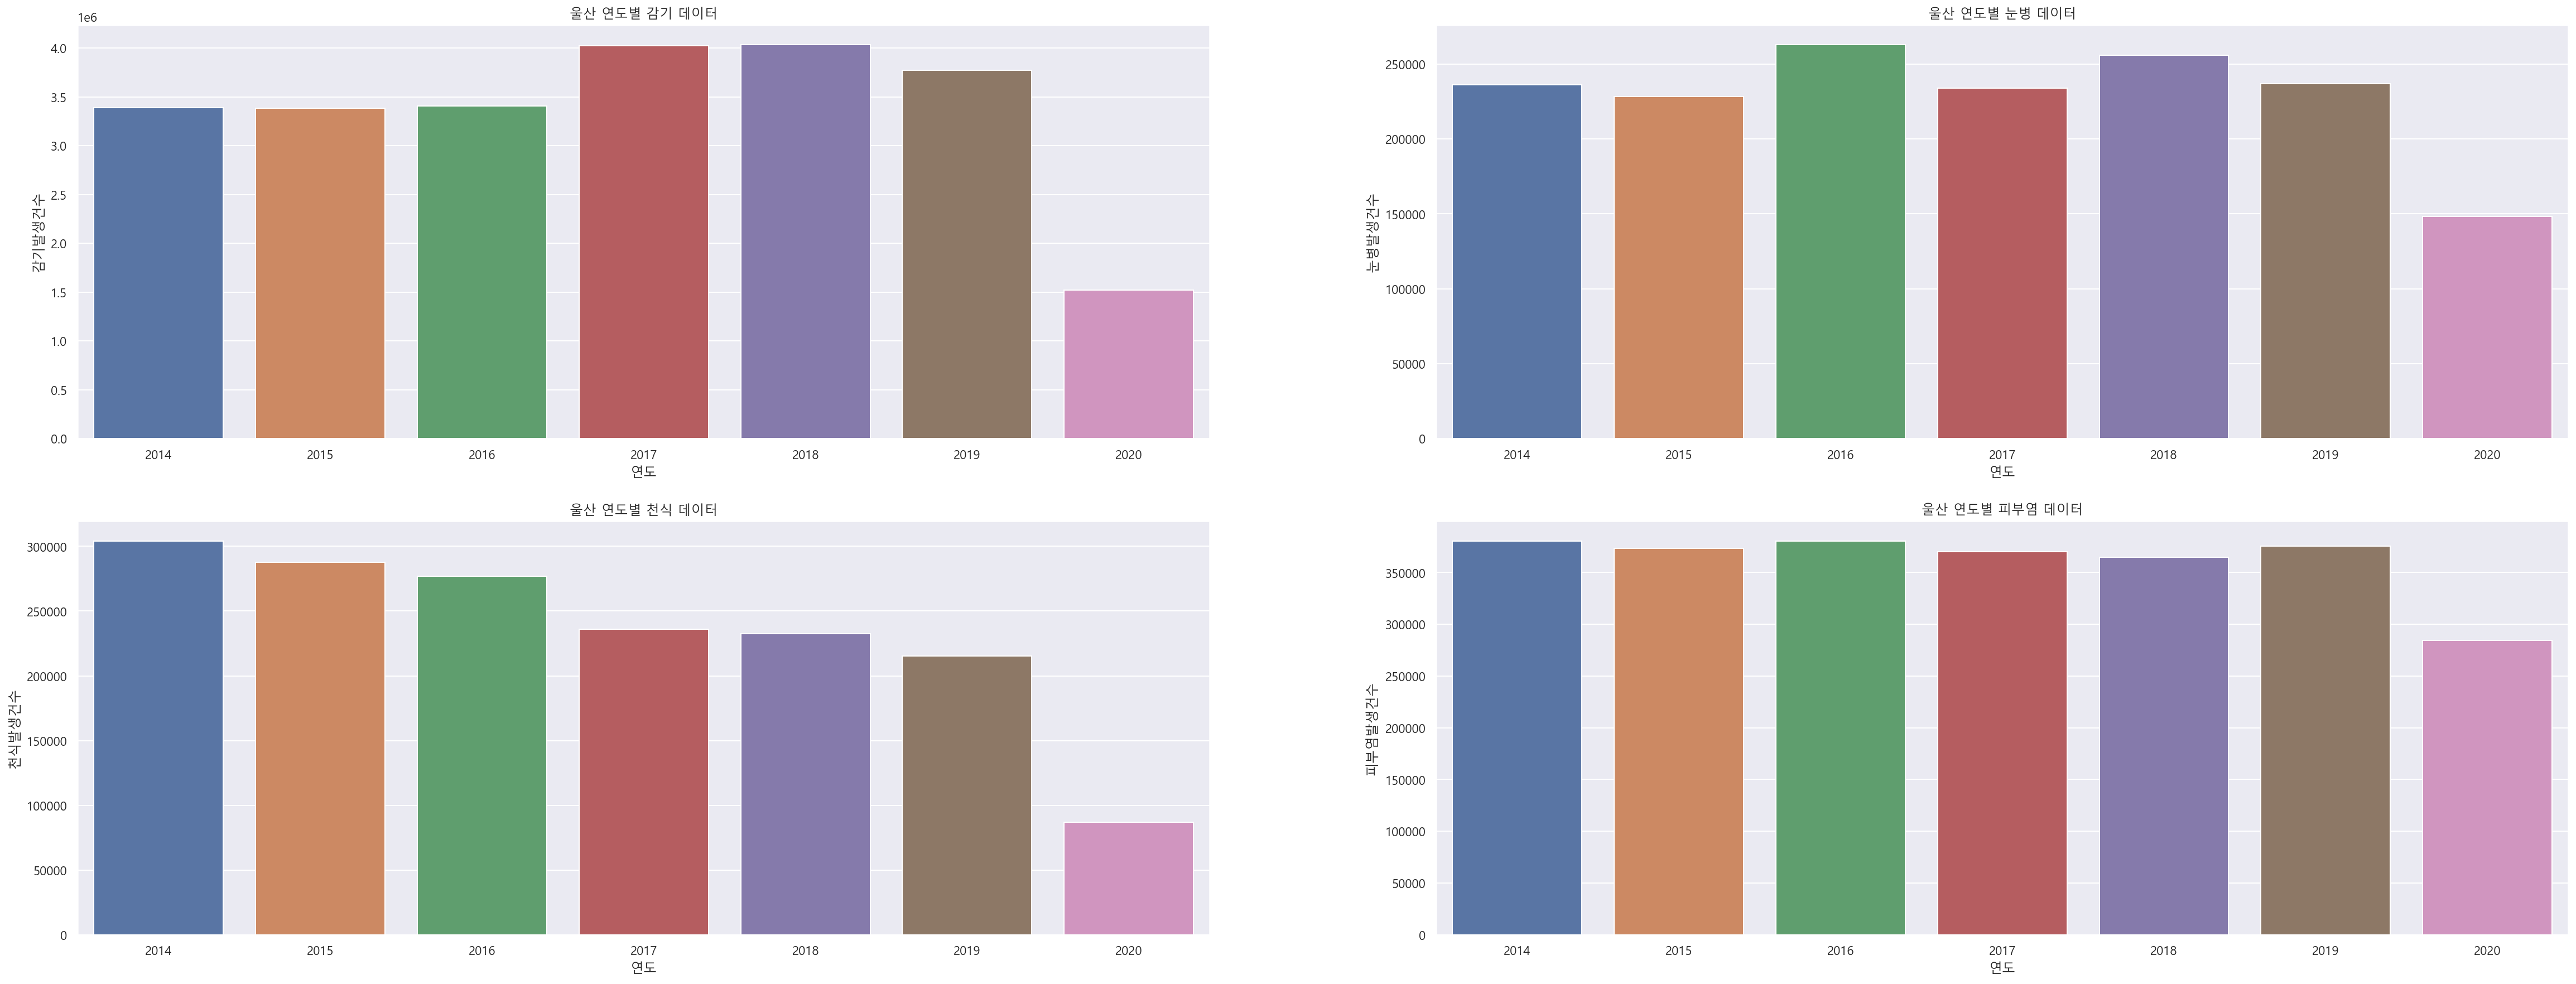

In [185]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("울산 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("울산 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("울산 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("울산 연도별 피부염 데이터")

sns.barplot(data=df_ulsan, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_ulsan, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_ulsan, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_ulsan, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'울산 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

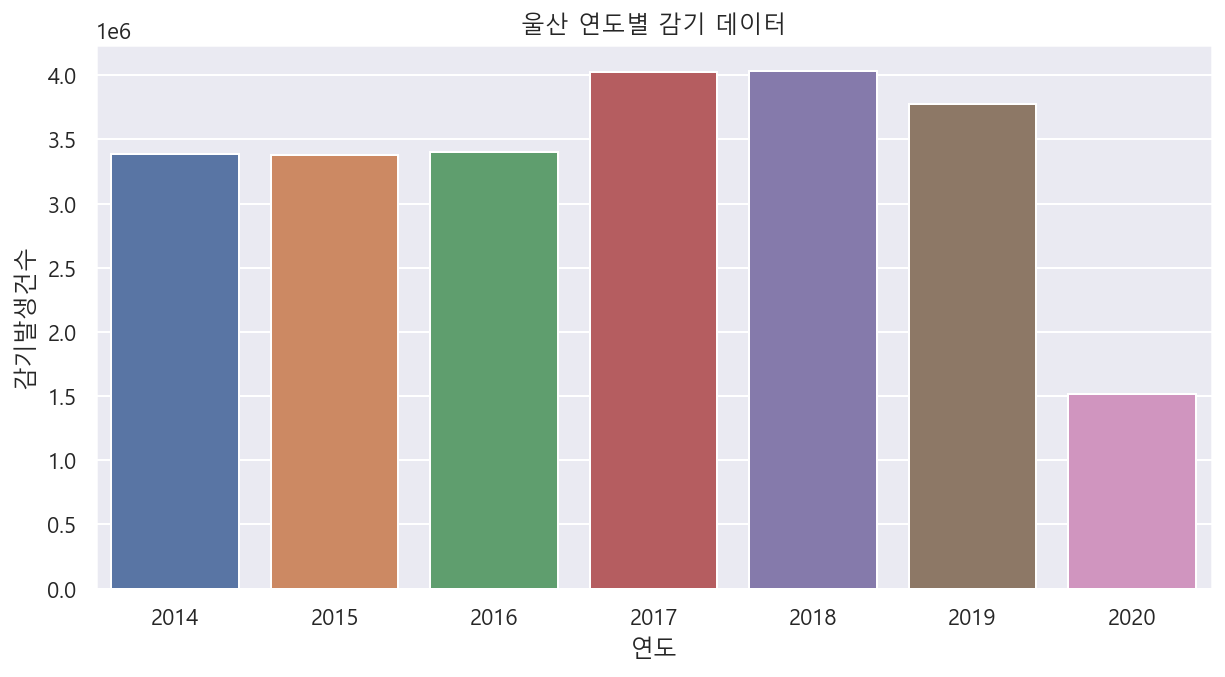

In [186]:
plt.figure(figsize=(10, 5))
plt.title("울산 연도별 감기 데이터")
sns.barplot(data=df_ulsan, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'울산 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

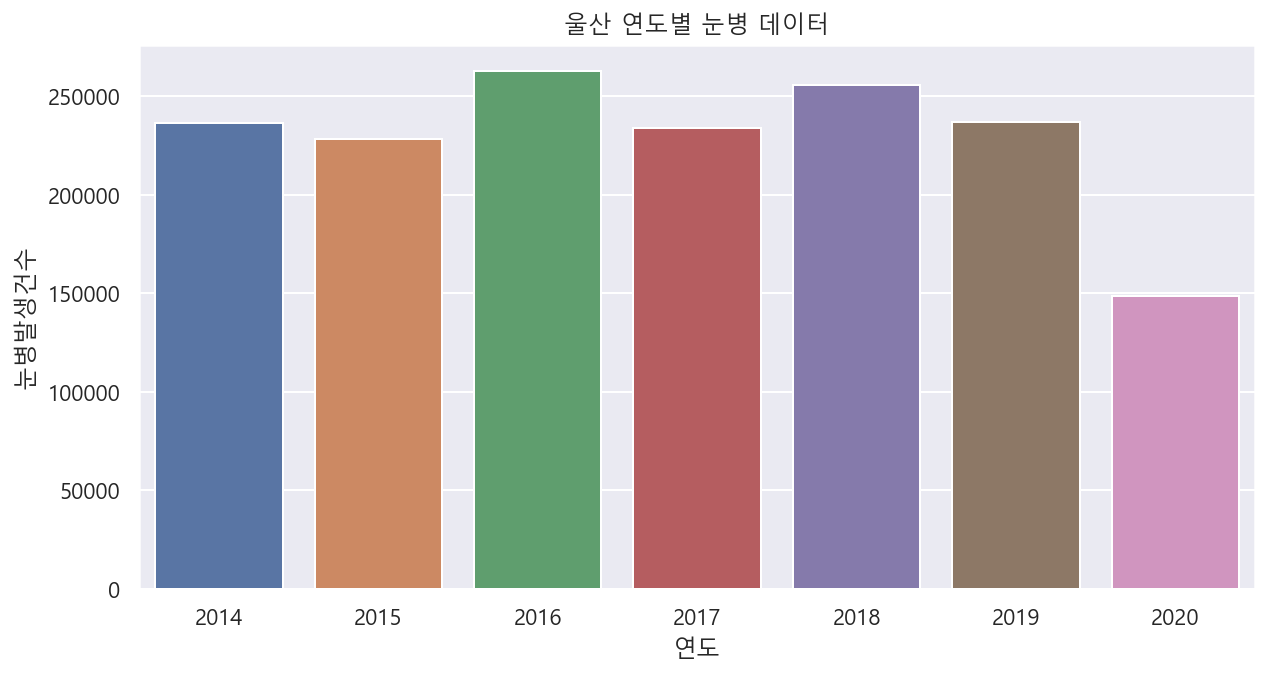

In [187]:
plt.figure(figsize=(10, 5))
plt.title("울산 연도별 눈병 데이터")
sns.barplot(data=df_ulsan, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'울산 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

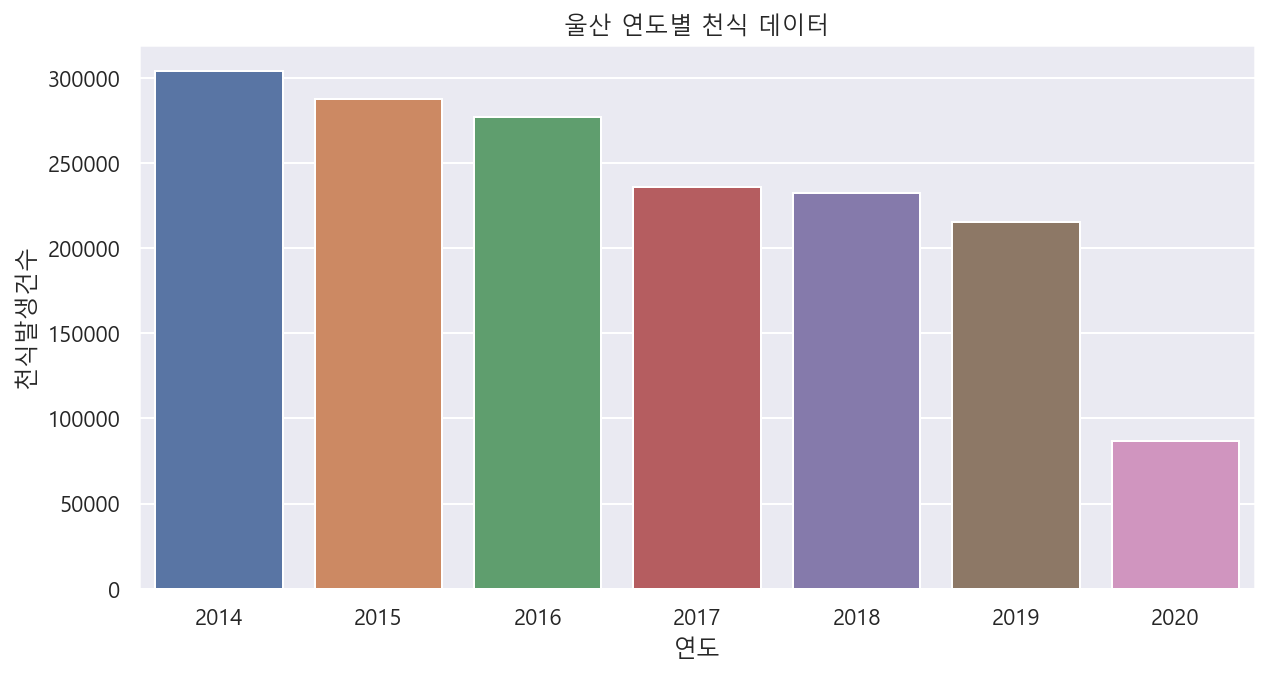

In [188]:
plt.figure(figsize=(10, 5))
plt.title("울산 연도별 천식 데이터")
sns.barplot(data=df_ulsan, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'울산 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

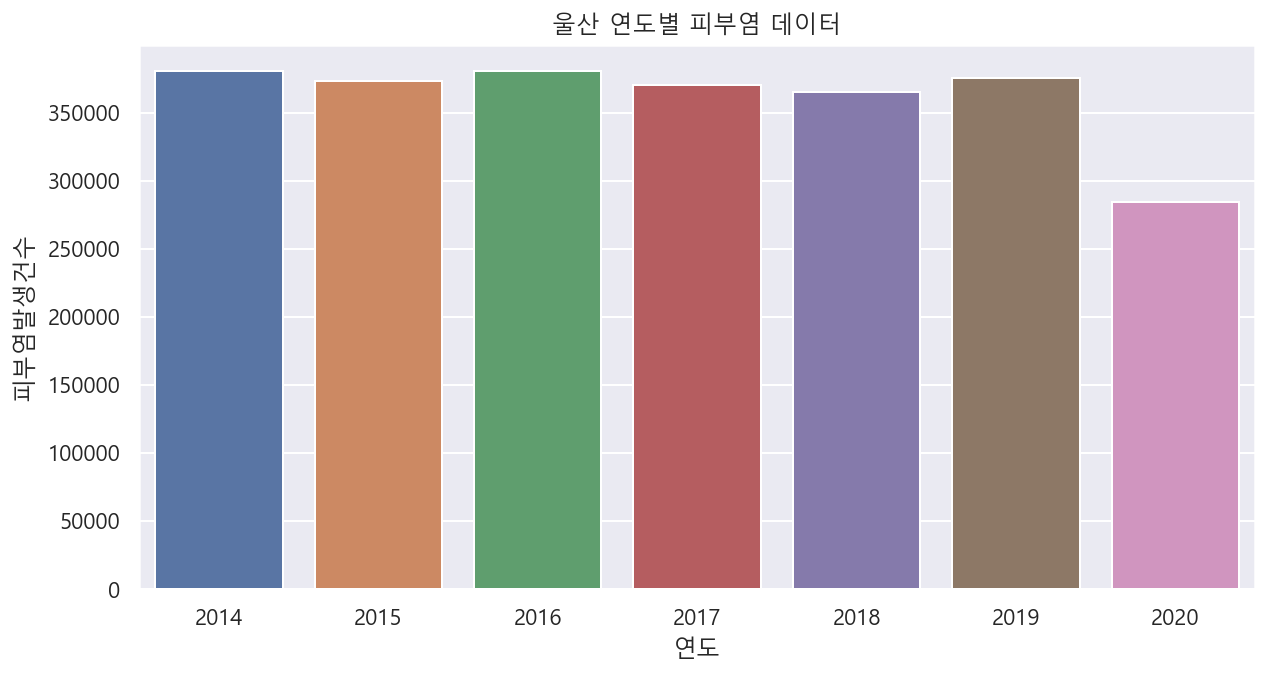

In [189]:
plt.figure(figsize=(10, 5))
plt.title("울산 연도별 피부염 데이터")
sns.barplot(data=df_ulsan, x="연도", y="피부염발생건수")

### 강원도 연도별 데이터

<AxesSubplot:title={'center':'강원도 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

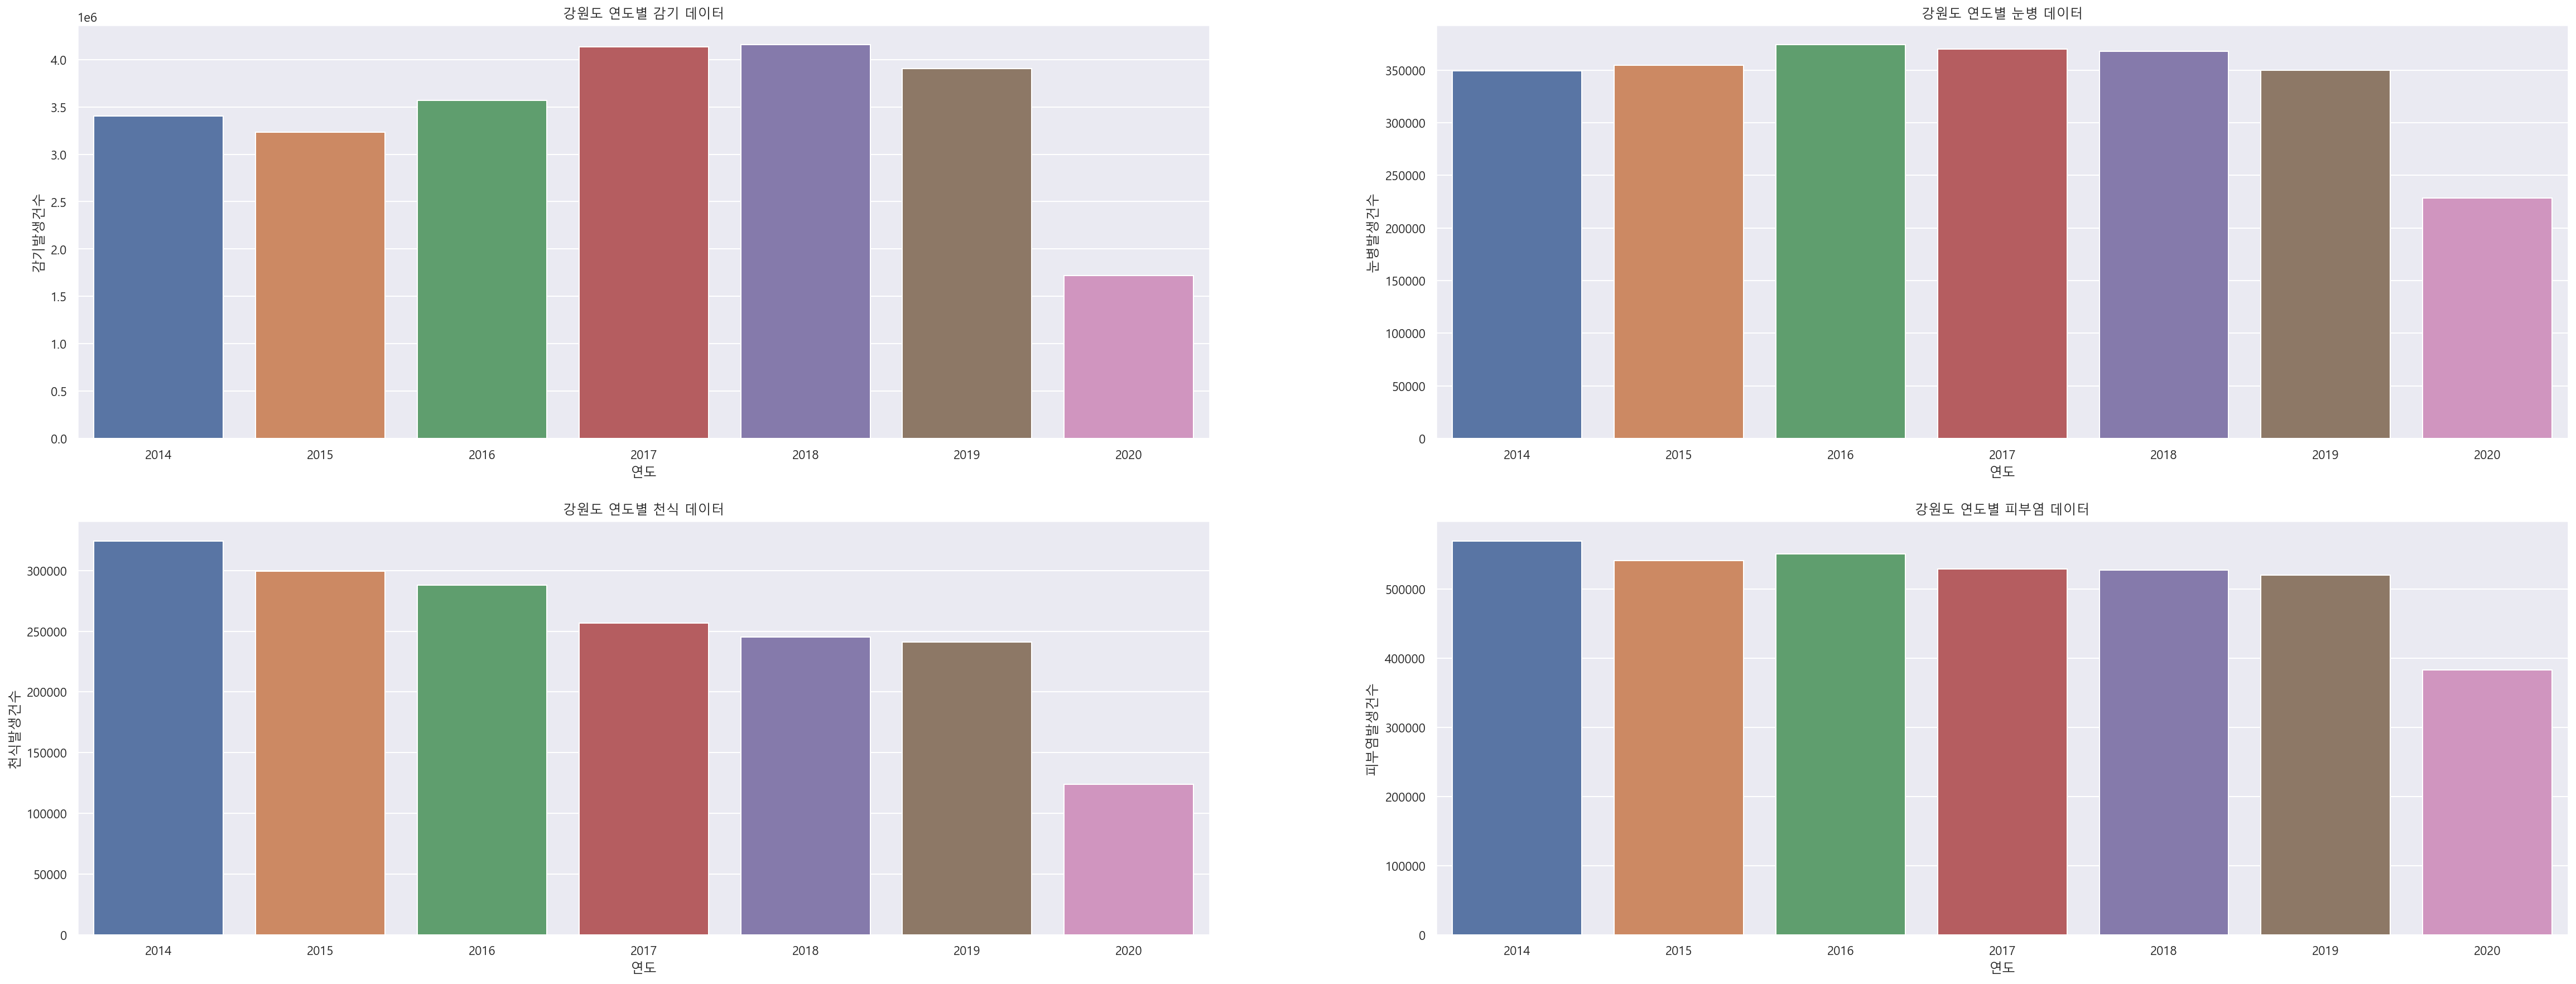

In [190]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("강원도 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("강원도 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("강원도 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("강원도 연도별 피부염 데이터")

sns.barplot(data=df_gangwon, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_gangwon, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_gangwon, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_gangwon, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'강원도 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

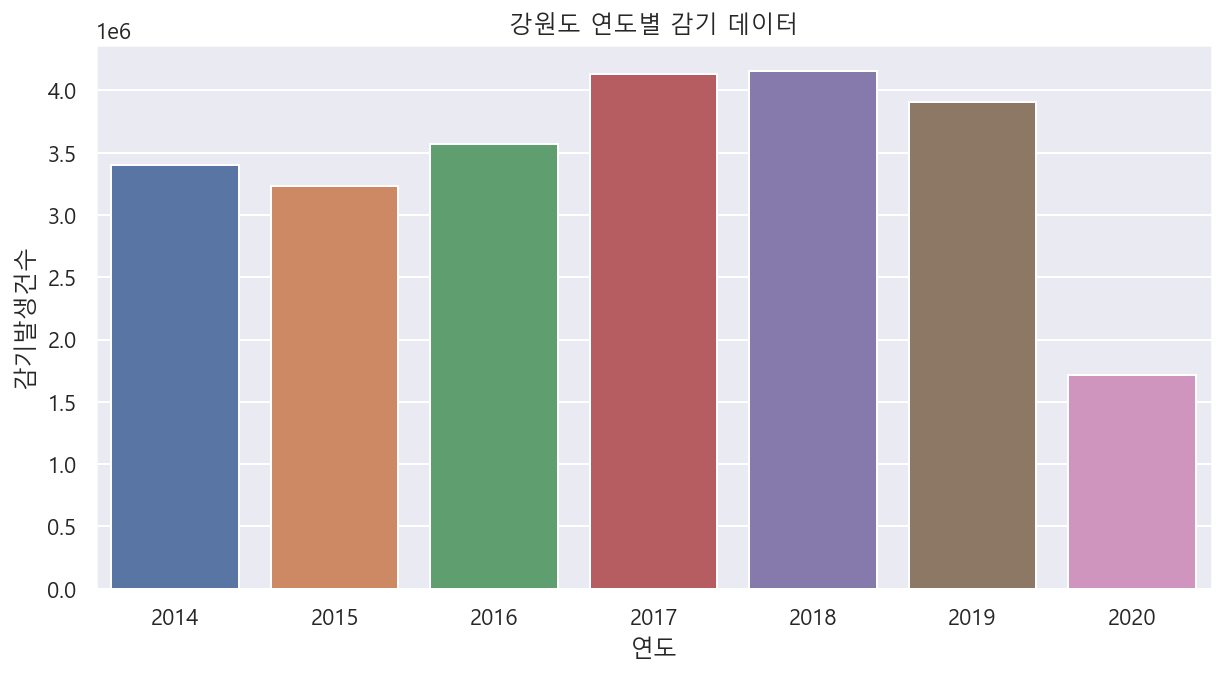

In [191]:
plt.figure(figsize=(10, 5))
plt.title("강원도 연도별 감기 데이터")
sns.barplot(data=df_gangwon, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'강원도 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

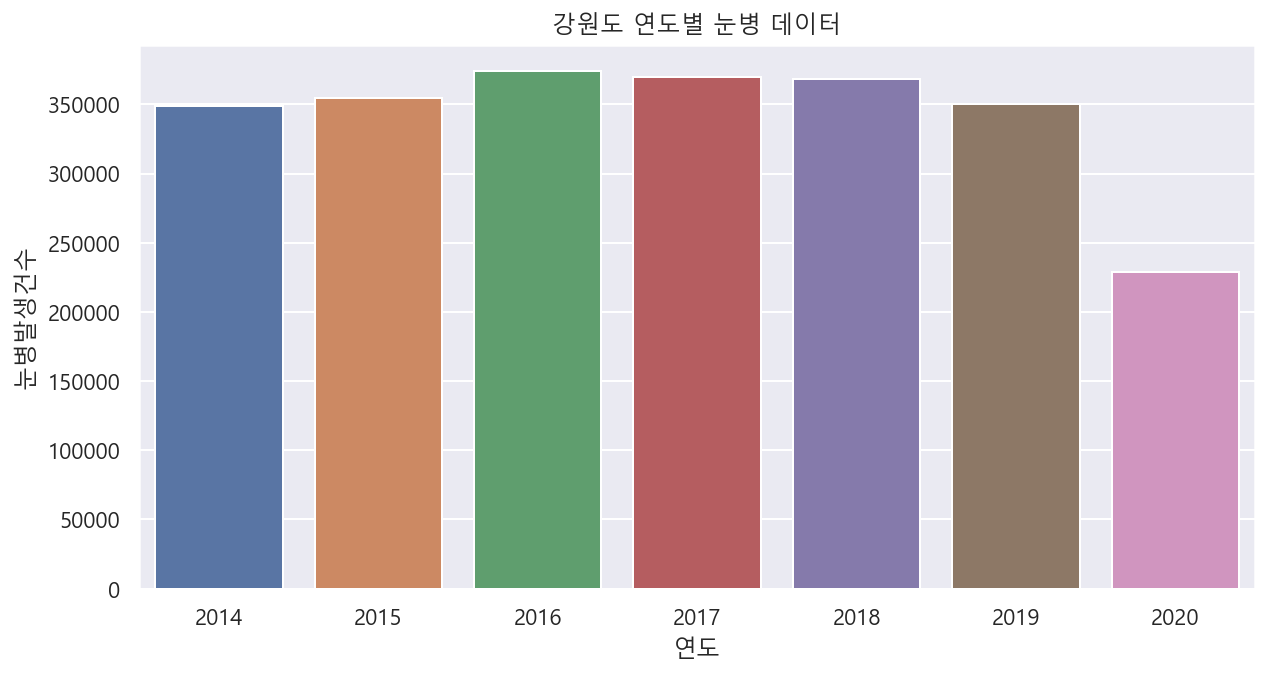

In [192]:
plt.figure(figsize=(10, 5))
plt.title("강원도 연도별 눈병 데이터")
sns.barplot(data=df_gangwon, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'강원도 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

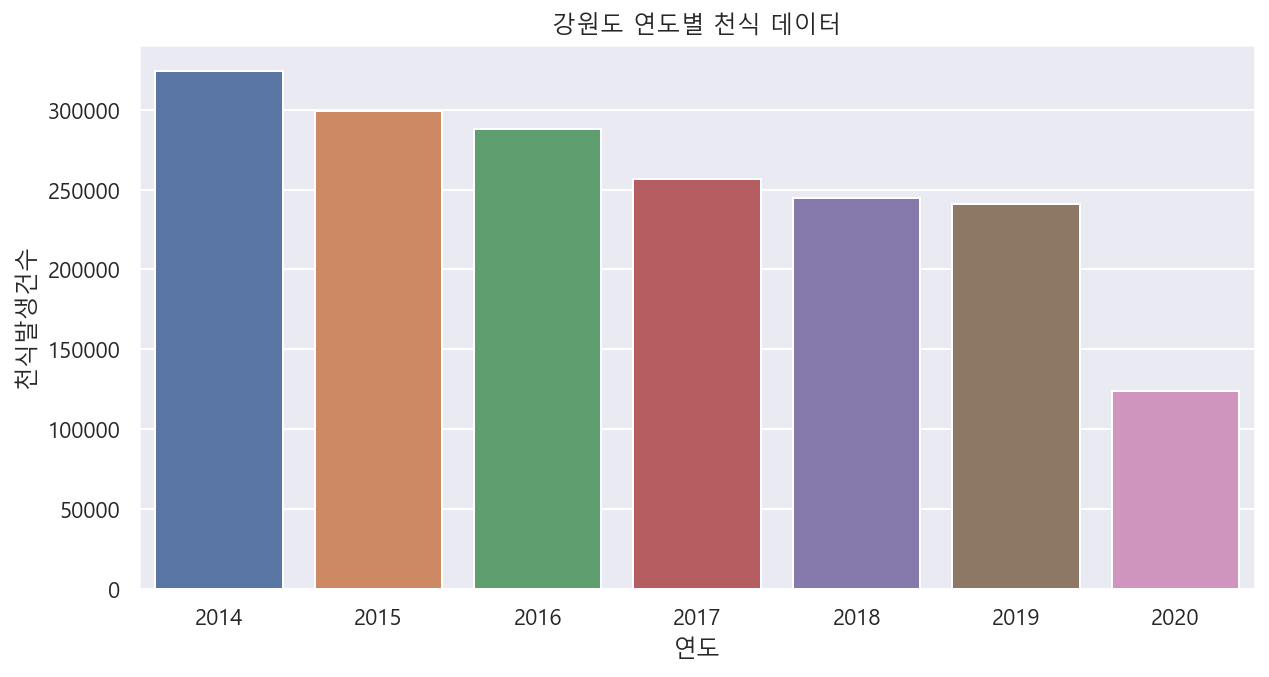

In [193]:
plt.figure(figsize=(10, 5))
plt.title("강원도 연도별 천식 데이터")
sns.barplot(data=df_gangwon, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'강원도 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

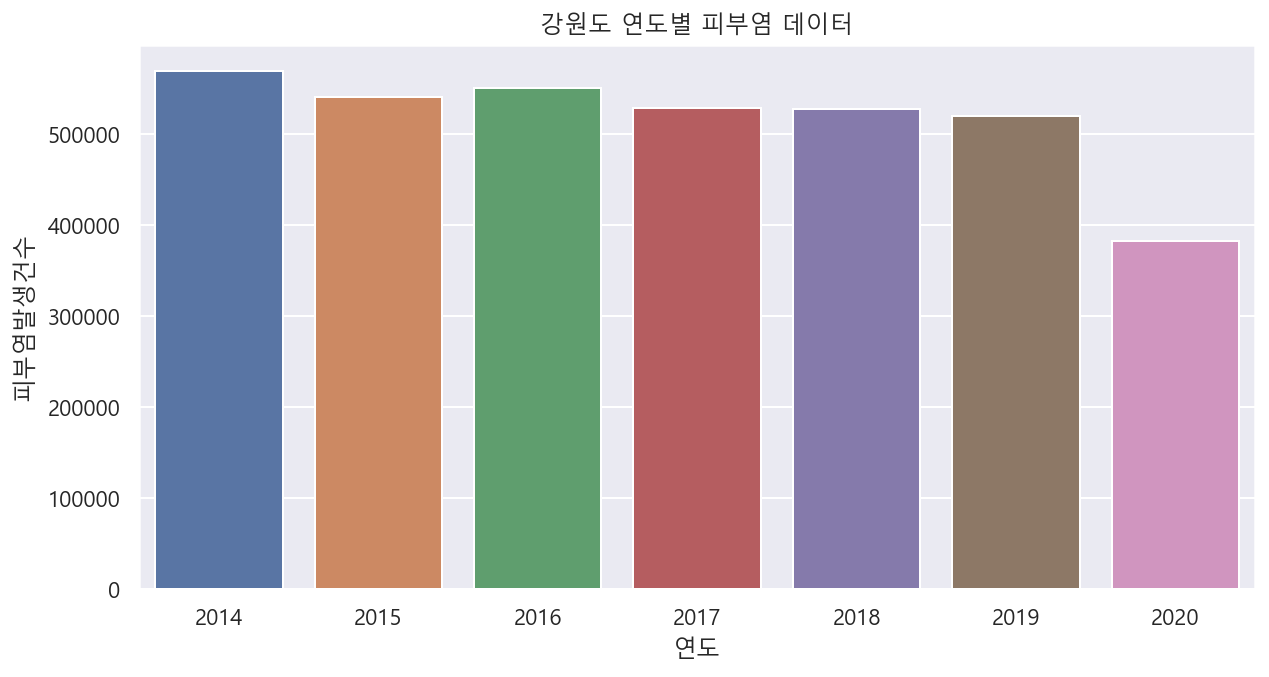

In [194]:
plt.figure(figsize=(10, 5))
plt.title("강원도 연도별 피부염 데이터")
sns.barplot(data=df_gangwon, x="연도", y="피부염발생건수")

### 충북 연도별 데이터

<AxesSubplot:title={'center':'충북 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

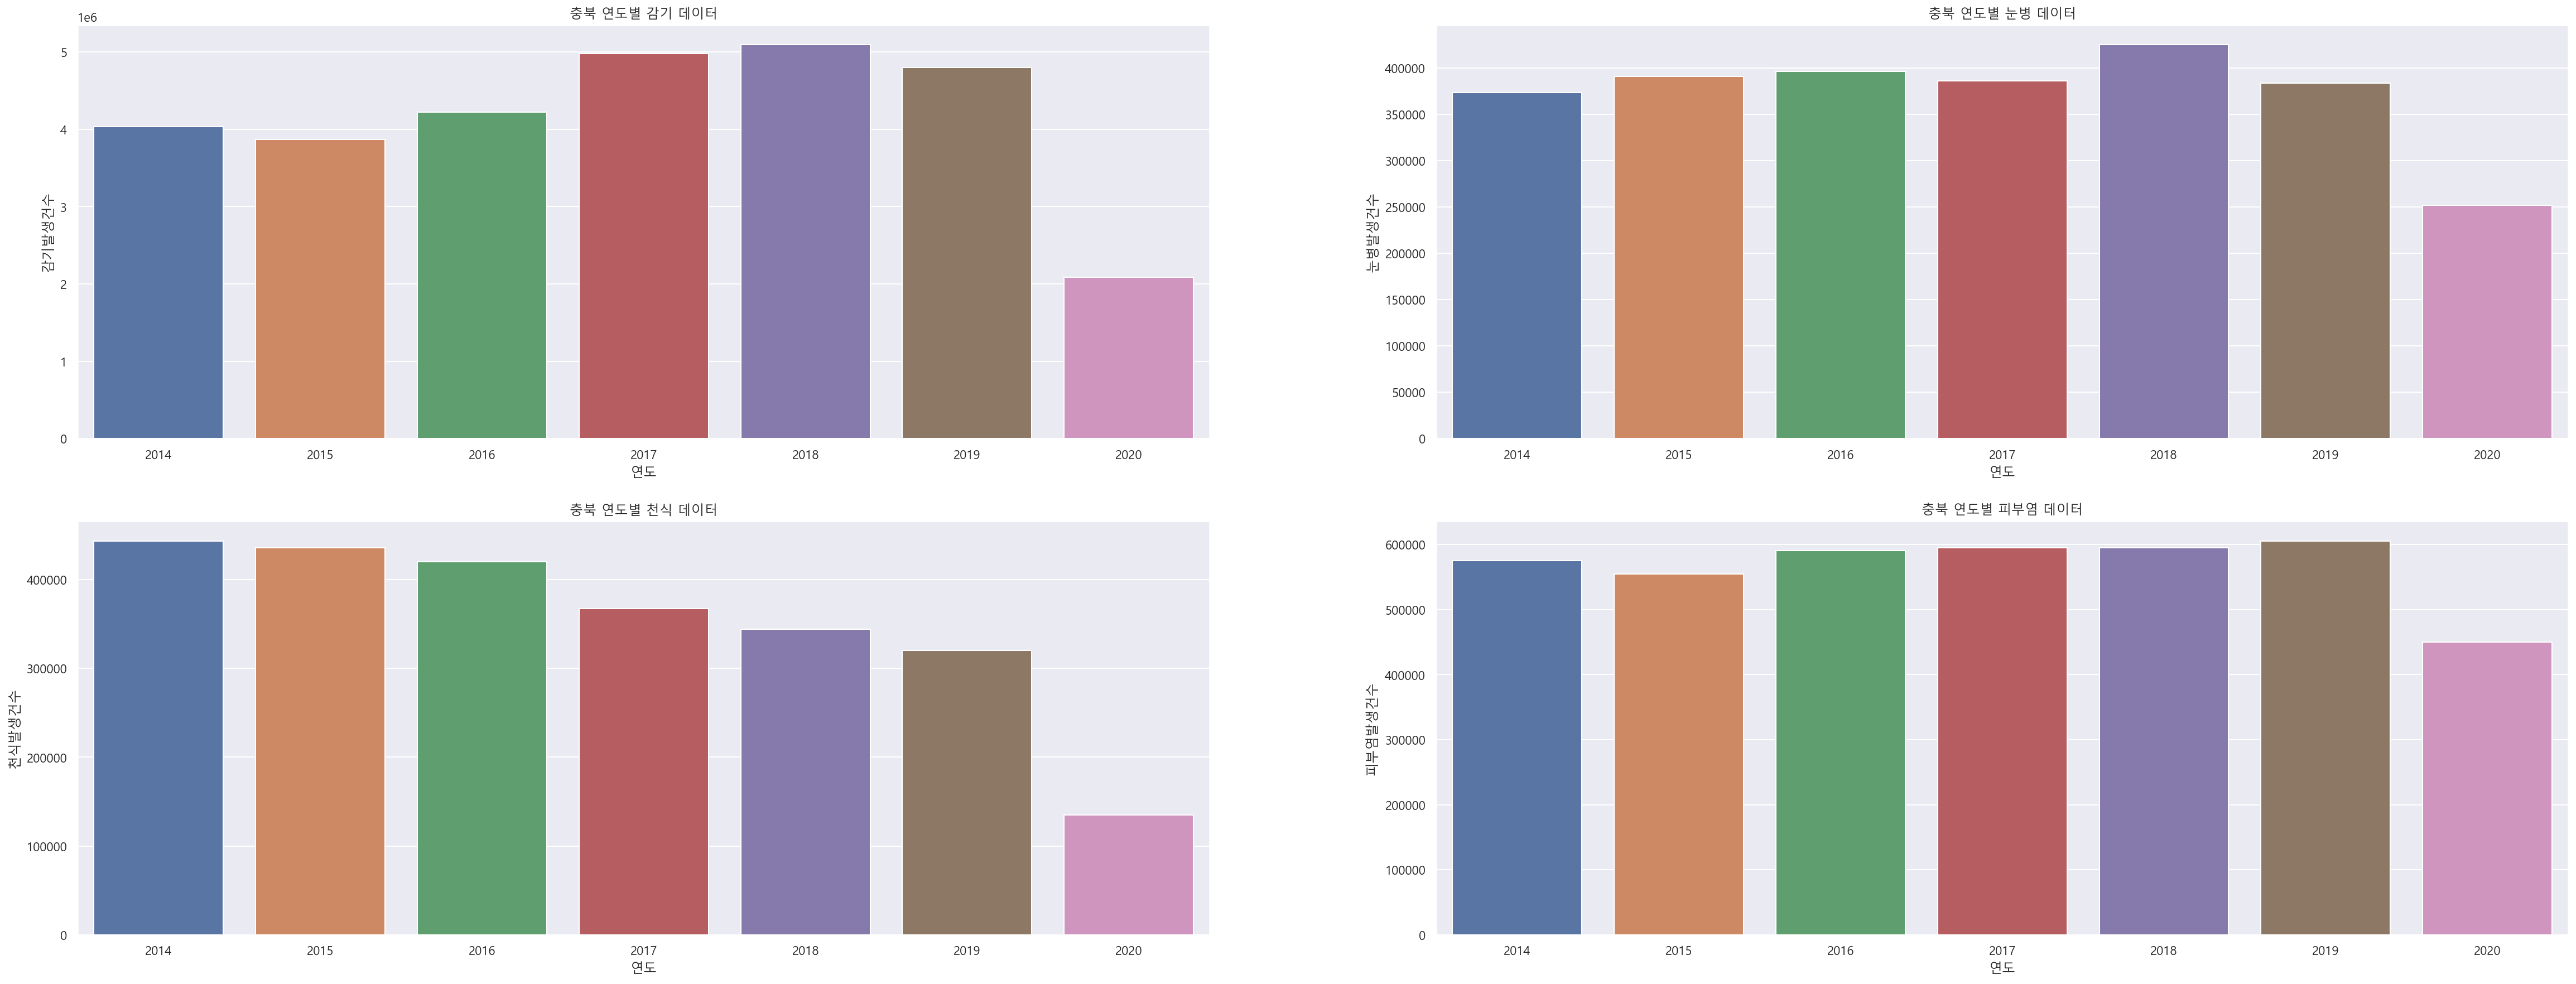

In [195]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("충북 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("충북 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("충북 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("충북 연도별 피부염 데이터")

sns.barplot(data=df_ccbuk, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_ccbuk, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_ccbuk, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_ccbuk, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'충북 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

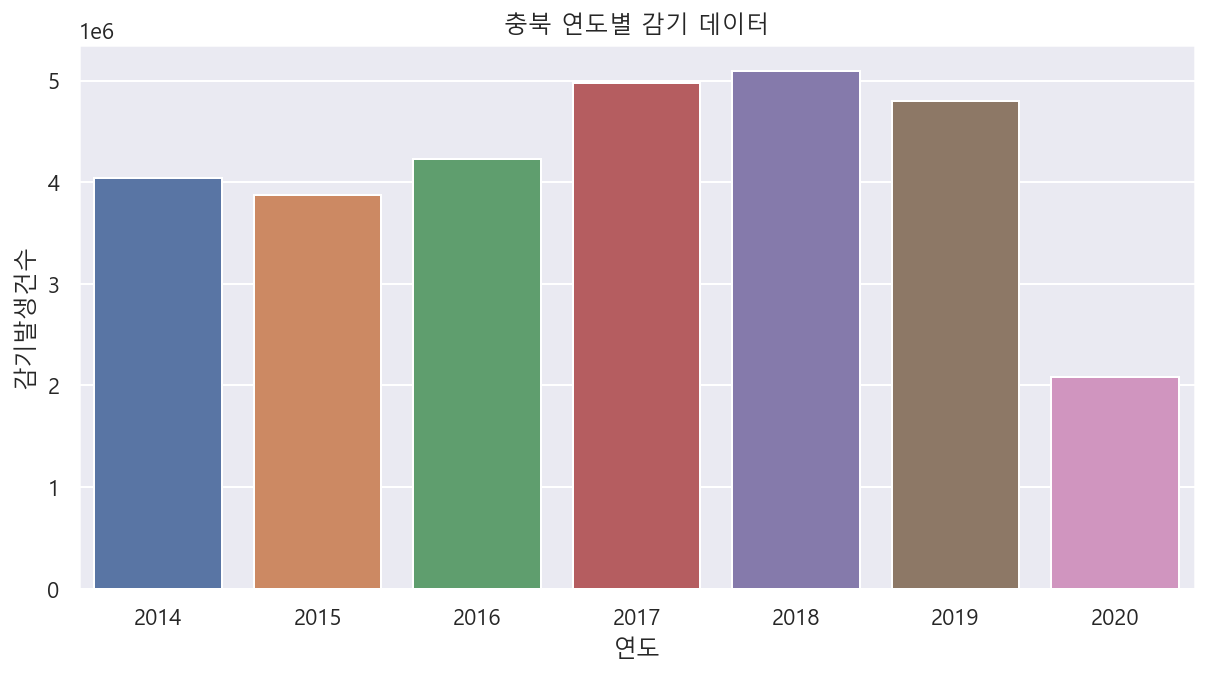

In [196]:
plt.figure(figsize=(10, 5))
plt.title("충북 연도별 감기 데이터")
sns.barplot(data=df_ccbuk, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'충북 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

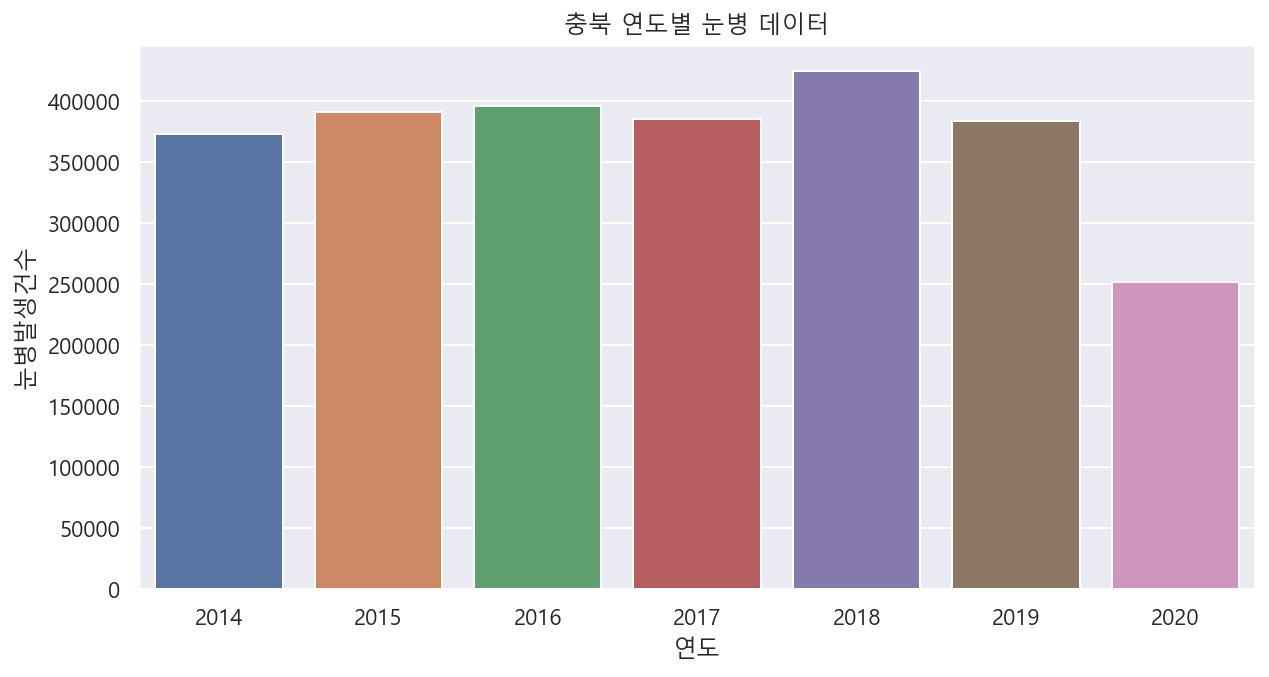

In [197]:
plt.figure(figsize=(10, 5))
plt.title("충북 연도별 눈병 데이터")
sns.barplot(data=df_ccbuk, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'충북 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

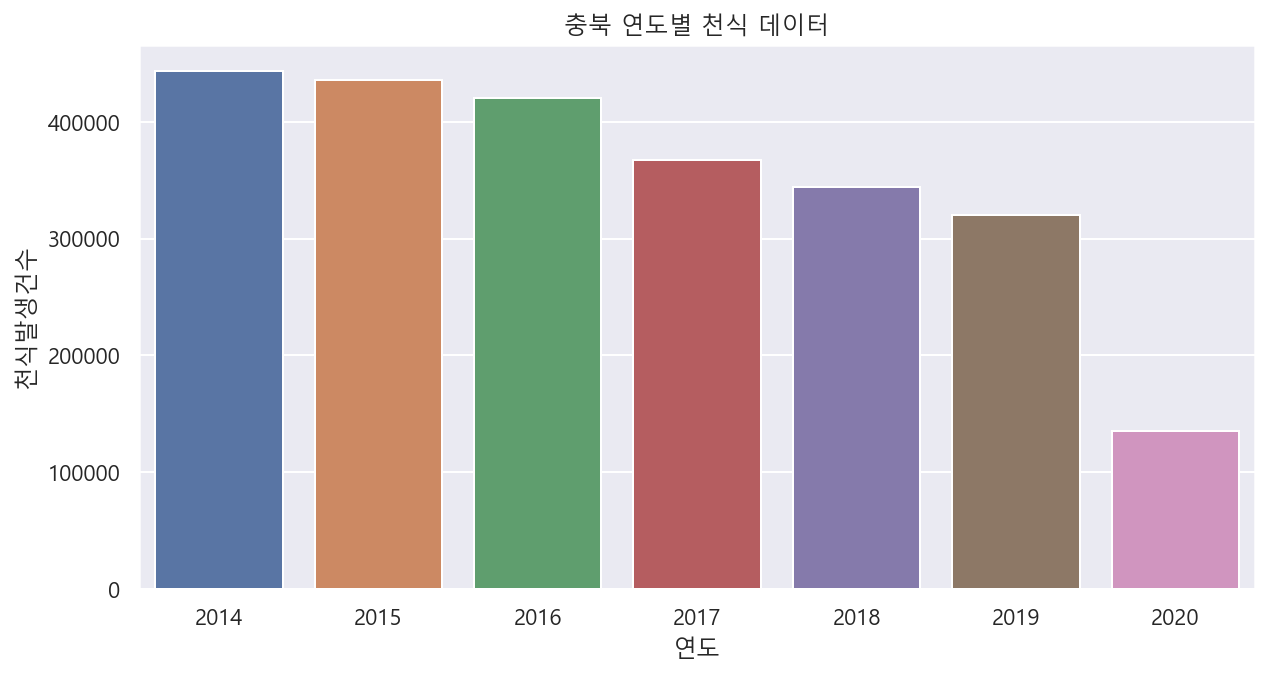

In [198]:
plt.figure(figsize=(10, 5))
plt.title("충북 연도별 천식 데이터")
sns.barplot(data=df_ccbuk, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'충북 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

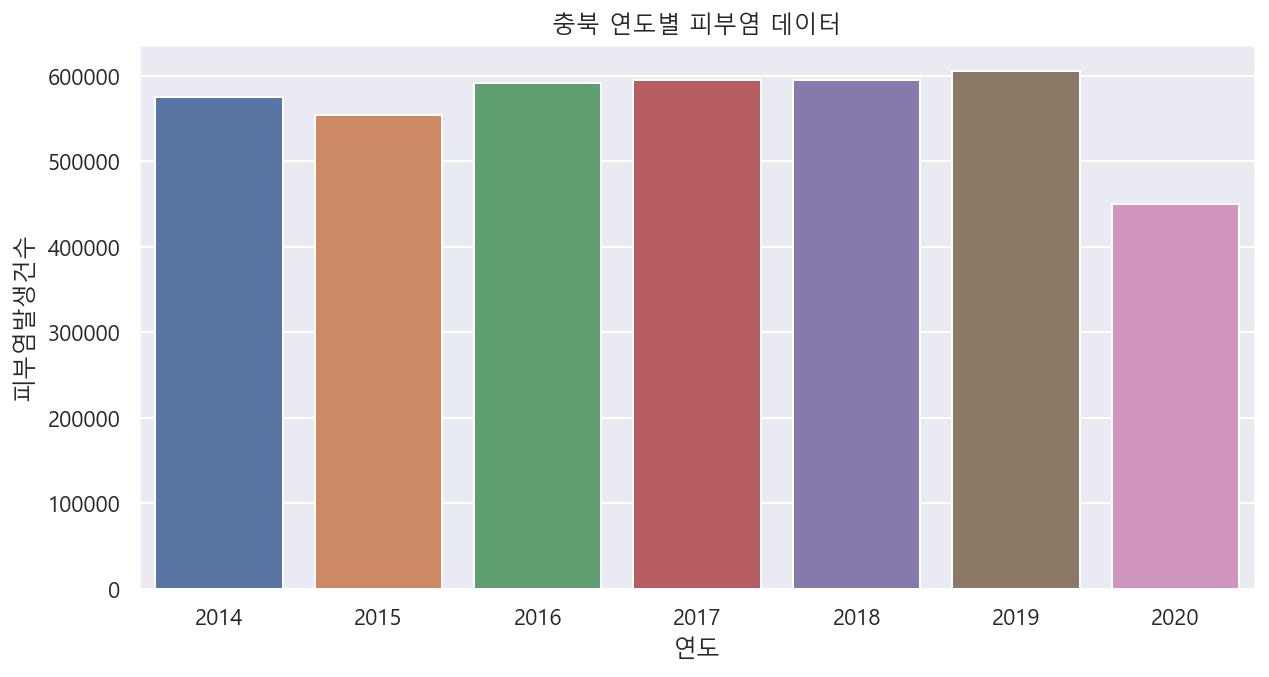

In [199]:
plt.figure(figsize=(10, 5))
plt.title("충북 연도별 피부염 데이터")
sns.barplot(data=df_ccbuk, x="연도", y="피부염발생건수")

### 충남 연도별 데이터

<AxesSubplot:title={'center':'충남 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

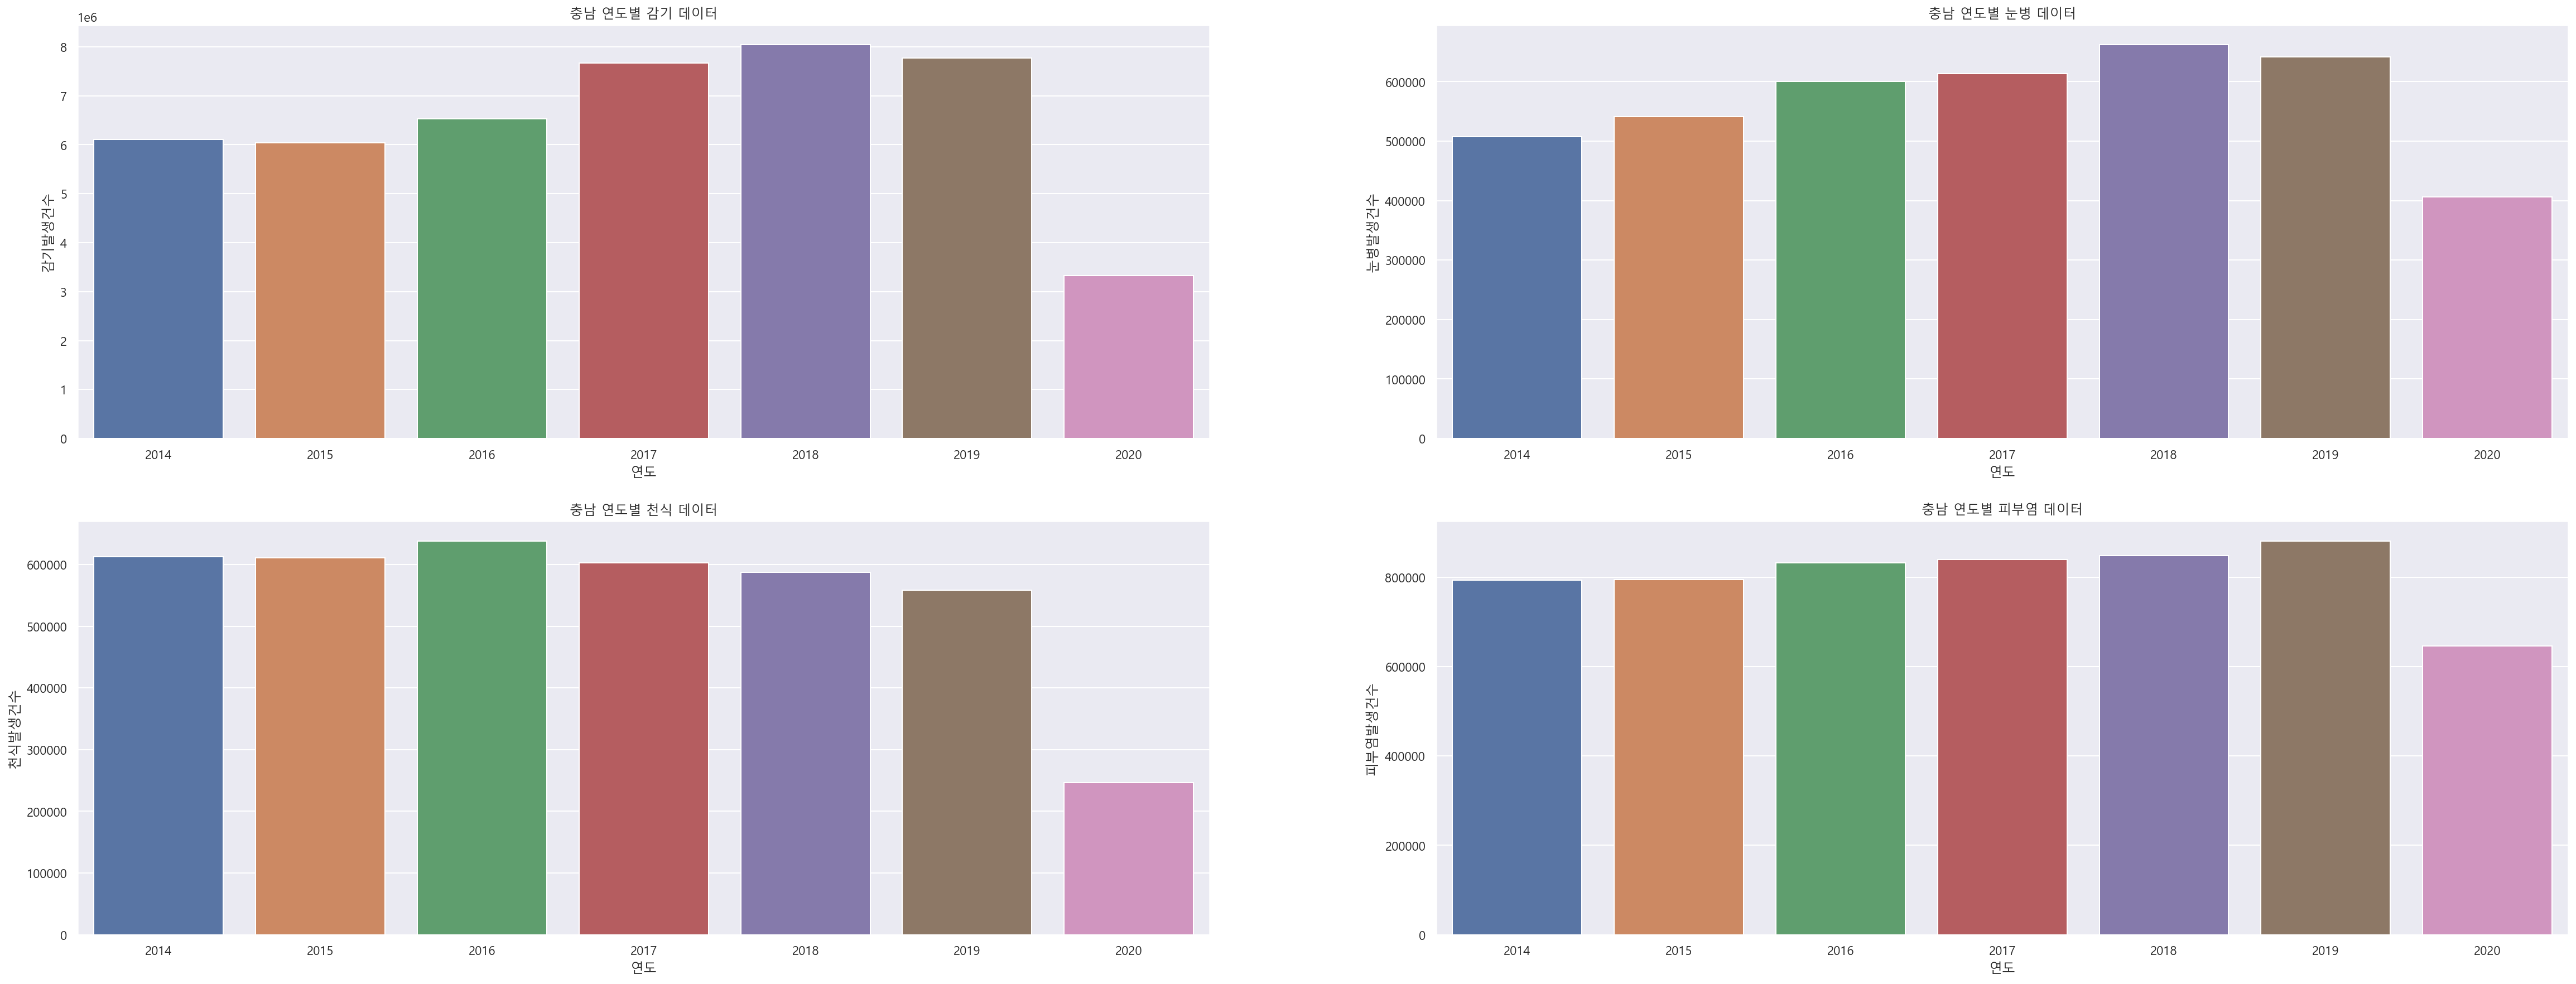

In [200]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("충남 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("충남 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("충남 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("충남 연도별 피부염 데이터")

sns.barplot(data=df_ccnam, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_ccnam, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_ccnam, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_ccnam, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'충남 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

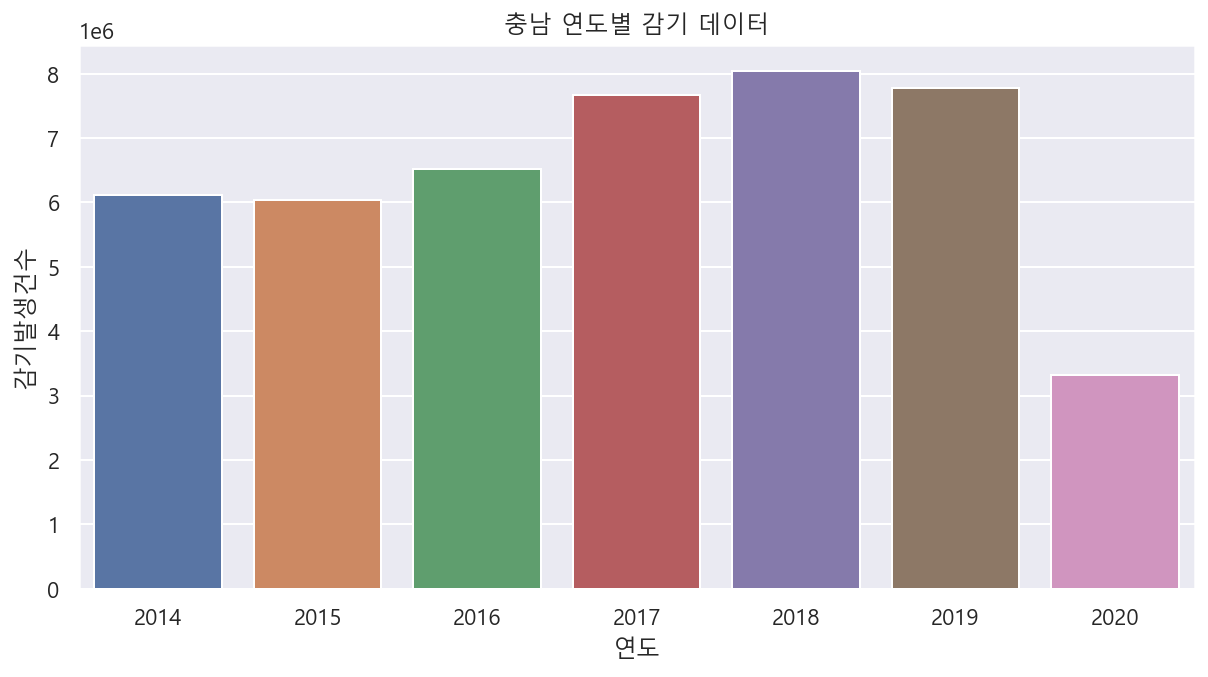

In [201]:
plt.figure(figsize=(10, 5))
plt.title("충남 연도별 감기 데이터")
sns.barplot(data=df_ccnam, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'충남 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

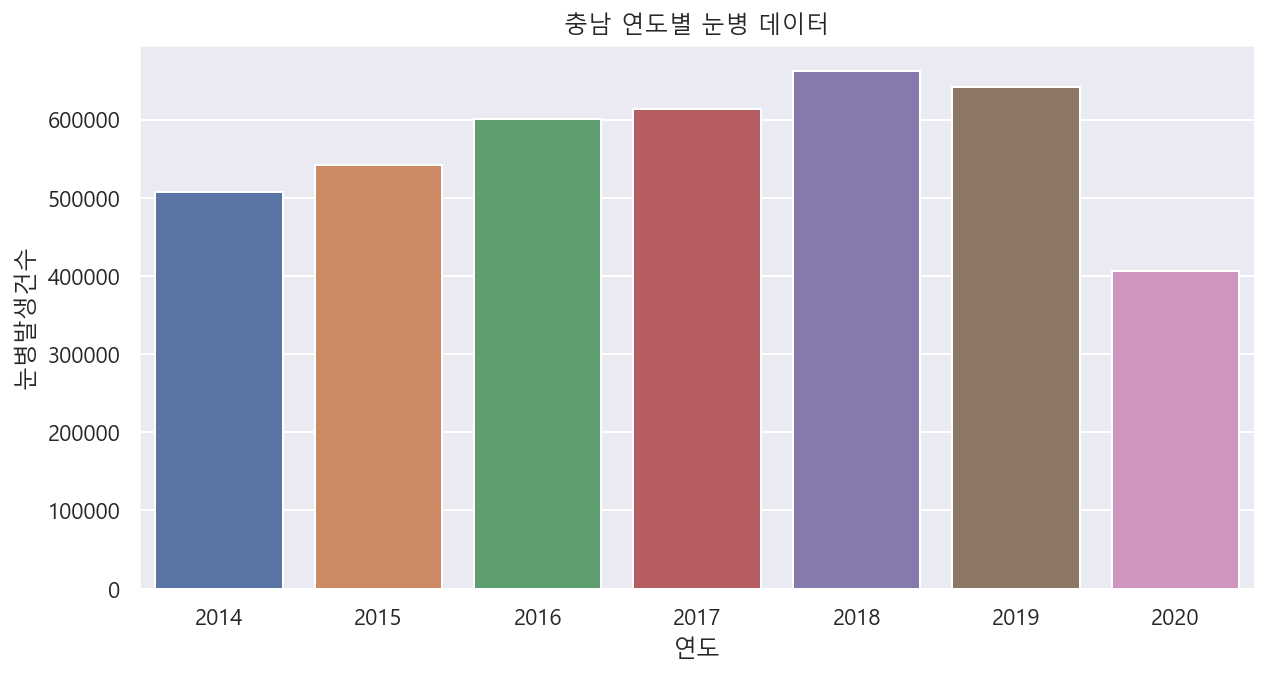

In [202]:
plt.figure(figsize=(10, 5))
plt.title("충남 연도별 눈병 데이터")
sns.barplot(data=df_ccnam, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'충남 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

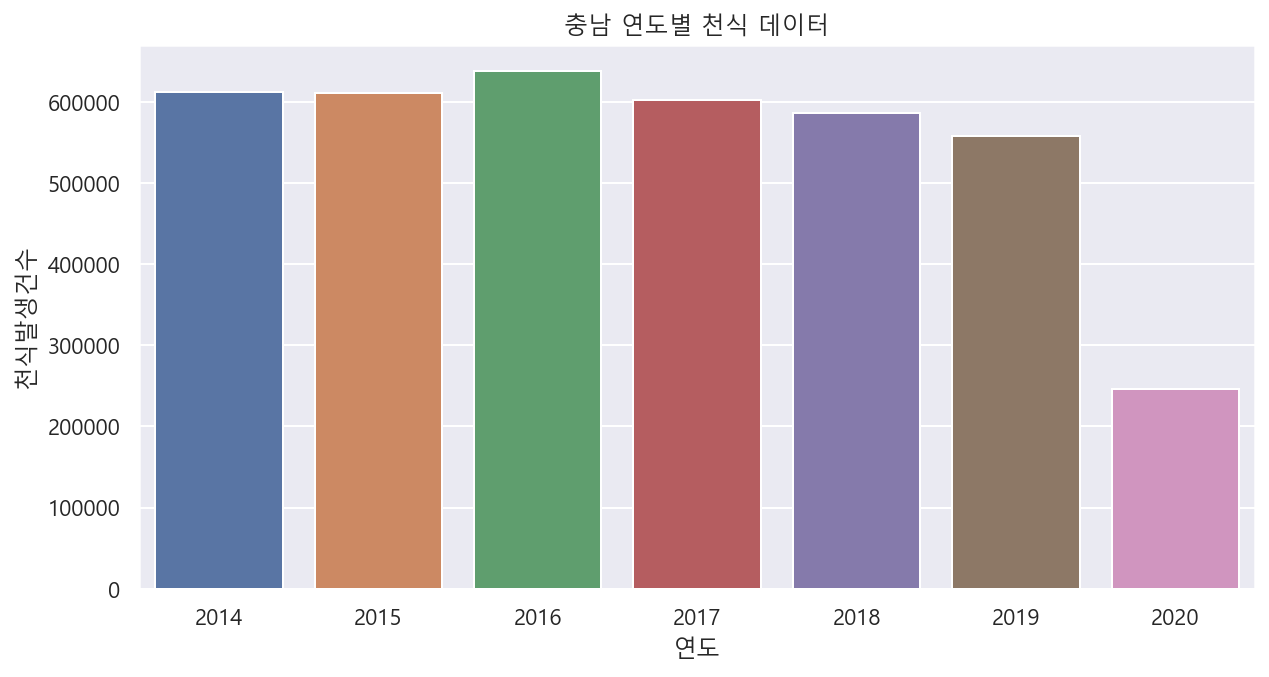

In [203]:
plt.figure(figsize=(10, 5))
plt.title("충남 연도별 천식 데이터")
sns.barplot(data=df_ccnam, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'충남 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

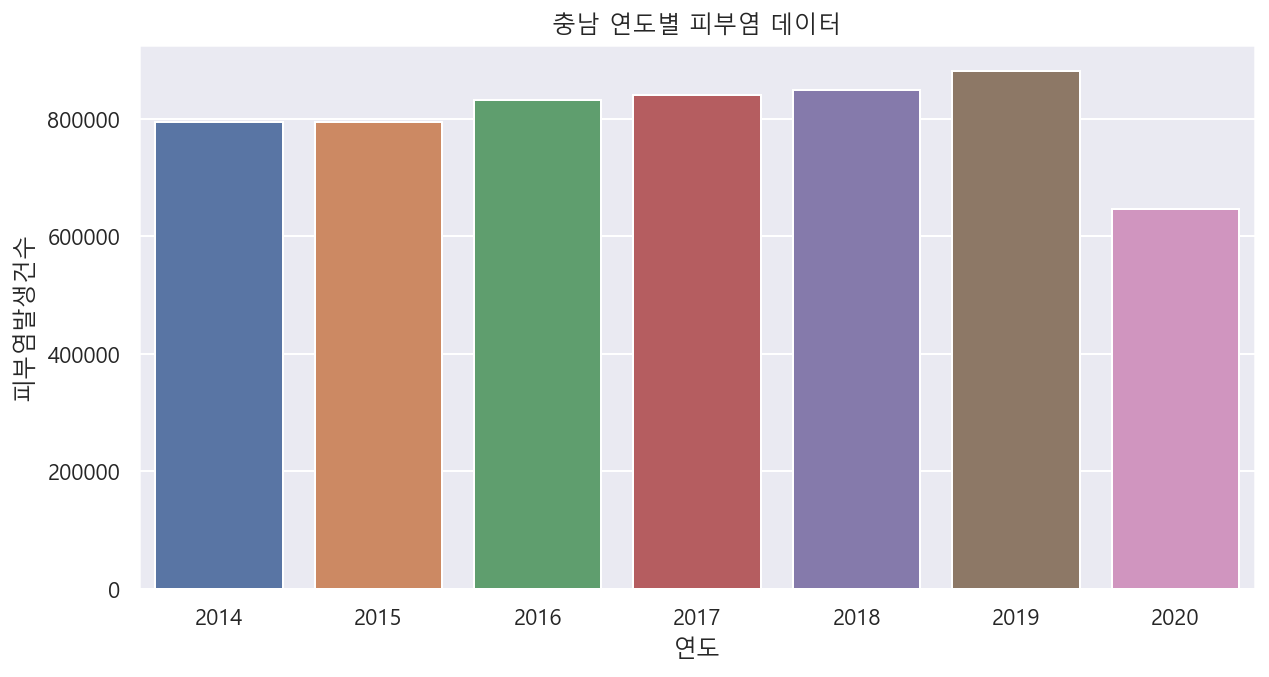

In [204]:
plt.figure(figsize=(10, 5))
plt.title("충남 연도별 피부염 데이터")
sns.barplot(data=df_ccnam, x="연도", y="피부염발생건수")

### 전북 연도별 데이터

<AxesSubplot:title={'center':'전북 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

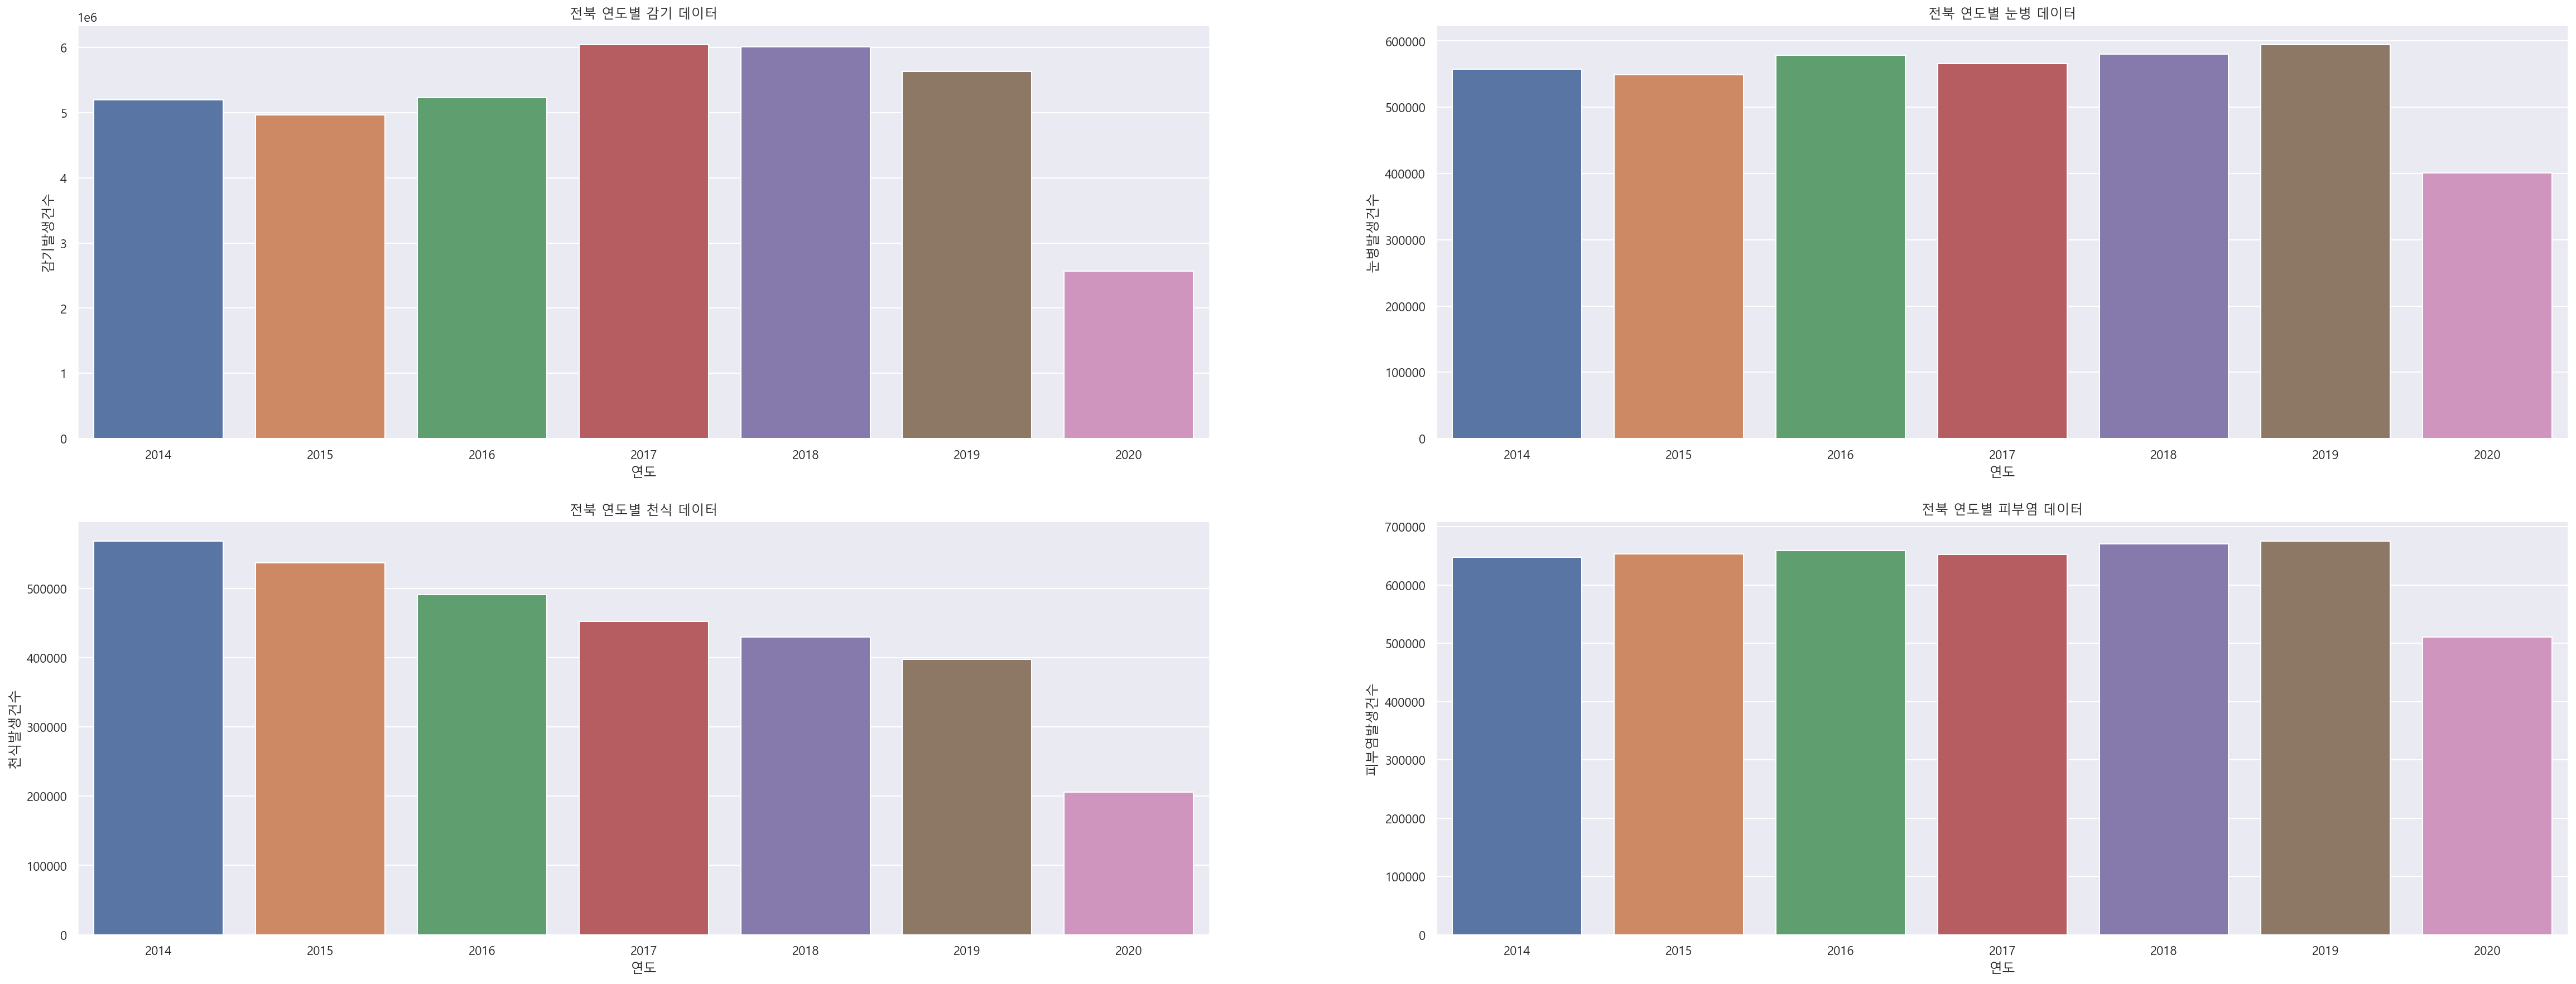

In [205]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("전북 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("전북 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("전북 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("전북 연도별 피부염 데이터")

sns.barplot(data=df_jlbuk, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_jlbuk, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_jlbuk, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_jlbuk, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'전북 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

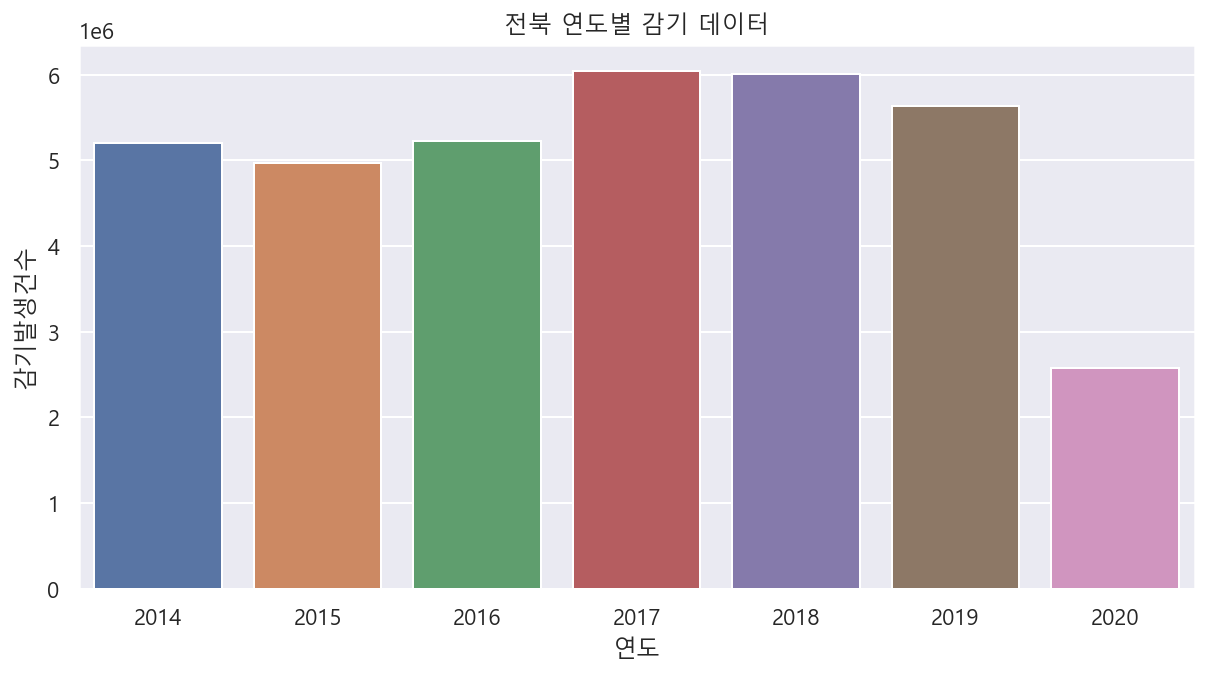

In [206]:
plt.figure(figsize=(10, 5))
plt.title("전북 연도별 감기 데이터")
sns.barplot(data=df_jlbuk, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'전북 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

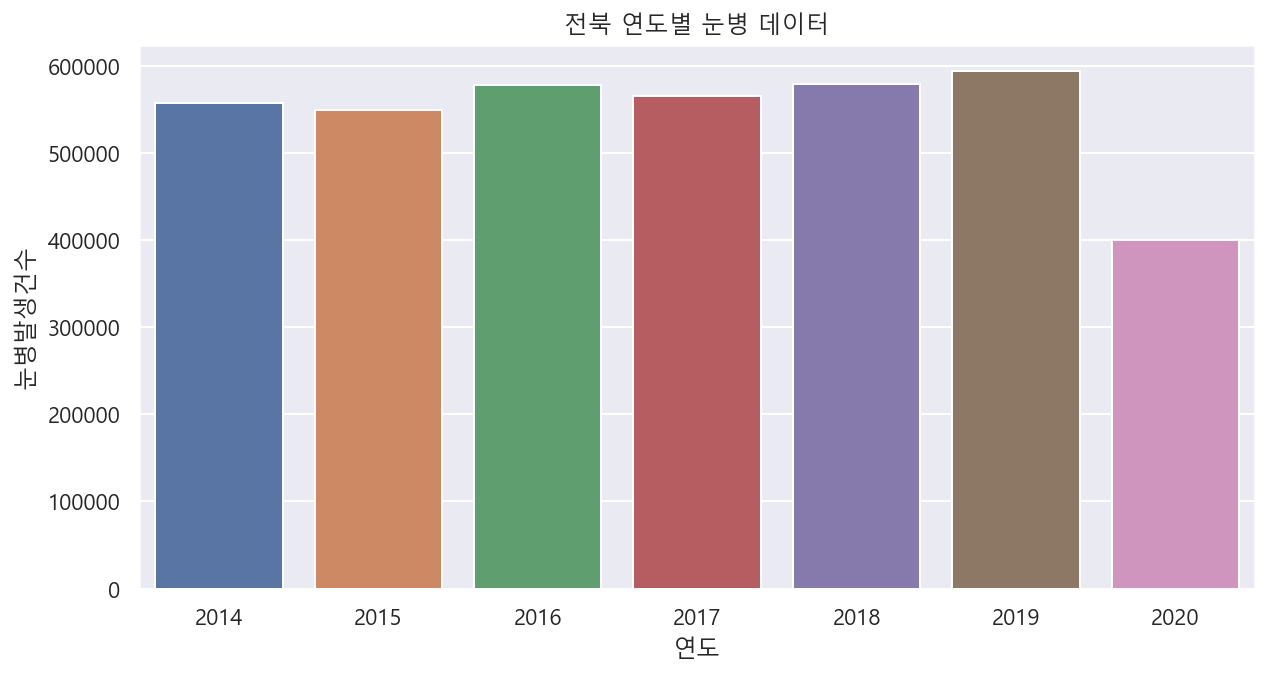

In [207]:
plt.figure(figsize=(10, 5))
plt.title("전북 연도별 눈병 데이터")
sns.barplot(data=df_jlbuk, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'전북 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

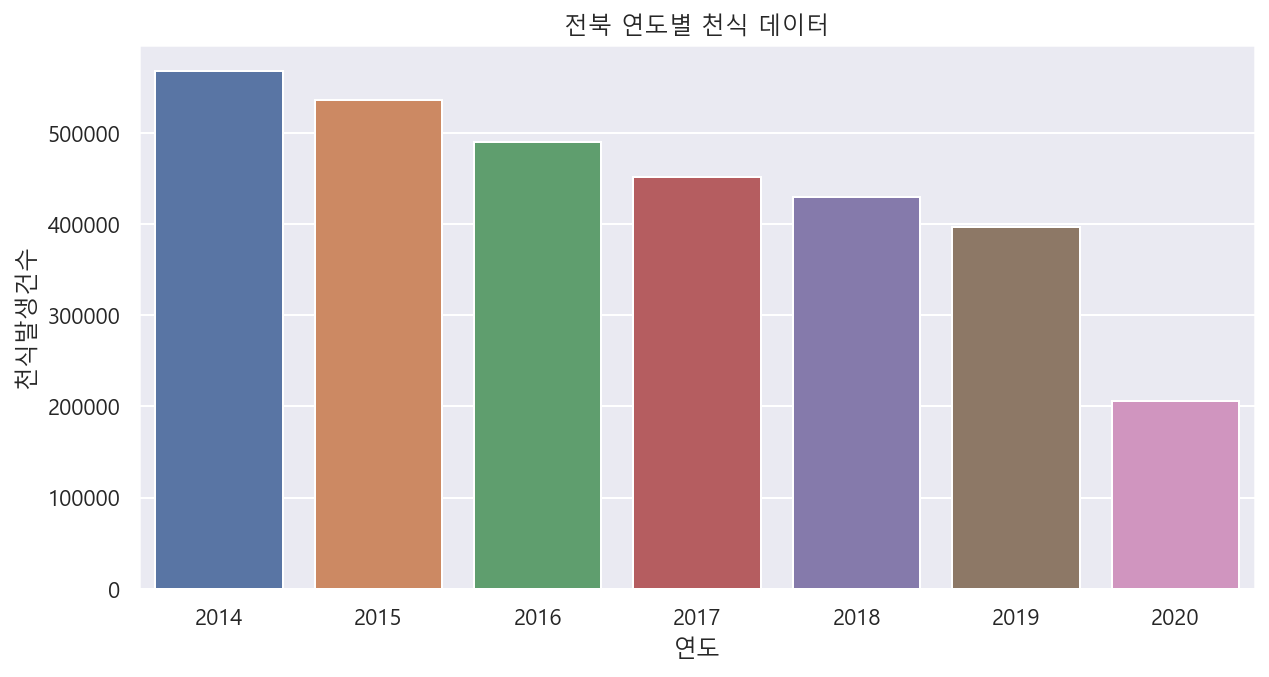

In [208]:
plt.figure(figsize=(10, 5))
plt.title("전북 연도별 천식 데이터")
sns.barplot(data=df_jlbuk, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'전북 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

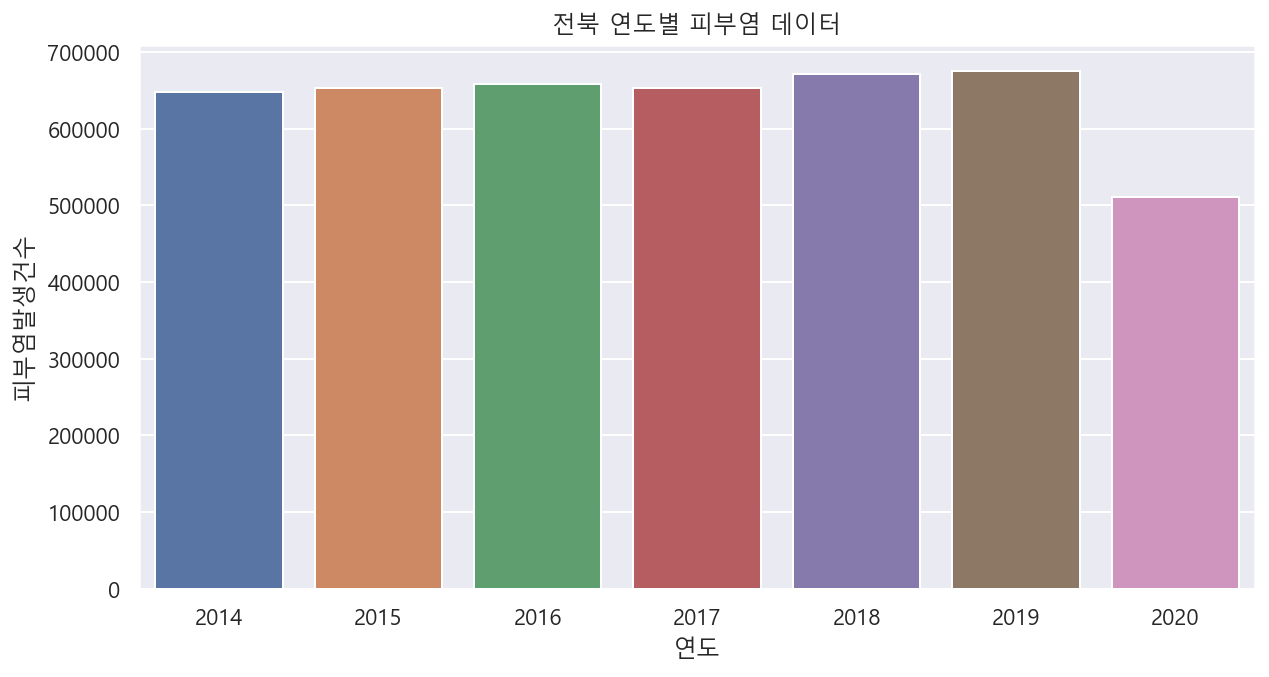

In [209]:
plt.figure(figsize=(10, 5))
plt.title("전북 연도별 피부염 데이터")
sns.barplot(data=df_jlbuk, x="연도", y="피부염발생건수")

### 전남 연도별 데이터

<AxesSubplot:title={'center':'전남 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

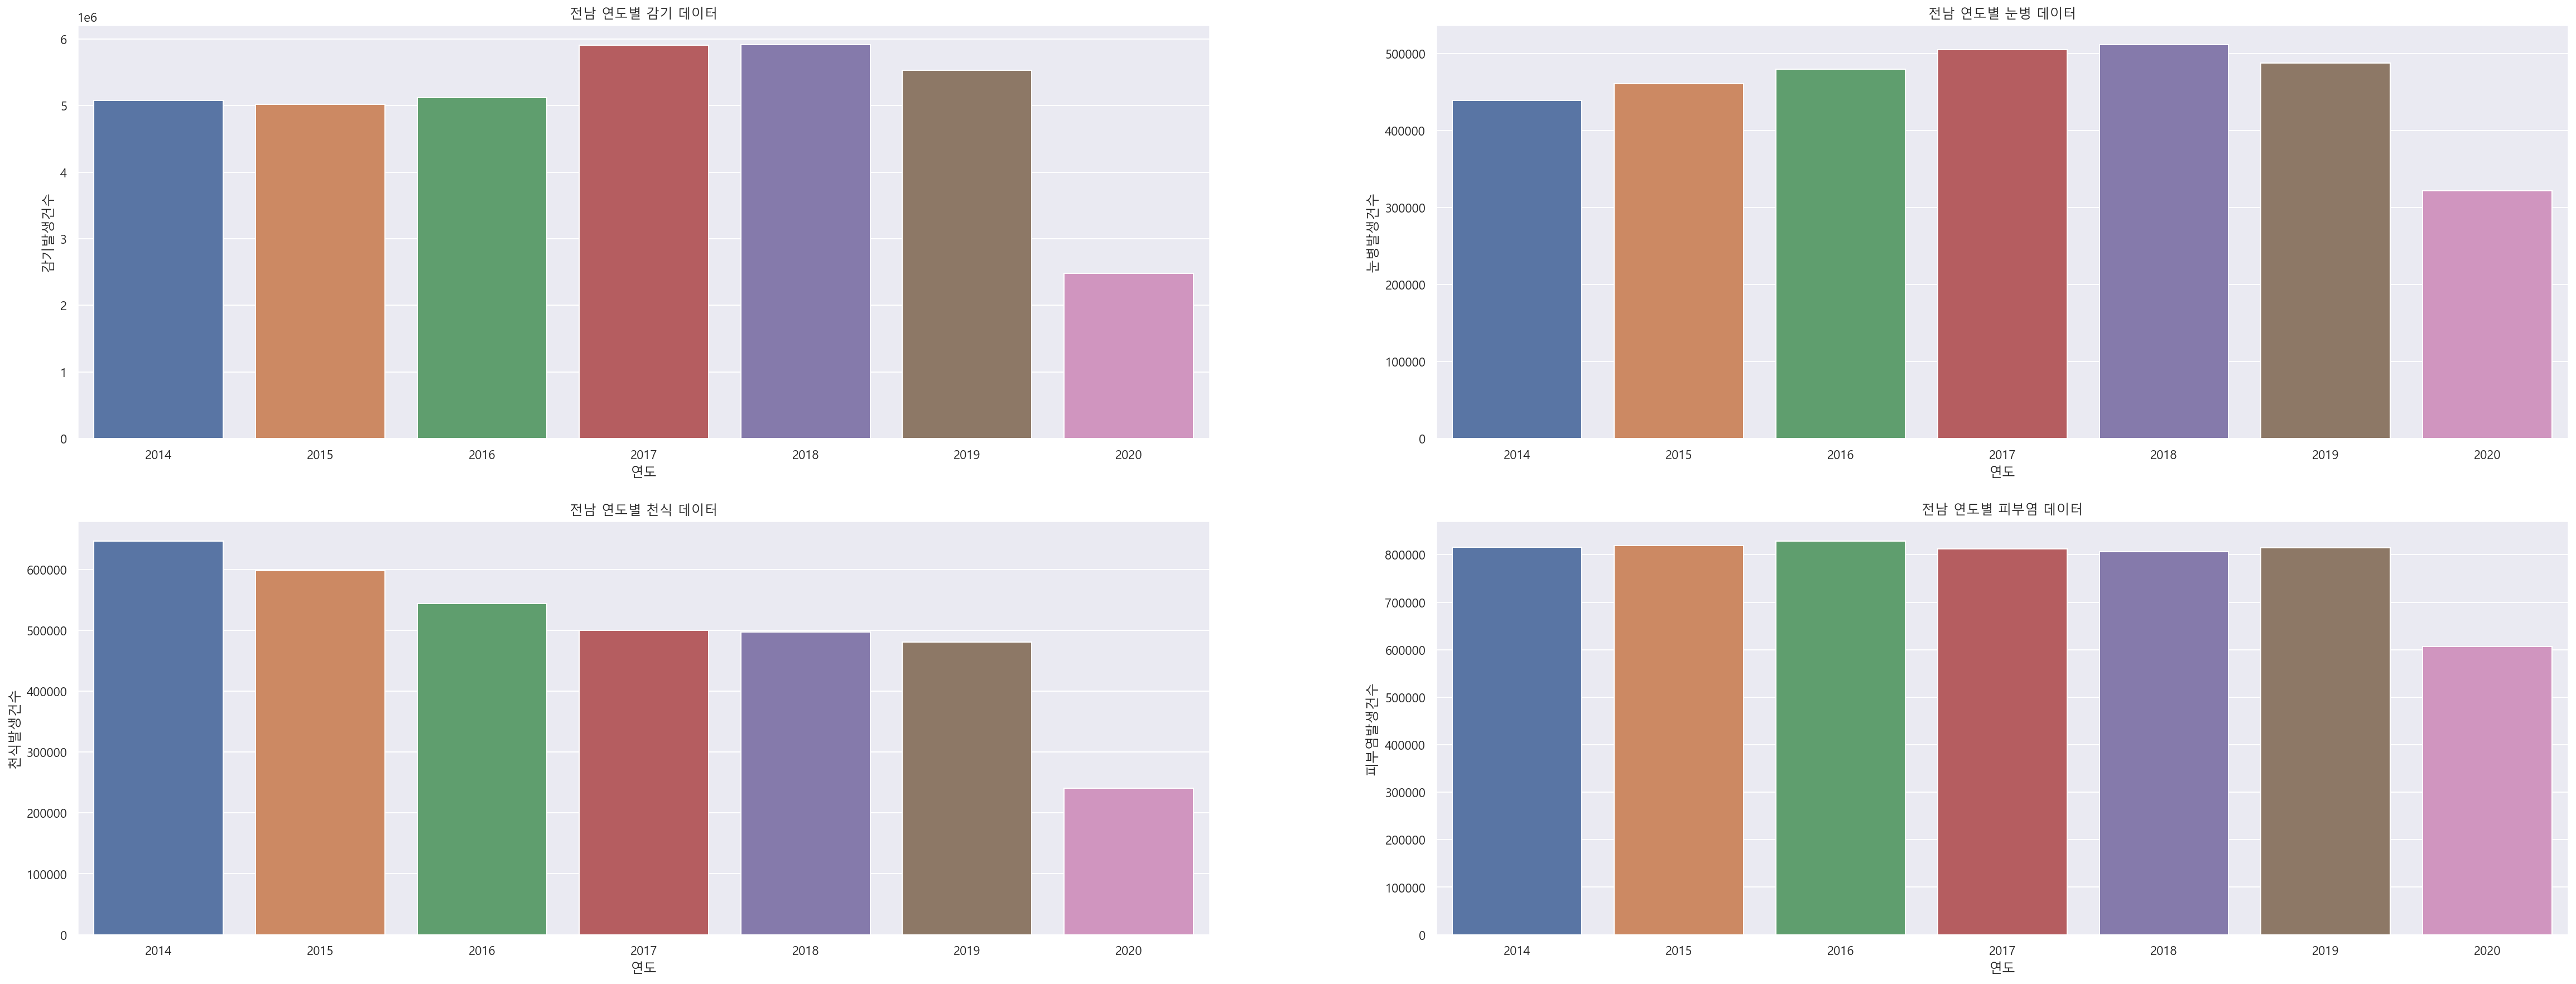

In [210]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("전남 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("전남 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("전남 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("전남 연도별 피부염 데이터")

sns.barplot(data=df_jlnam, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_jlnam, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_jlnam, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_jlnam, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'전남 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

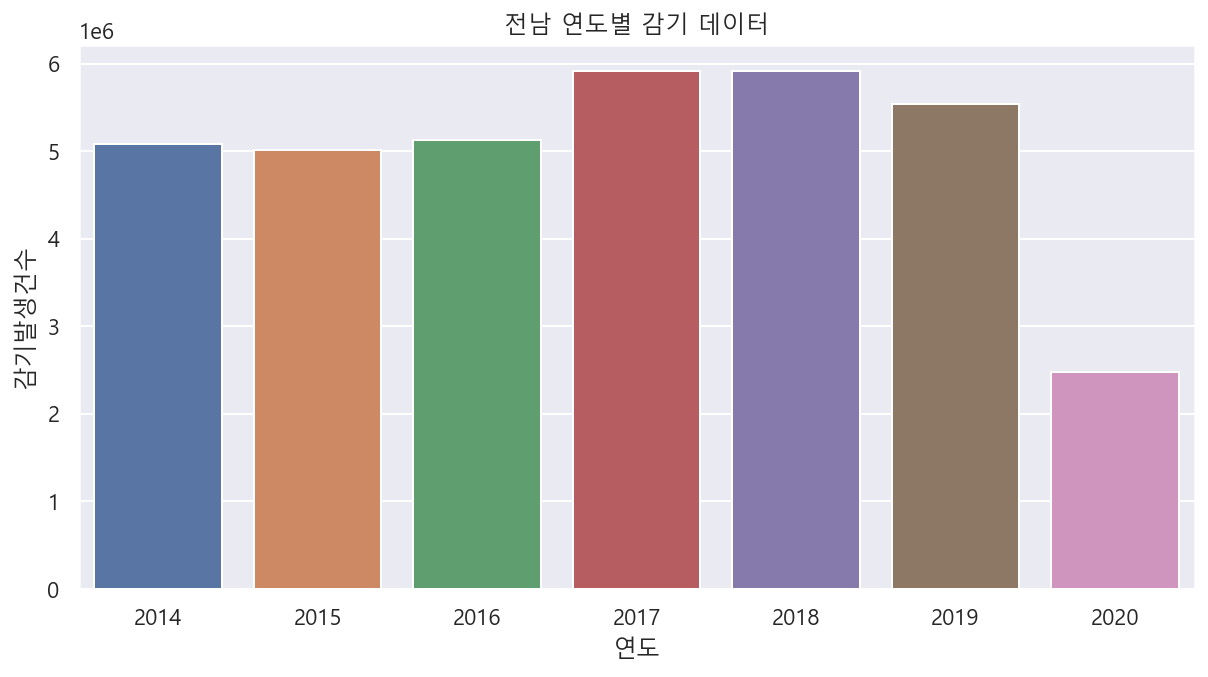

In [211]:
plt.figure(figsize=(10, 5))
plt.title("전남 연도별 감기 데이터")
sns.barplot(data=df_jlnam, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'전남 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

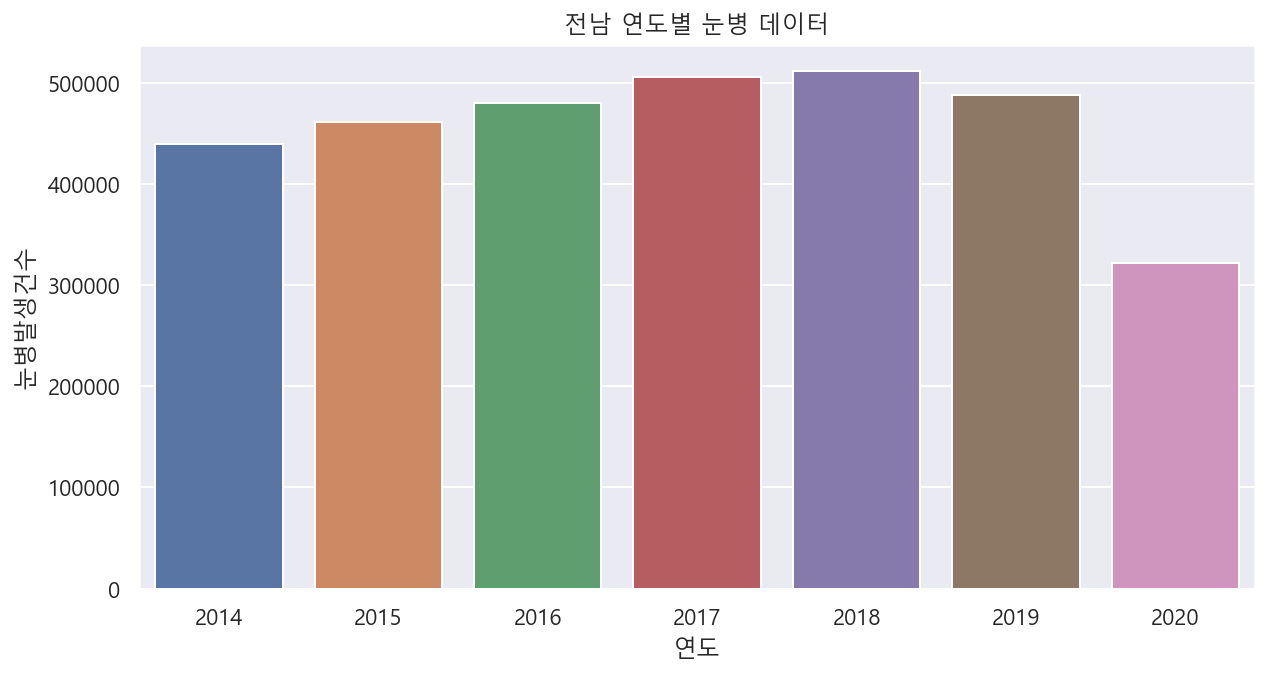

In [212]:
plt.figure(figsize=(10, 5))
plt.title("전남 연도별 눈병 데이터")
sns.barplot(data=df_jlnam, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'전남 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

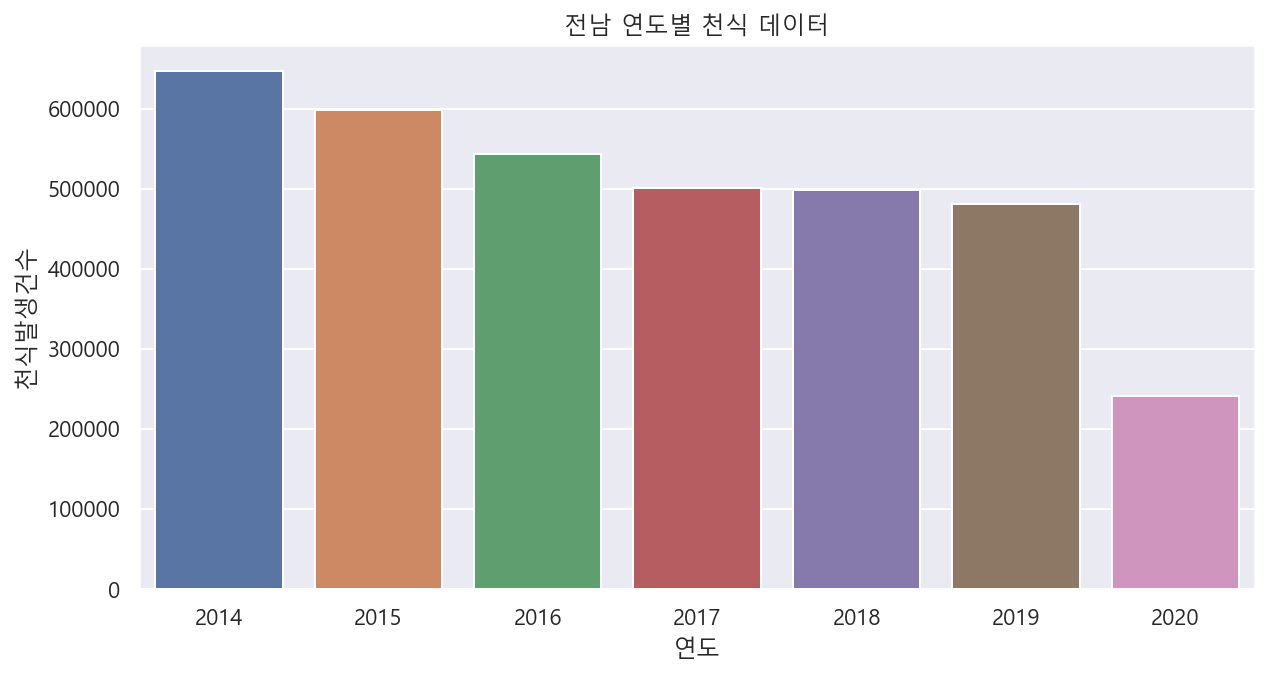

In [213]:
plt.figure(figsize=(10, 5))
plt.title("전남 연도별 천식 데이터")
sns.barplot(data=df_jlnam, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'전남 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

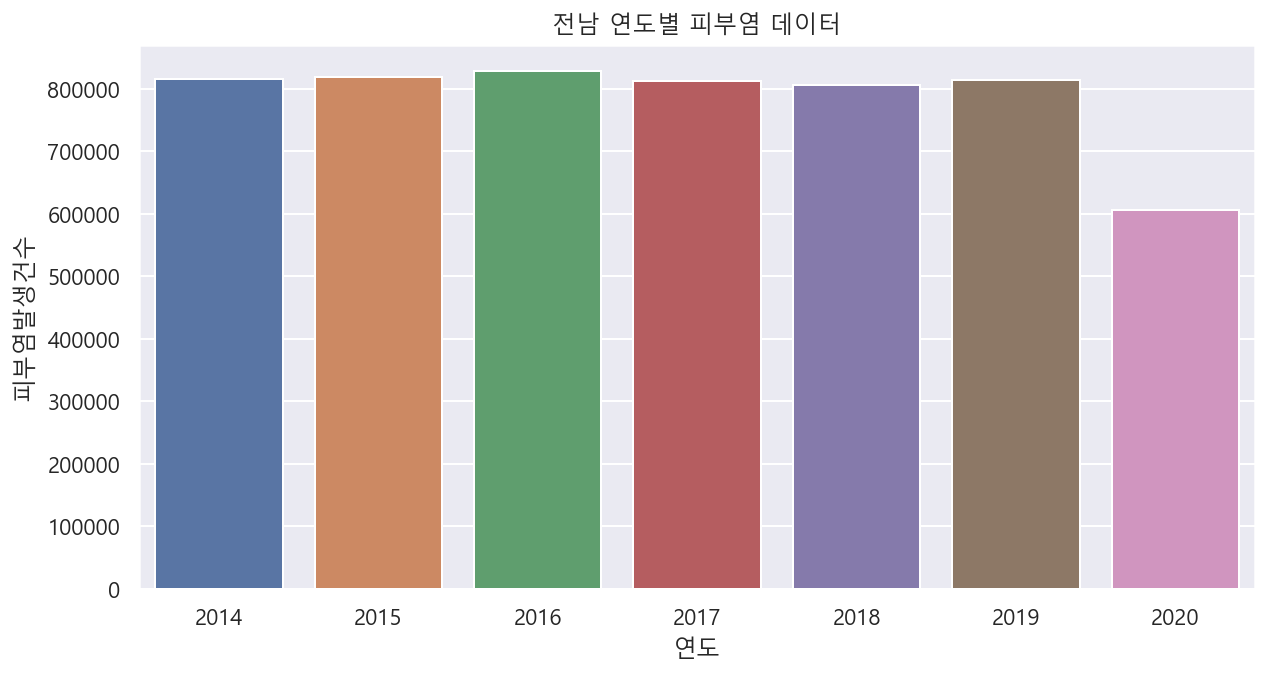

In [214]:
plt.figure(figsize=(10, 5))
plt.title("전남 연도별 피부염 데이터")
sns.barplot(data=df_jlnam, x="연도", y="피부염발생건수")

### 경북 연도별 데이터

<AxesSubplot:title={'center':'경북 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

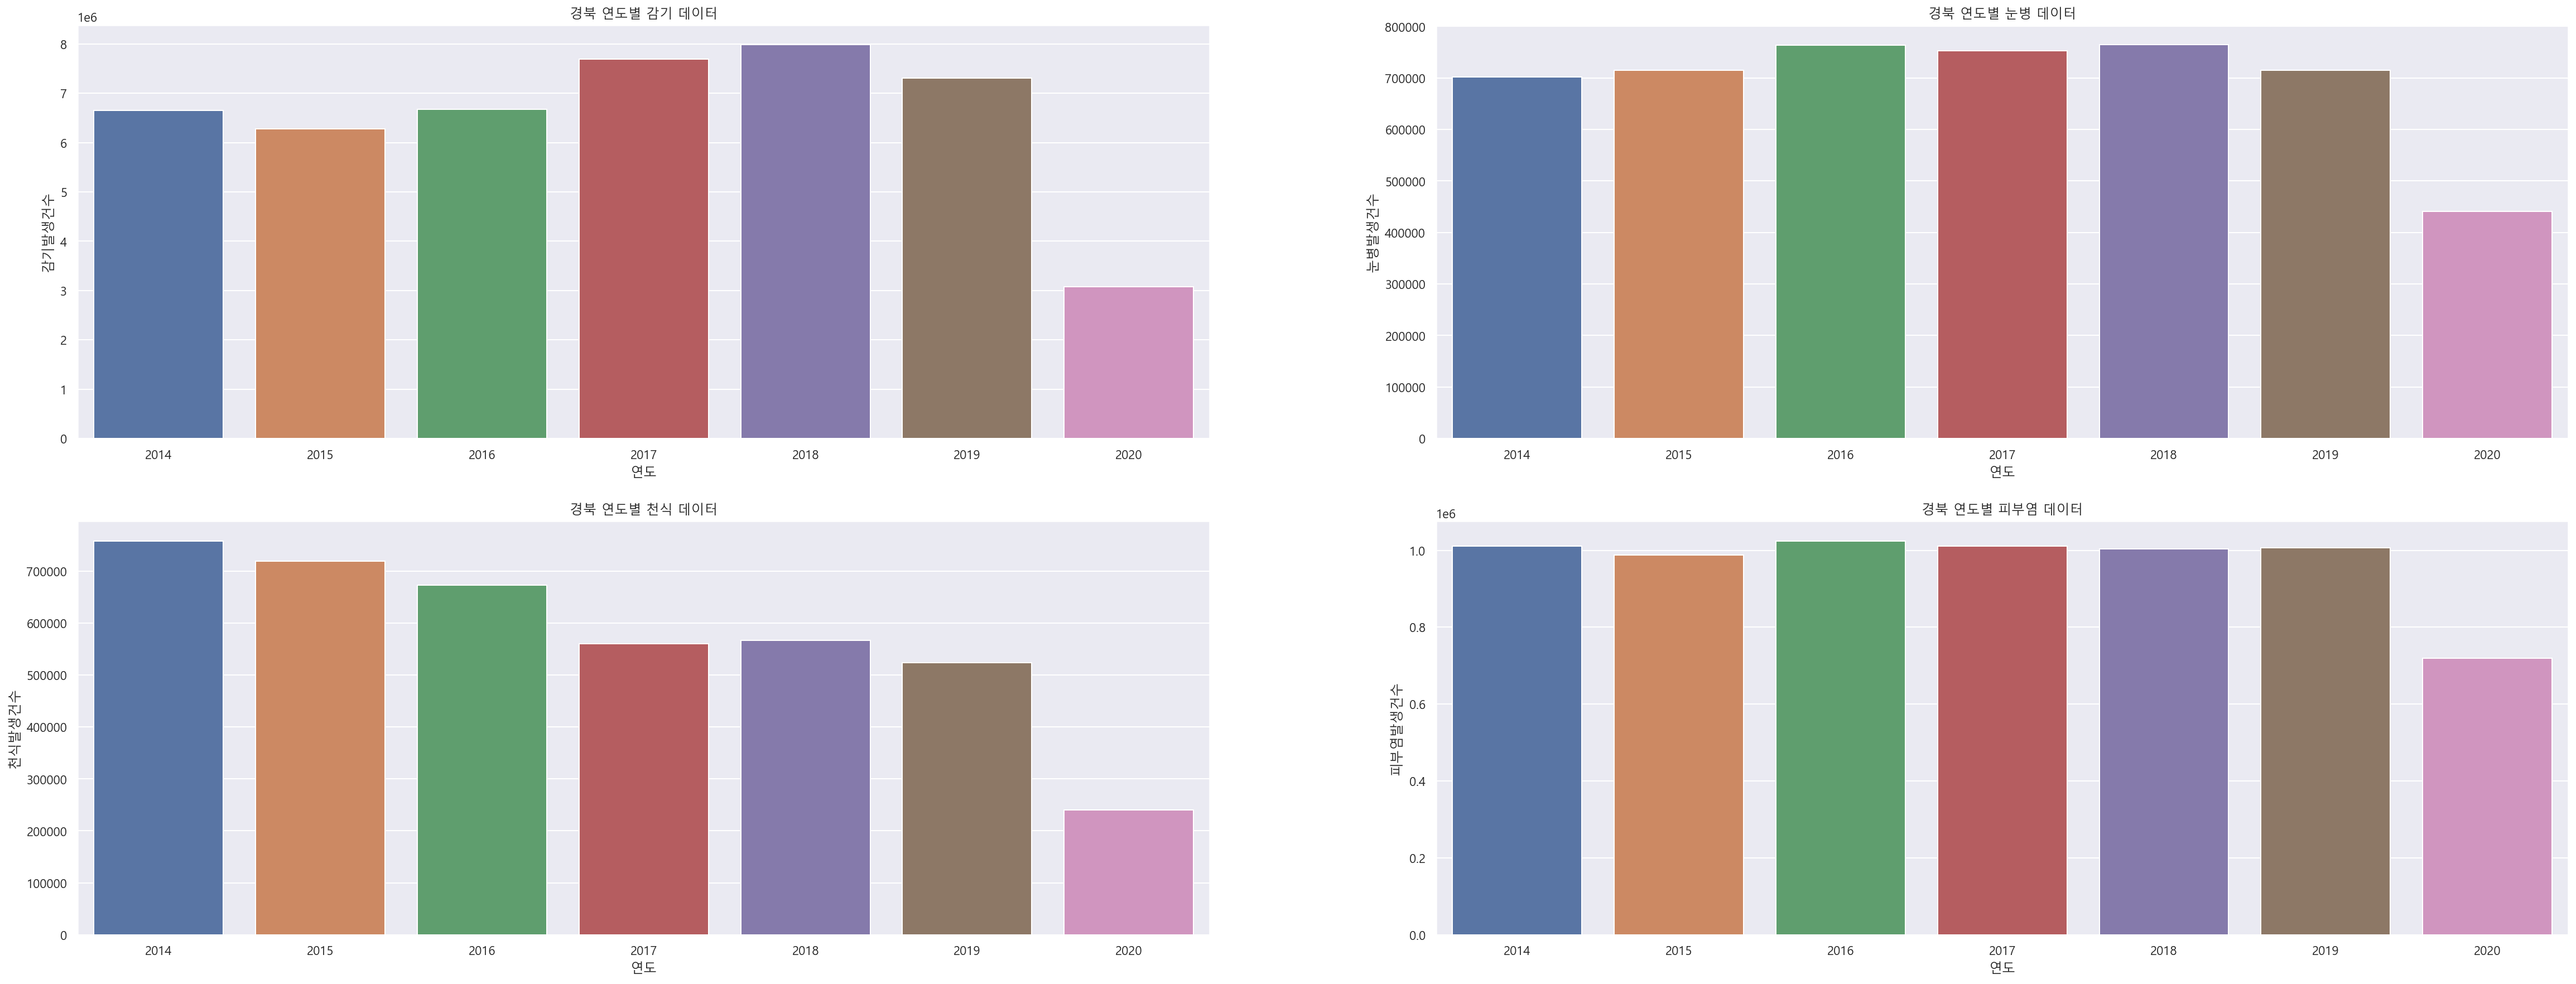

In [215]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("경북 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("경북 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("경북 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("경북 연도별 피부염 데이터")

sns.barplot(data=df_gsbuk, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_gsbuk, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_gsbuk, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_gsbuk, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'경북 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

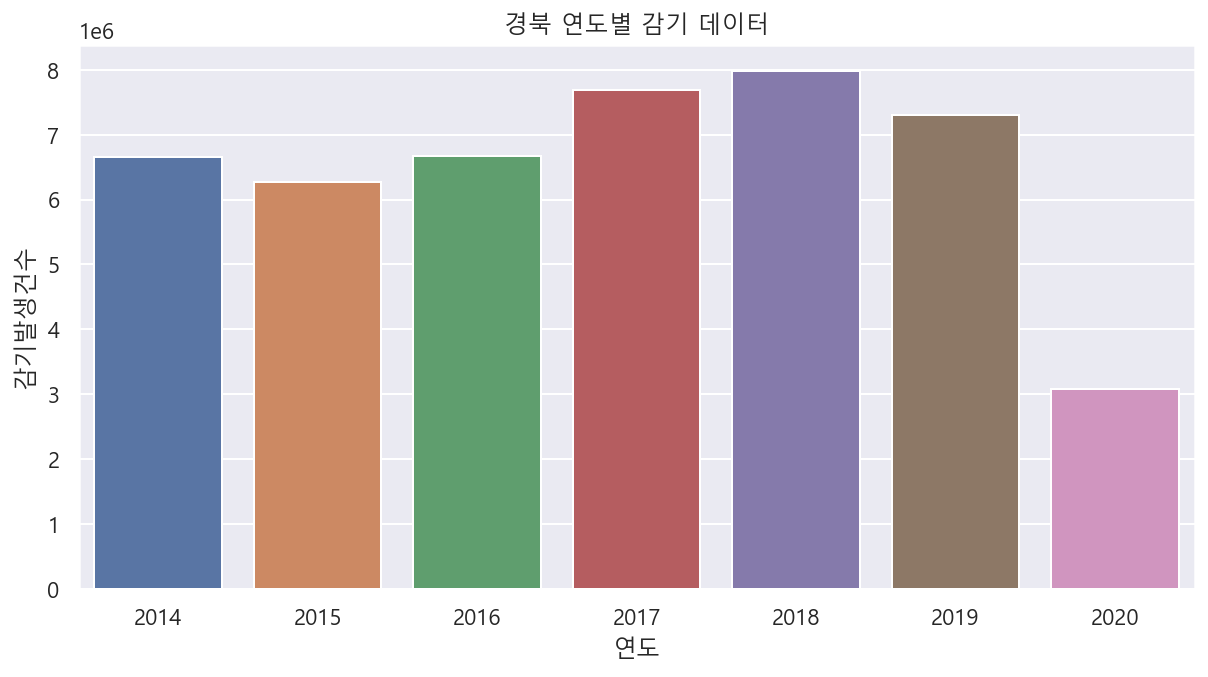

In [216]:
plt.figure(figsize=(10, 5))
plt.title("경북 연도별 감기 데이터")
sns.barplot(data=df_gsbuk, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'경북 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

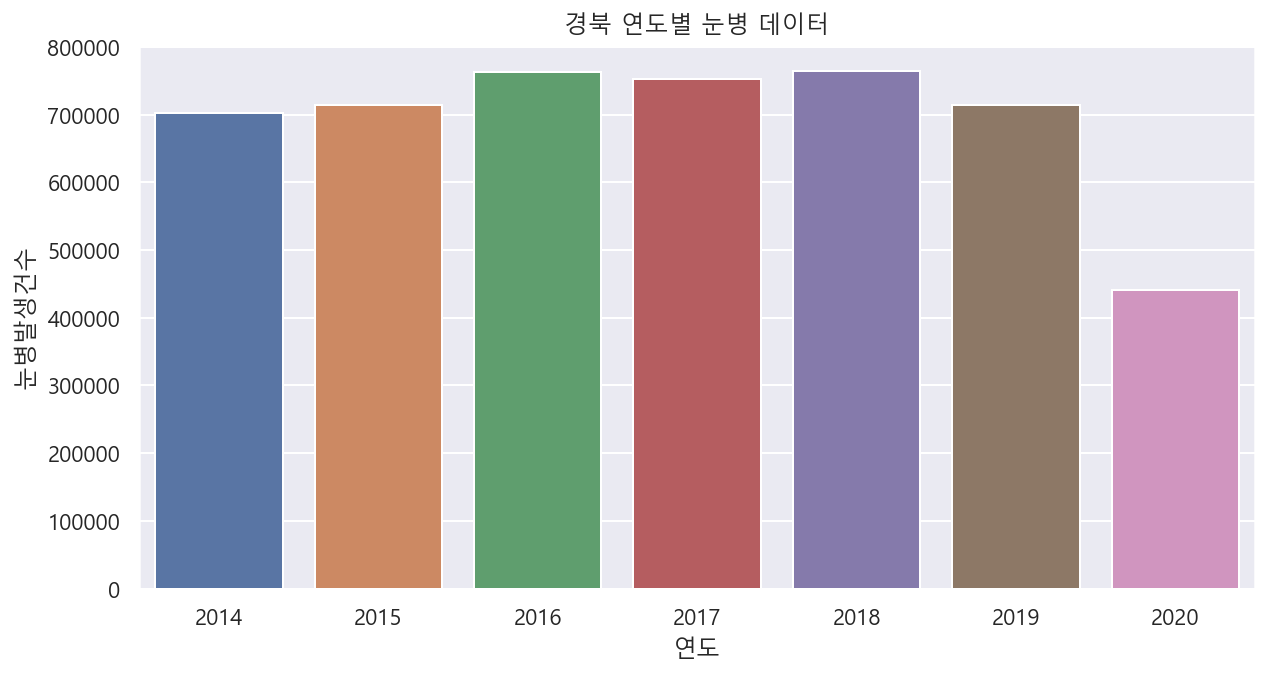

In [217]:
plt.figure(figsize=(10, 5))
plt.title("경북 연도별 눈병 데이터")
sns.barplot(data=df_gsbuk, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'경북 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

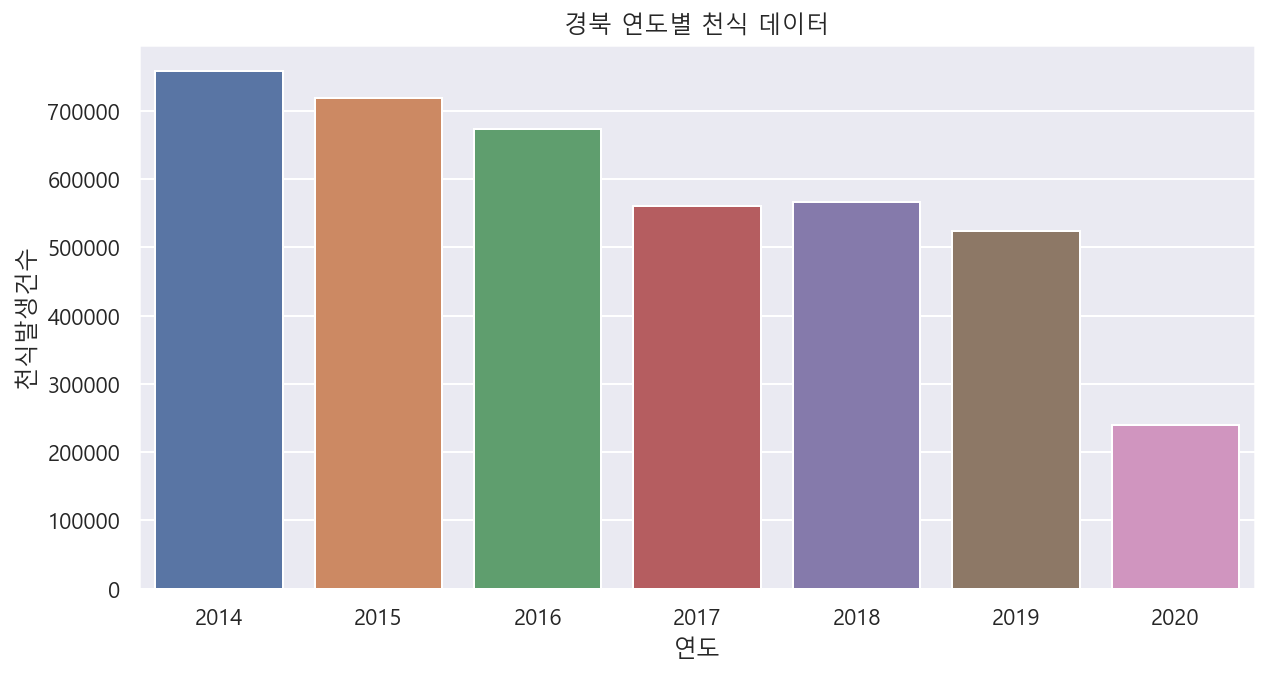

In [218]:
plt.figure(figsize=(10, 5))
plt.title("경북 연도별 천식 데이터")
sns.barplot(data=df_gsbuk, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'경북 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

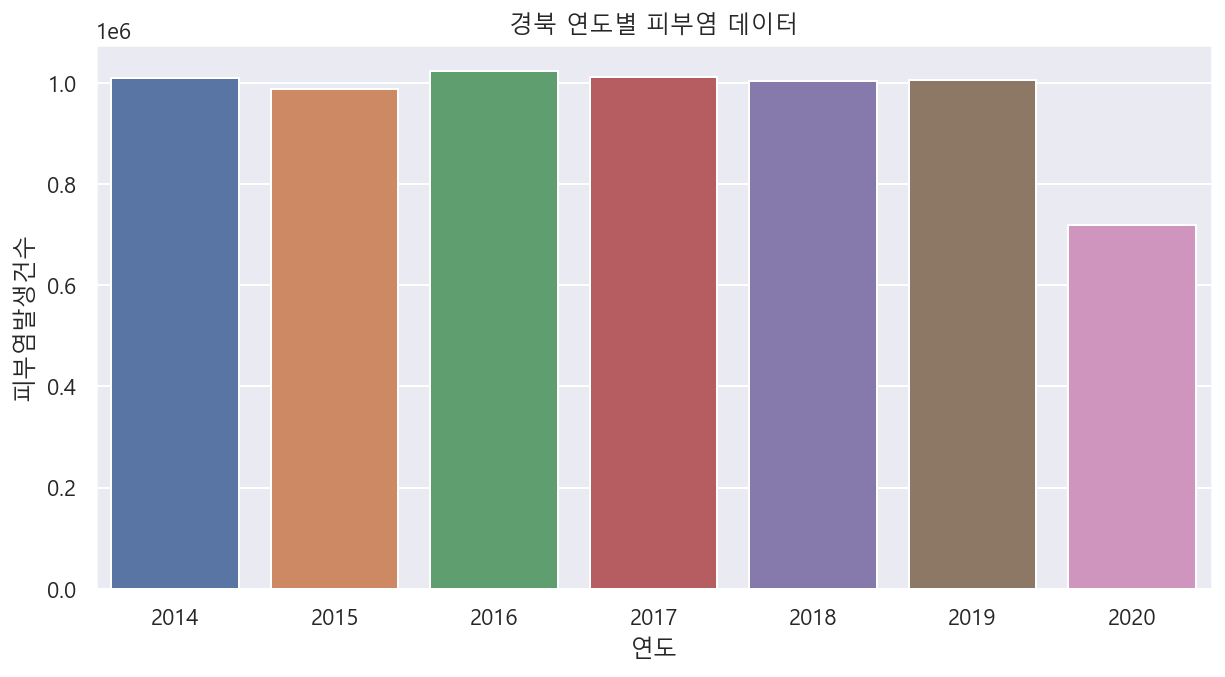

In [219]:
plt.figure(figsize=(10, 5))
plt.title("경북 연도별 피부염 데이터")
sns.barplot(data=df_gsbuk, x="연도", y="피부염발생건수")

### 경남 연도별 데이터

<AxesSubplot:title={'center':'경남 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

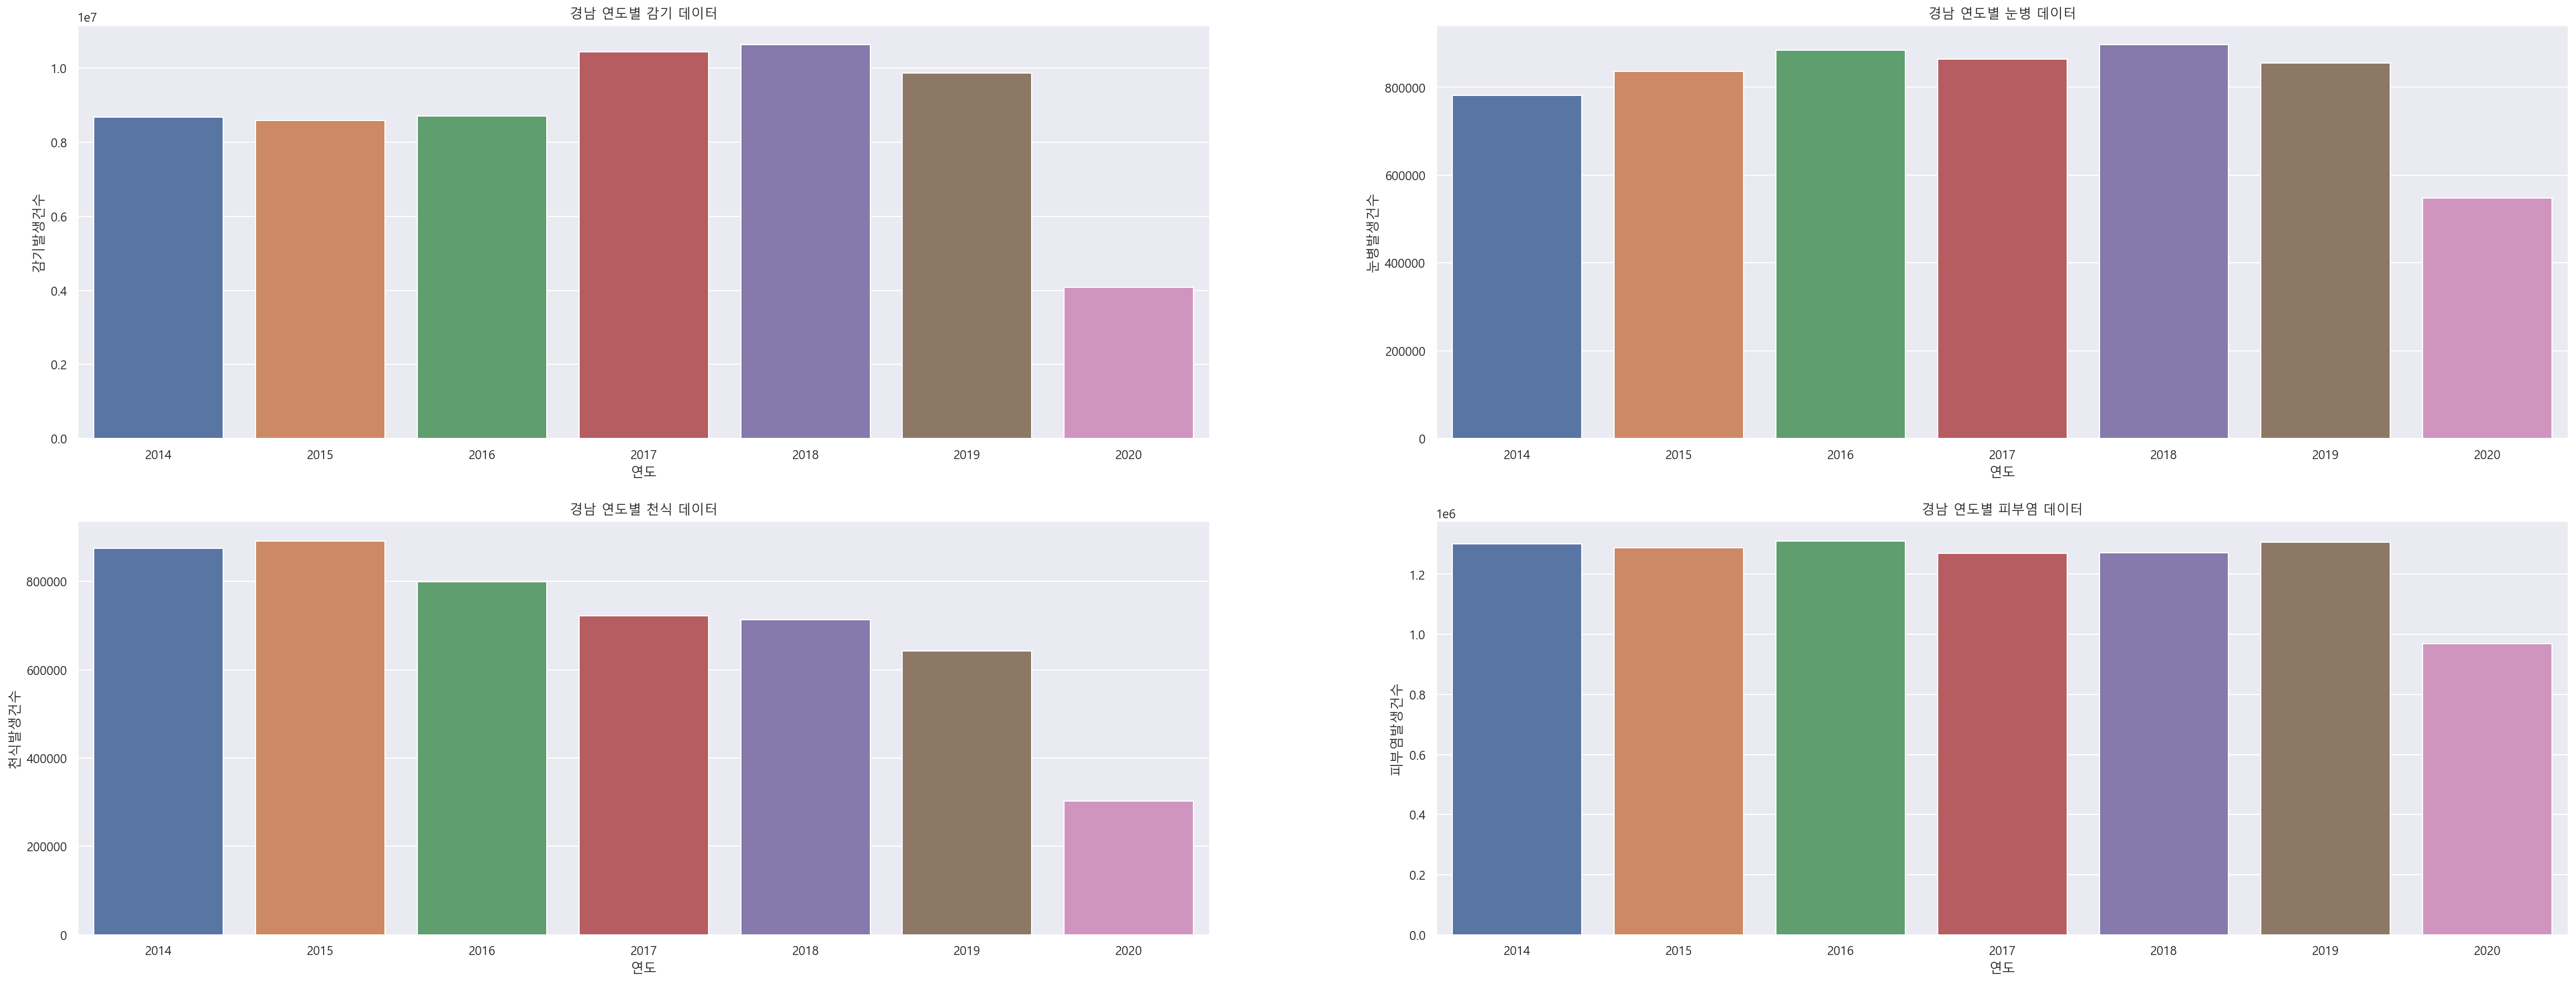

In [220]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("경남 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("경남 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("경남 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("경남 연도별 피부염 데이터")

sns.barplot(data=df_gsnam, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_gsnam, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_gsnam, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_gsnam, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'경남 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

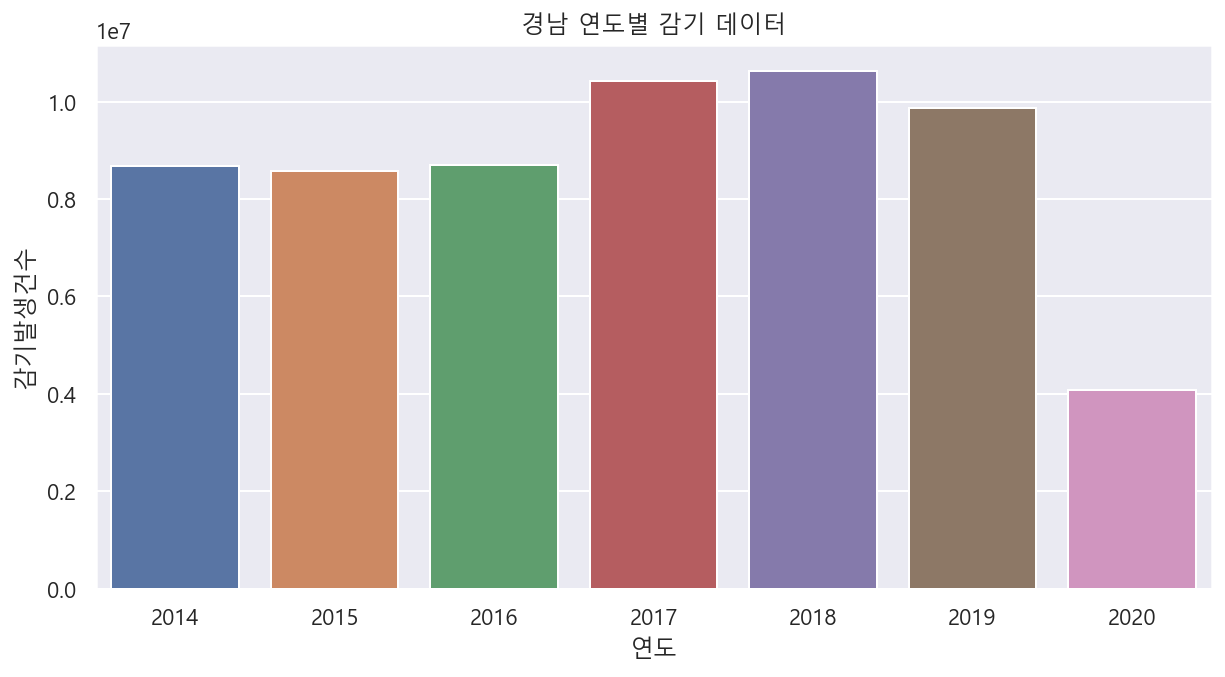

In [221]:
plt.figure(figsize=(10, 5))
plt.title("경남 연도별 감기 데이터")
sns.barplot(data=df_gsnam, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'경남 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

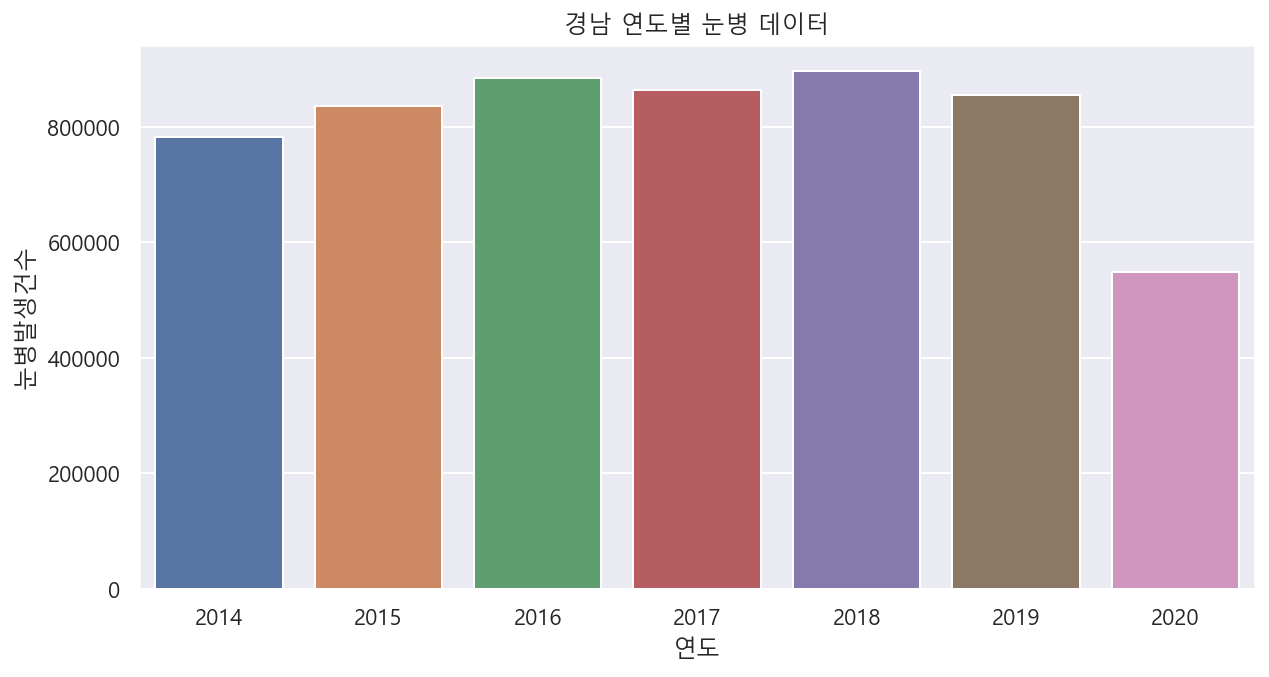

In [222]:
plt.figure(figsize=(10, 5))
plt.title("경남 연도별 눈병 데이터")
sns.barplot(data=df_gsnam, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'경남 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

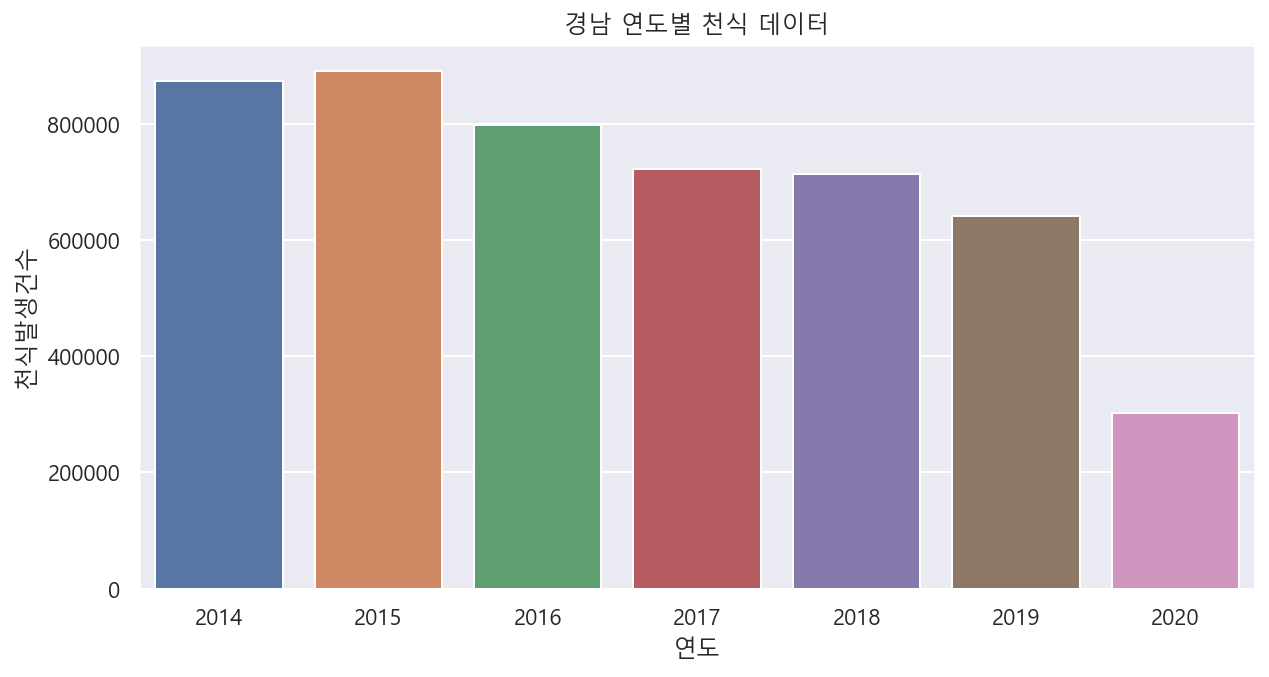

In [223]:
plt.figure(figsize=(10, 5))
plt.title("경남 연도별 천식 데이터")
sns.barplot(data=df_gsnam, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'경남 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

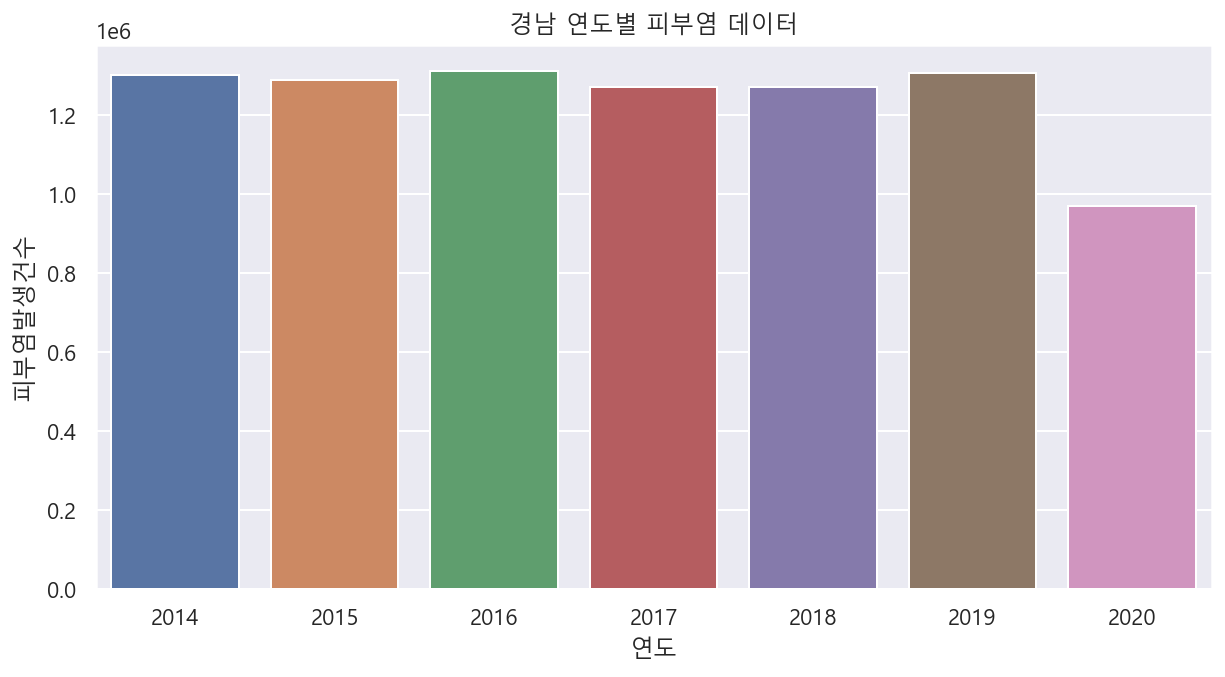

In [224]:
plt.figure(figsize=(10, 5))
plt.title("경남 연도별 피부염 데이터")
sns.barplot(data=df_gsnam, x="연도", y="피부염발생건수")

### 제주 연도별 데이터

<AxesSubplot:title={'center':'제주 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

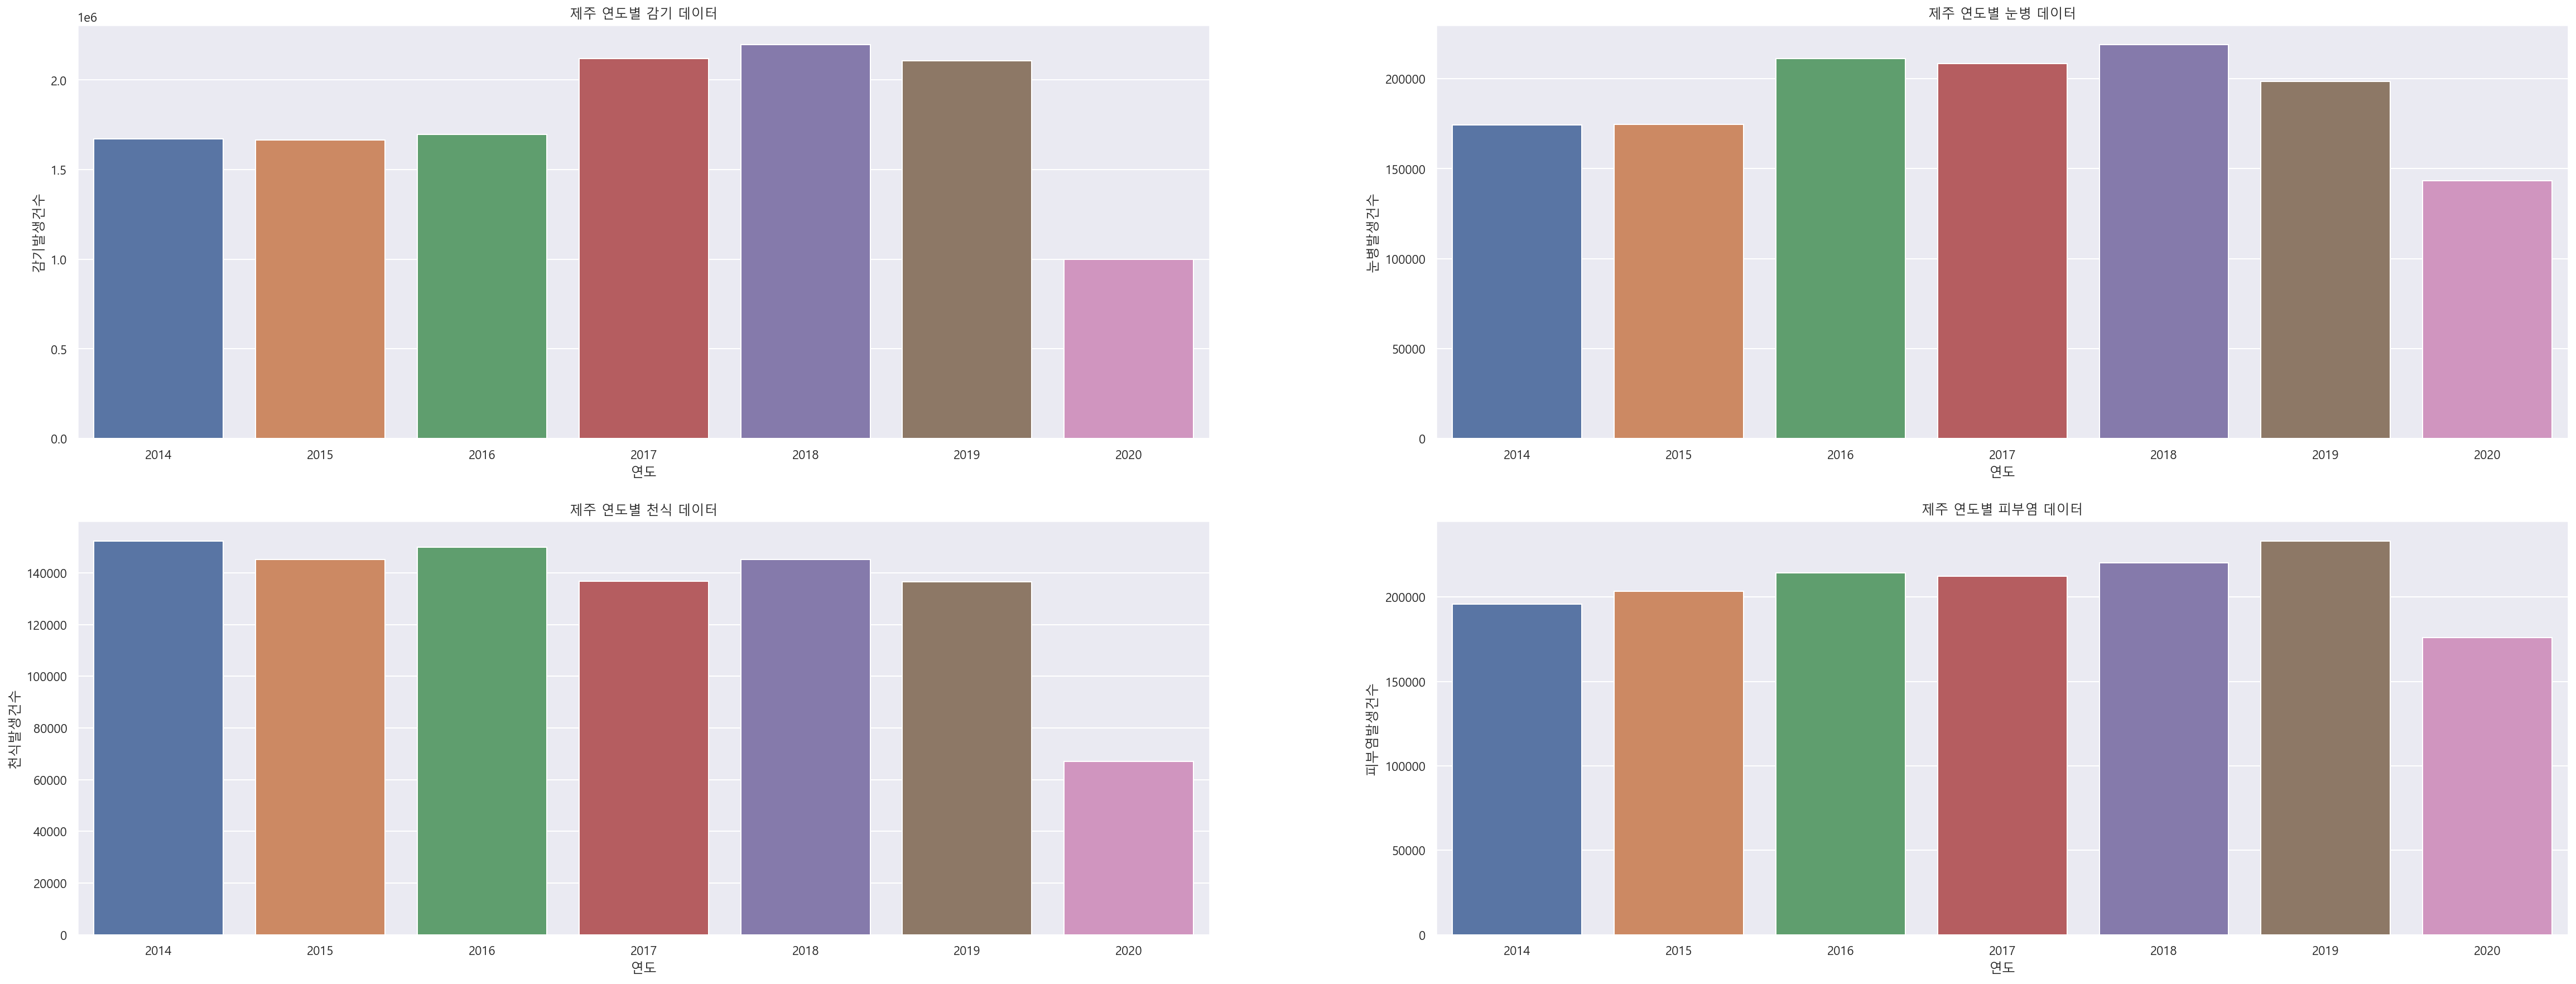

In [225]:
fig = plt.figure(figsize=(40, 15))

area01 = fig.add_subplot(2,2,1)
area01.set_title("제주 연도별 감기 데이터")
area02 = fig.add_subplot(2,2,2)
area02.set_title("제주 연도별 눈병 데이터")
area03 = fig.add_subplot(2,2,3)
area03.set_title("제주 연도별 천식 데이터")
area04 = fig.add_subplot(2,2,4)
area04.set_title("제주 연도별 피부염 데이터")

sns.barplot(data=df_jeju, x="연도", y="감기발생건수", ax=area01)
sns.barplot(data=df_jeju, x="연도", y="눈병발생건수", ax=area02)
sns.barplot(data=df_jeju, x="연도", y="천식발생건수", ax=area03)
sns.barplot(data=df_jeju, x="연도", y="피부염발생건수", ax=area04)

<AxesSubplot:title={'center':'제주 연도별 감기 데이터'}, xlabel='연도', ylabel='감기발생건수'>

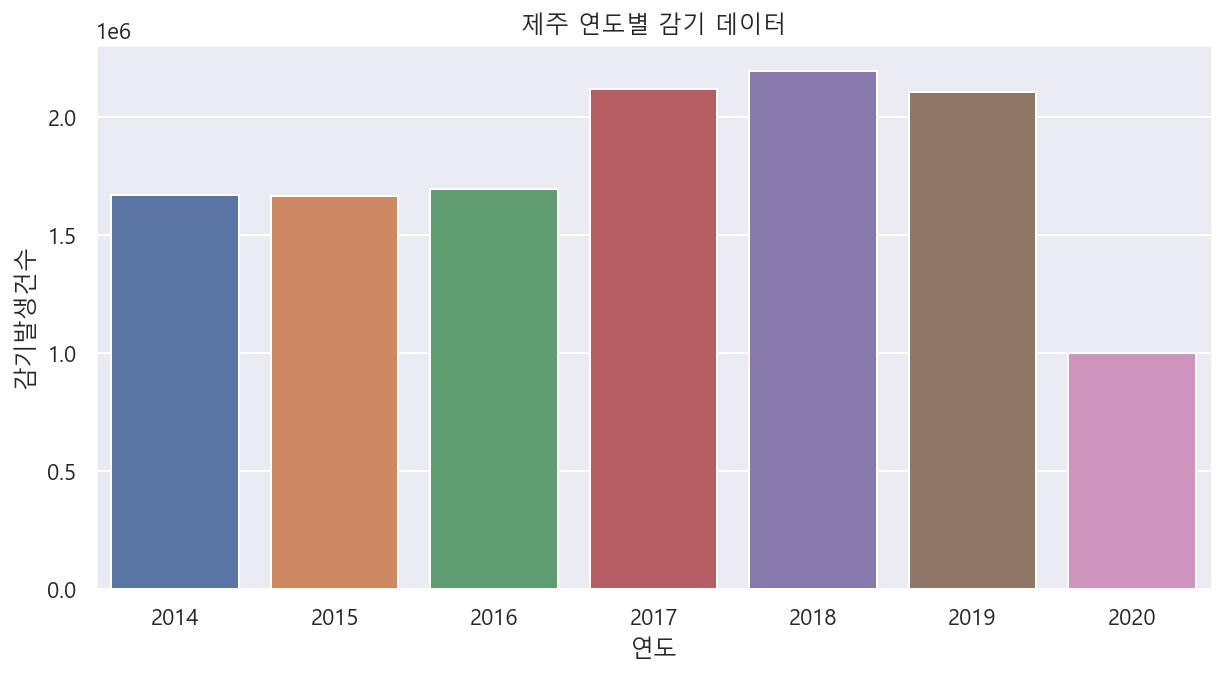

In [226]:
plt.figure(figsize=(10, 5))
plt.title("제주 연도별 감기 데이터")
sns.barplot(data=df_jeju, x="연도", y="감기발생건수")

<AxesSubplot:title={'center':'제주 연도별 눈병 데이터'}, xlabel='연도', ylabel='눈병발생건수'>

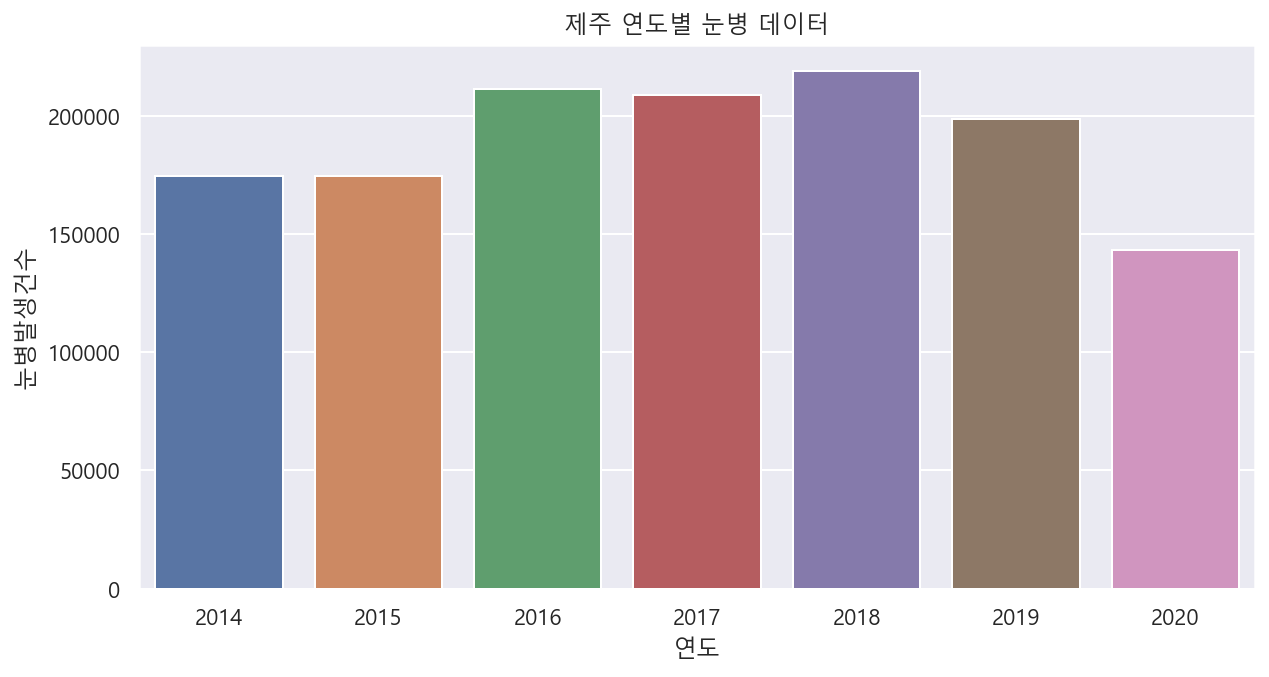

In [227]:
plt.figure(figsize=(10, 5))
plt.title("제주 연도별 눈병 데이터")
sns.barplot(data=df_jeju, x="연도", y="눈병발생건수")

<AxesSubplot:title={'center':'제주 연도별 천식 데이터'}, xlabel='연도', ylabel='천식발생건수'>

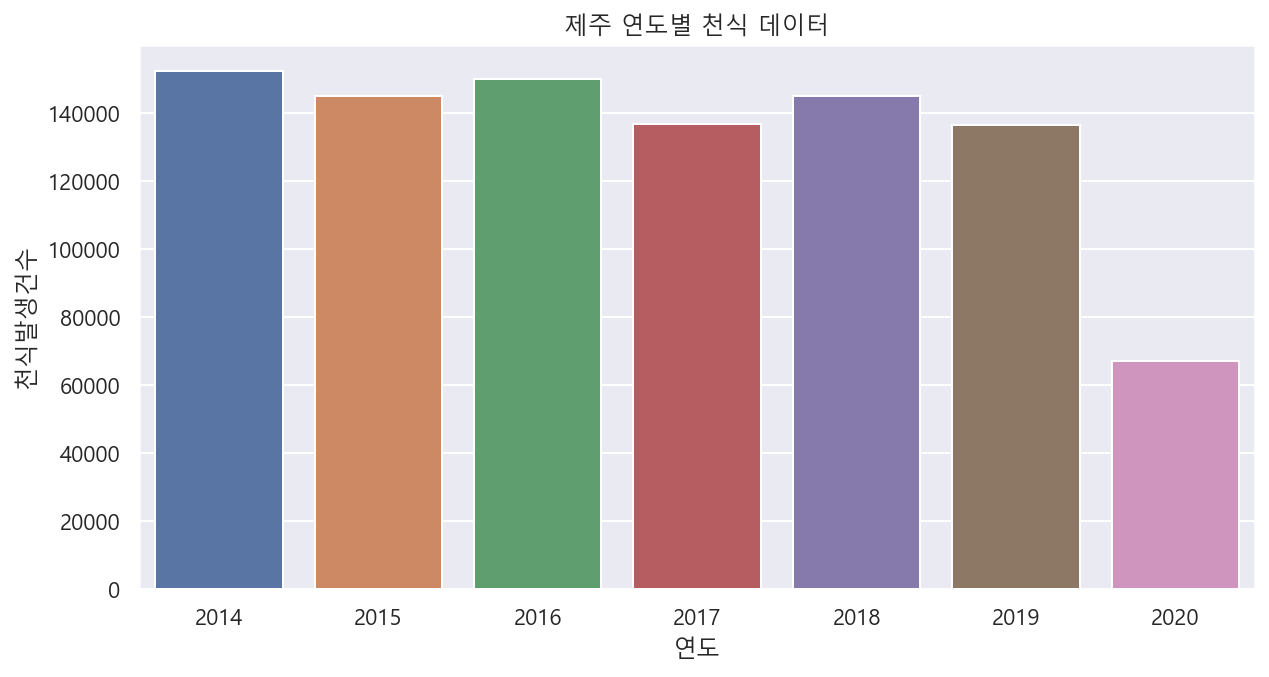

In [228]:
plt.figure(figsize=(10, 5))
plt.title("제주 연도별 천식 데이터")
sns.barplot(data=df_jeju, x="연도", y="천식발생건수")

<AxesSubplot:title={'center':'제주 연도별 피부염 데이터'}, xlabel='연도', ylabel='피부염발생건수'>

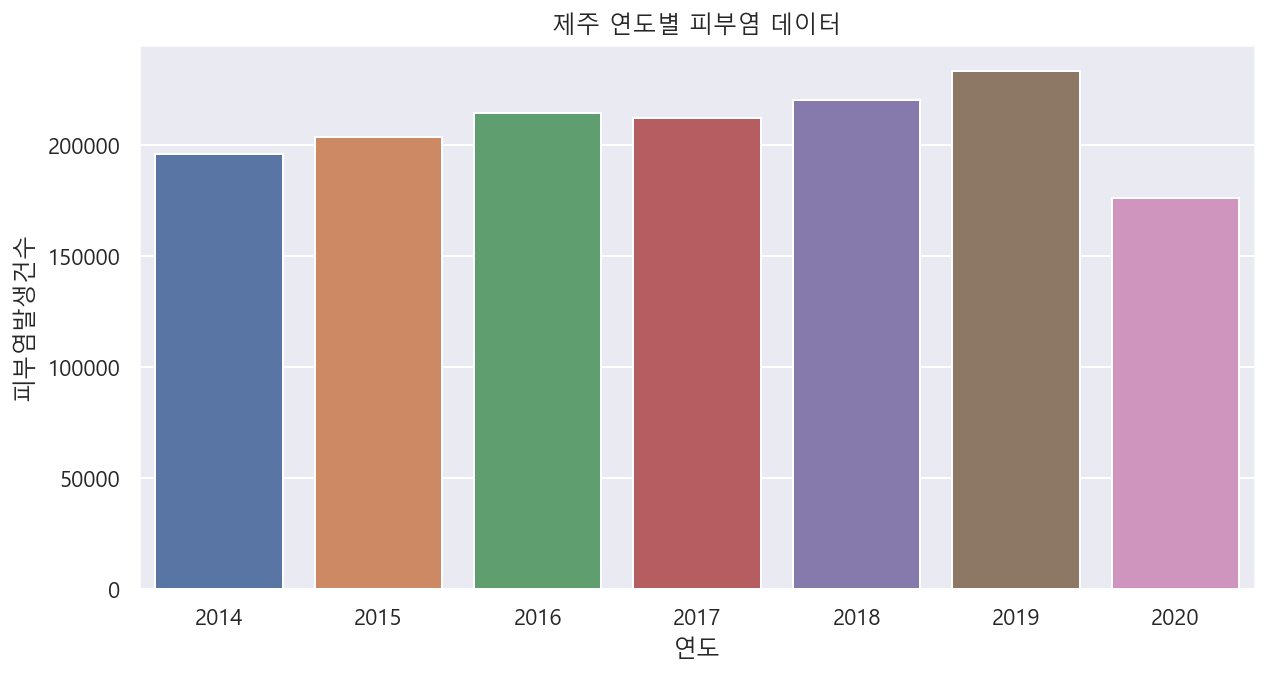

In [229]:
plt.figure(figsize=(10, 5))
plt.title("제주 연도별 피부염 데이터")
sns.barplot(data=df_jeju, x="연도", y="피부염발생건수")

## 질의 그래프

보고 싶은 지역을 입력해주세요  ex)서울  : 경상북도
보고 싶은 병명을 입력해주세요  ex)감기  : 피부염


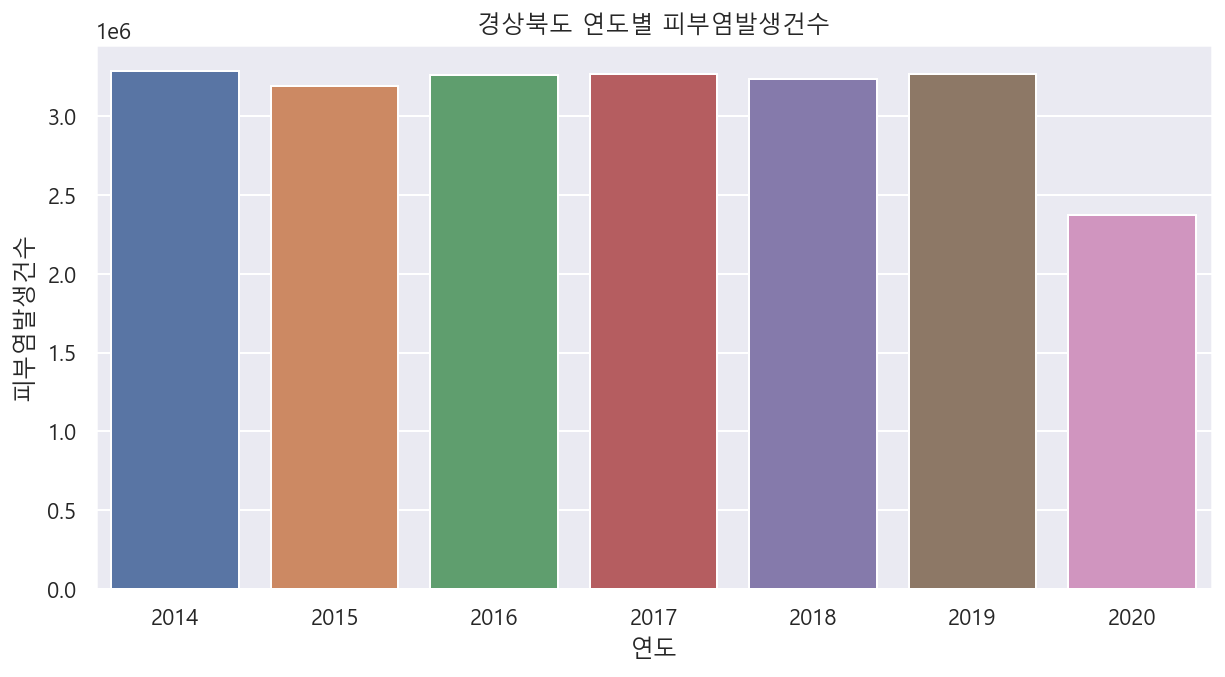

In [236]:
while True:
    trial = input("보고 싶은 지역을 입력해주세요  ex)서울  : ")
    disease = input("보고 싶은 병명을 입력해주세요  ex)감기  : ")
    
    if trial == "서울" or trial == "서울특별시":
        df_condition = df_seoul
    elif trial == "경기" or trial == "경기도":
        df_conditon = df_gyunggi
    elif trial == "부산" or trial == "부산광역시":
        df_conditon = df_busan        
    elif trial == "대구" or trial == "대구광역시":
        df_conditon = df_daegu
    elif trial == "인천" or trial == "인천광역시":
        df_conditon = df_incheon        
    elif trial == "광주" or trial == "광주광역시":
        df_conditon = df_gwangju        
    elif trial == "대전" or trial == "대전광역시":
        df_conditon = df_daejeon        
    elif trial == "울산" or trial == "울산광역시":
        df_conditon = df_ulsan        
    elif trial == "강원" or trial == "강원도":
        df_conditon = df_gangwon        
    elif trial == "충북" or trial == "충청북도":
        df_conditon = df_ccbuk        
    elif trial == "충남" or trial == "충청남도":
        df_conditon = df_ccnam       
    elif trial == "전북" or trial == "전라북도":
        df_conditon = df_jlbuk        
    elif trial == "전남" or trial == "전라남도":
        df_conditon = df_jlnam        
    elif trial == "경북" or trial == "경상북도":
        df_conditon = df_gsbuk        
    elif trial == "경남" or trial == "경상남도":
        df_conditon = df_gsnam        
    elif trial == "제주" or trial == "제주도" or trial == "제주특별자치도":
        df_conditon = df_jeju        
    
    input_disease = disease+"발생건수"
        
    plt.figure(figsize=(10, 5))
    plt.title(trial+" 연도별 "+input_disease)
    sns.barplot(data=df_condition, x="연도", y=input_disease)
    break